In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:00, 720.18it/s]
100%|██████████| 720/720 [00:07<00:00, 94.72it/s] 
8280it [00:00, 256714.40it/s]
7920it [00:00, 256778.24it/s]
700it [00:00, 876.81it/s]
100%|██████████| 700/700 [00:06<00:00, 101.45it/s]
8280it [00:00, 250061.83it/s]
7920it [00:00, 255919.69it/s]
710it [00:00, 822.34it/s]
100%|██████████| 710/710 [00:06<00:00, 104.12it/s]
7920it [00:00, 84470.76it/s]
7560it [00:00, 241327.14it/s]
720it [00:00, 854.53it/s]
100%|██████████| 720/720 [00:07<00:00, 95.02it/s] 
8280it [00:00, 249878.31it/s]
720it [00:00, 838.34it/s]
100%|██████████| 720/720 [00:07<00:00, 94.82it/s] 
8280it [00:00, 249424.27it/s]
700it [00:00, 790.24it/s]
100%|██████████| 700/700 [00:06<00:00, 106.70it/s]
8280it [00:00, 258628.08it/s]
509it [00:00, 1212.14it/s]
100%|██████████| 509/509 [00:02<00:00, 199.98it/s]
3664it [00:00, 255527.42it/s]
700it [00:00, 881.83it/s]
100%|██████████| 700/700 [00:06<00:00, 100.80it/s]
8280it [00:00, 260513.82it/s]
700it [00:00, 881.15it/s]
100%|██████████| 700/700 [00

In [8]:
len(data_train), len(data_val), len(data_test)

(24480, 23400, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
device = 'cuda:0'

In [13]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.17539


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.06589
Epoch 1...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.10521


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.078279
EarlyStopping counter: 1 out of 10
Epoch 2...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.10055


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.067719
EarlyStopping counter: 2 out of 10
Epoch 3...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.098268


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.05708
Epoch 4...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.096966


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.058939
EarlyStopping counter: 1 out of 10
Epoch 5...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.094176


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.044355
Epoch 7...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.093451


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.044304
Epoch 8...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.092559


 48%|████▊     | 351/732 [00:27<00:27, 13.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.040311
EarlyStopping counter: 4 out of 10
Epoch 16...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.087036


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.034652
Epoch 17...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.087039


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.032357
Epoch 18...


 57%|█████▋    | 435/765 [01:32<01:08,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.08366


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.039915
EarlyStopping counter: 1 out of 10
Epoch 26...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.083155


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.030614


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.08296


 66%|██████▌   | 481/732 [00:36<00:18, 13.58it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030168
EarlyStopping counter: 3 out of 10
Epoch 35...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.080885


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030474
EarlyStopping counter: 4 out of 10
Epoch 36...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.081013


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030579
EarlyStopping counter: 5 out of 10
Epoch 37...


 61%|██████    | 463/765 [01:37<01:02,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079846


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030064
EarlyStopping counter: 1 out of 10
Epoch 44...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079597


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.02924
EarlyStopping counter: 2 out of 10
Epoch 45...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079395


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028778


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 46...


 35%|███▍      | 265/765 [00:56<01:44,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078864


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028126


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 53...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078629


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028157


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 54...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078721


 73%|███████▎  | 531/732 [00:40<00:14, 13.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.16it/s]


Mean val loss: 0.028127


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.077423


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028132


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 63...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076732


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.027569


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 64...


 64%|██████▎   | 486/765 [01:42<00:56,  4.90it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076176


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.027555


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 71...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076335


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.027346


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 72...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075987


 73%|███████▎  | 533/732 [00:40<00:14, 13.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.027625
EarlyStopping counter: 1 out of 10
Epoch 80...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075845


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026972


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 81...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075678


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.027053


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 82...


 50%|█████     | 386/765 [01:21<01:19,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07499


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026881


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 90...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07506
Epoch    90: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.027186
EarlyStopping counter: 1 out of 10
Epoch 91...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.074009


 37%|███▋      | 271/732 [00:21<00:33, 13.93it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073485


100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.026473


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 99...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073461
Epoch    99: reducing learning rate of group 0 to 2.5000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.026663
EarlyStopping counter: 1 out of 10
Epoch 100...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073062


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026285


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 101...


 44%|████▍     | 338/765 [01:12<01:29,  4.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073156


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026314


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 108...


 17%|█▋        | 128/765 [00:28<02:10,  4.87it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026278


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 109...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072987
Epoch   109: reducing learning rate of group 0 to 1.2500e-05.


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.02609


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 110...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072699


 41%|████      | 297/732 [00:23<00:31, 13.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072625


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.026013


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 117...


 67%|██████▋   | 513/765 [01:48<00:52,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072454


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.025991


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 119...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072955


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.026073


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 120...


 22%|██▏       | 165/765 [00:36<02:04,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072914


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025936


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 127...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072678


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026012


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 128...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072972


  6%|▌         | 45/732 [00:05<00:50, 13.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072016


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025961


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 136...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072223


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.02595


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 137...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072391


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.025951


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 138...


 19%|█▉        | 145/765 [00:32<02:07,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025951


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 145...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072266


100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025932


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 146...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07267


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025948


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 147...


 83%|████████▎ | 633/765 [02:13<00:27,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072082


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025915


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 155...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072495


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025913


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 156...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072596


 14%|█▍        | 105/732 [00:09<00:45, 13.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 162...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072648


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025923


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 163...


 63%|██████▎   | 484/765 [01:42<00:58,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025931


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 165...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072252


 97%|█████████▋| 707/732 [00:53<00:01, 13.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072209


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025913


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 172...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072236


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025908


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 173...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072833


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025893


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 174...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072476


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025902


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 175...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07257


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025905


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 176...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072202


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025943


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 177...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07223


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025911


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 178...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072782


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025907


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 179...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072524


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025945


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 180...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072171


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 181...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072093


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025908


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 182...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07237


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025926


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 183...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072208


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025921


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 184...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072382


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025916


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 185...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072141


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025904


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 186...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072222


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025921


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072329


100%|██████████| 732/732 [00:55<00:00, 13.15it/s]


Mean val loss: 0.025914


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 188...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072061


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025911


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 189...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072204


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 190...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072332


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.0259


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 191...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072776


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.025897


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 192...


 23%|██▎       | 179/765 [00:39<02:02,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072337


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.025892


 99%|█████████▉| 257/259 [02:32<00:01,  1.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [14]:
import pickle
import json

In [15]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [17]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [18]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [19]:
from itertools import chain

In [20]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [21]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

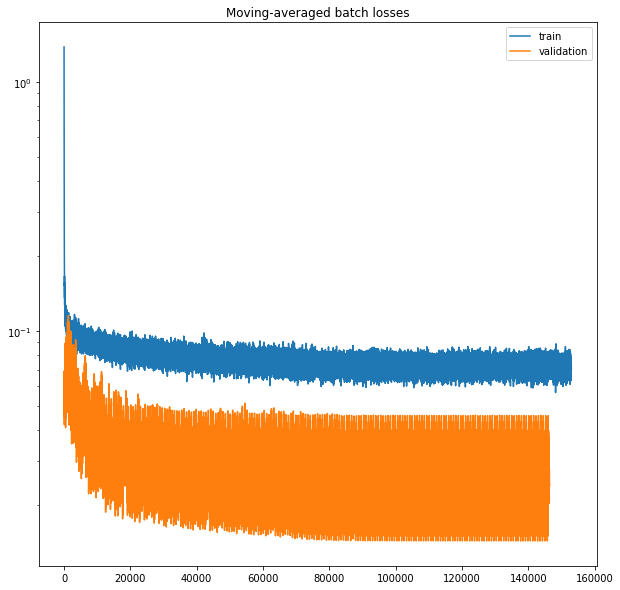

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [23]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

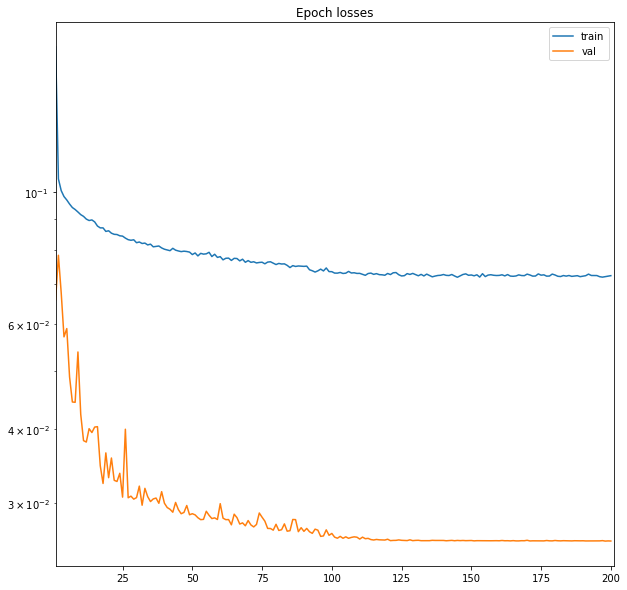

In [24]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [25]:
import os

In [26]:
import torch

In [27]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [28]:
threshold = 0.5
to_plot = 10

Prediction for carb96558:


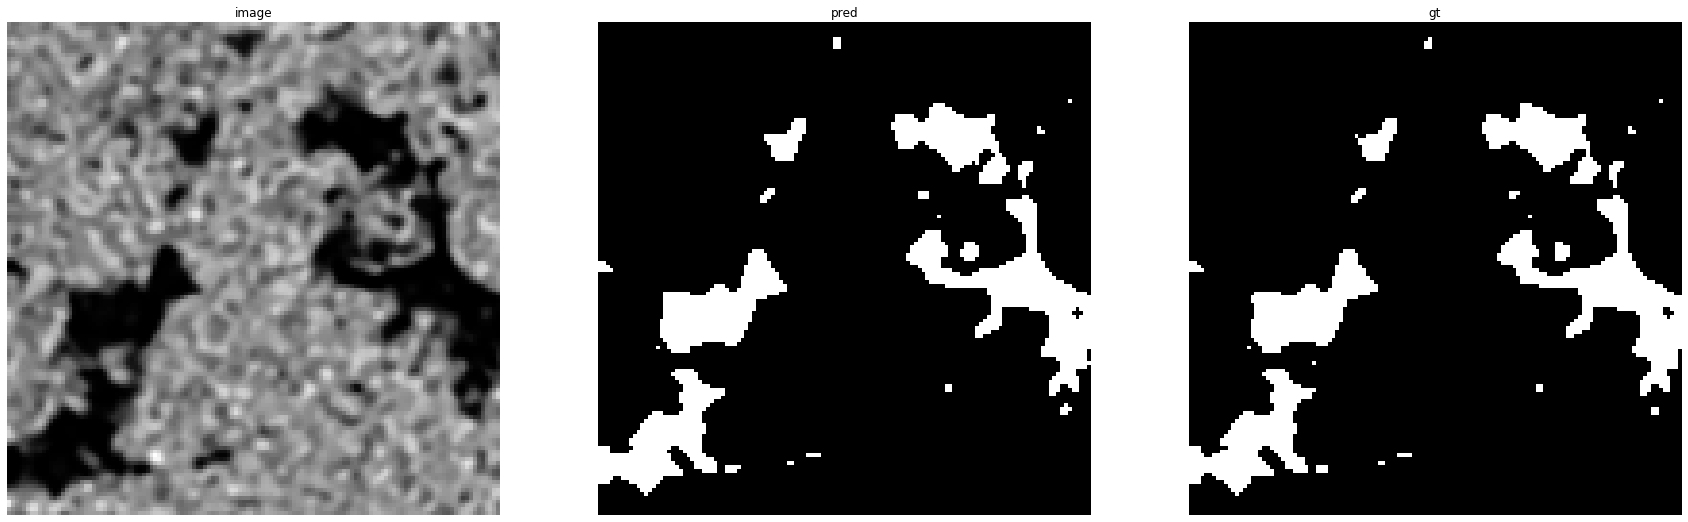

accuracy    : 0.99615478515625
precision   : 0.9725565719788156
recall      : 0.9970384995064165
f1          : 0.9846453814282232
pr_auc      : 0.9992597455170641
iou         : 0.9697551608257321


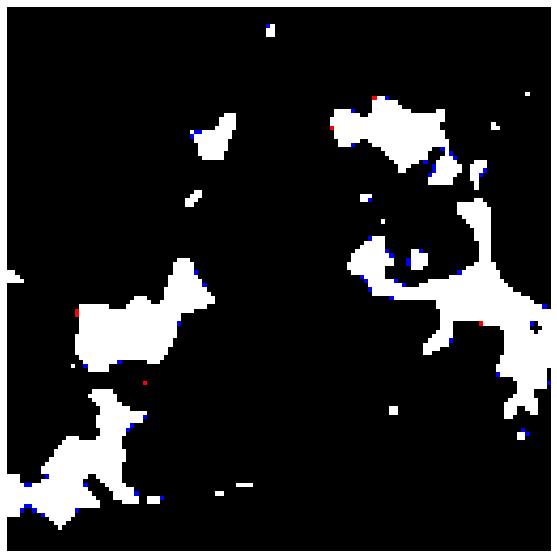

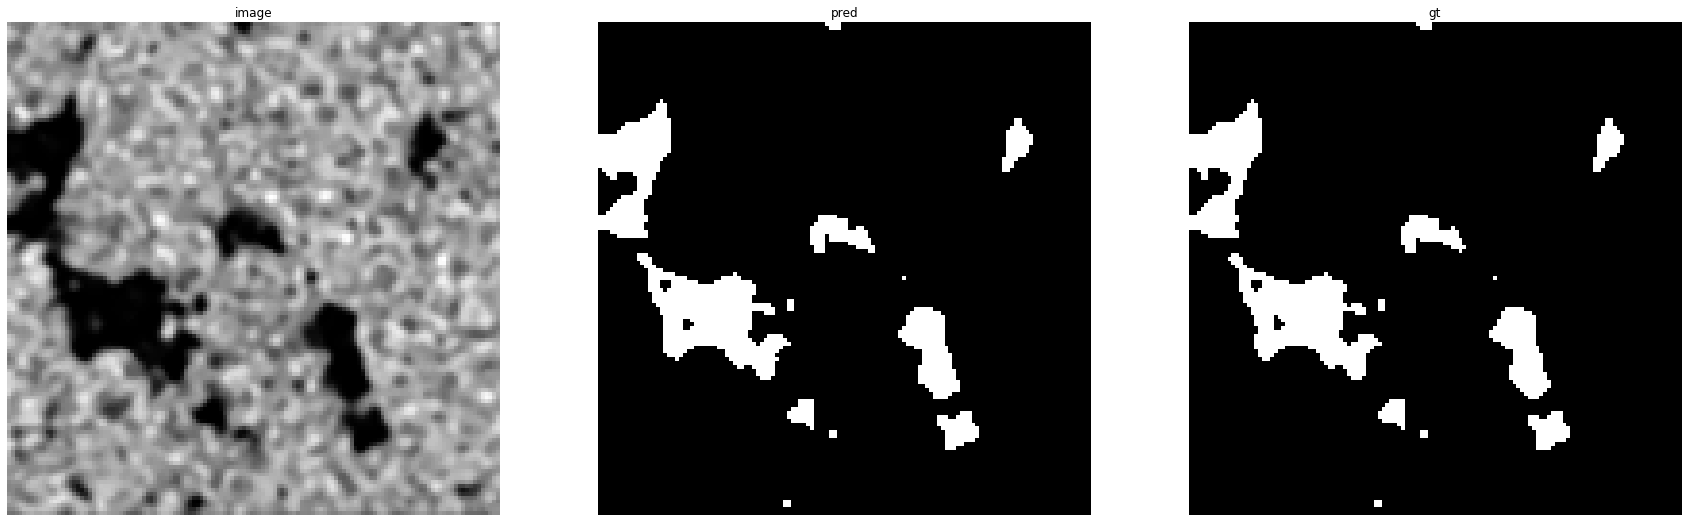

accuracy    : 0.997802734375
precision   : 0.9782903663500678
recall      : 0.9972337482710927
f1          : 0.9876712328767122
pr_auc      : 0.9993291475390697
iou         : 0.9756427604871448


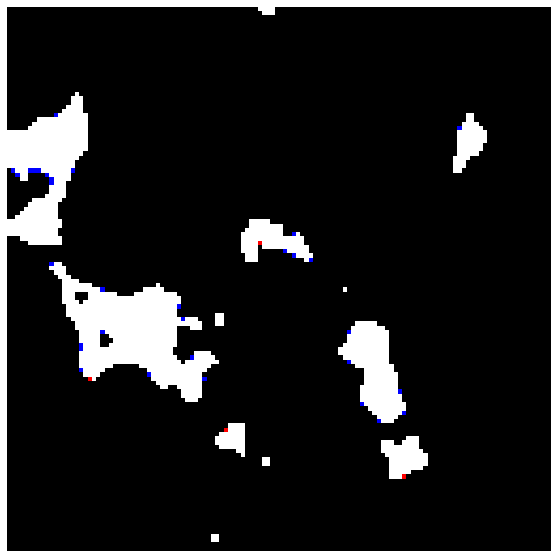

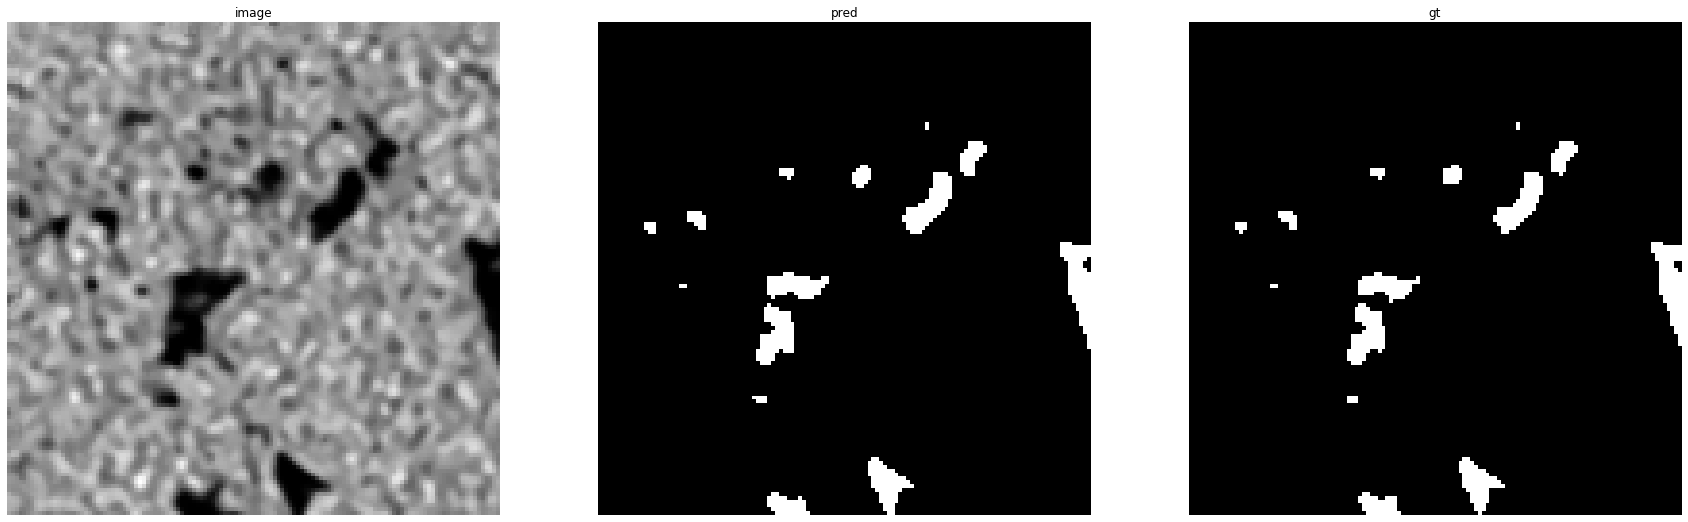

accuracy    : 0.997802734375
precision   : 0.9532710280373832
recall      : 0.9902912621359223
f1          : 0.9714285714285714
pr_auc      : 0.9974657594459586
iou         : 0.9444444444444444


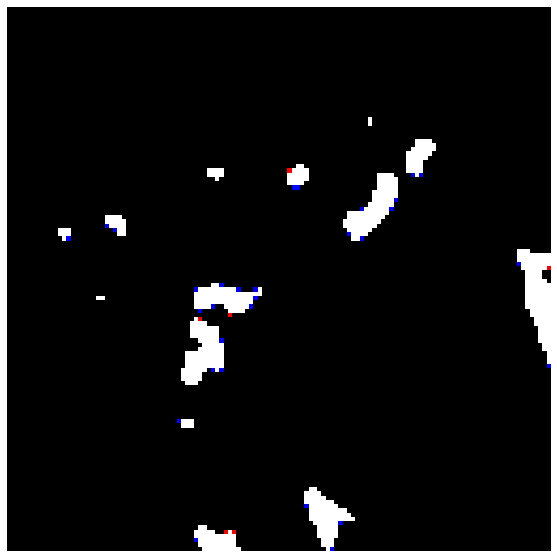

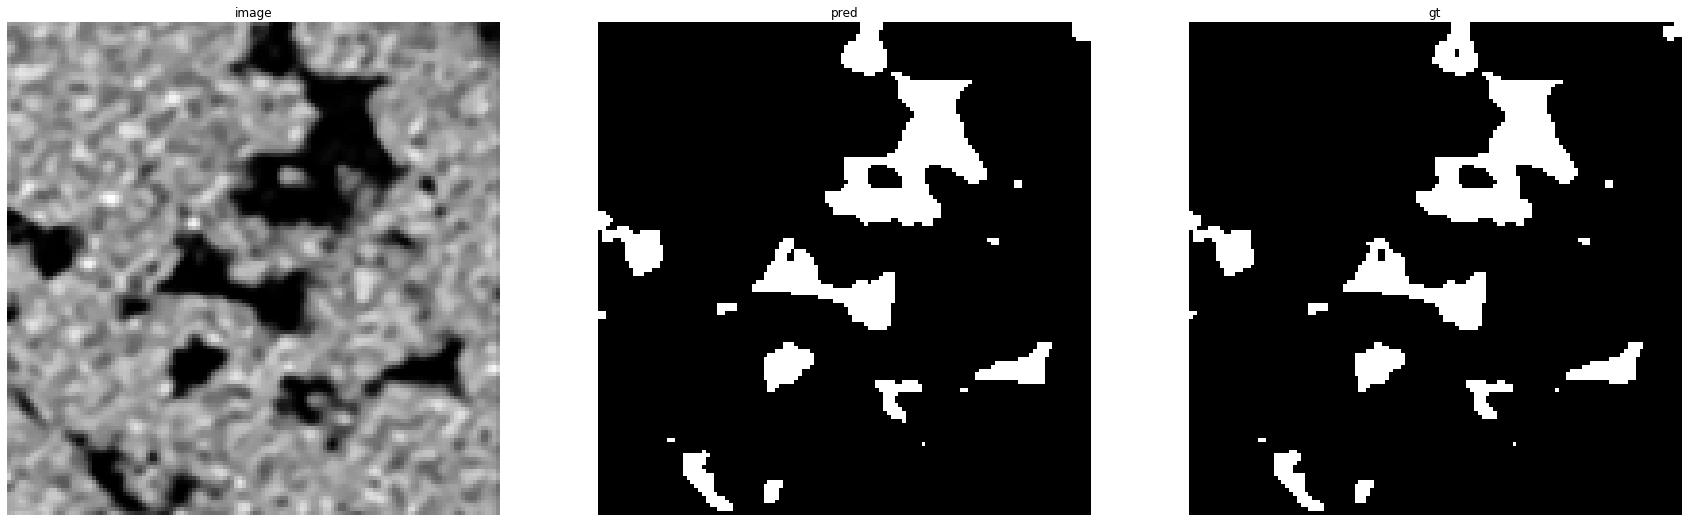

accuracy    : 0.9959716796875
precision   : 0.9690489589195272
recall      : 0.9936526255049047
f1          : 0.9811965811965812
pr_auc      : 0.9990009661878065
iou         : 0.9630872483221476


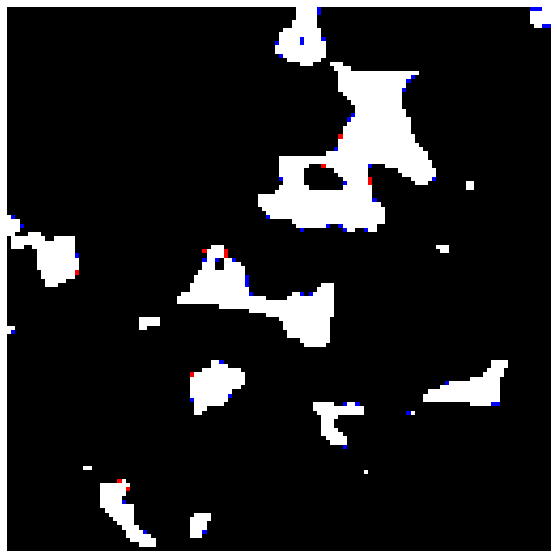

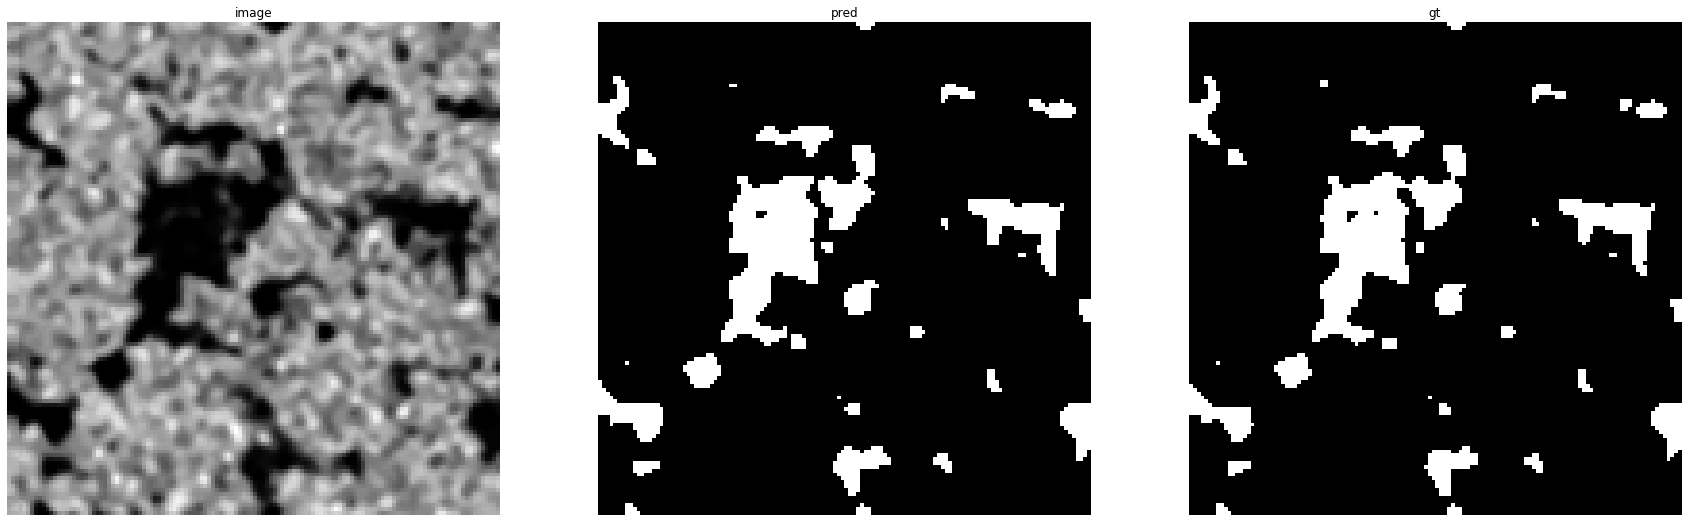

accuracy    : 0.992919921875
precision   : 0.9442379182156134
recall      : 0.9938513135830073
f1          : 0.968409586056645
pr_auc      : 0.9983026798752012
iou         : 0.938753959873284


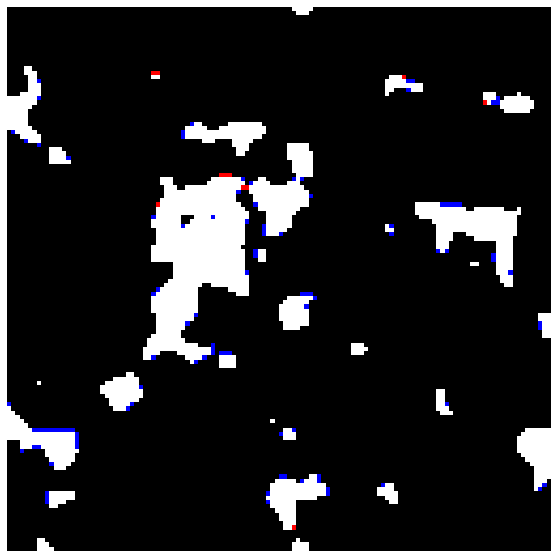

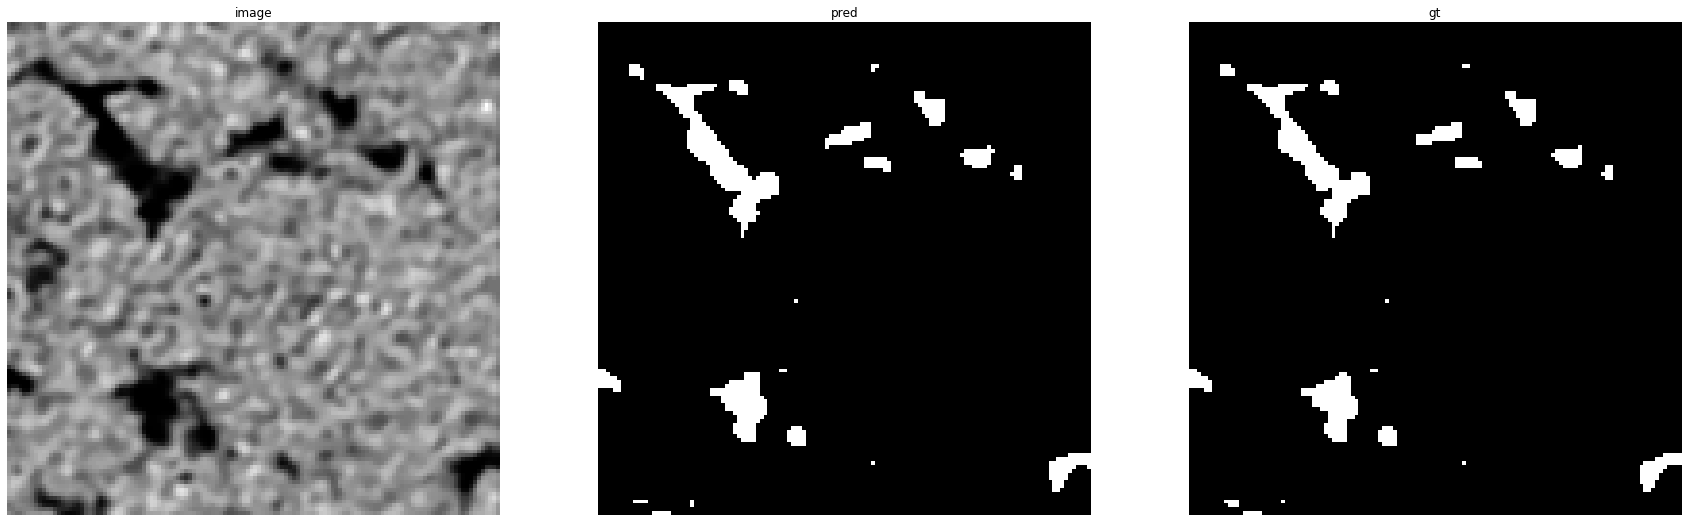

accuracy    : 0.9969482421875
precision   : 0.9429312581063554
recall      : 0.9918144611186903
f1          : 0.9667553191489361
pr_auc      : 0.9977313414568459
iou         : 0.9356499356499357


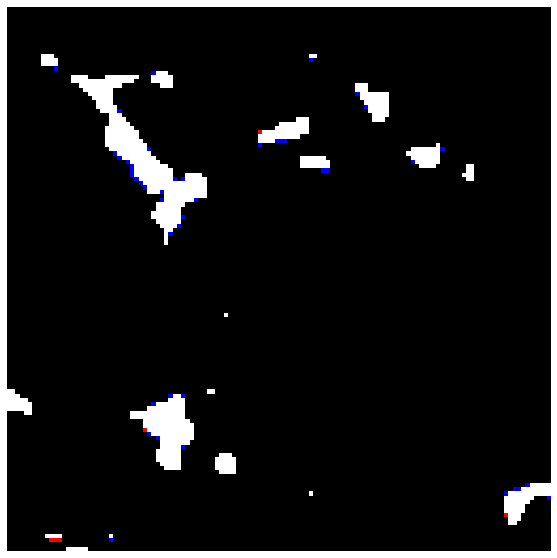

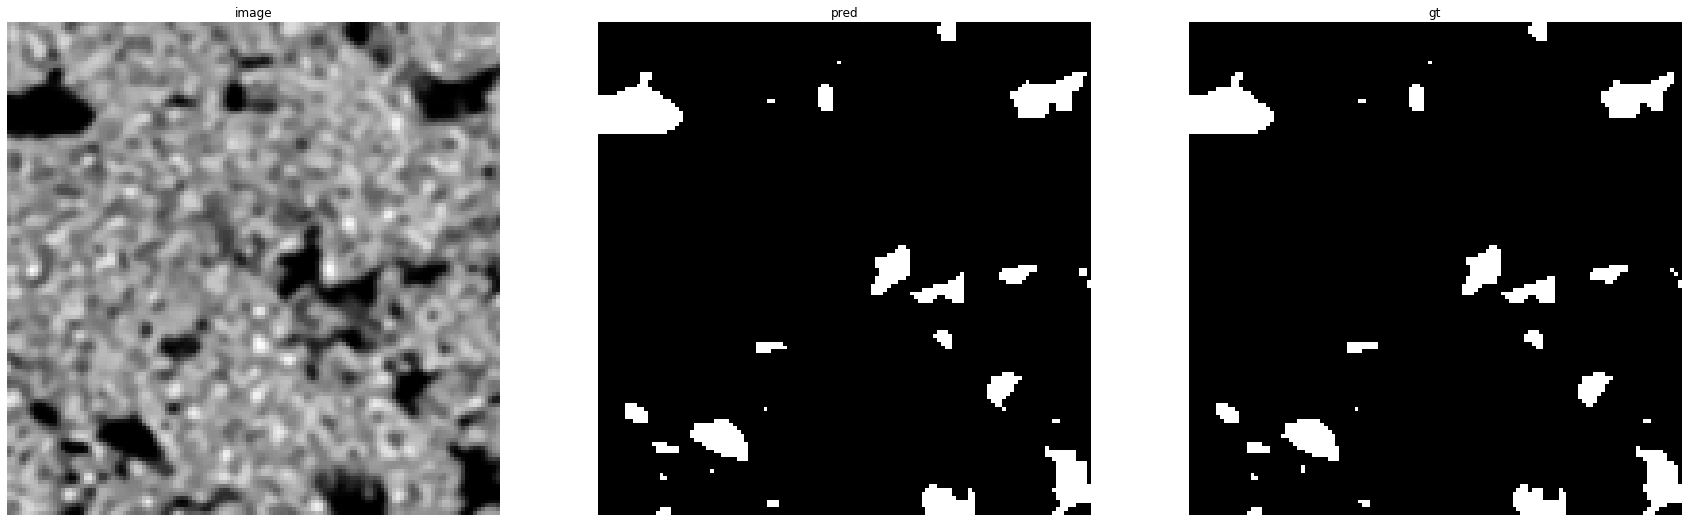

accuracy    : 0.99737548828125
precision   : 0.9725897920604915
recall      : 0.9865771812080537
f1          : 0.9795335554497858
pr_auc      : 0.9983699445631431
iou         : 0.9598880597014925


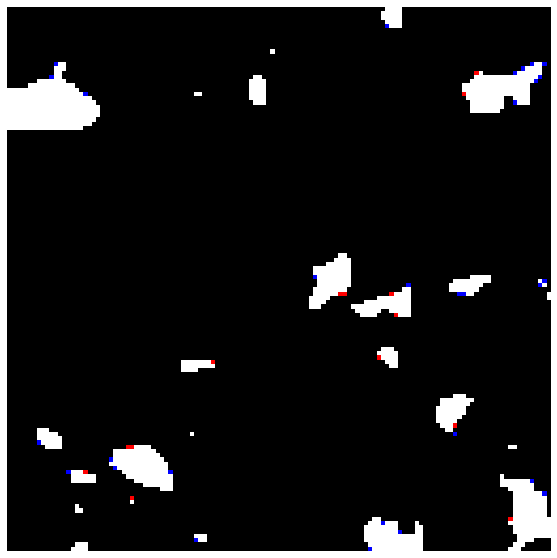

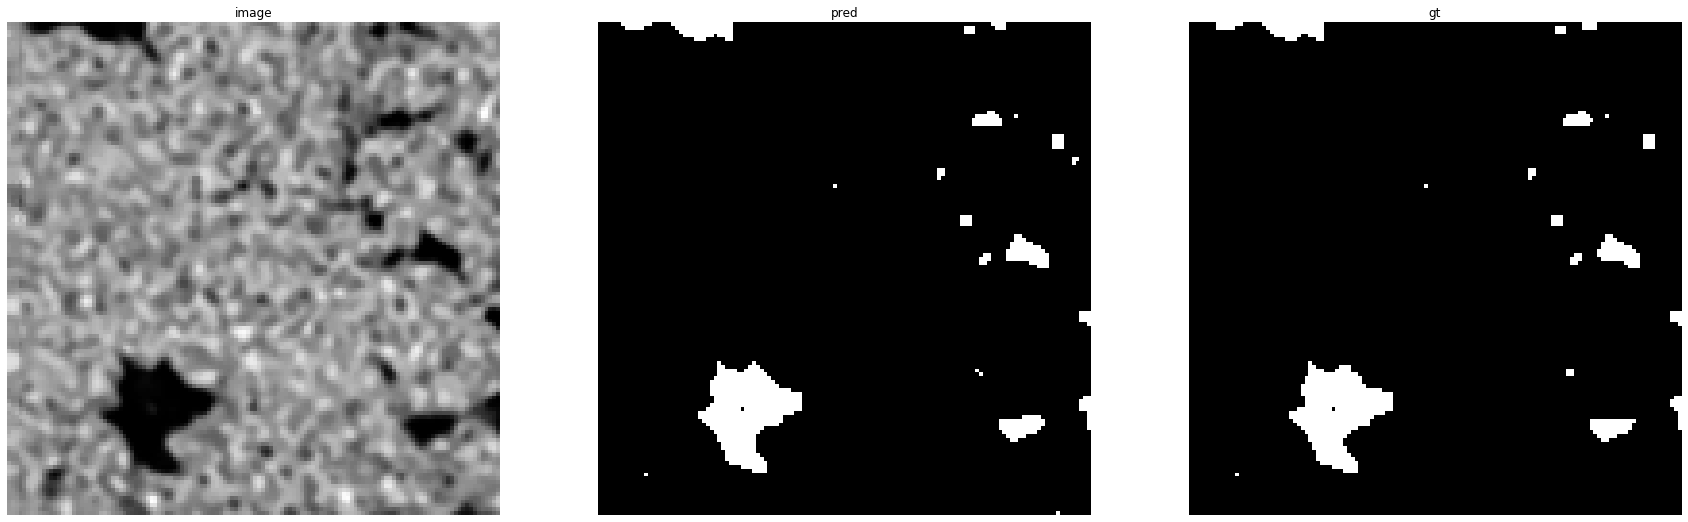

accuracy    : 0.9981689453125
precision   : 0.9635343618513323
recall      : 0.9942112879884226
f1          : 0.9786324786324787
pr_auc      : 0.9991693859532649
iou         : 0.9581589958158996


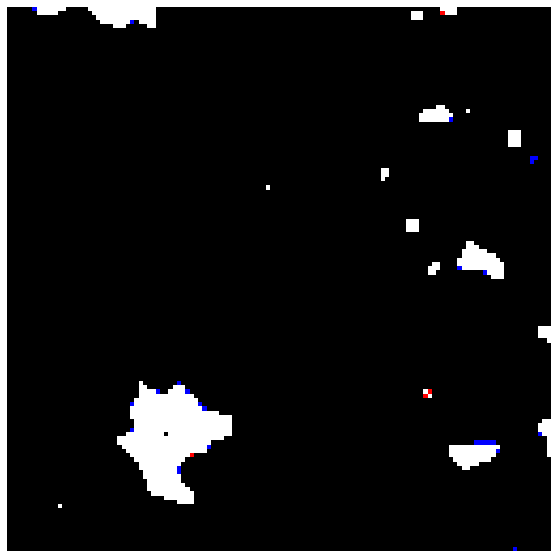

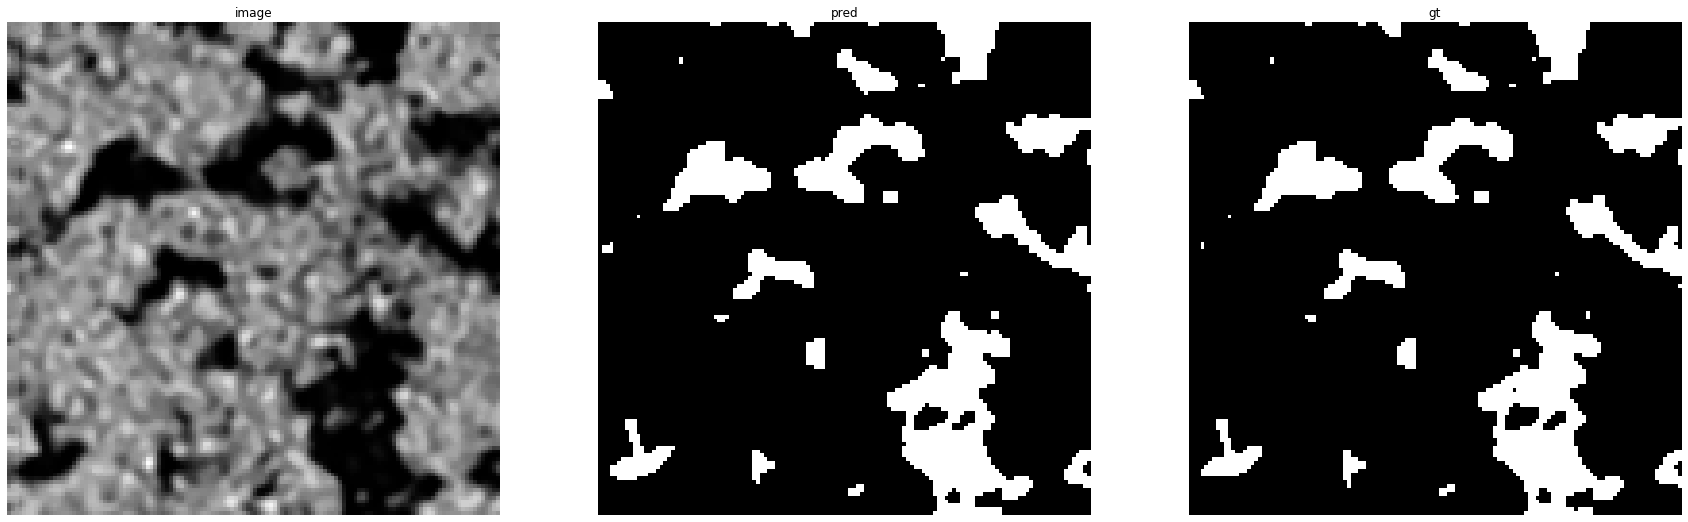

accuracy    : 0.99383544921875
precision   : 0.9638975155279503
recall      : 0.9967884383781613
f1          : 0.9800671008486284
pr_auc      : 0.9991755875219746
iou         : 0.9609133126934984


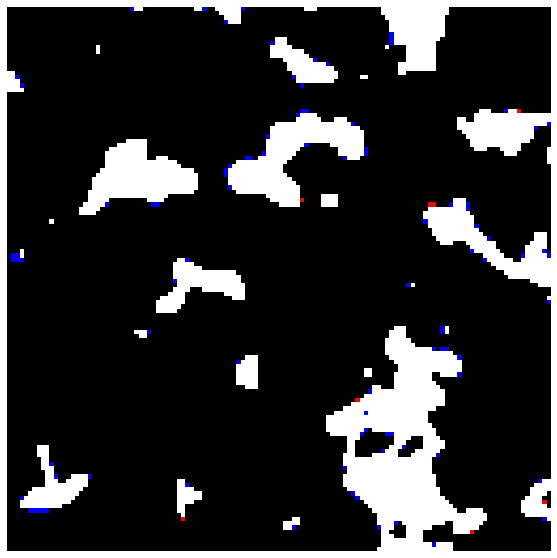

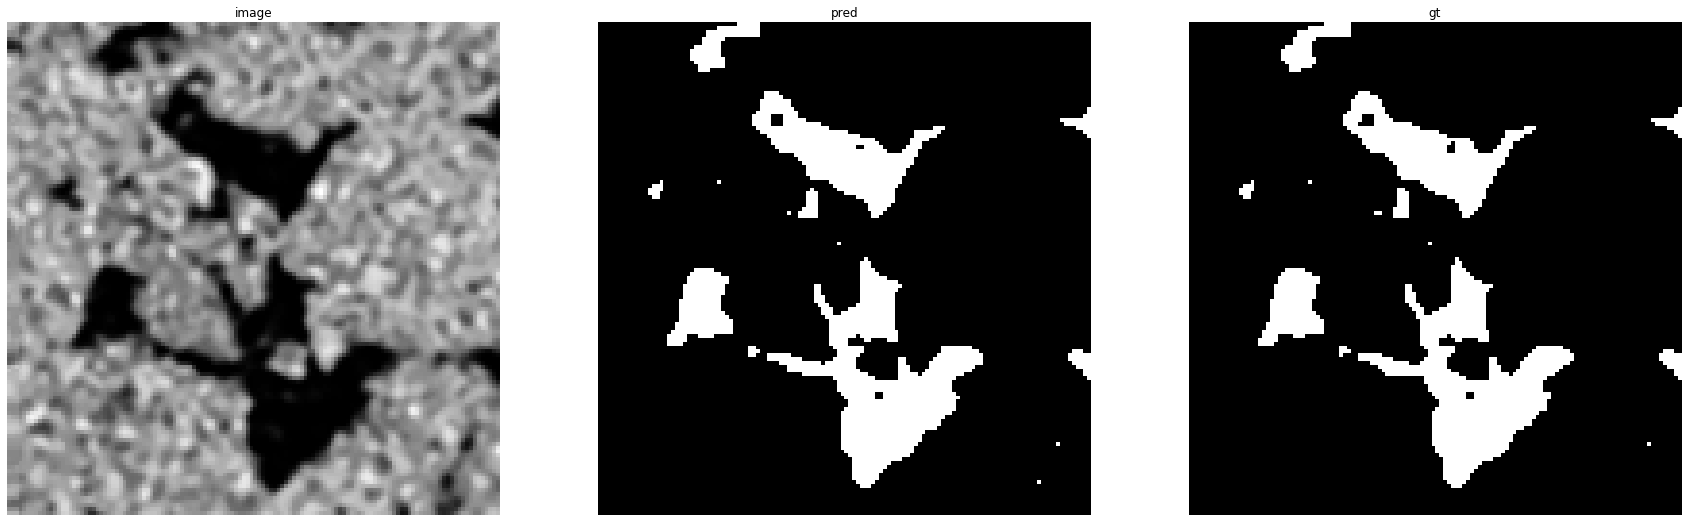

accuracy    : 0.99725341796875
precision   : 0.9845708775313404
recall      : 0.9936739659367396
f1          : 0.9891014773552919
pr_auc      : 0.9994692061806159
iou         : 0.9784379492093914


Prediction for carb71:


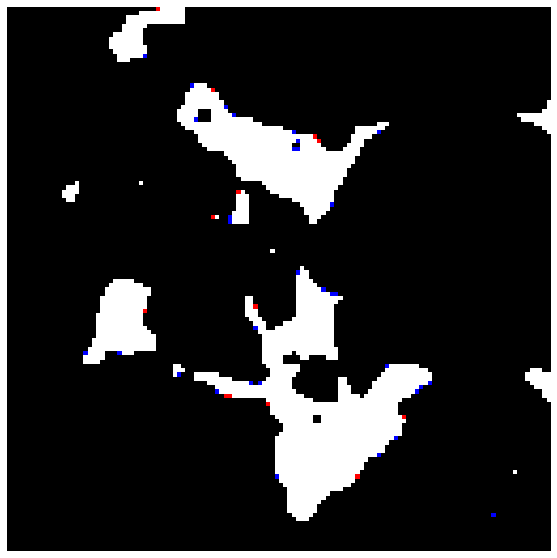

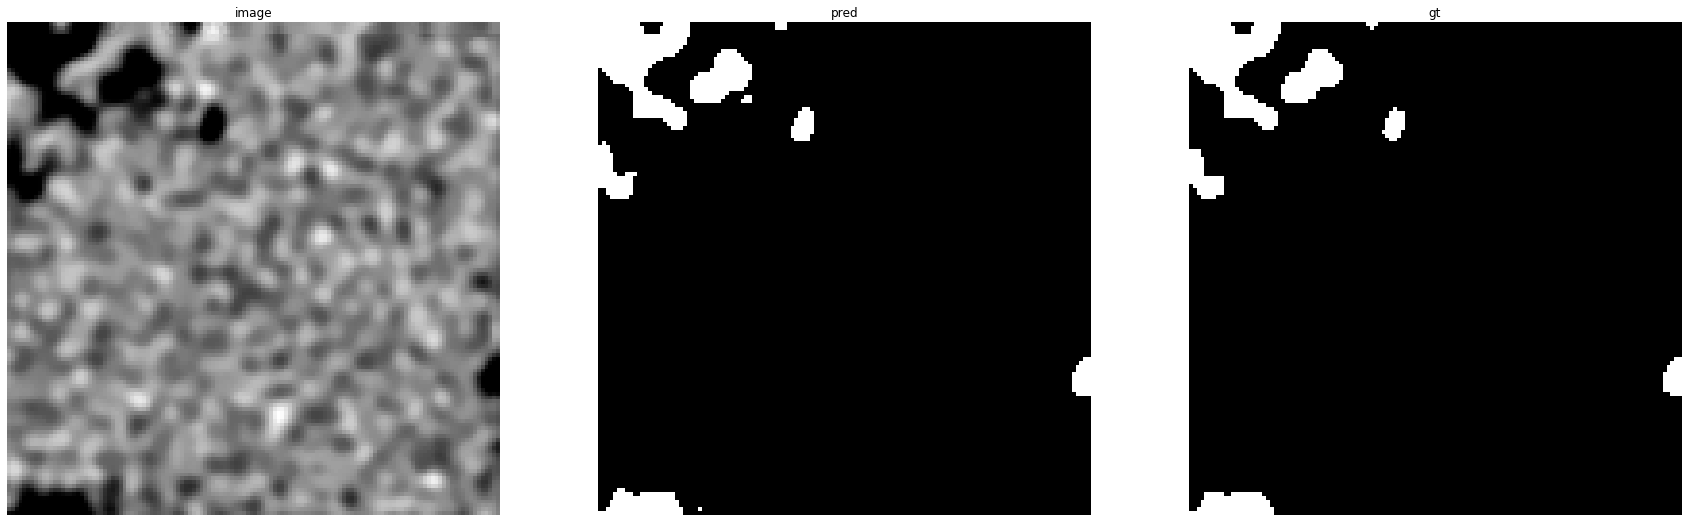

accuracy    : 0.99749755859375
precision   : 0.9493201483312732
recall      : 1.0
f1          : 0.974001268230818
pr_auc      : 0.9981557885122452
iou         : 0.9493201483312732


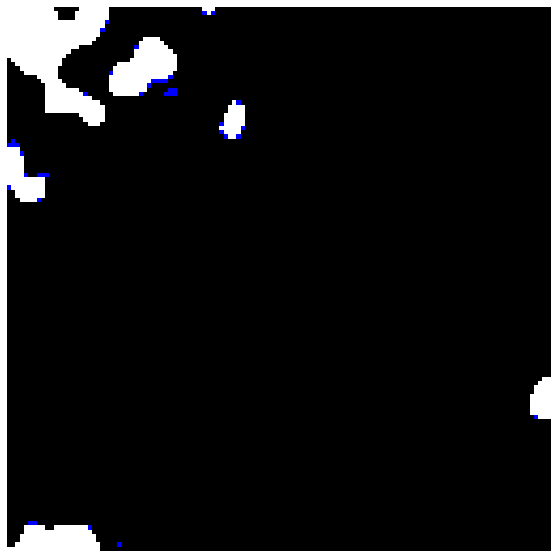

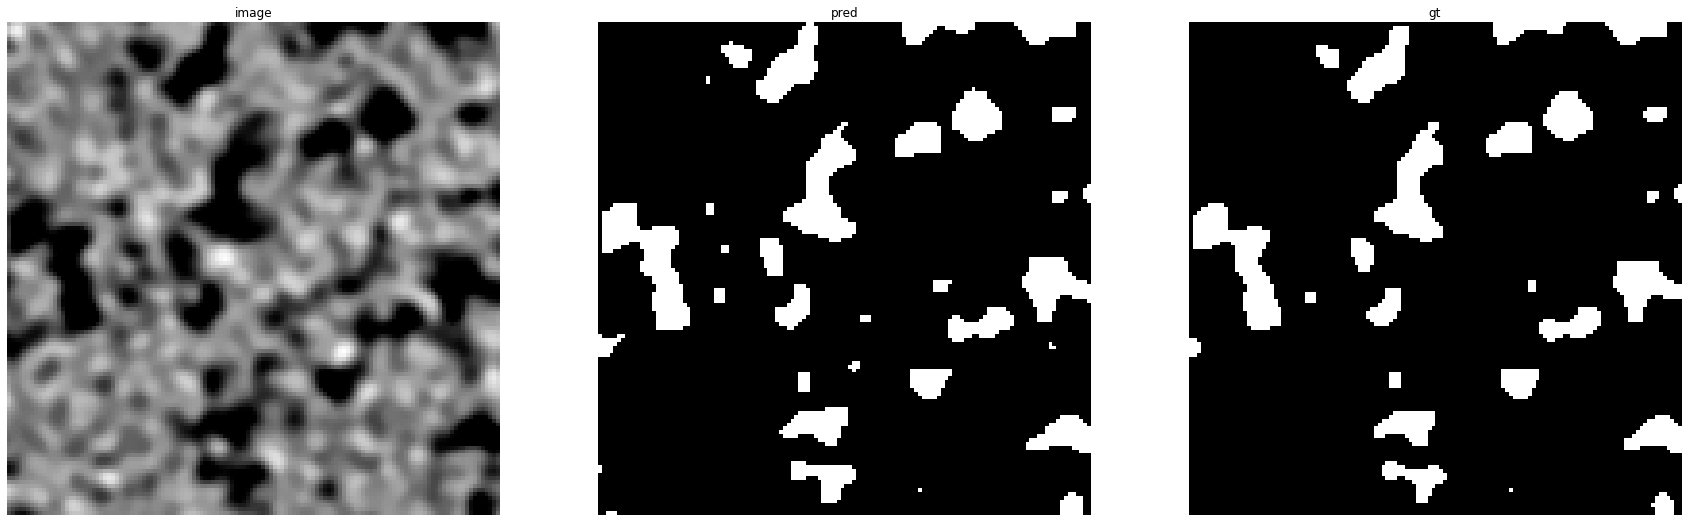

accuracy    : 0.9862060546875
precision   : 0.900047596382675
recall      : 0.9916098584163607
f1          : 0.9436127744510978
pr_auc      : 0.9935868612059816
iou         : 0.8932451582427964


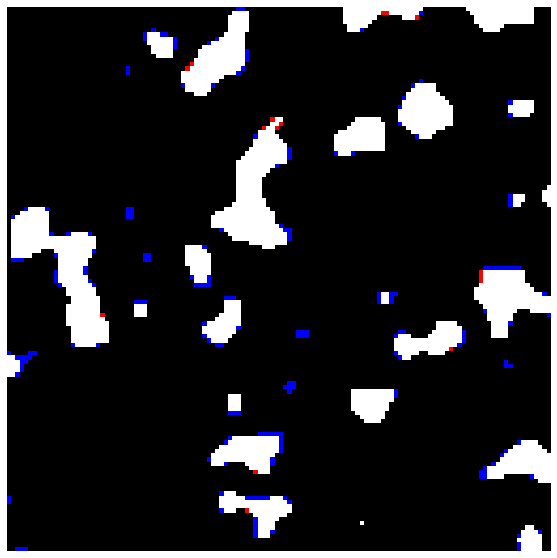

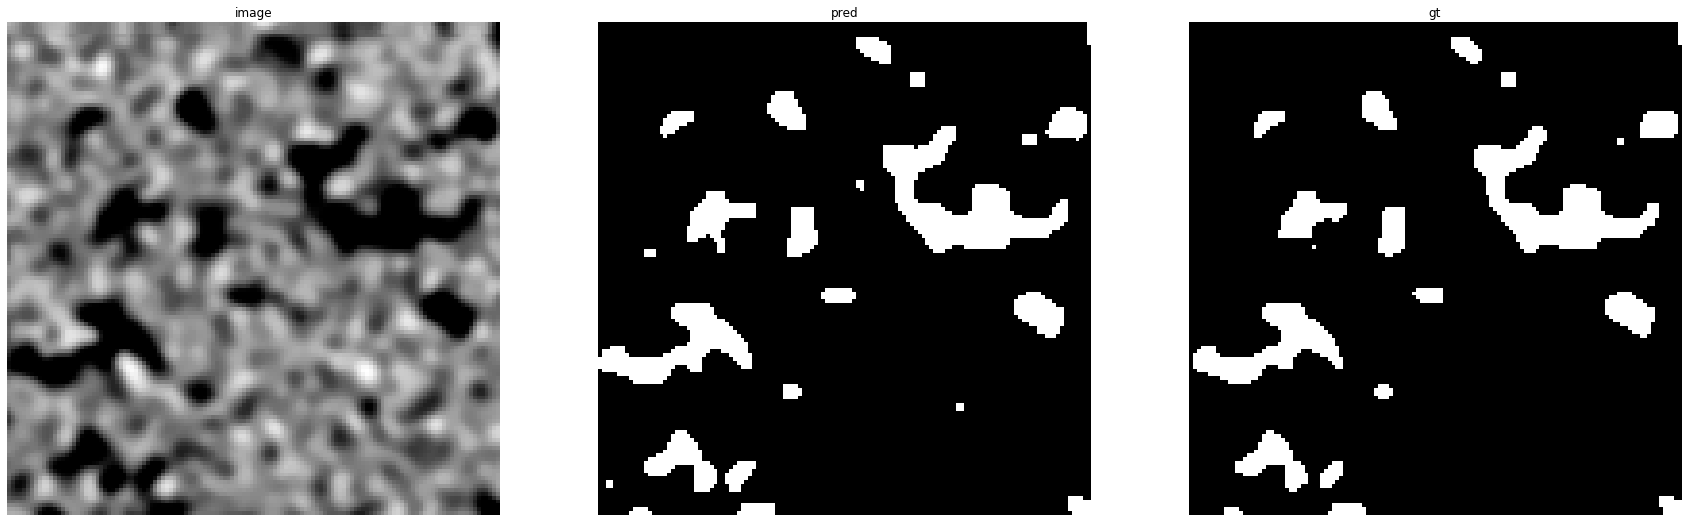

accuracy    : 0.99053955078125
precision   : 0.9184782608695652
recall      : 0.9970501474926253
f1          : 0.9561527581329562
pr_auc      : 0.99560461532249
iou         : 0.9159891598915989


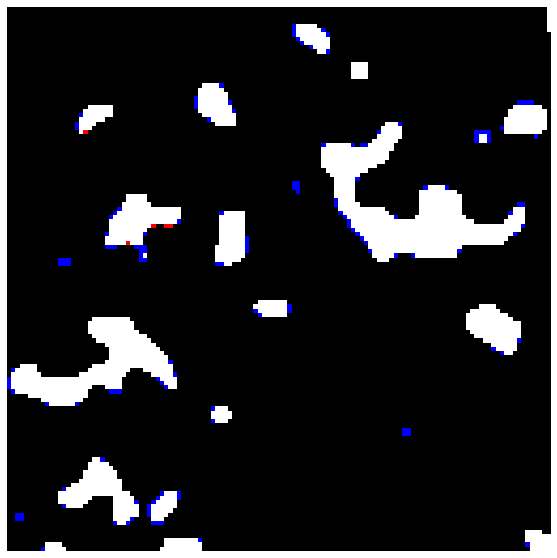

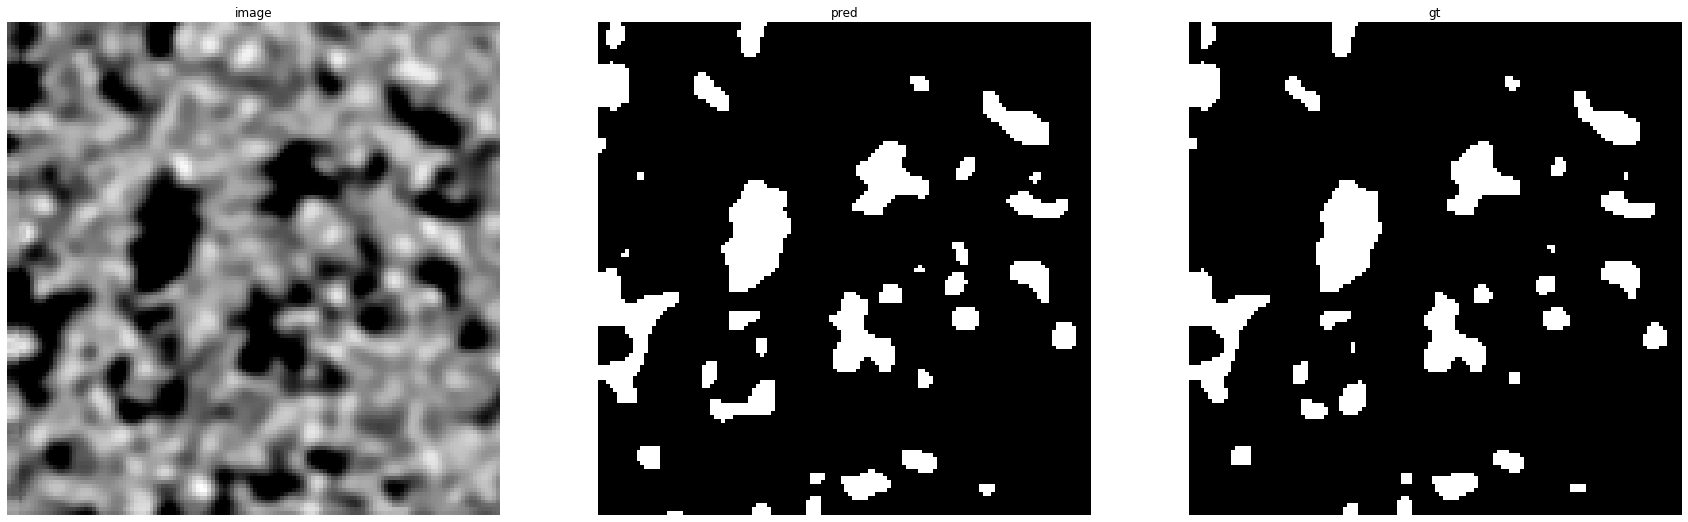

accuracy    : 0.98626708984375
precision   : 0.8979020979020979
recall      : 0.9968944099378882
f1          : 0.9448123620309051
pr_auc      : 0.9954667274159155
iou         : 0.895397489539749


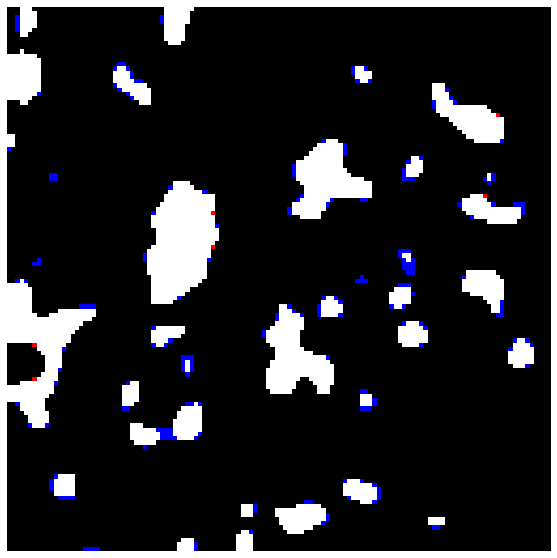

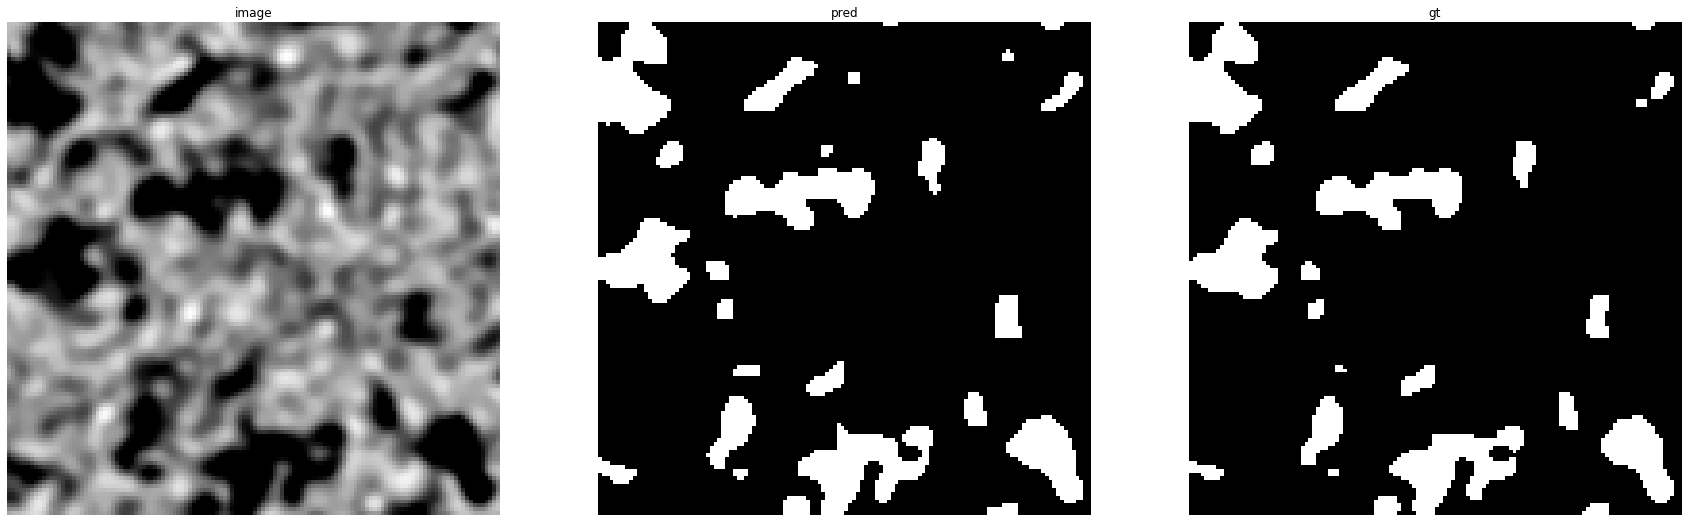

accuracy    : 0.98382568359375
precision   : 0.9029399919452276
recall      : 0.9894086496028244
f1          : 0.9441987786902506
pr_auc      : 0.9940965993106797
iou         : 0.8942959712804148


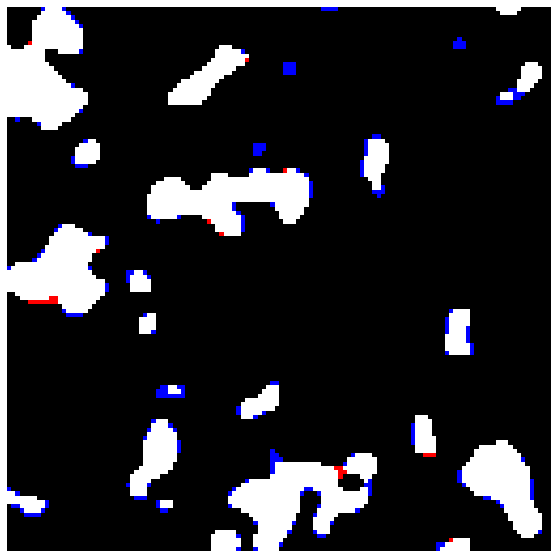

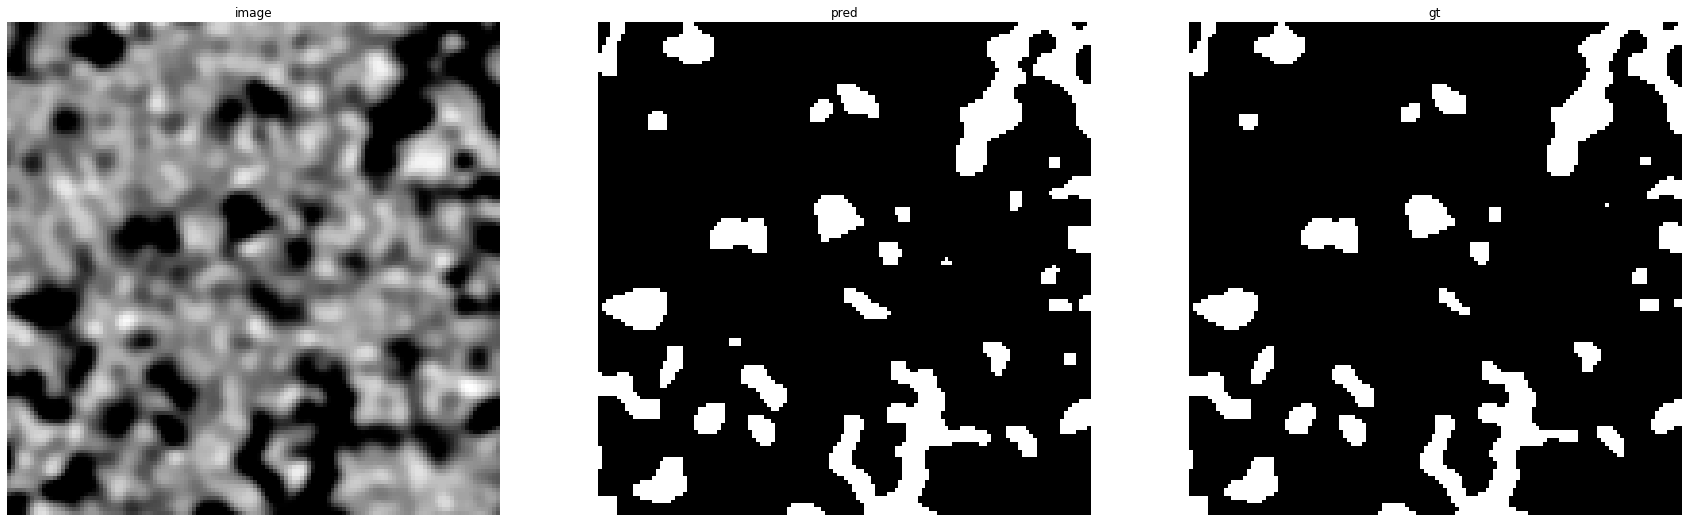

accuracy    : 0.98443603515625
precision   : 0.9078600977811208
recall      : 0.9958745874587459
f1          : 0.9498327759197325
pr_auc      : 0.9947291770244244
iou         : 0.9044585987261147


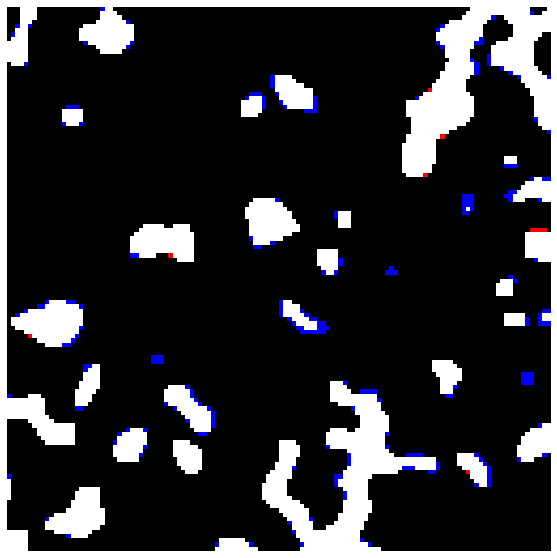

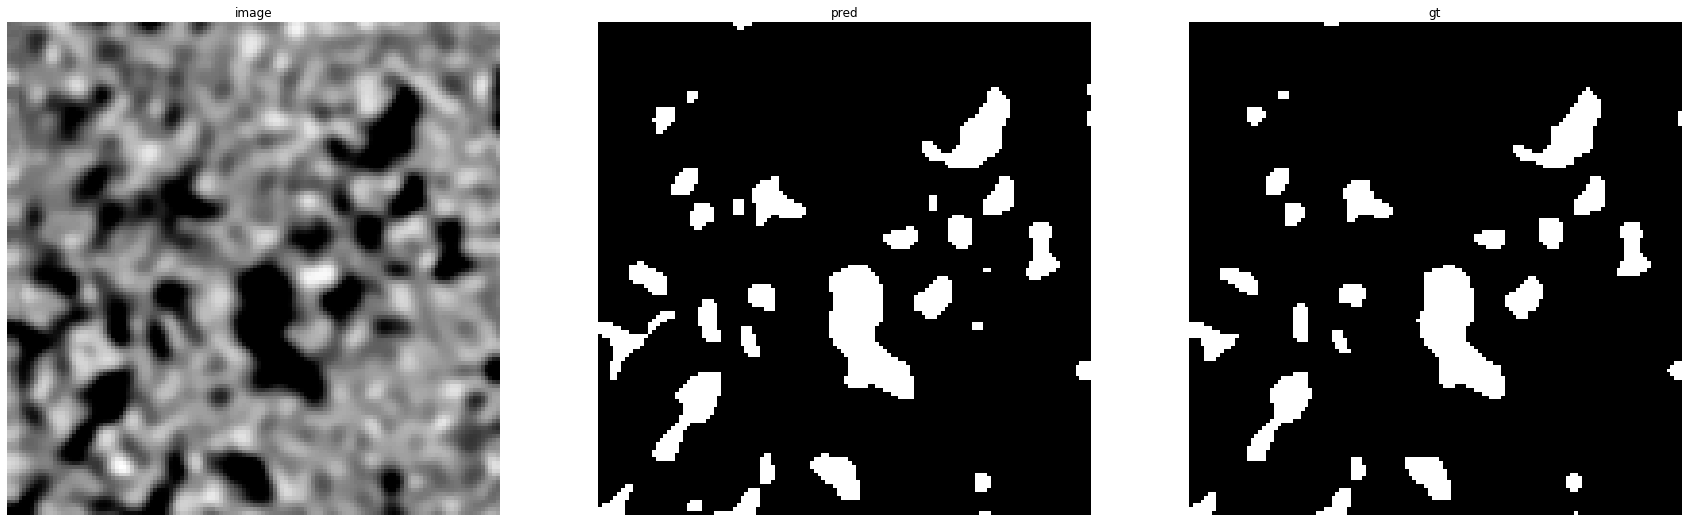

accuracy    : 0.984619140625
precision   : 0.8689473684210526
recall      : 0.998186215235792
f1          : 0.9290939786156444
pr_auc      : 0.9918627297555044
iou         : 0.8675775091960063


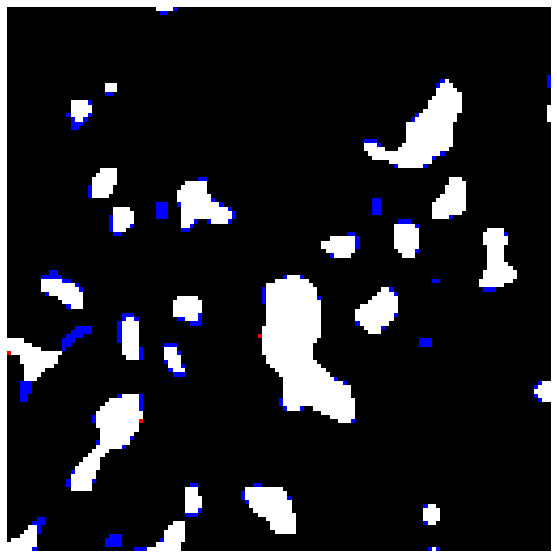

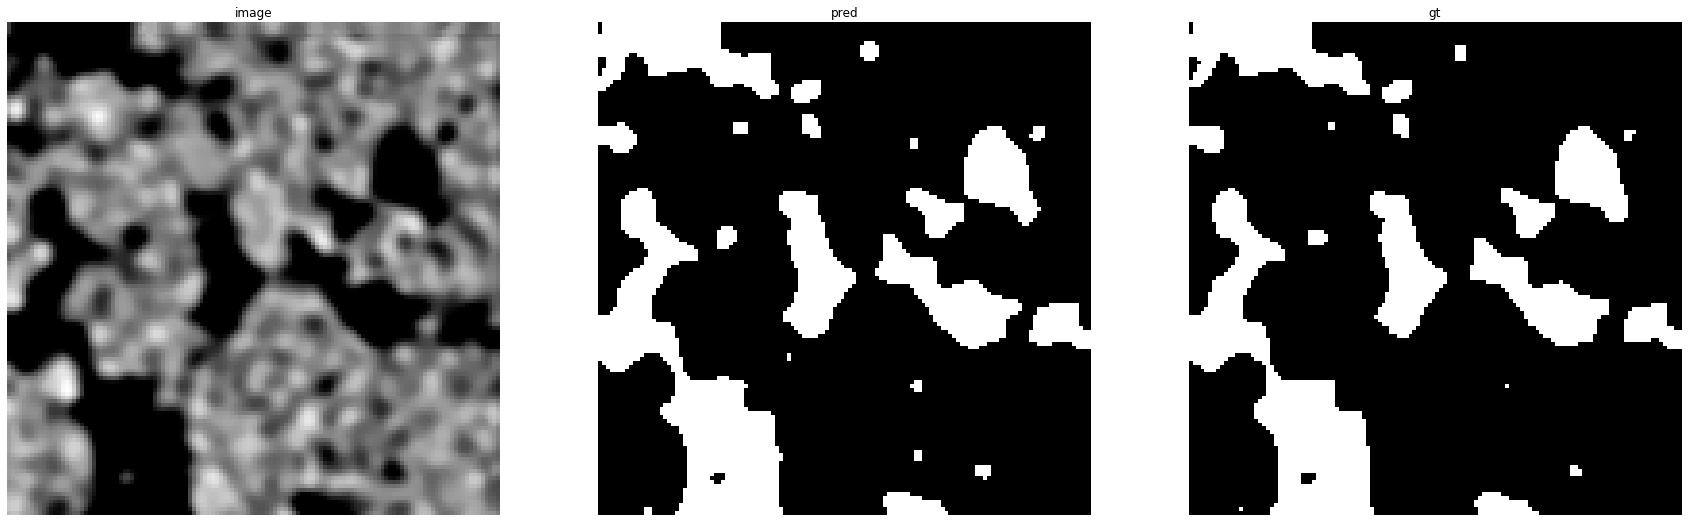

accuracy    : 0.9862060546875
precision   : 0.9414792739095096
recall      : 0.9971305595408895
f1          : 0.9685061315496098
pr_auc      : 0.9984094131032223
iou         : 0.9389354228586868


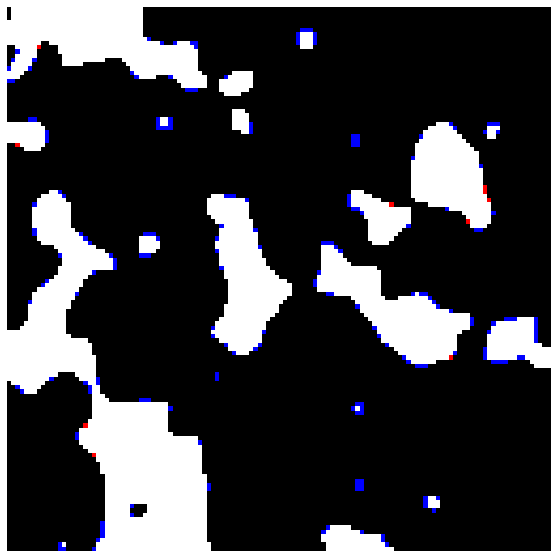

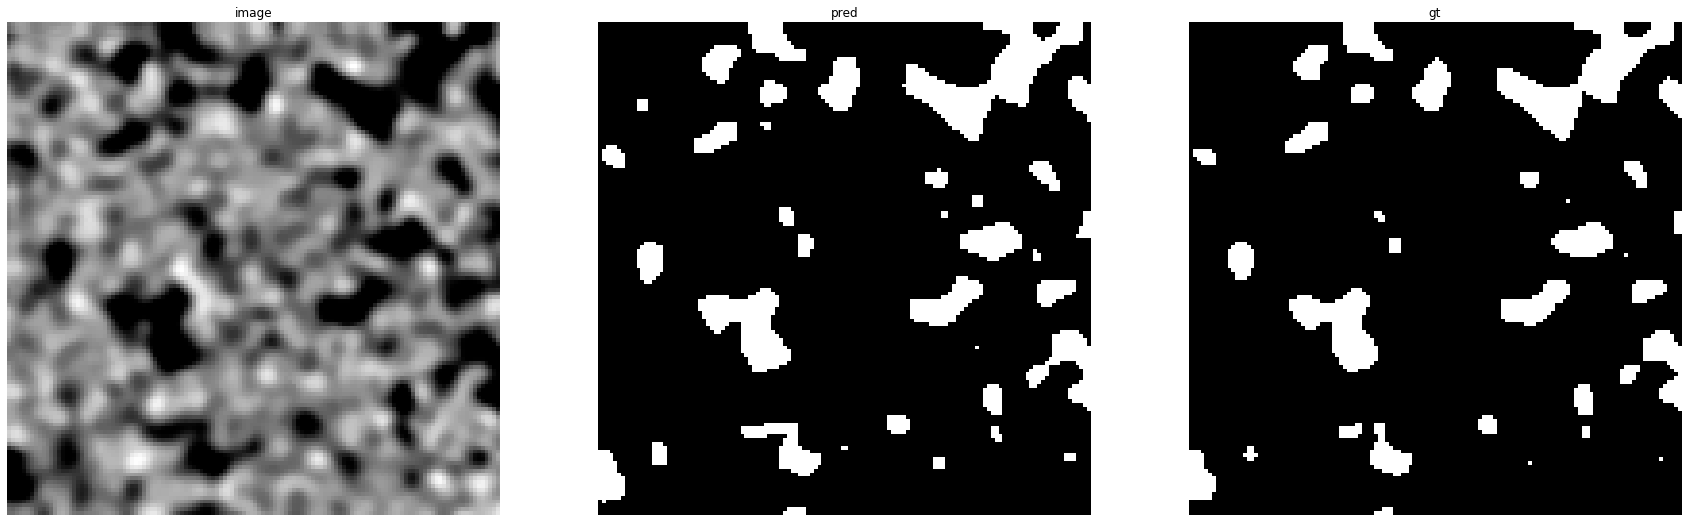

accuracy    : 0.98223876953125
precision   : 0.8715261958997722
recall      : 0.9953173777315296
f1          : 0.9293174641729415
pr_auc      : 0.9927799902479786
iou         : 0.8679673321234119


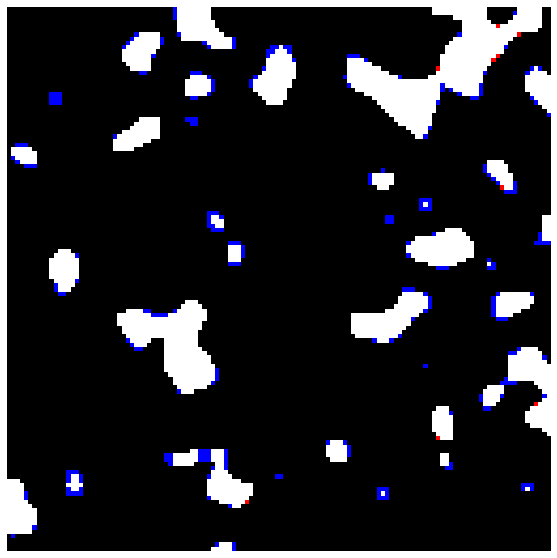

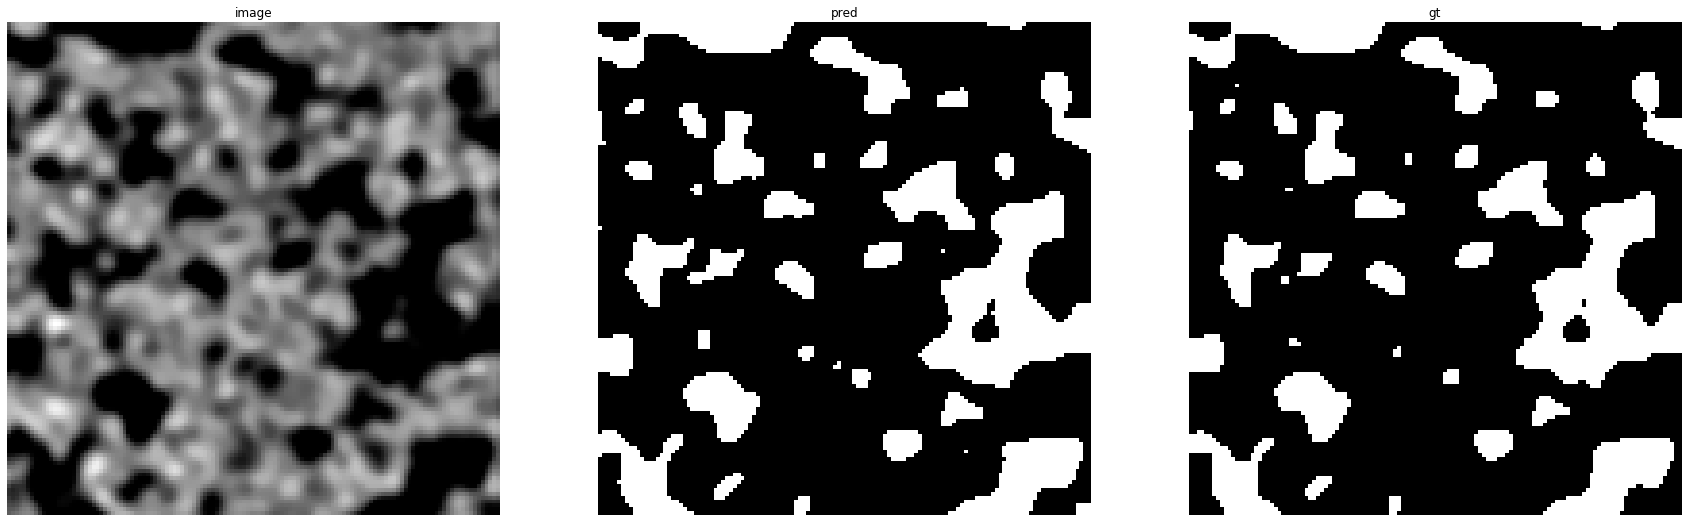

accuracy    : 0.9825439453125
precision   : 0.9314688838498363
recall      : 0.9962274319590407
f1          : 0.9627604166666668
pr_auc      : 0.9971625633967974
iou         : 0.928194828019081


Prediction for carbRNF:


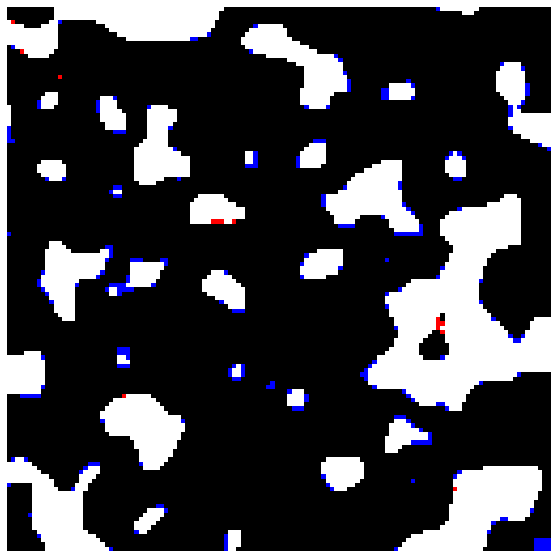

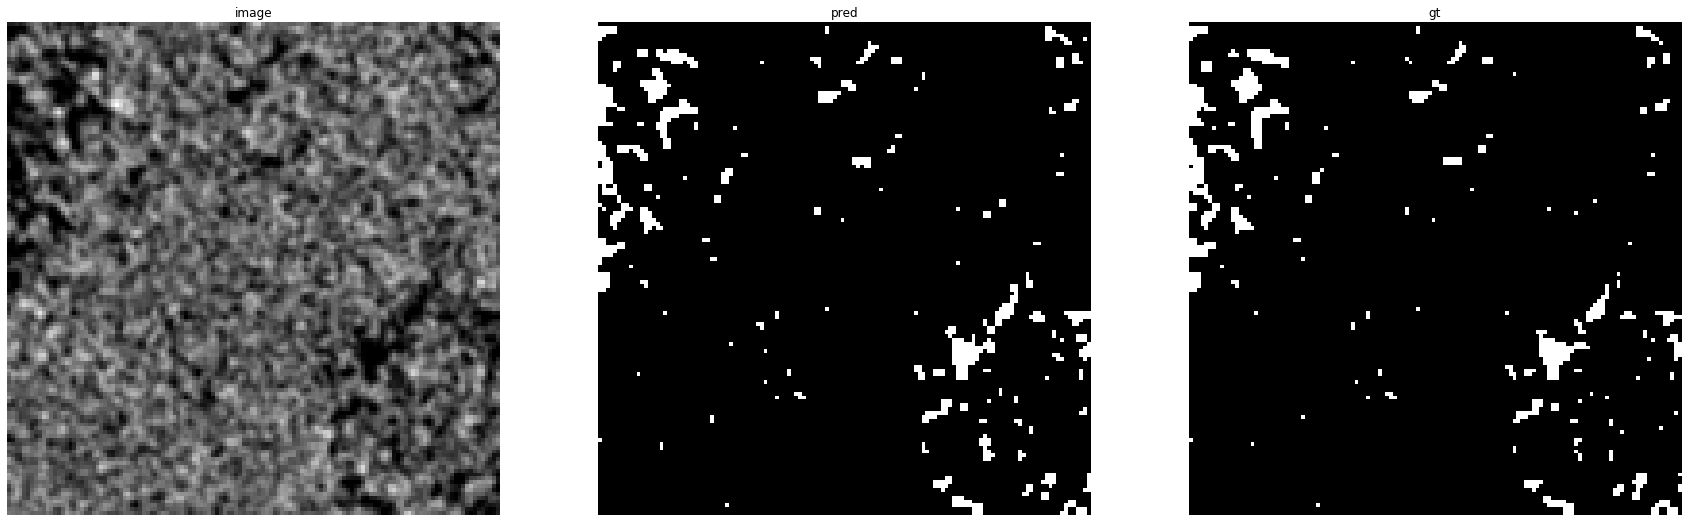

accuracy    : 0.99041748046875
precision   : 0.8717026378896883
recall      : 0.9356499356499357
f1          : 0.9025450031036623
pr_auc      : 0.9757002501623872
iou         : 0.8223981900452488


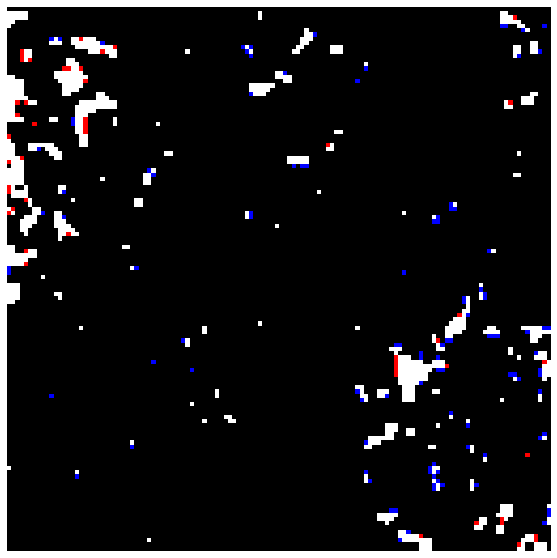

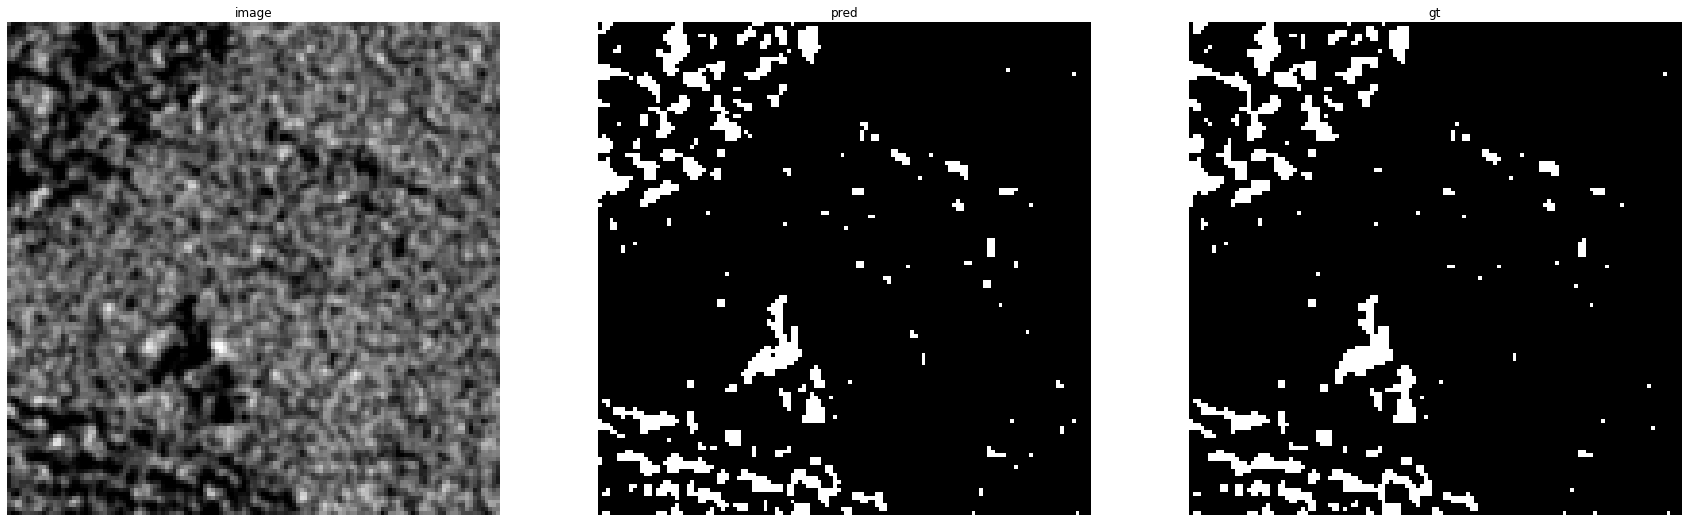

accuracy    : 0.98638916015625
precision   : 0.9236471460340994
recall      : 0.9121522693997072
f1          : 0.9178637200736648
pr_auc      : 0.9801177348356372
iou         : 0.8481960517358748


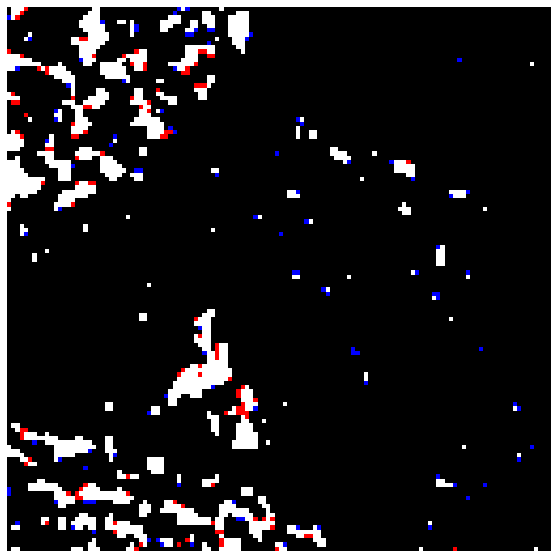

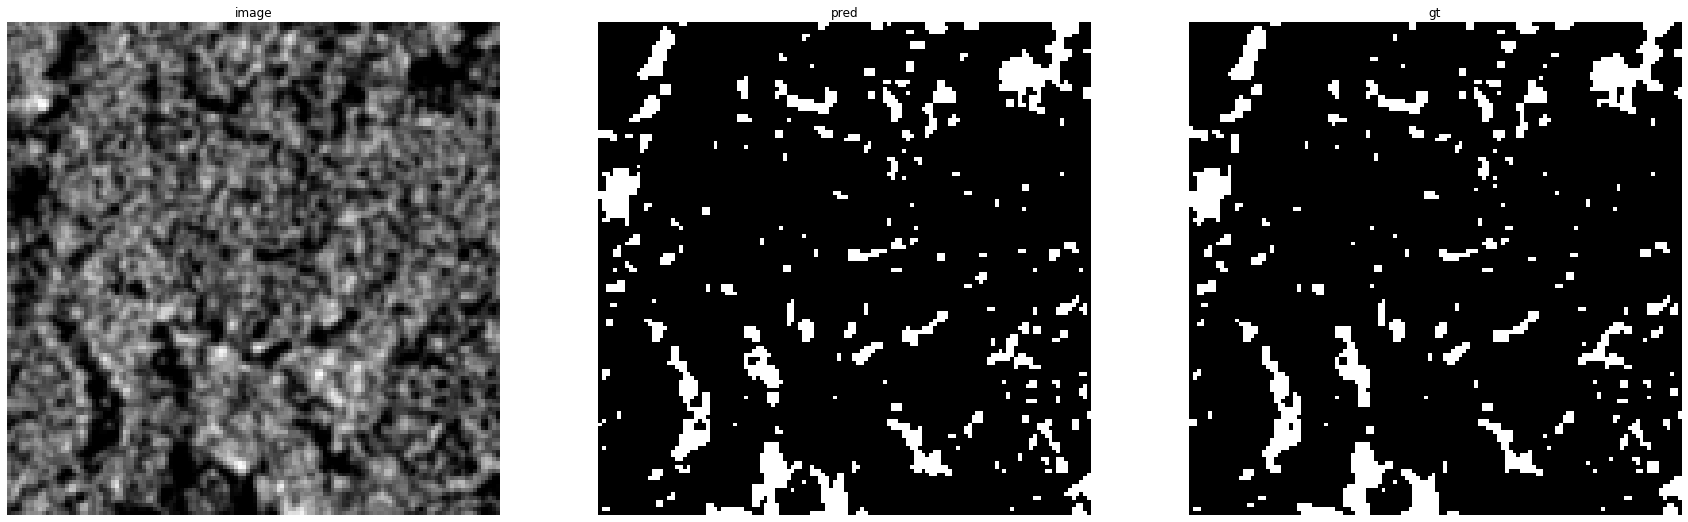

accuracy    : 0.98443603515625
precision   : 0.9251814628699051
recall      : 0.9319460067491564
f1          : 0.9285514149621742
pr_auc      : 0.9845924429806527
iou         : 0.8666317991631799


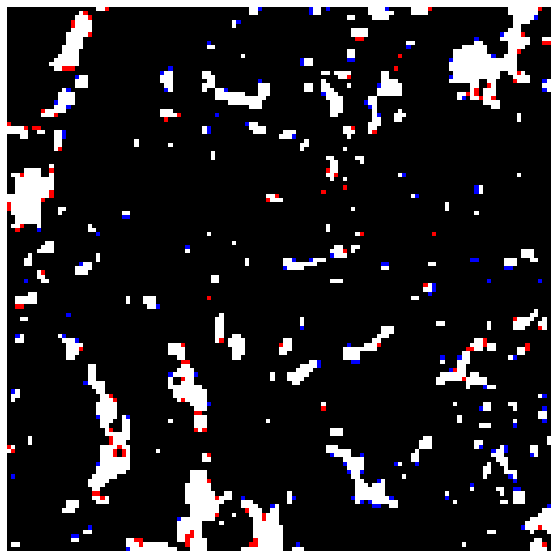

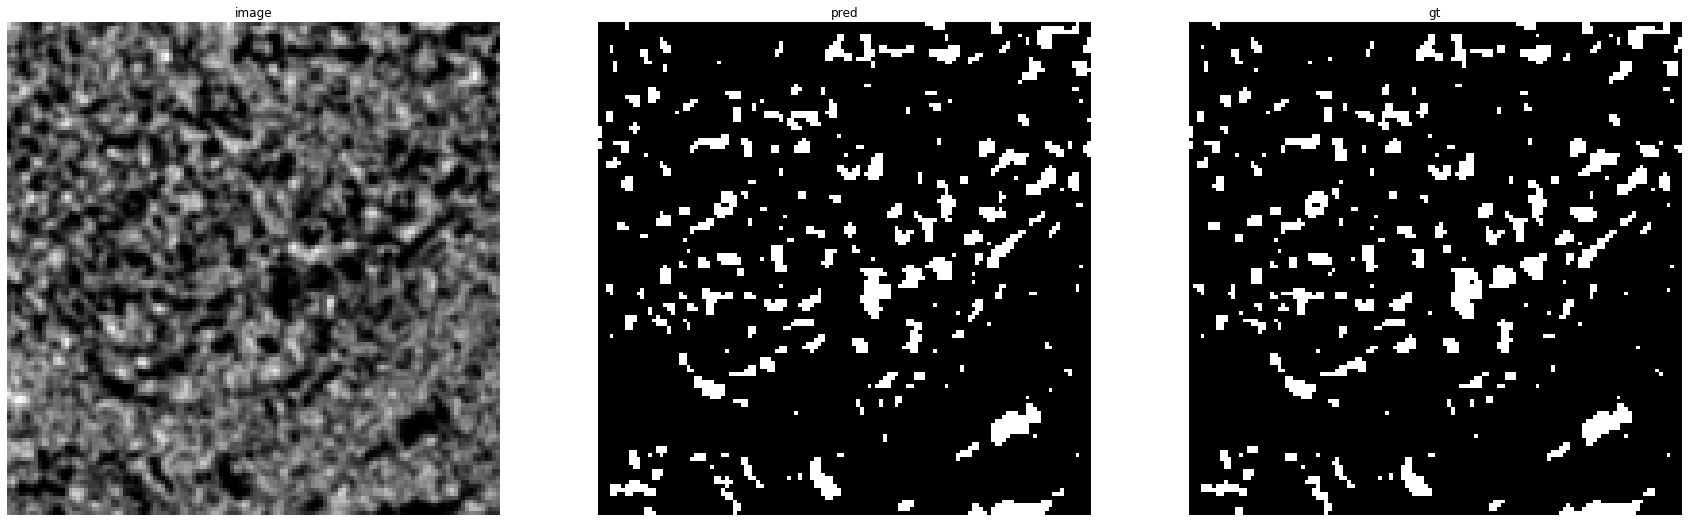

accuracy    : 0.98419189453125
precision   : 0.9209778283115406
recall      : 0.9310344827586207
f1          : 0.9259788511003143
pr_auc      : 0.9824122986236625
iou         : 0.8621607237892496


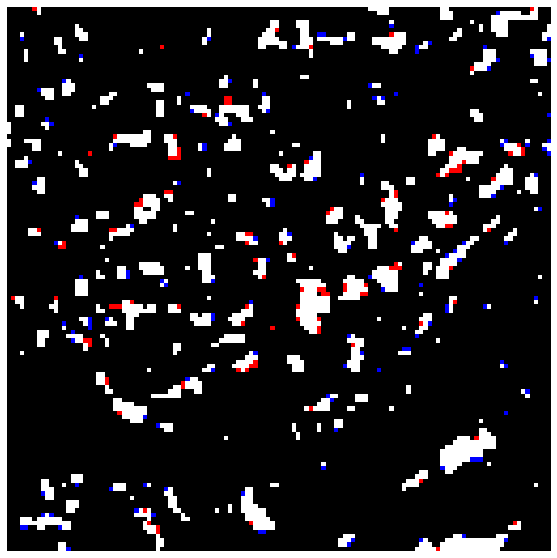

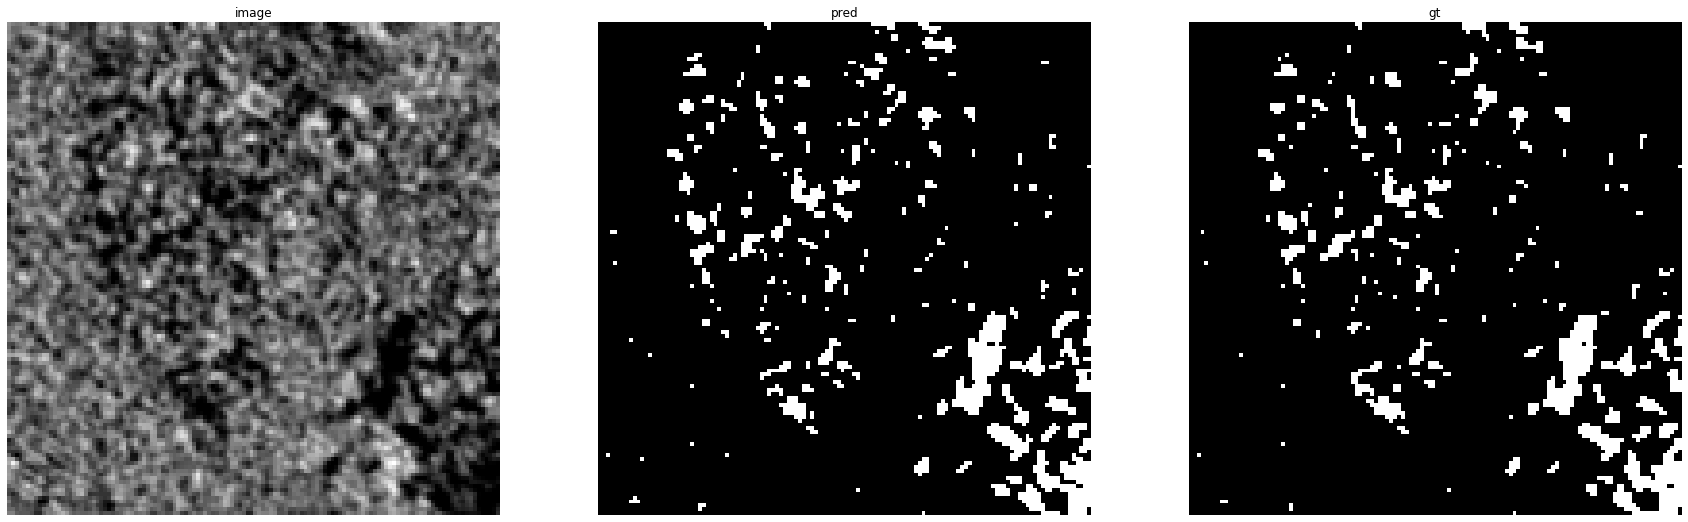

accuracy    : 0.98626708984375
precision   : 0.8950749464668094
recall      : 0.9414414414414415
f1          : 0.9176728869374313
pr_auc      : 0.9813338808615127
iou         : 0.847870182555781


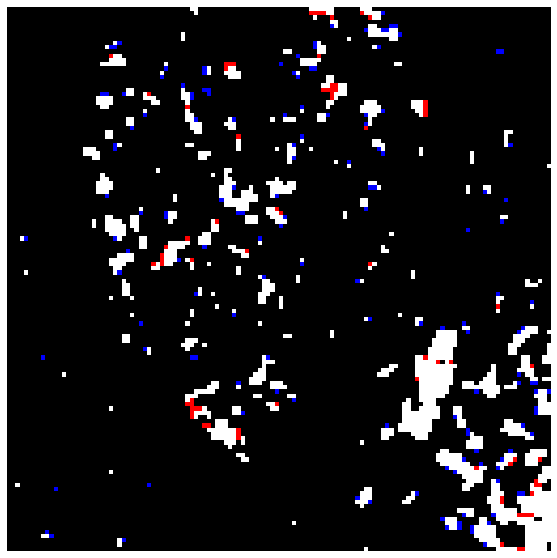

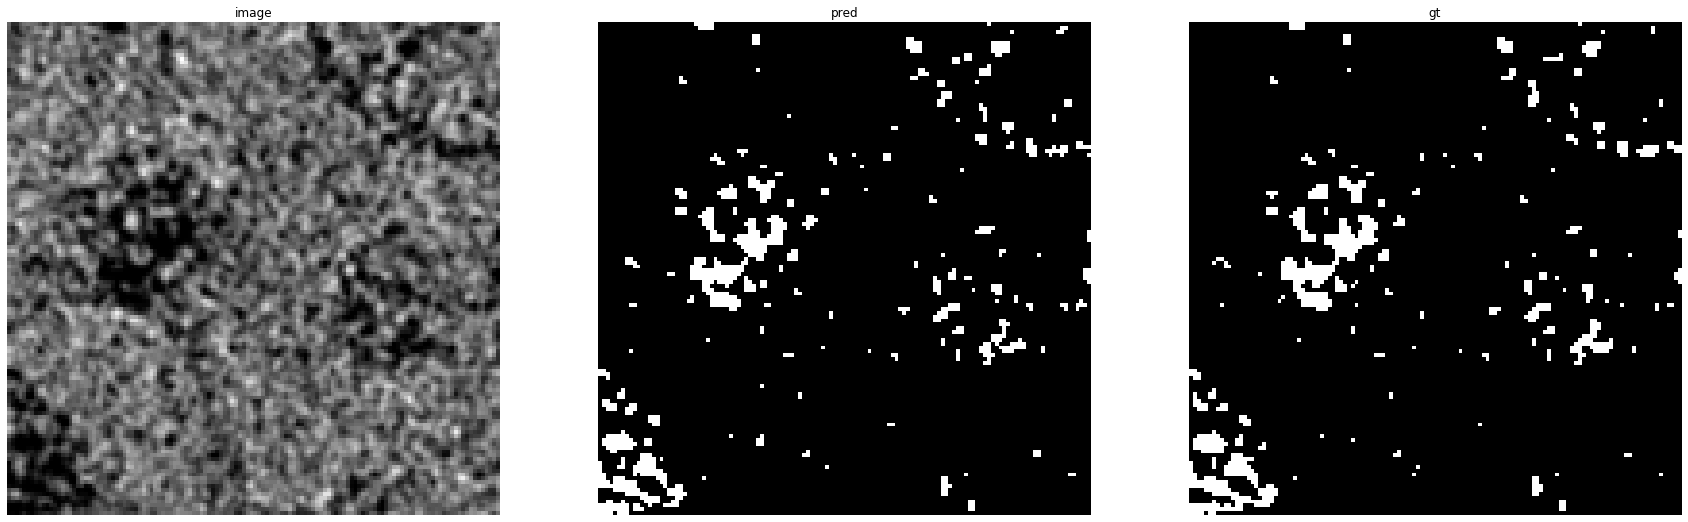

accuracy    : 0.9901123046875
precision   : 0.9092872570194385
recall      : 0.9152173913043479
f1          : 0.9122426868905742
pr_auc      : 0.9773823395265919
iou         : 0.8386454183266933


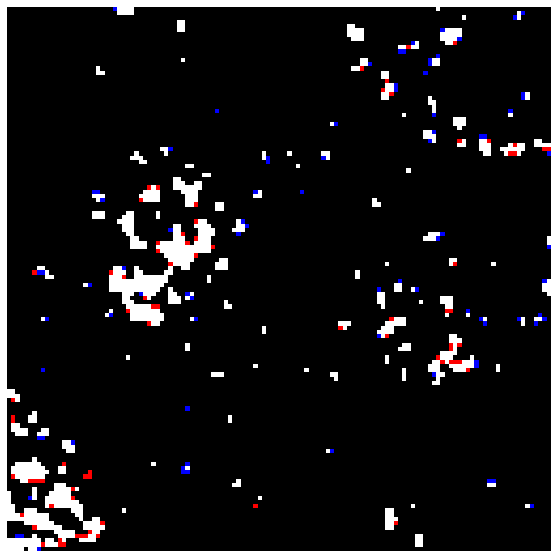

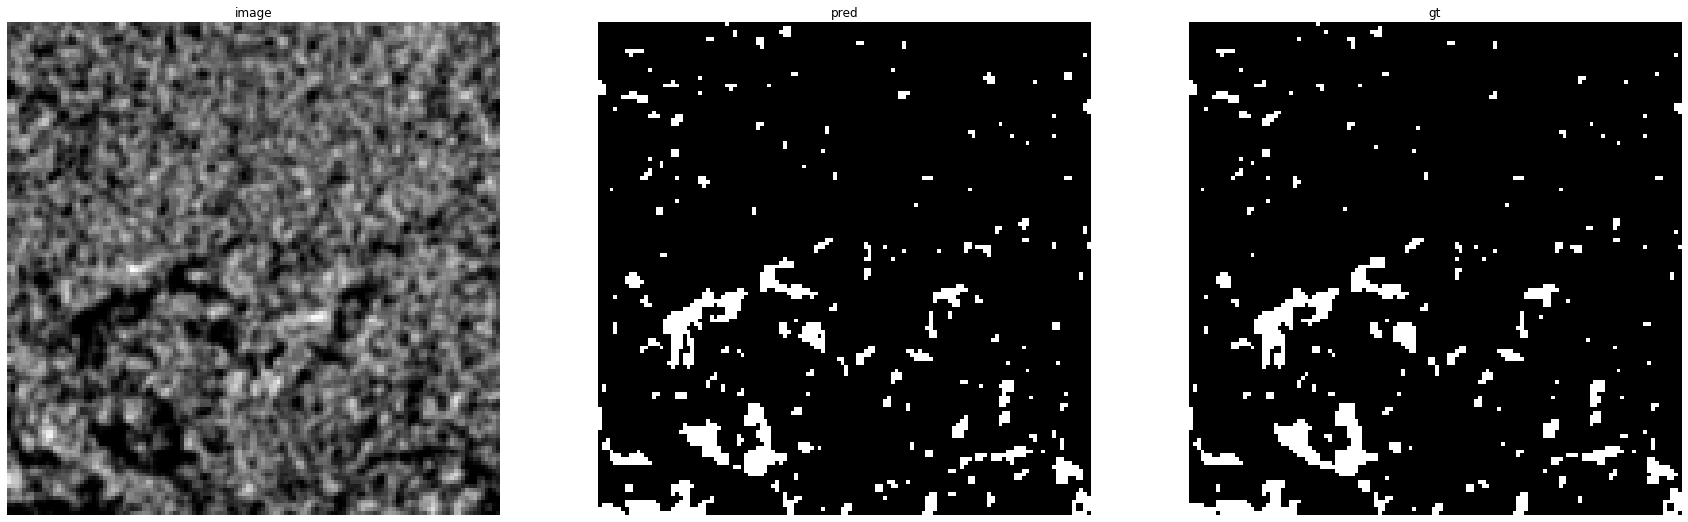

accuracy    : 0.98883056640625
precision   : 0.9111111111111111
recall      : 0.9365482233502538
f1          : 0.9236545682102627
pr_auc      : 0.9834432142237247
iou         : 0.858139534883721


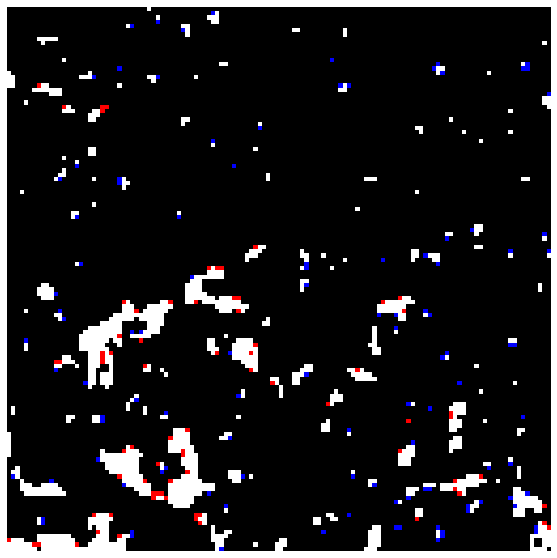

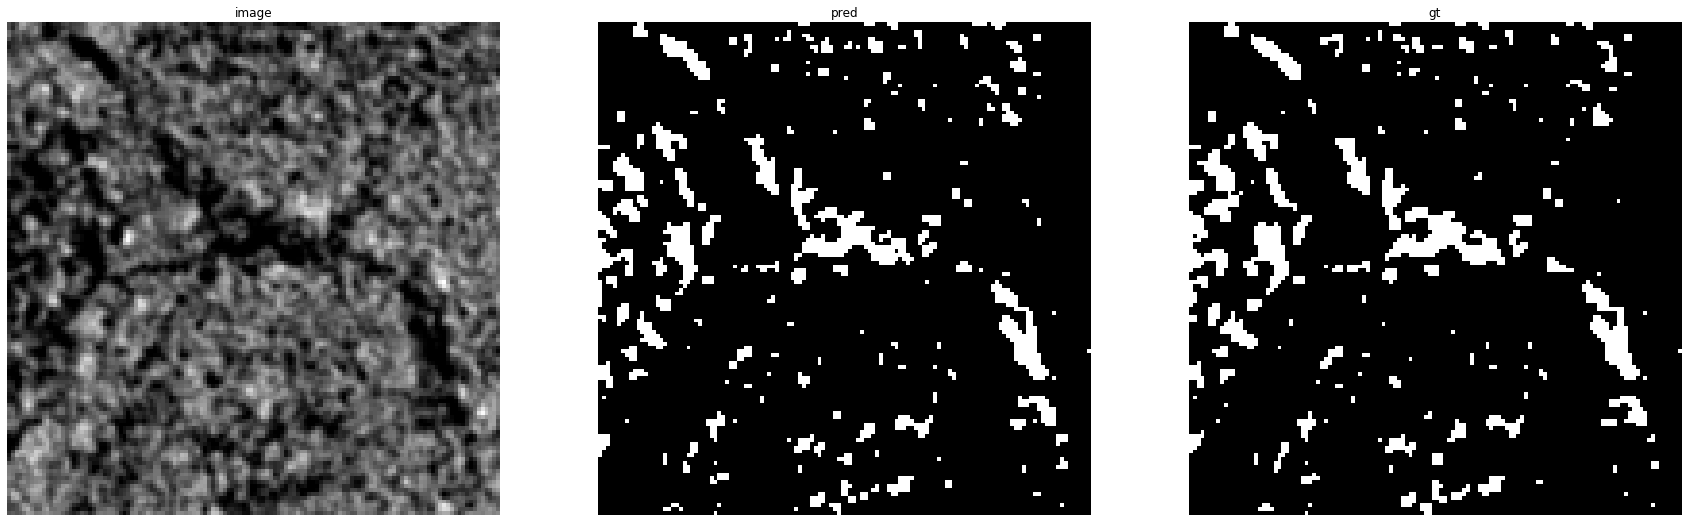

accuracy    : 0.9833984375
precision   : 0.945321992709599
recall      : 0.8952819332566168
f1          : 0.9196217494089833
pr_auc      : 0.9796286759093478
iou         : 0.8512035010940919


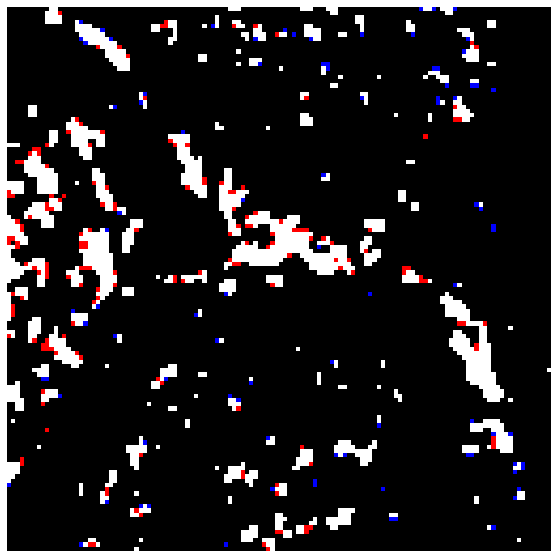

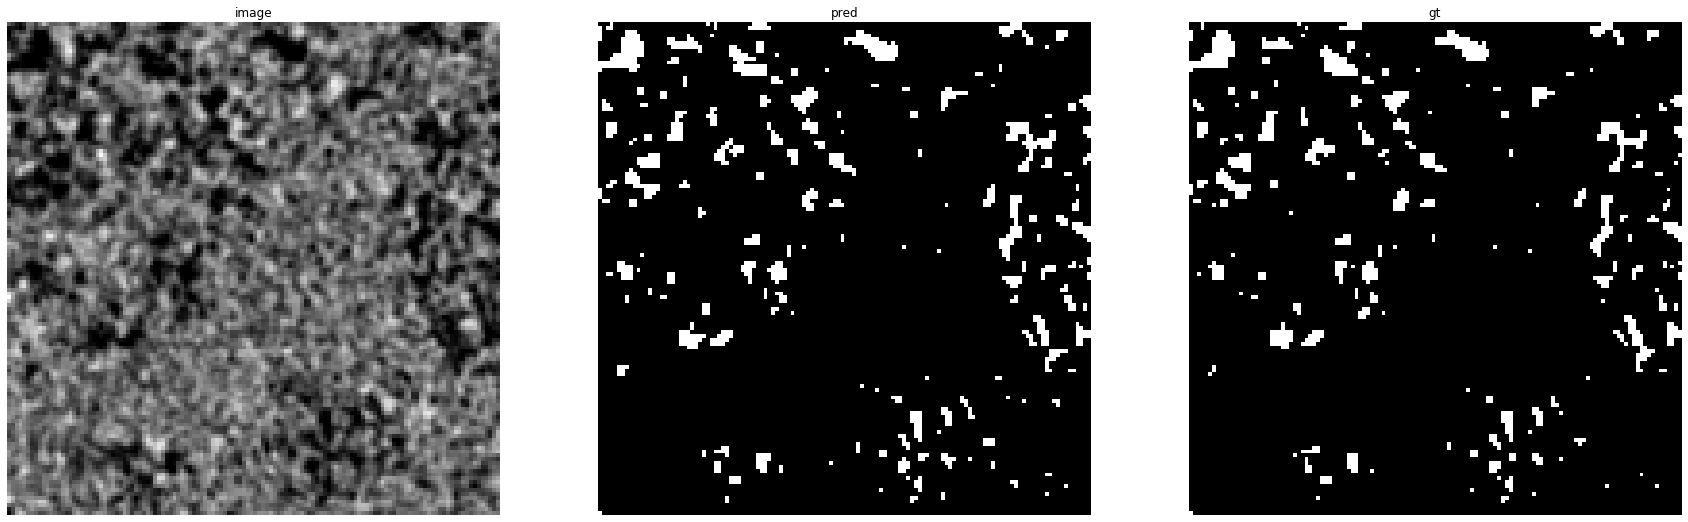

accuracy    : 0.98779296875
precision   : 0.8741496598639455
recall      : 0.9518518518518518
f1          : 0.9113475177304964
pr_auc      : 0.9810999174317212
iou         : 0.8371335504885994


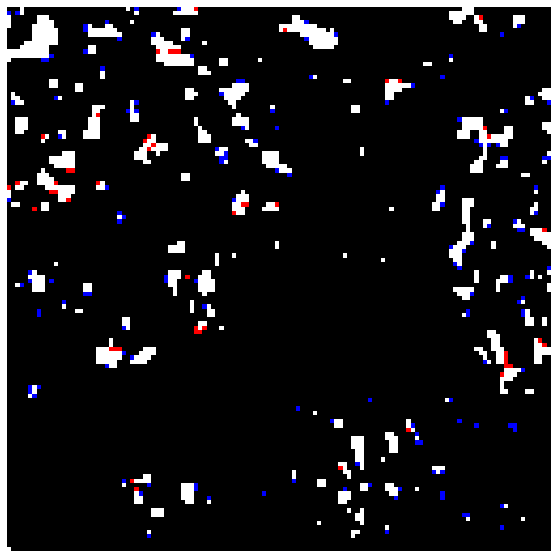

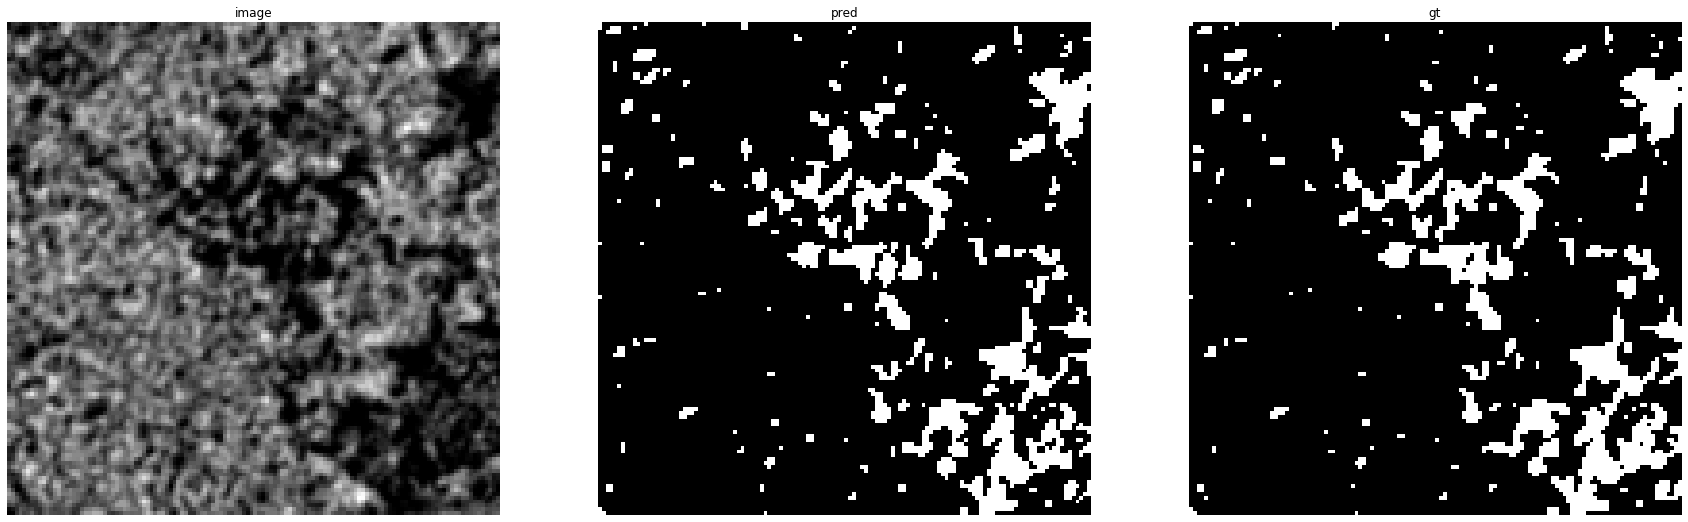

accuracy    : 0.98291015625
precision   : 0.9510261194029851
recall      : 0.9209575429087624
f1          : 0.9357503441945847
pr_auc      : 0.9871914566866824
iou         : 0.8792583009918068


Prediction for SPE_carb10_58_box3:


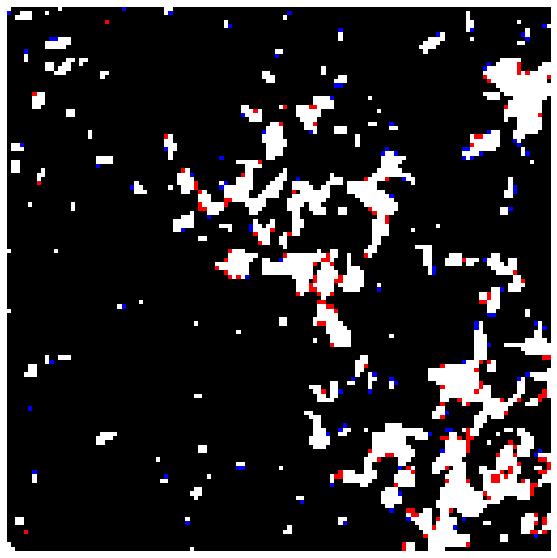

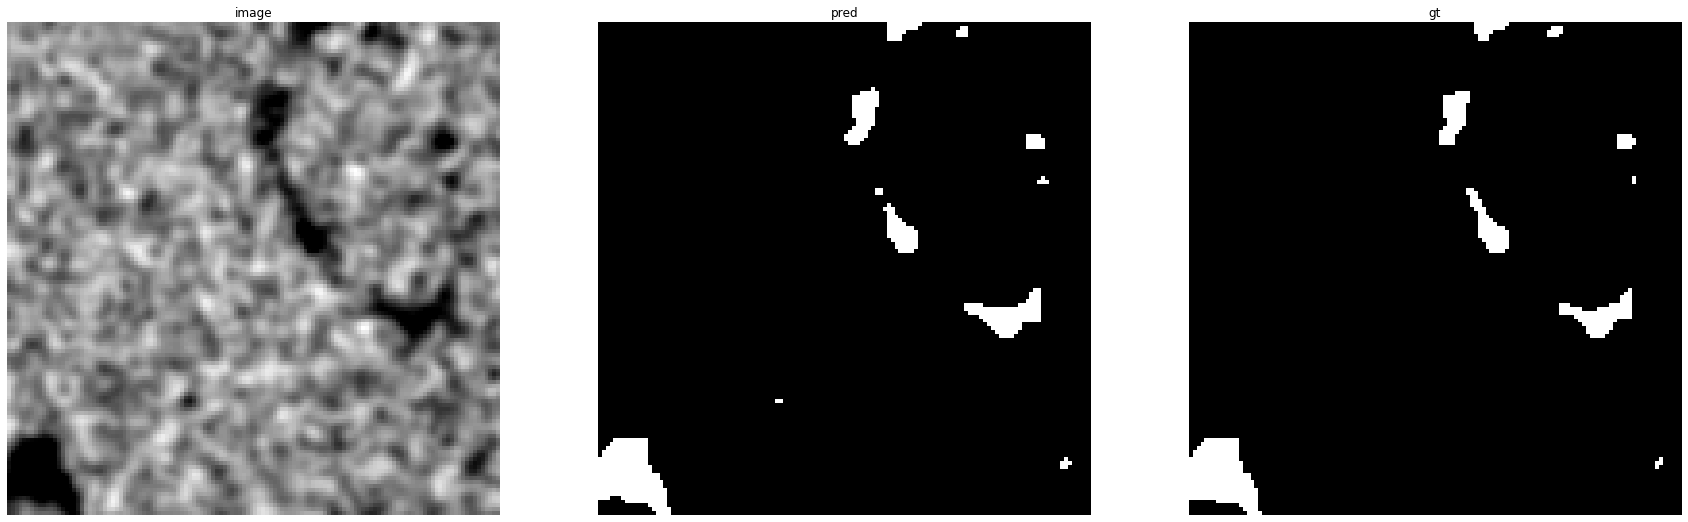

accuracy    : 0.99652099609375
precision   : 0.9351535836177475
recall      : 0.9664902998236331
f1          : 0.950563746747615
pr_auc      : 0.9928424252564586
iou         : 0.9057851239669421


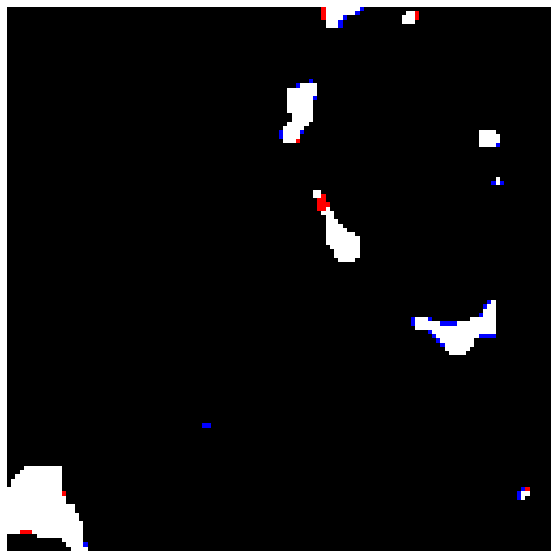

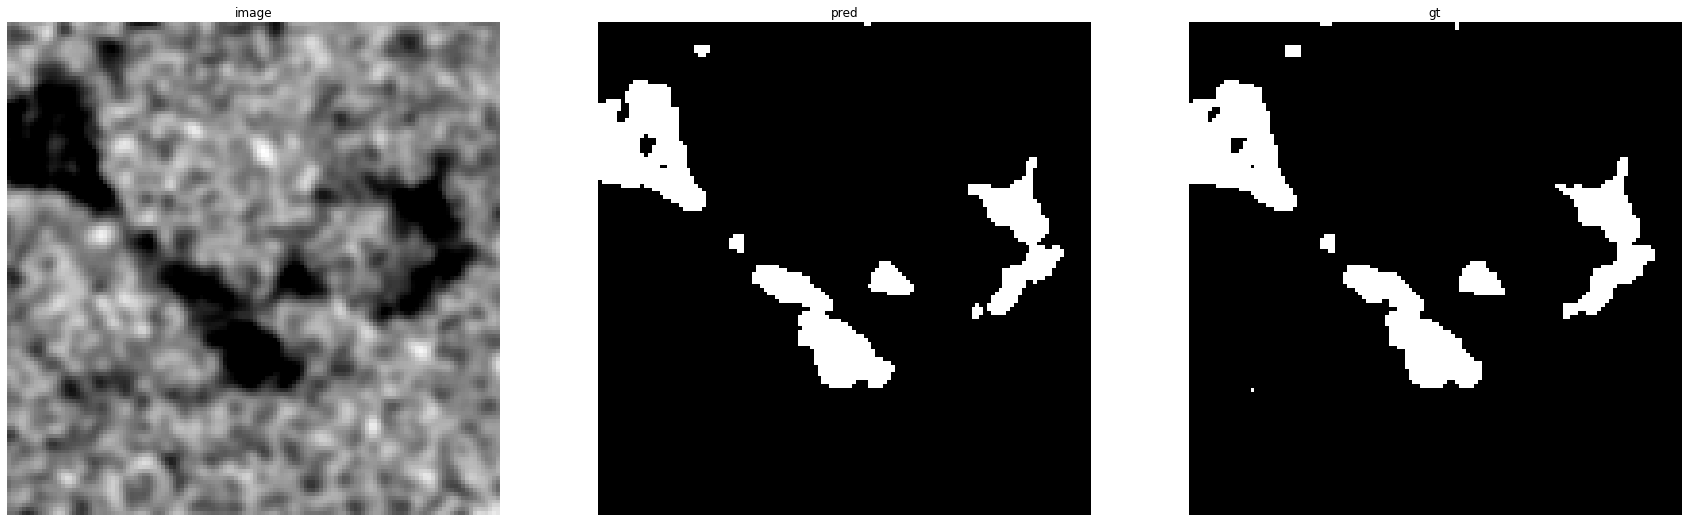

accuracy    : 0.99395751953125
precision   : 0.989993328885924
recall      : 0.9464285714285714
f1          : 0.9677208999021845
pr_auc      : 0.9981108779946576
iou         : 0.9374605180037903


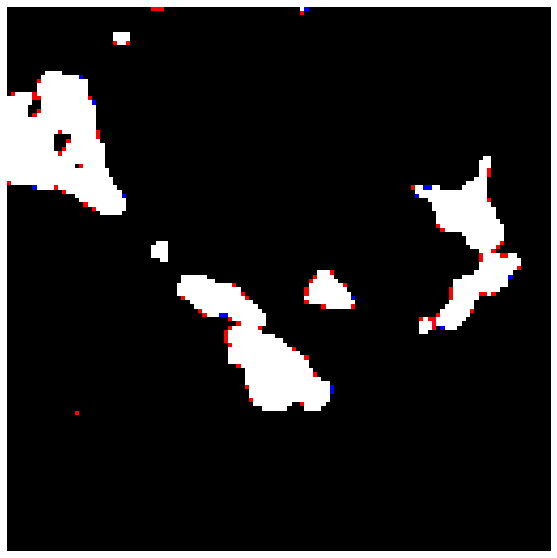

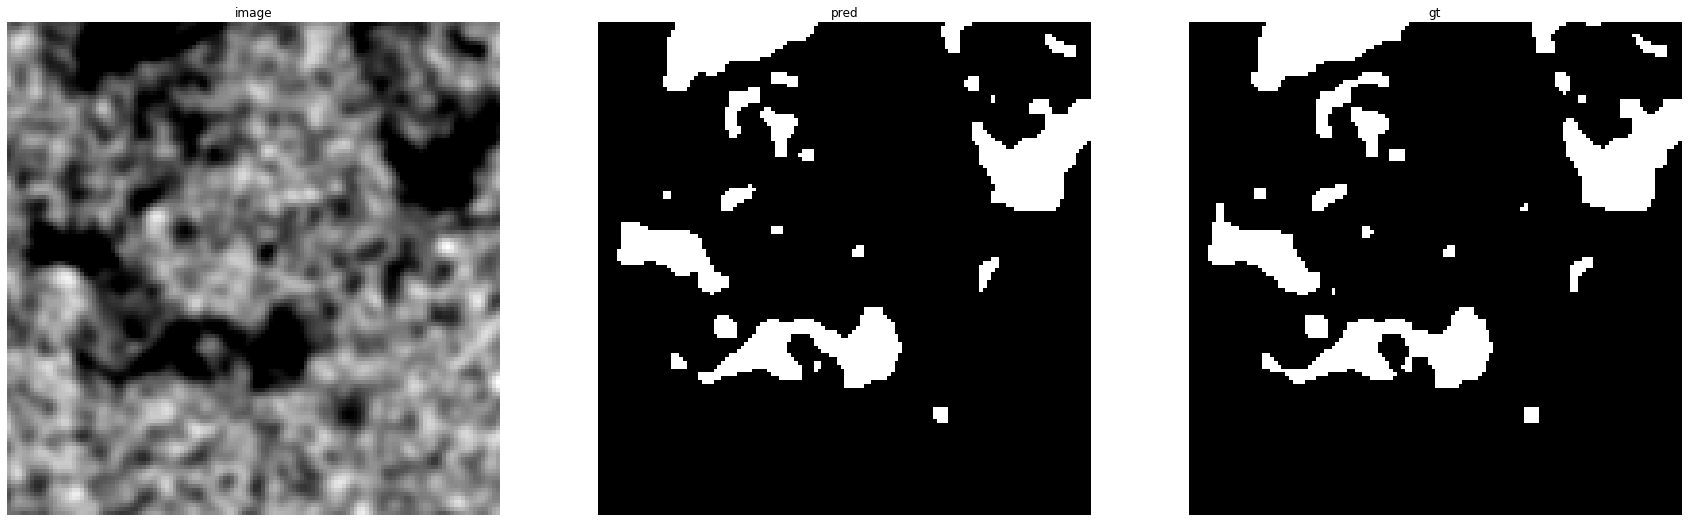

accuracy    : 0.98846435546875
precision   : 0.9938036224976168
recall      : 0.9221583370190182
f1          : 0.9566414315209911
pr_auc      : 0.9970754732801308
iou         : 0.91688654353562


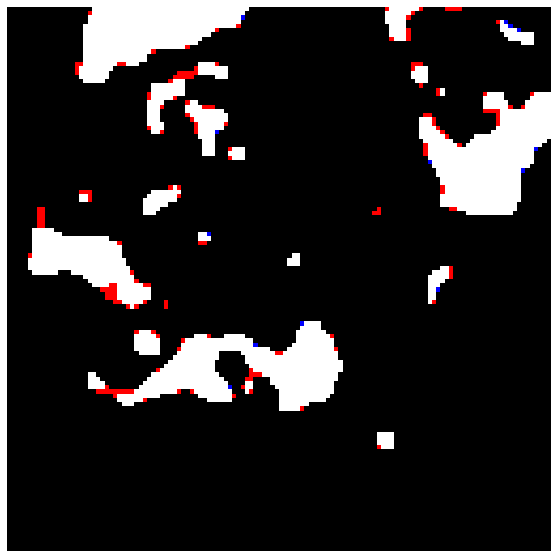

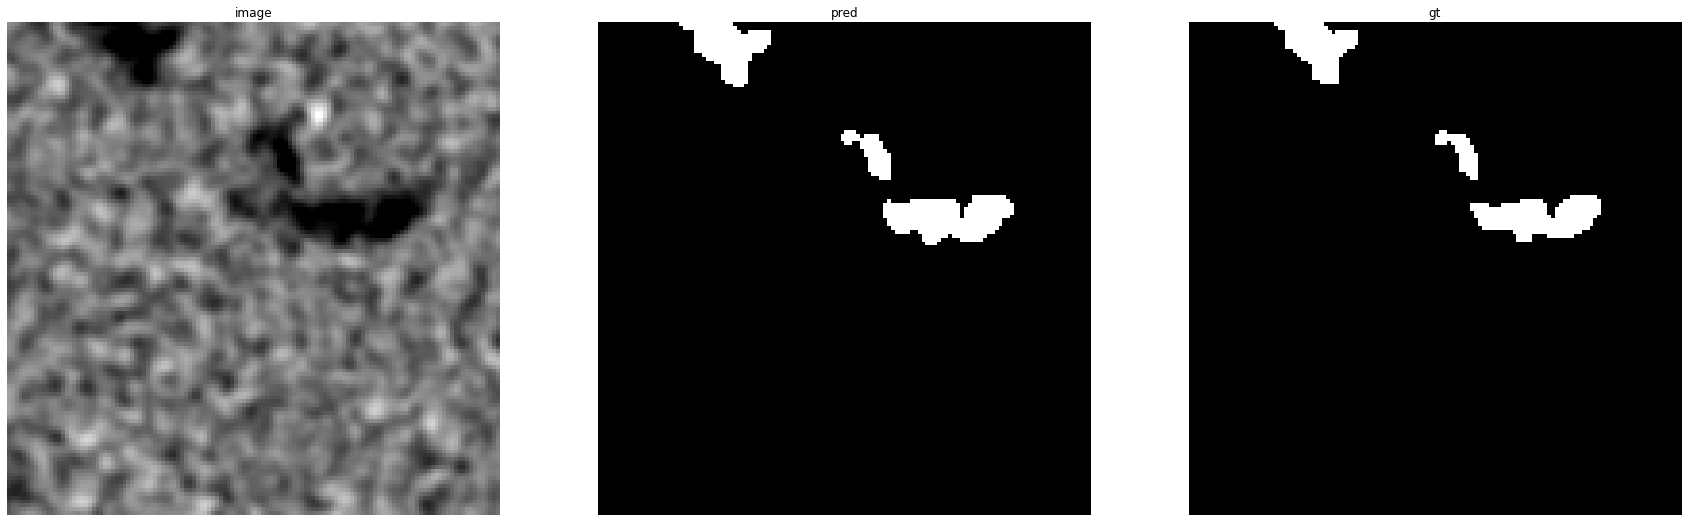

accuracy    : 0.9951171875
precision   : 0.8747913188647746
recall      : 0.9905482041587902
f1          : 0.9290780141843972
pr_auc      : 0.9934932771479996
iou         : 0.8675496688741722


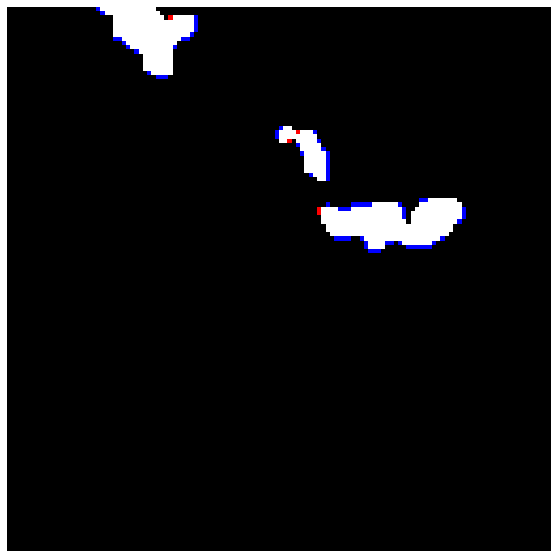

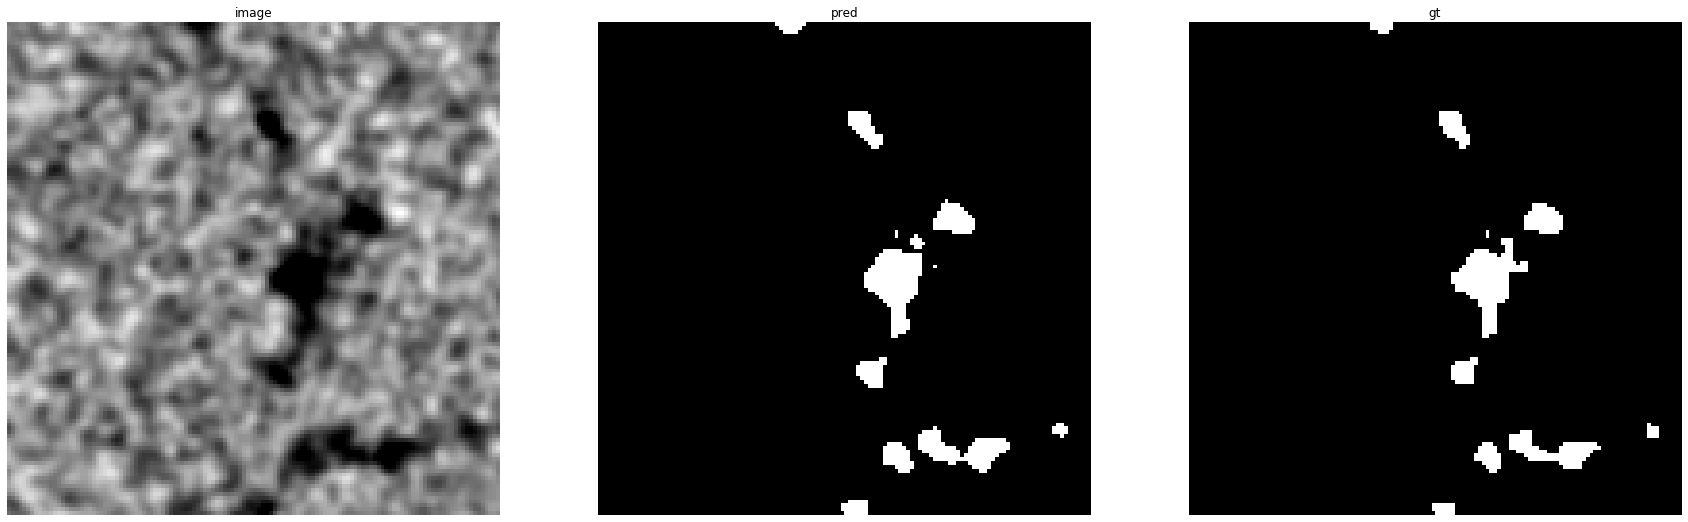

accuracy    : 0.993896484375
precision   : 0.8788870703764321
recall      : 0.9538188277087034
f1          : 0.9148211243611586
pr_auc      : 0.9851633349529958
iou         : 0.8430141287284144


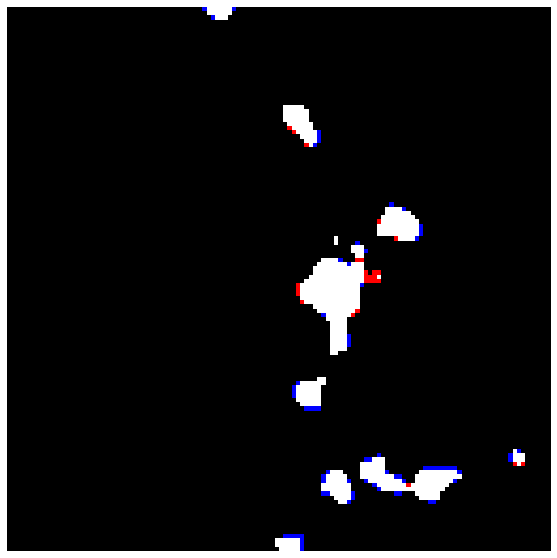

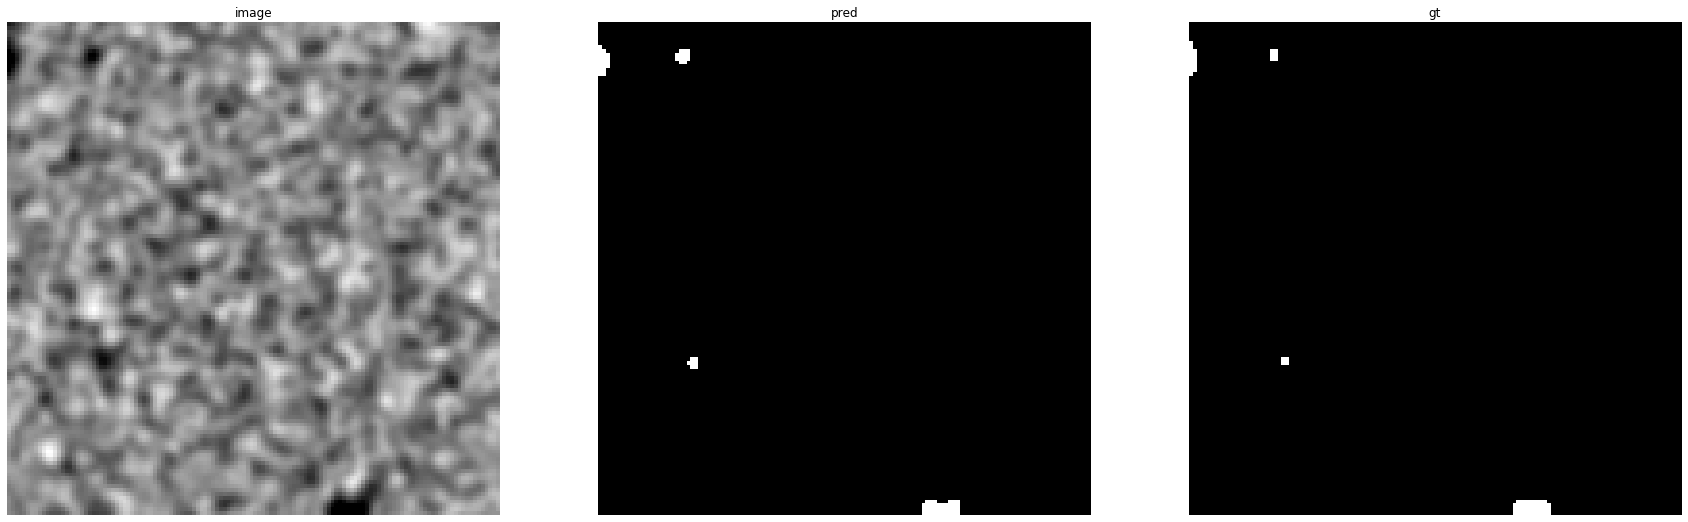

accuracy    : 0.998779296875
precision   : 0.7866666666666666
recall      : 0.9365079365079365
f1          : 0.8550724637681159
pr_auc      : 0.967036994810955
iou         : 0.7468354430379747


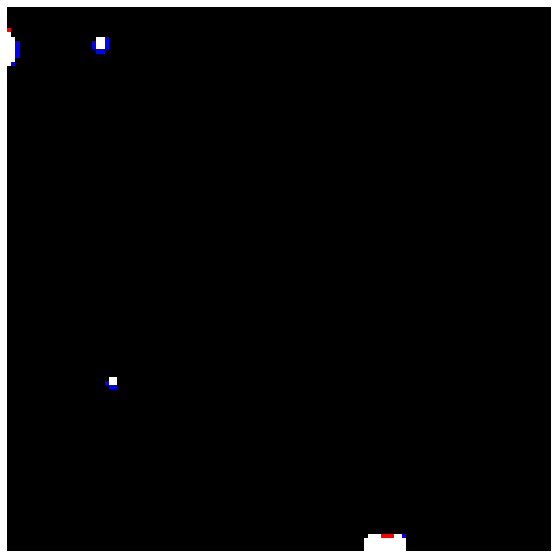

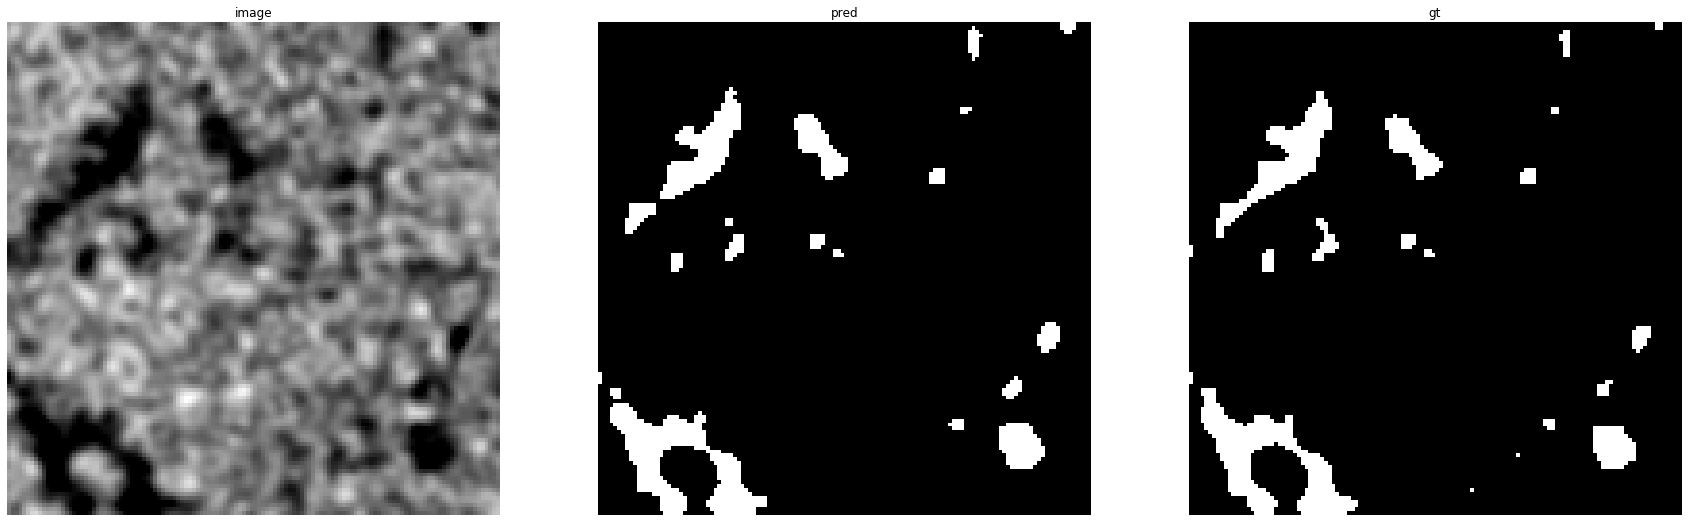

accuracy    : 0.990478515625
precision   : 0.9284497444633731
recall      : 0.9380378657487092
f1          : 0.9332191780821918
pr_auc      : 0.9876044137258317
iou         : 0.8747993579454254


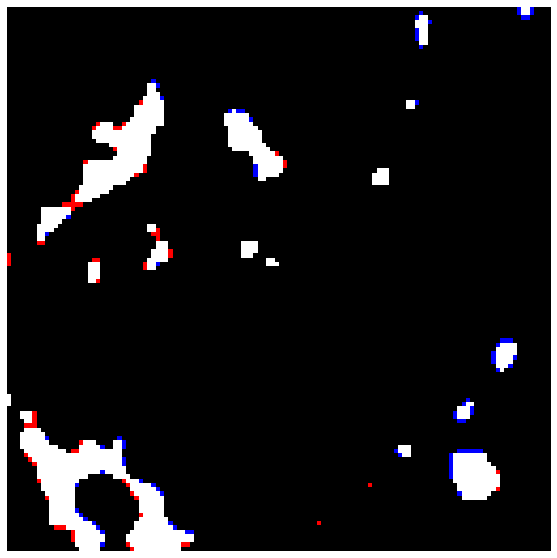

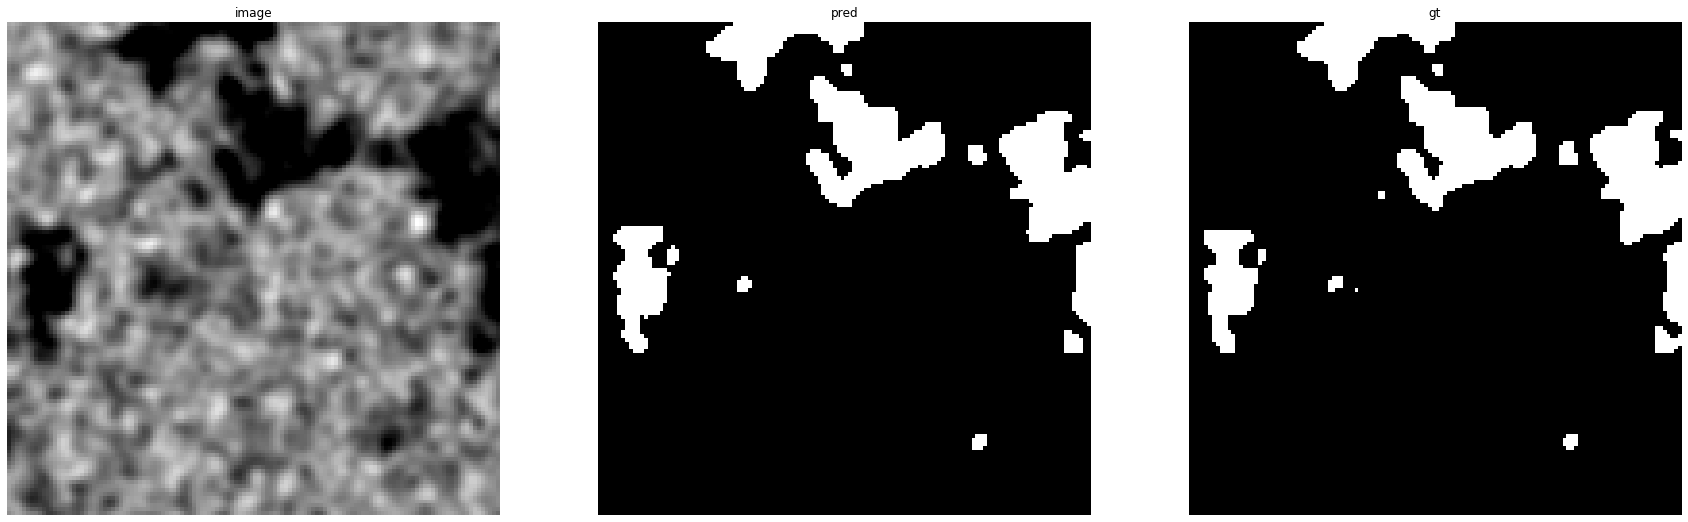

accuracy    : 0.992431640625
precision   : 0.9742400824317362
recall      : 0.9623409669211196
f1          : 0.9682539682539683
pr_auc      : 0.9969488226656279
iou         : 0.9384615384615385


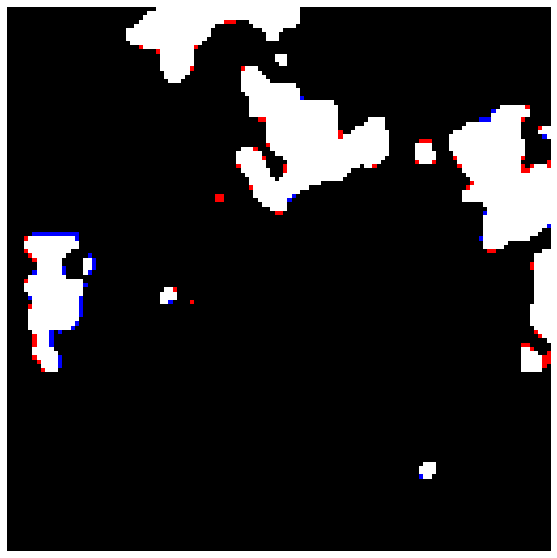

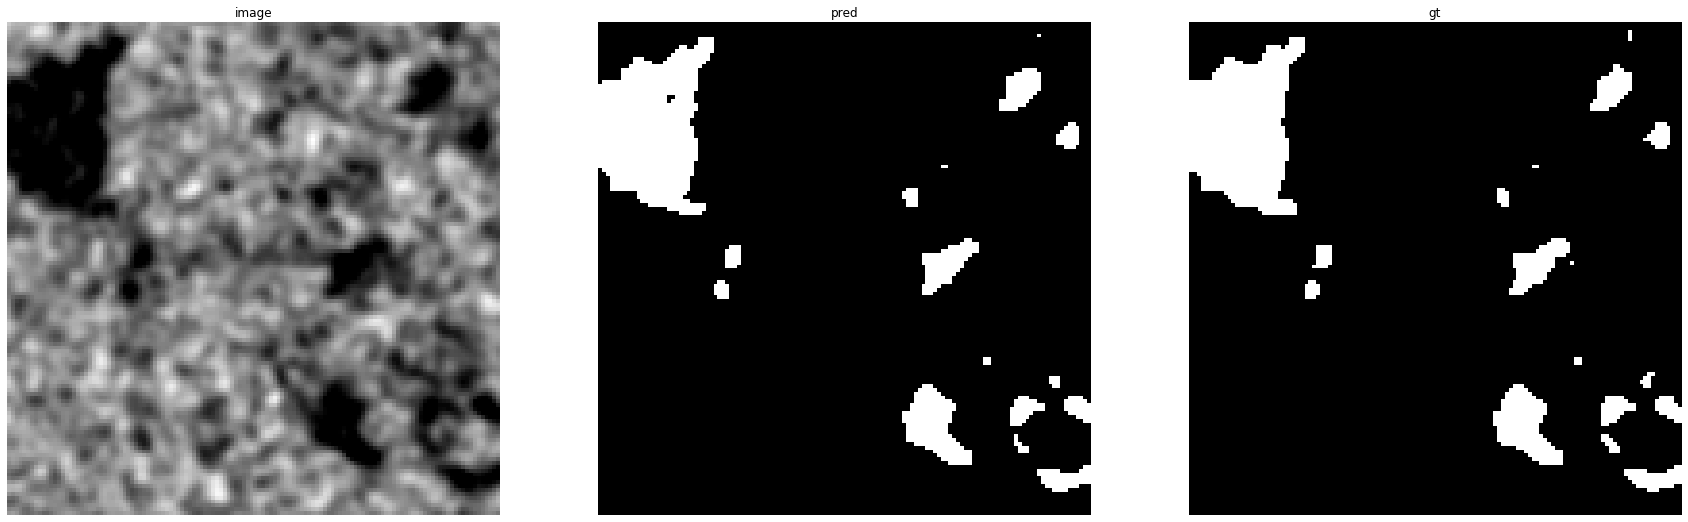

accuracy    : 0.9951171875
precision   : 0.9836065573770492
recall      : 0.966542750929368
f1          : 0.975
pr_auc      : 0.9982120030843444
iou         : 0.9512195121951219


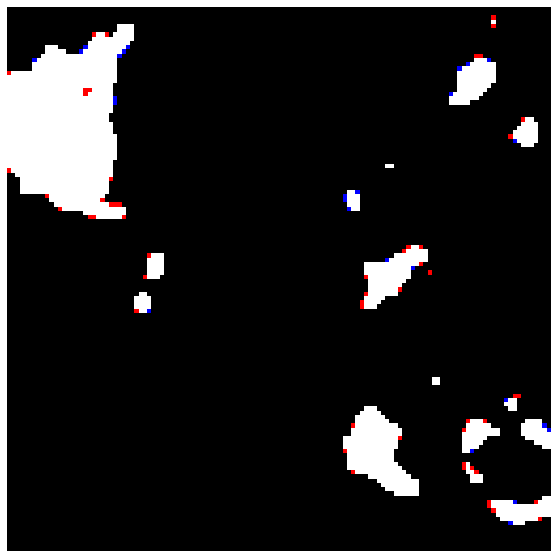

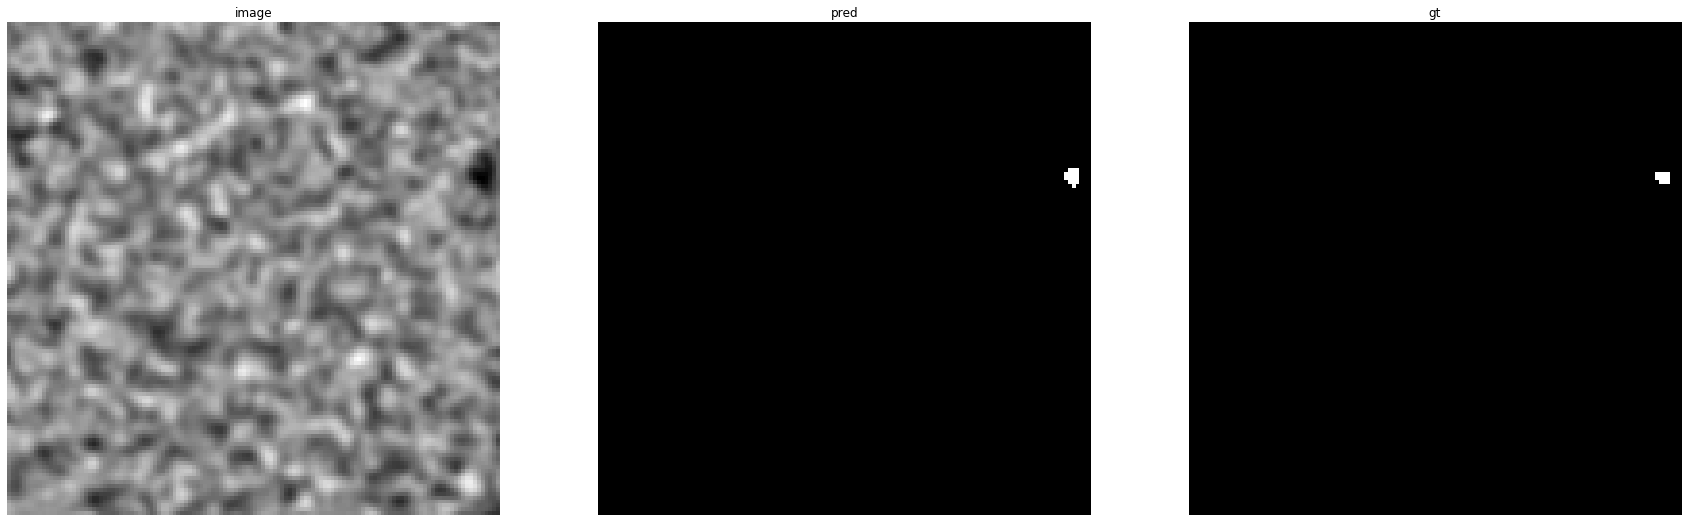

accuracy    : 0.999755859375
precision   : 0.7333333333333333
recall      : 1.0
f1          : 0.846153846153846
pr_auc      : 1.0
iou         : 0.7333333333333333


Prediction for SoilAh-1:


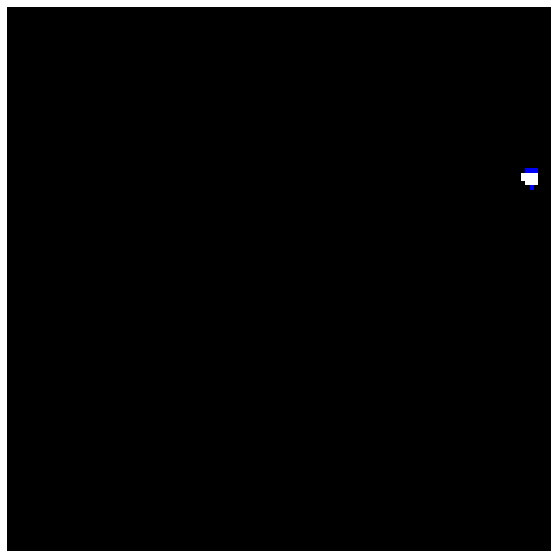

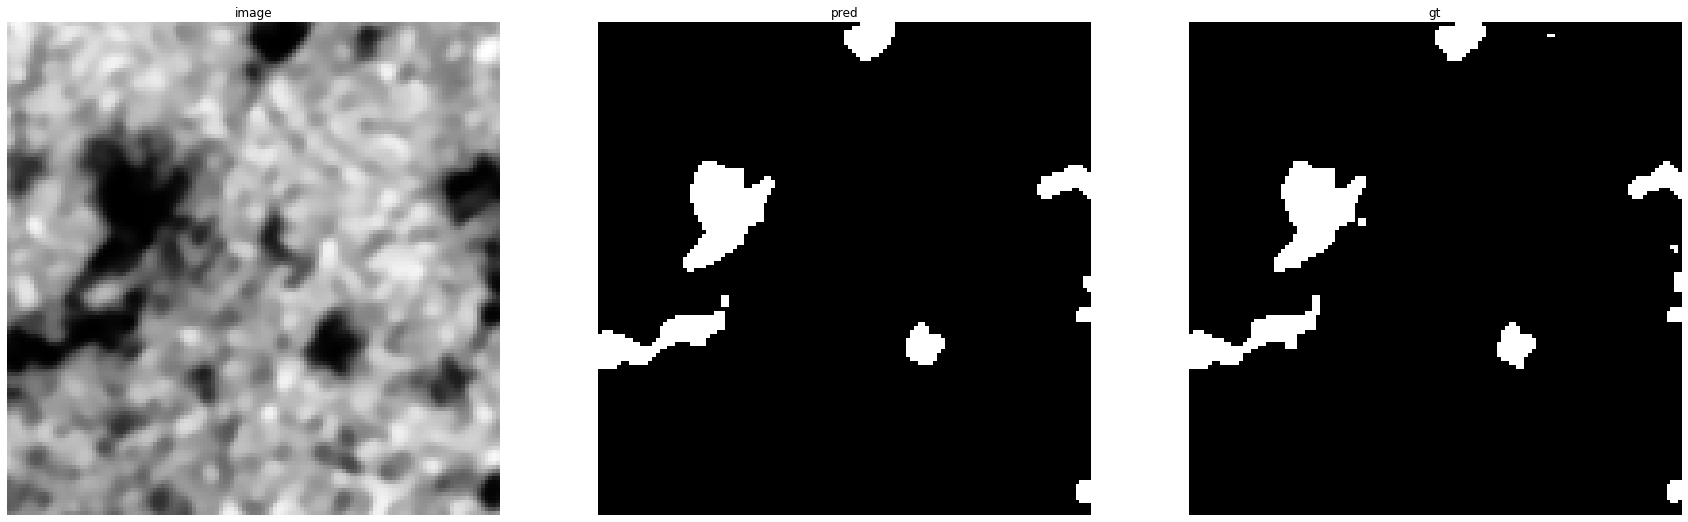

accuracy    : 0.99639892578125
precision   : 0.967391304347826
recall      : 0.9684439608269858
f1          : 0.9679173463839043
pr_auc      : 0.9952587207100962
iou         : 0.9378292939936775


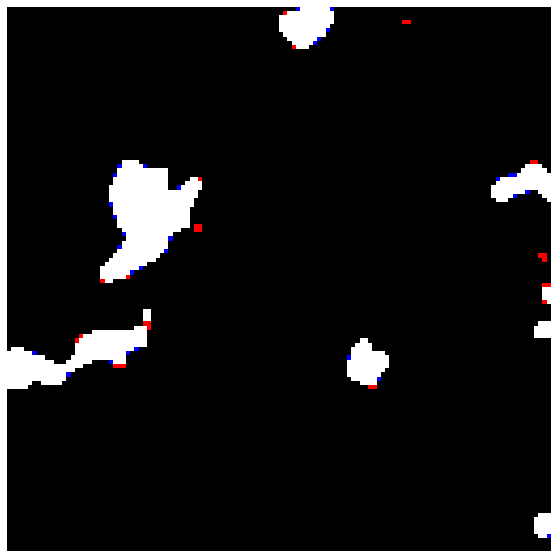

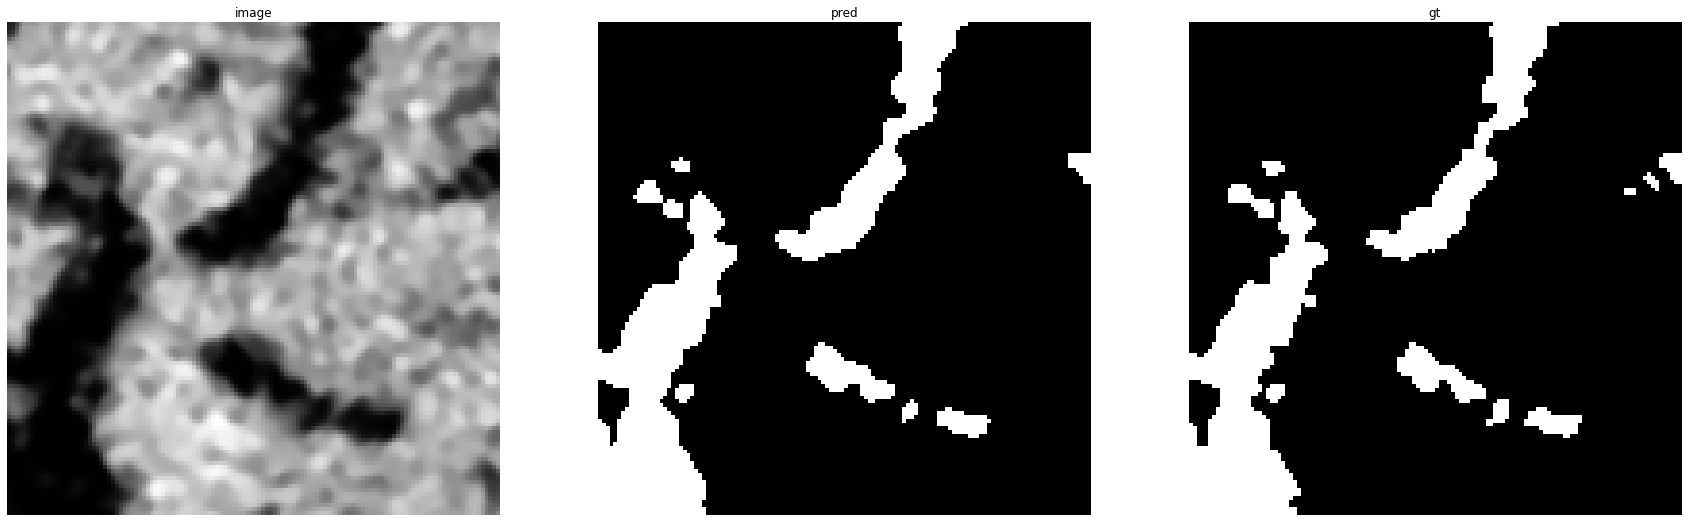

accuracy    : 0.98895263671875
precision   : 0.9547758284600389
recall      : 0.9741447891805887
f1          : 0.9643630635951957
pr_auc      : 0.9962347431808968
iou         : 0.9311787072243346


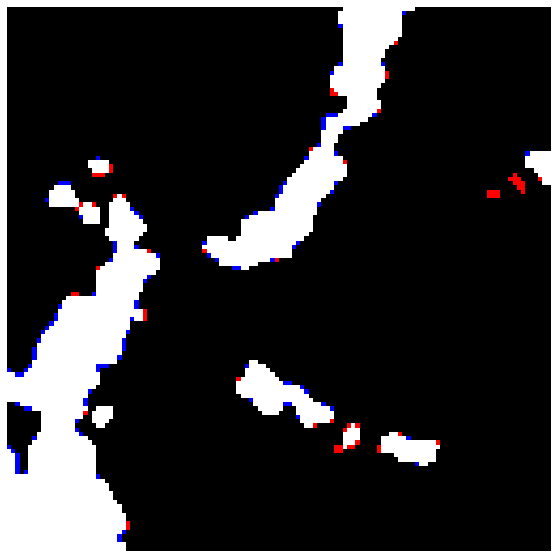

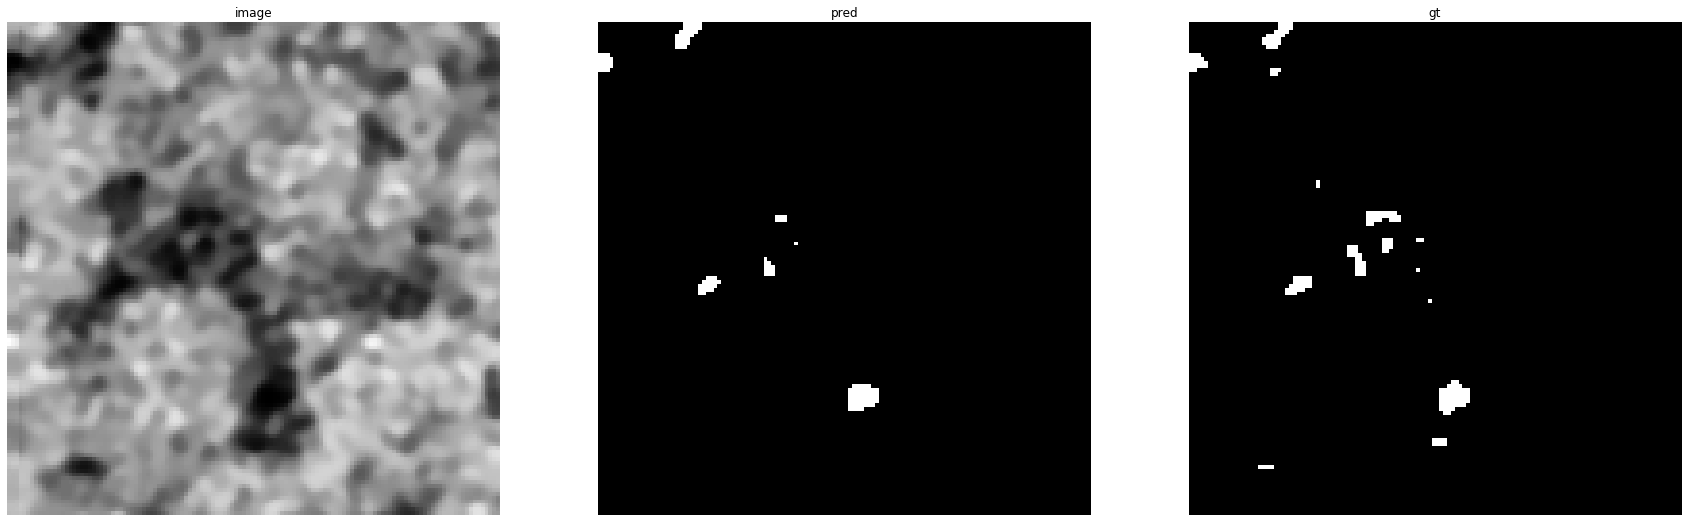

accuracy    : 0.99493408203125
precision   : 0.9629629629629629
recall      : 0.625
f1          : 0.7580174927113703
pr_auc      : 0.9380437458515405
iou         : 0.6103286384976526


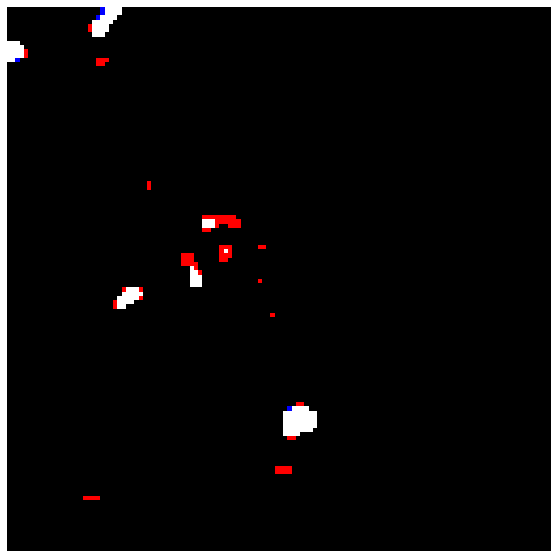

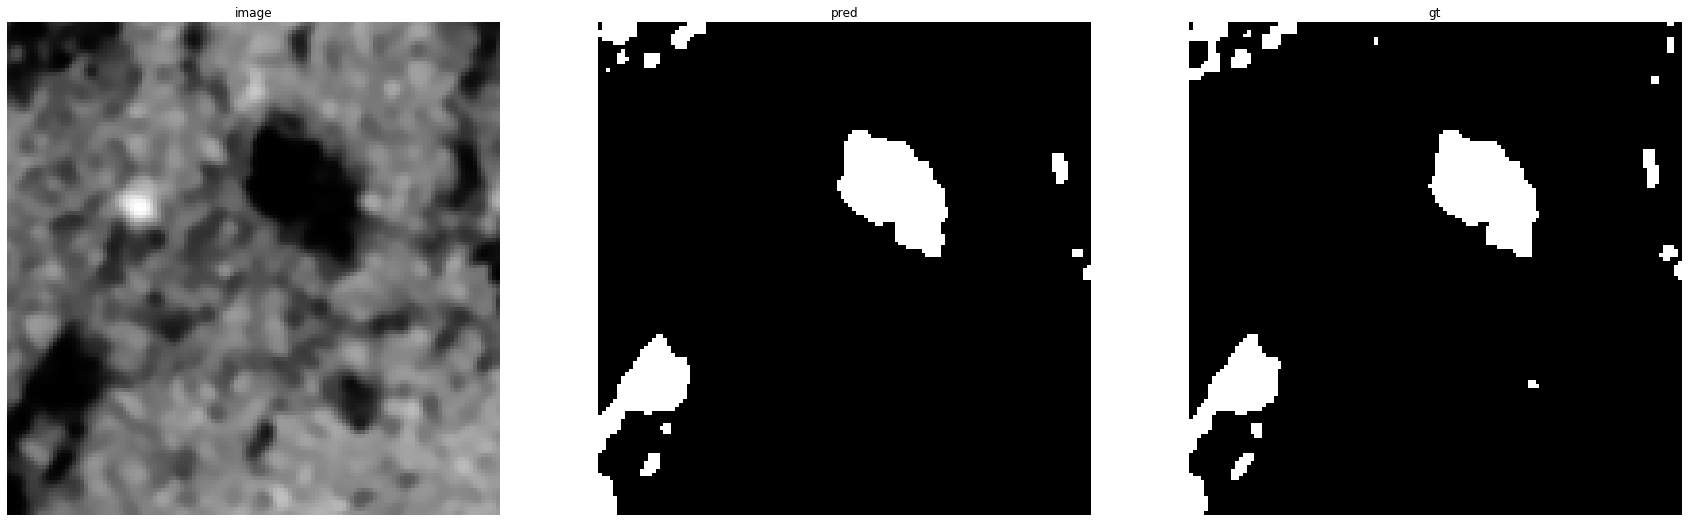

accuracy    : 0.9925537109375
precision   : 0.9691629955947136
recall      : 0.9267059814658803
f1          : 0.9474590869939707
pr_auc      : 0.9935681412109763
iou         : 0.900163666121113


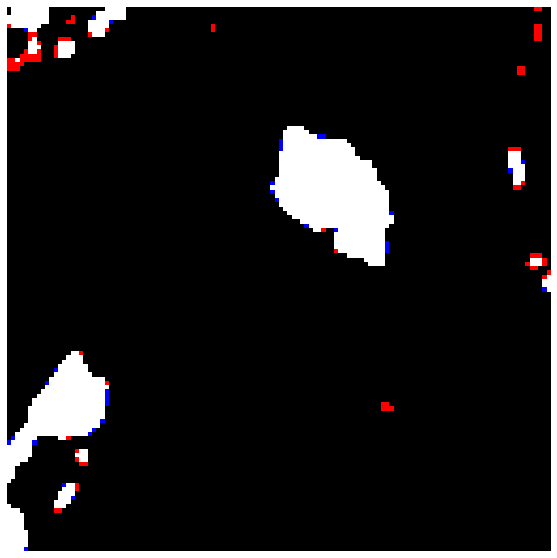

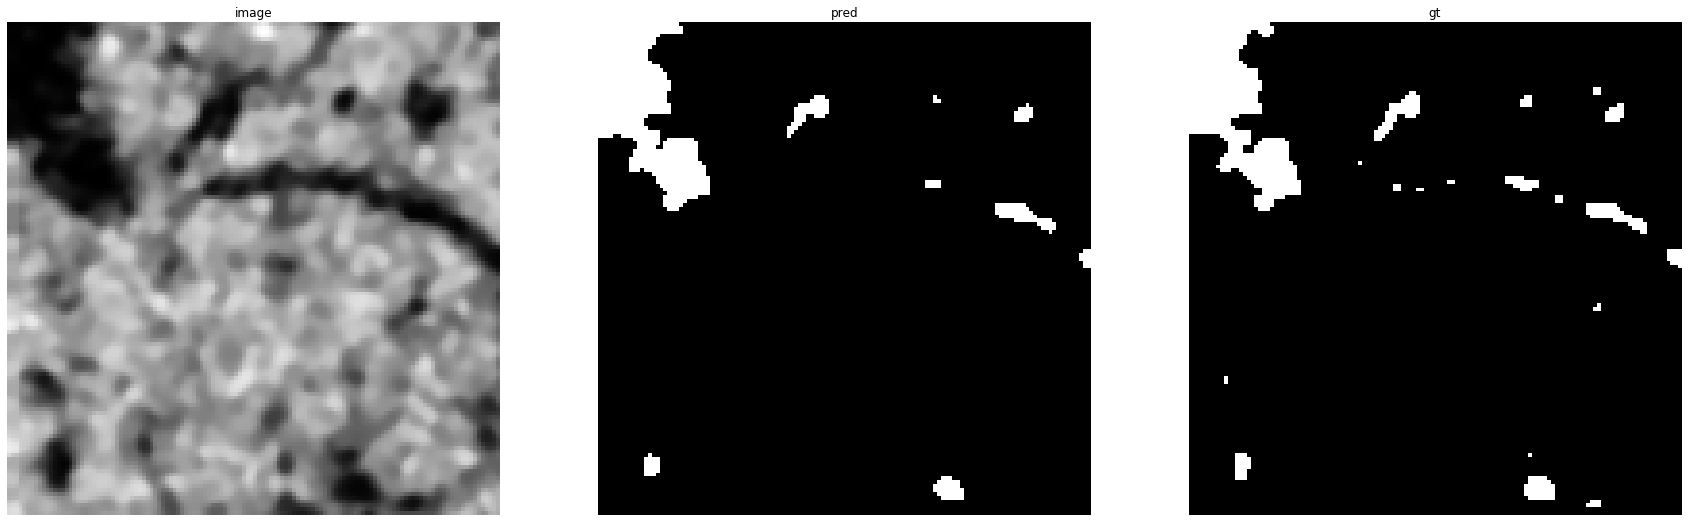

accuracy    : 0.99285888671875
precision   : 0.9644723092998955
recall      : 0.9174950298210736
f1          : 0.9403973509933774
pr_auc      : 0.9882300005522567
iou         : 0.8875


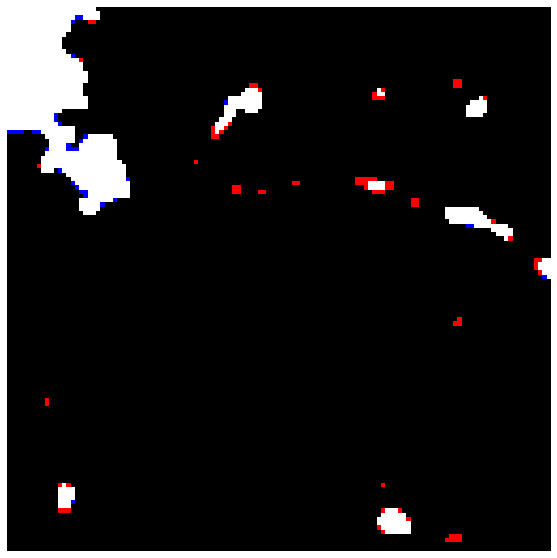

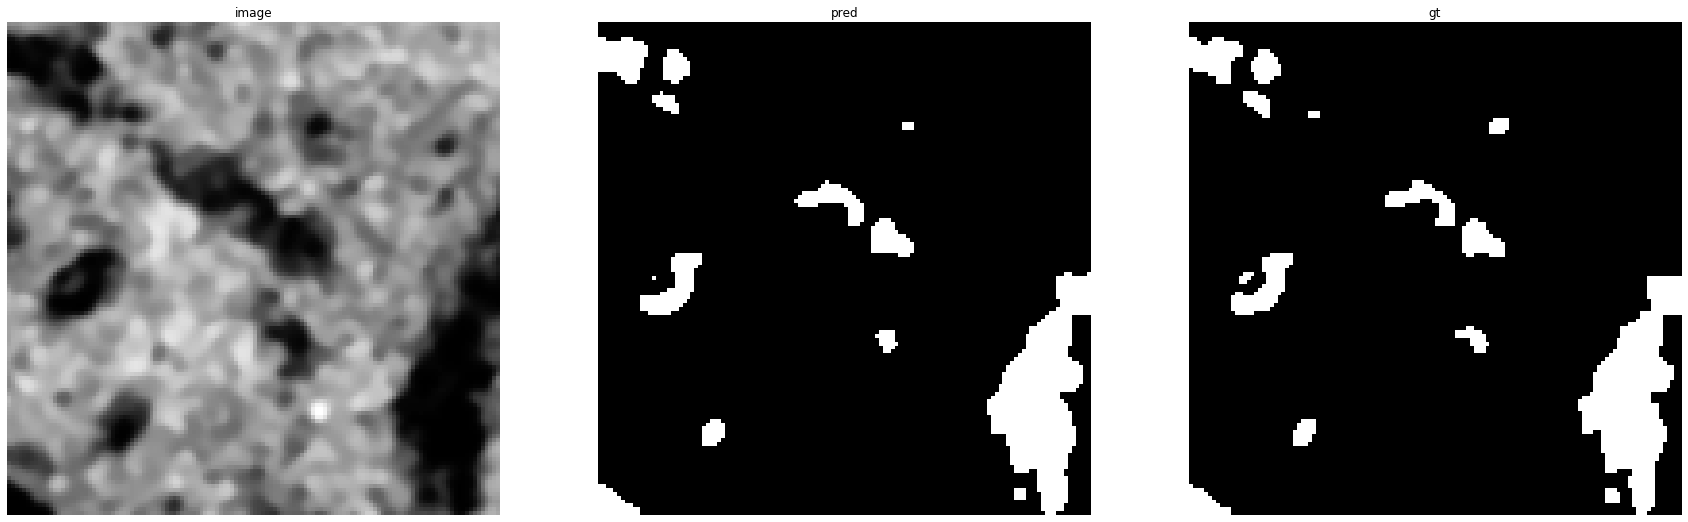

accuracy    : 0.9915771484375
precision   : 0.9552033080634046
recall      : 0.9499657299520219
f1          : 0.9525773195876289
pr_auc      : 0.9937438133550873
iou         : 0.9094488188976378


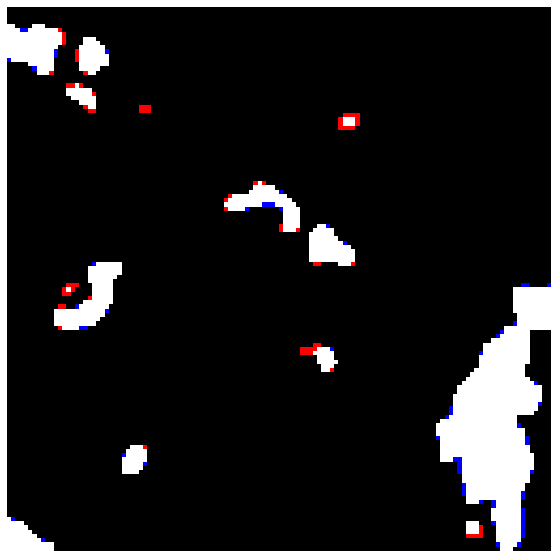

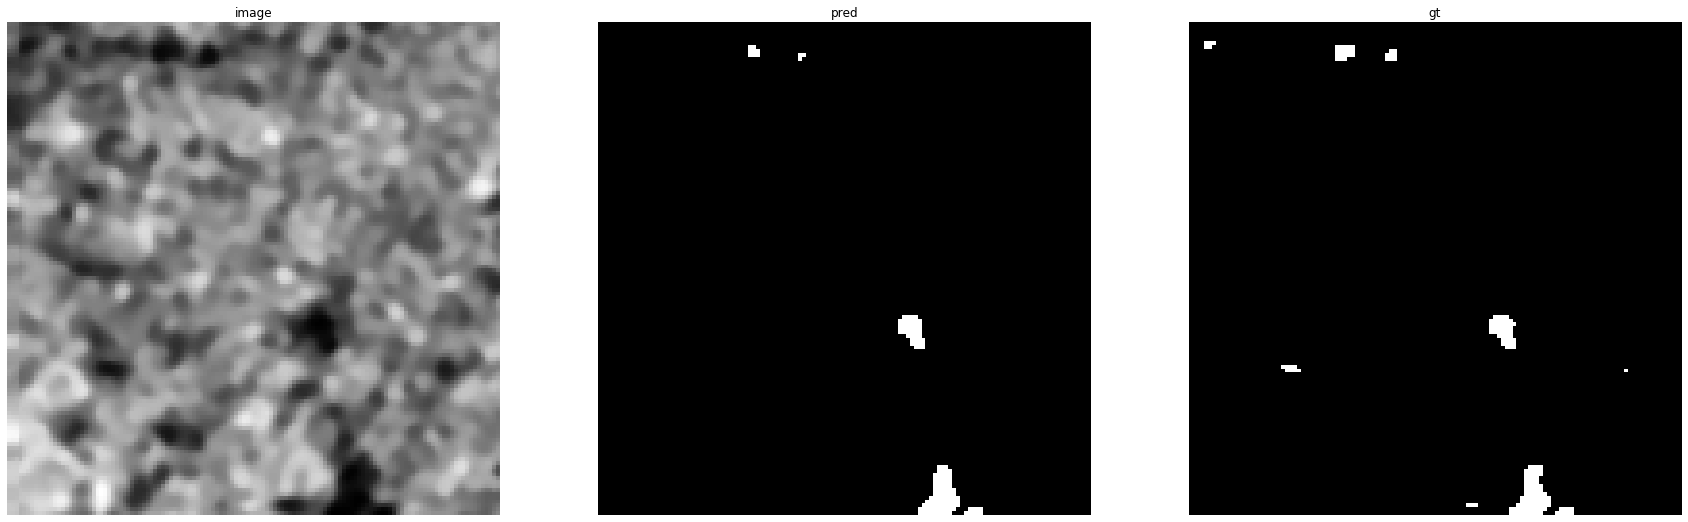

accuracy    : 0.99755859375
precision   : 0.9662162162162162
recall      : 0.8033707865168539
f1          : 0.8773006134969324
pr_auc      : 0.9553784415763513
iou         : 0.7814207650273224


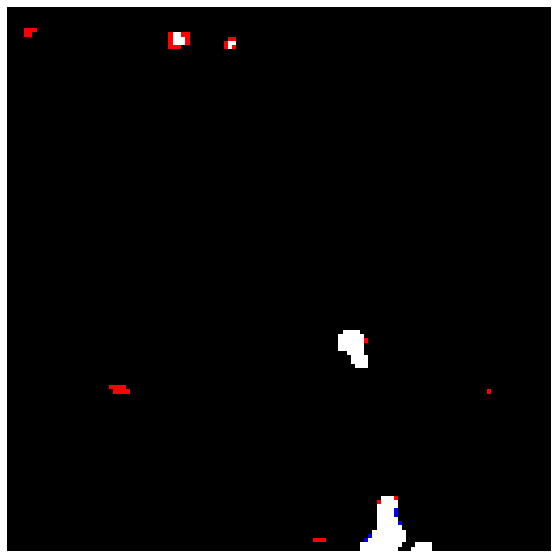

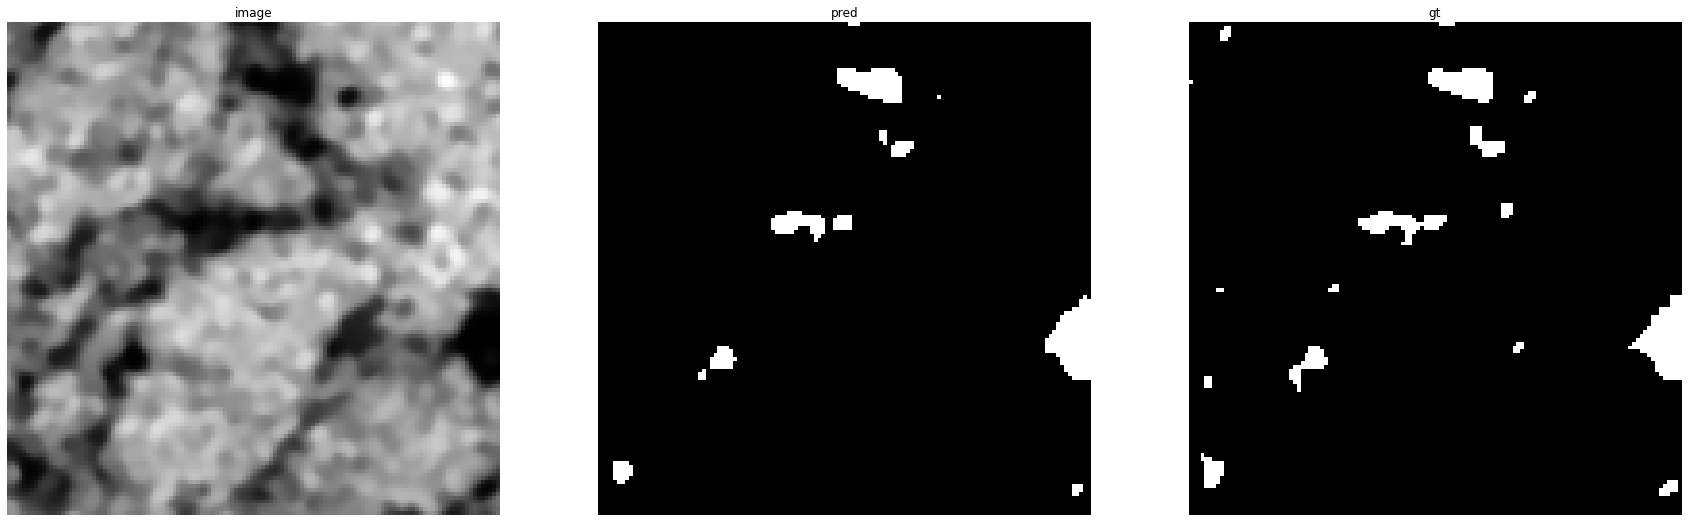

accuracy    : 0.99261474609375
precision   : 0.9704641350210971
recall      : 0.8112874779541446
f1          : 0.8837656099903939
pr_auc      : 0.9768490689451026
iou         : 0.7917383820998278


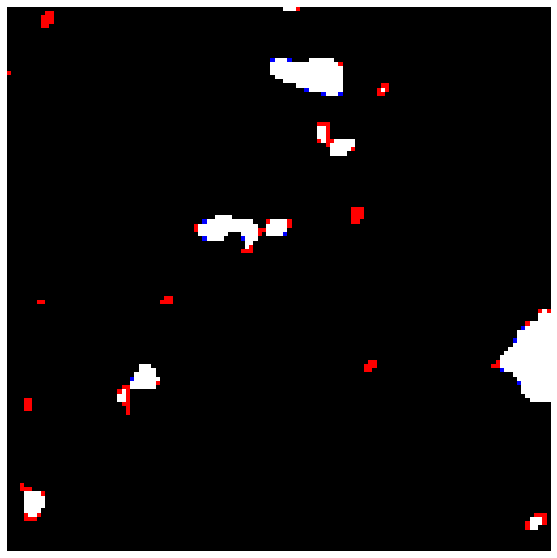

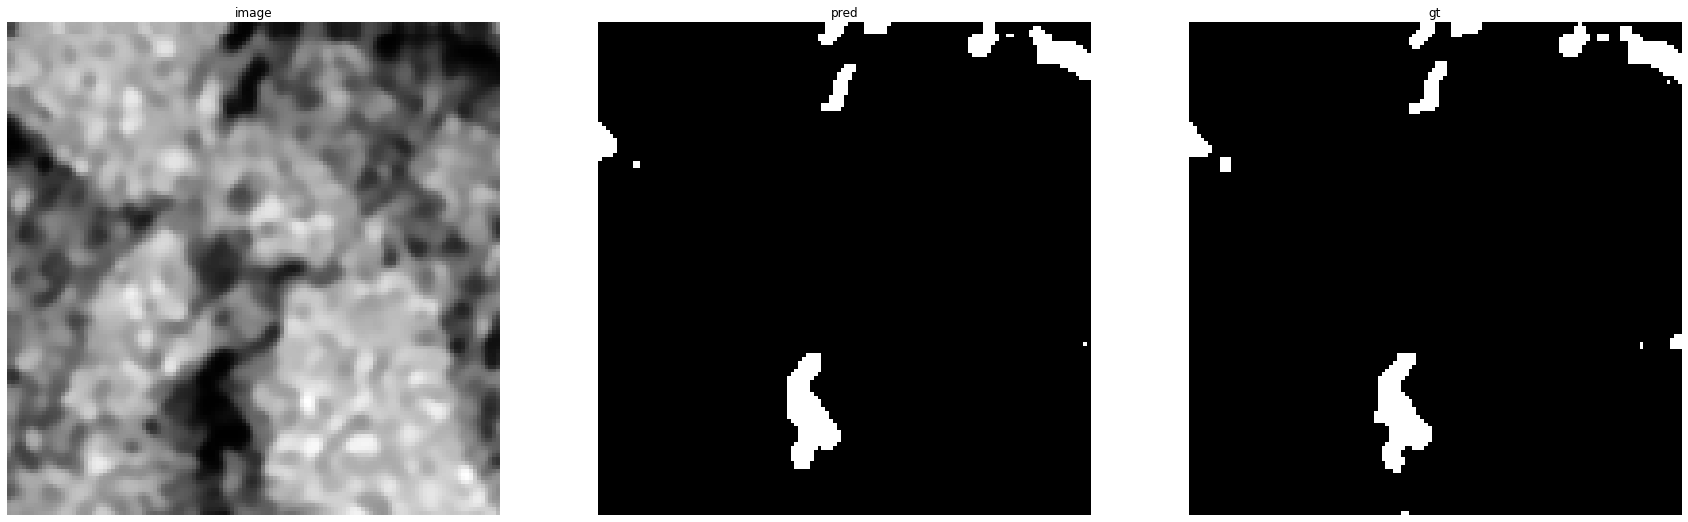

accuracy    : 0.9945068359375
precision   : 0.9593345656192237
recall      : 0.8841567291311755
f1          : 0.9202127659574468
pr_auc      : 0.9852624489836252
iou         : 0.8522167487684729


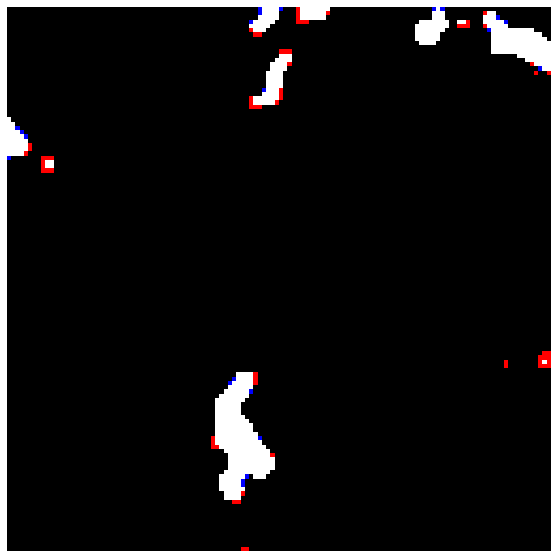

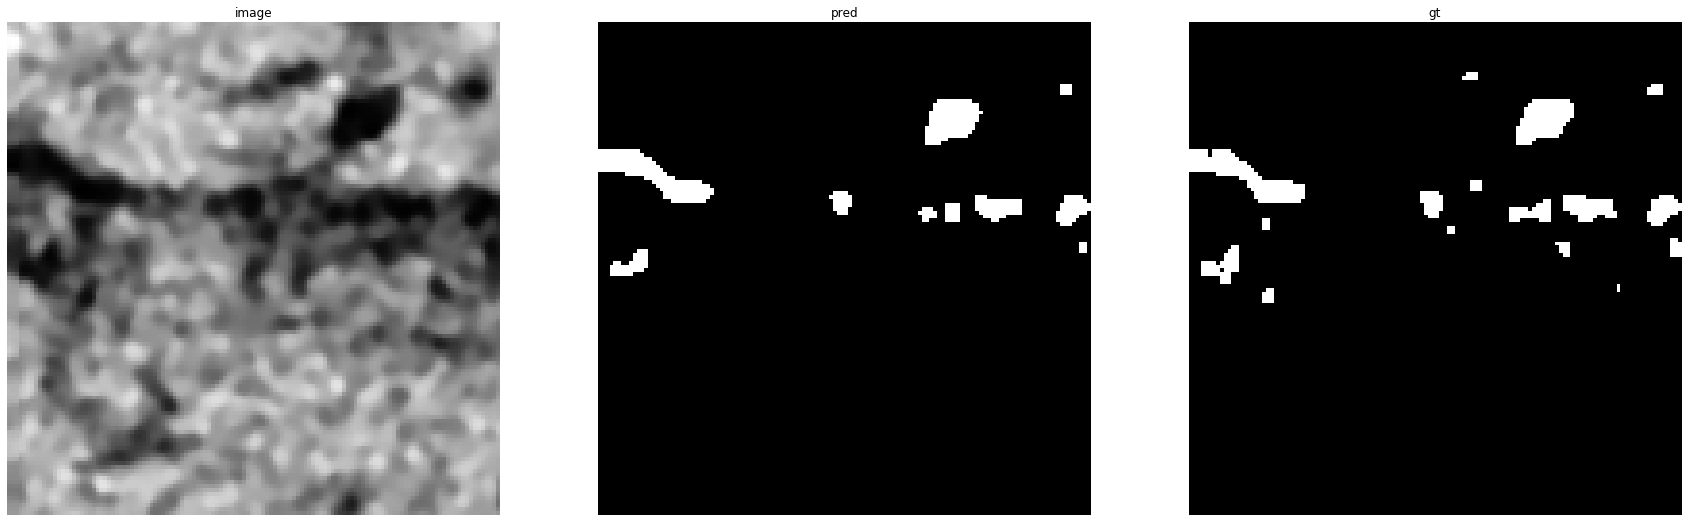

accuracy    : 0.9920654296875
precision   : 0.9701492537313433
recall      : 0.8201892744479495
f1          : 0.8888888888888888
pr_auc      : 0.9768427551881708
iou         : 0.8


Prediction for SoilB-2:


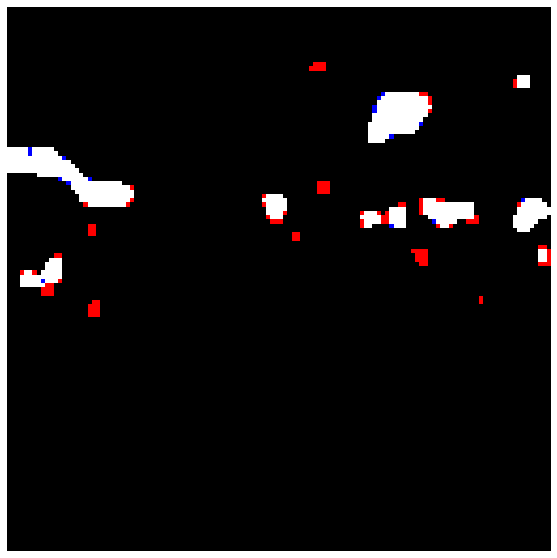

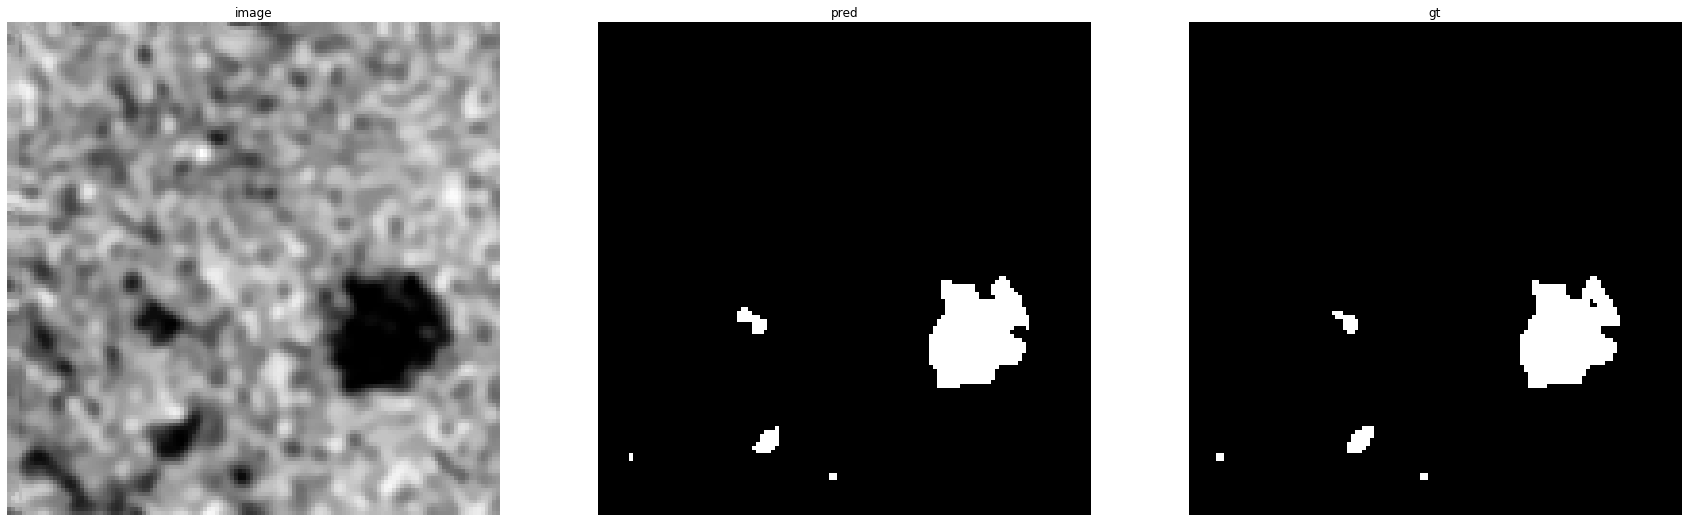

accuracy    : 0.99786376953125
precision   : 0.9573070607553367
recall      : 0.9847972972972973
f1          : 0.9708576186511241
pr_auc      : 0.998185896010984
iou         : 0.9433656957928802


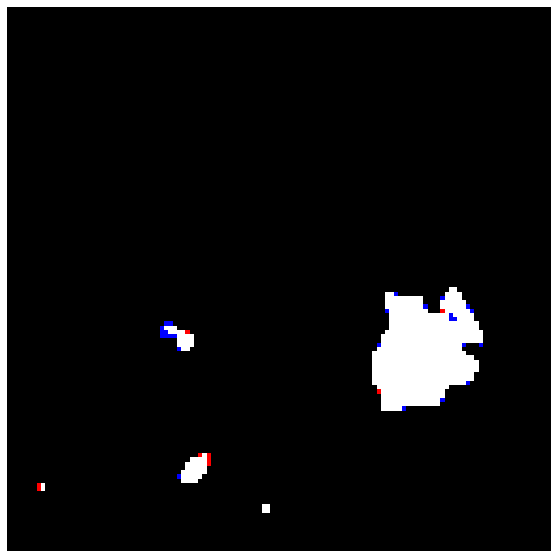

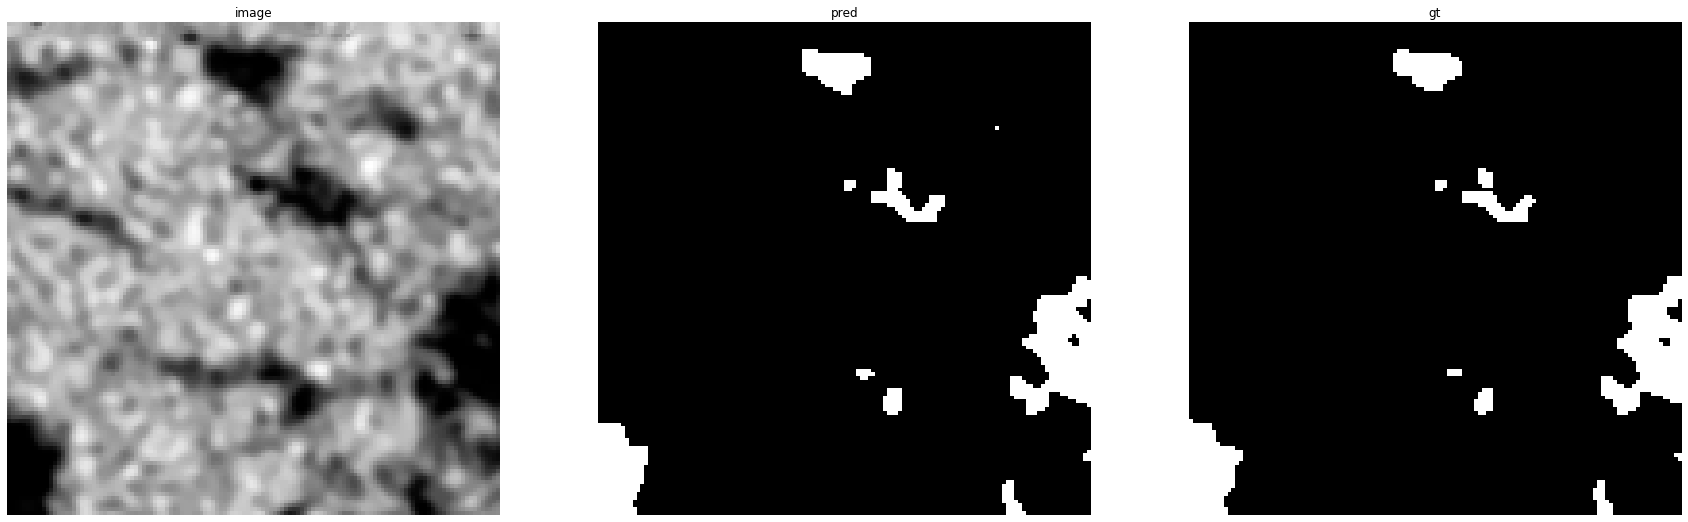

accuracy    : 0.99664306640625
precision   : 0.9548133595284872
recall      : 0.9908256880733946
f1          : 0.9724862431215608
pr_auc      : 0.9985560953411727
iou         : 0.9464459591041869


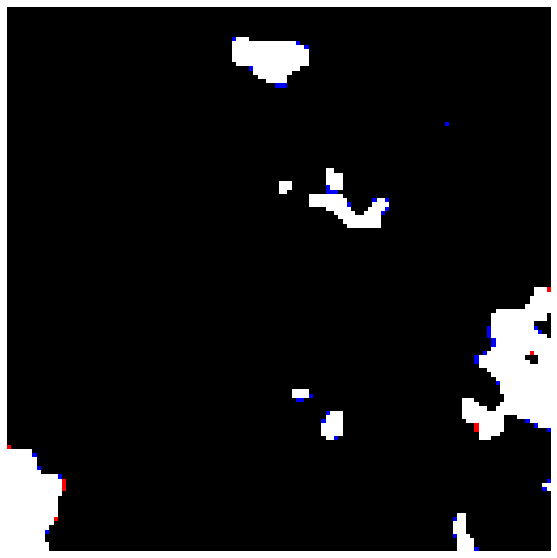

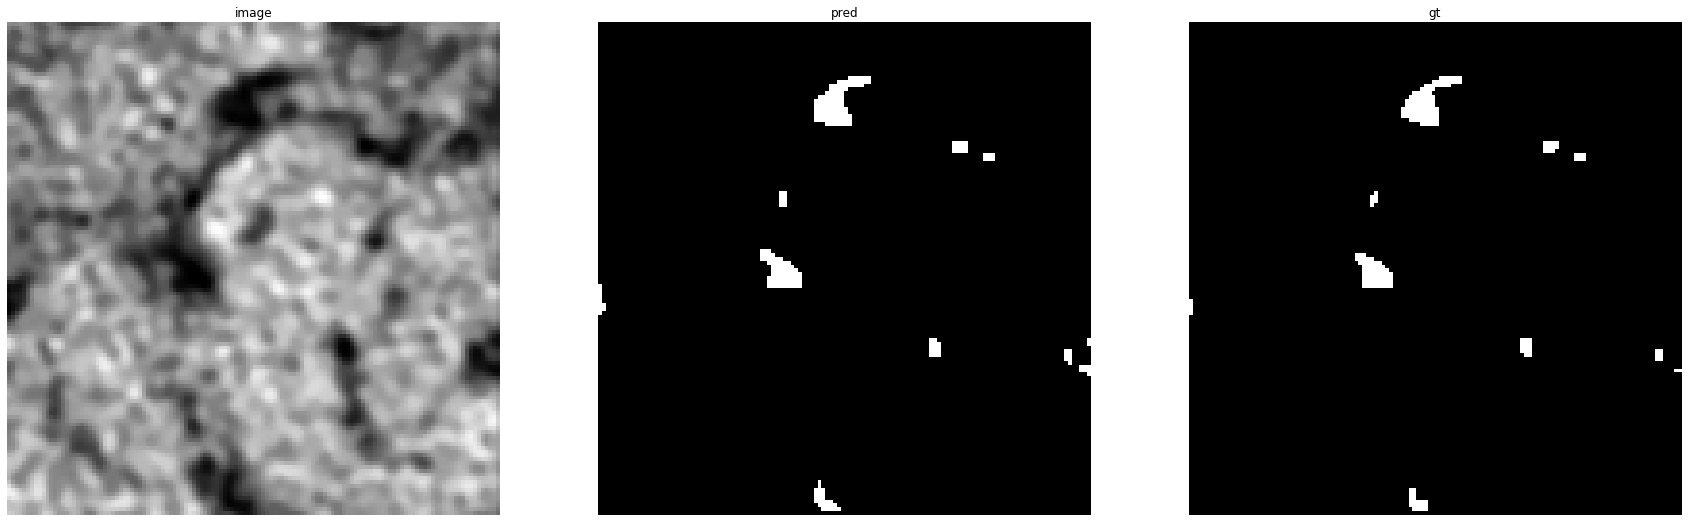

accuracy    : 0.99700927734375
precision   : 0.8352490421455939
recall      : 0.9732142857142857
f1          : 0.8989690721649484
pr_auc      : 0.9784711095296613
iou         : 0.8164794007490637


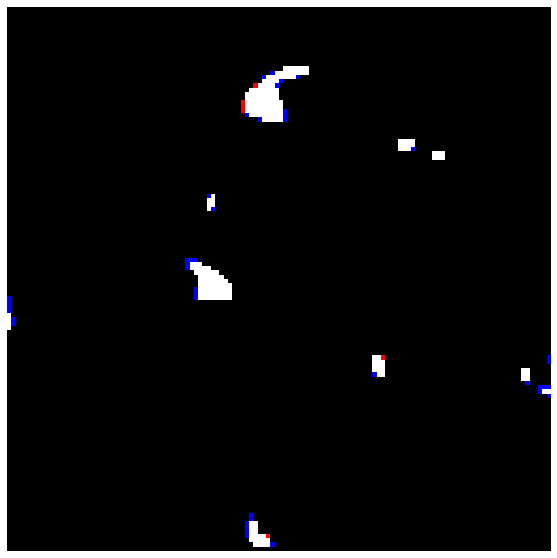

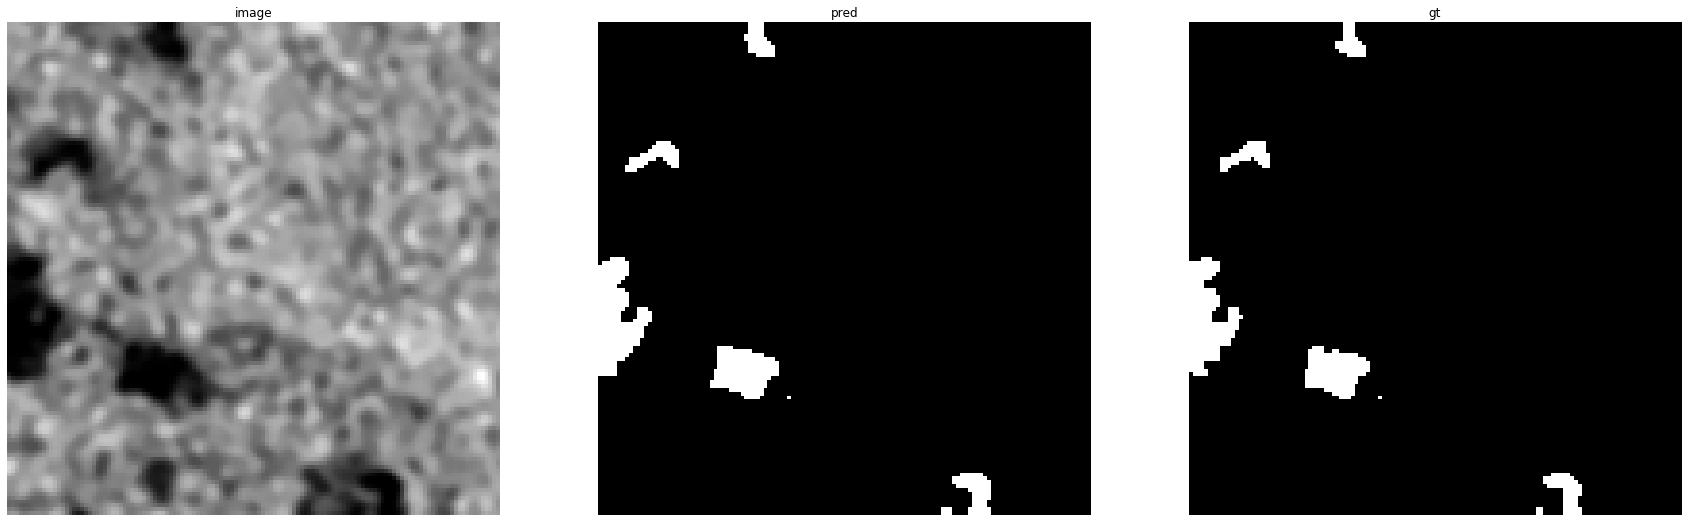

accuracy    : 0.9967041015625
precision   : 0.9244663382594417
recall      : 0.9859894921190894
f1          : 0.9542372881355933
pr_auc      : 0.9963089676455872
iou         : 0.9124797406807131


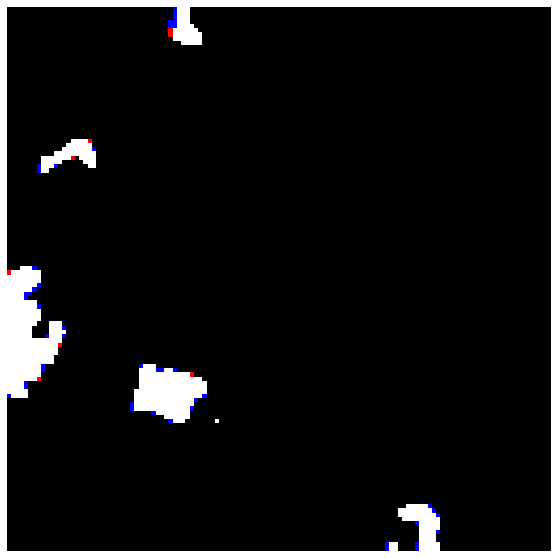

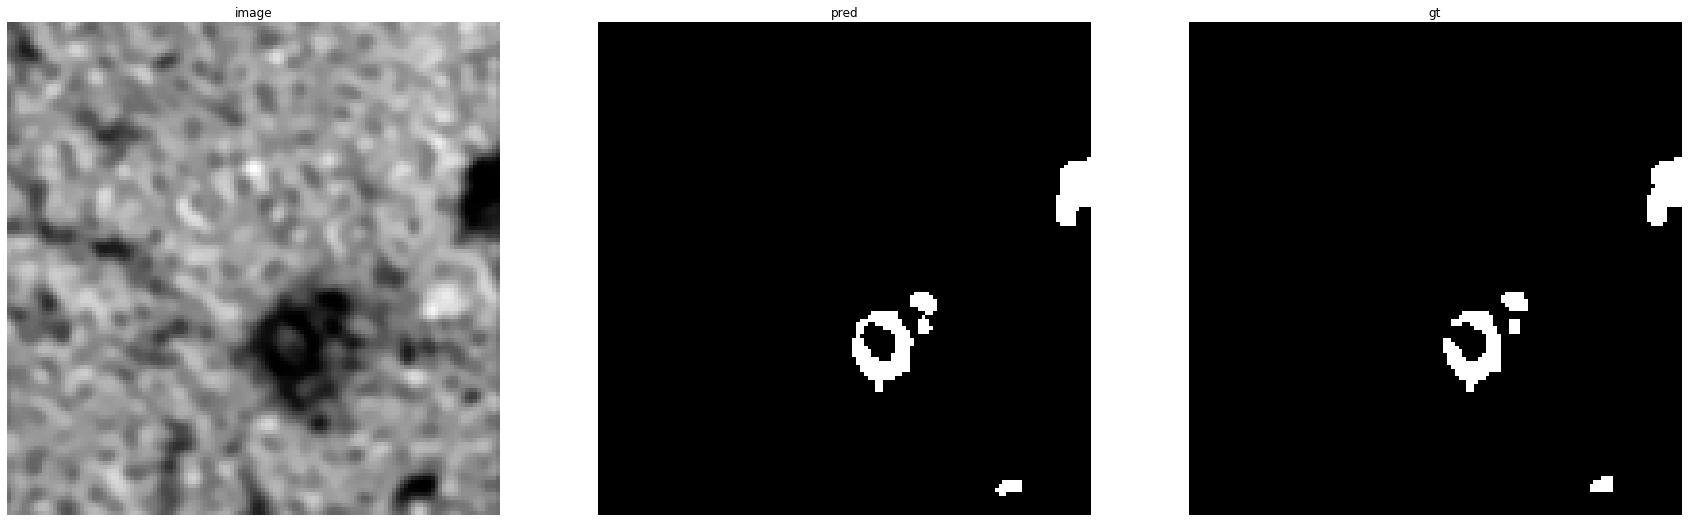

accuracy    : 0.99786376953125
precision   : 0.9277777777777778
recall      : 0.9737609329446064
f1          : 0.9502133712660028
pr_auc      : 0.9939854650186117
iou         : 0.9051490514905149


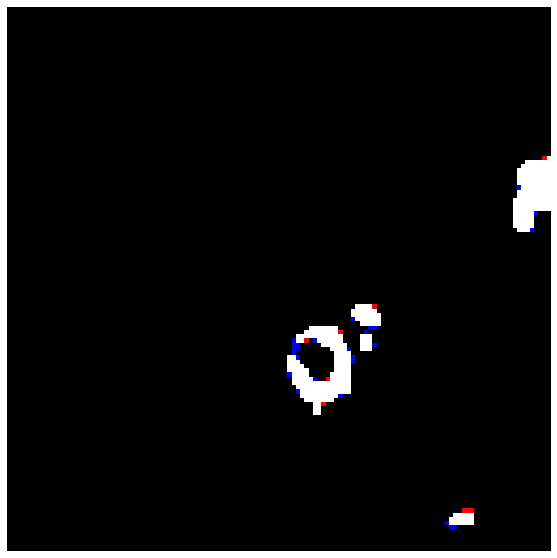

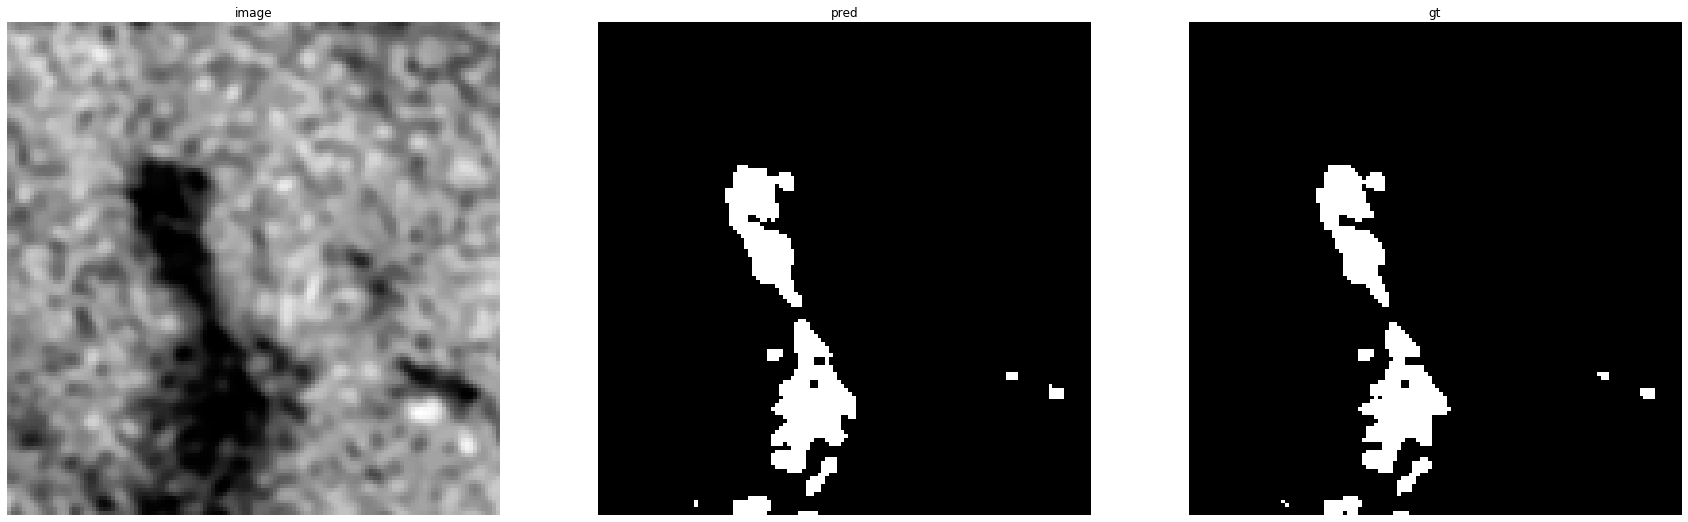

accuracy    : 0.99554443359375
precision   : 0.940563086548488
recall      : 0.9825708061002179
f1          : 0.9611081513052743
pr_auc      : 0.995534606030552
iou         : 0.9251282051282051


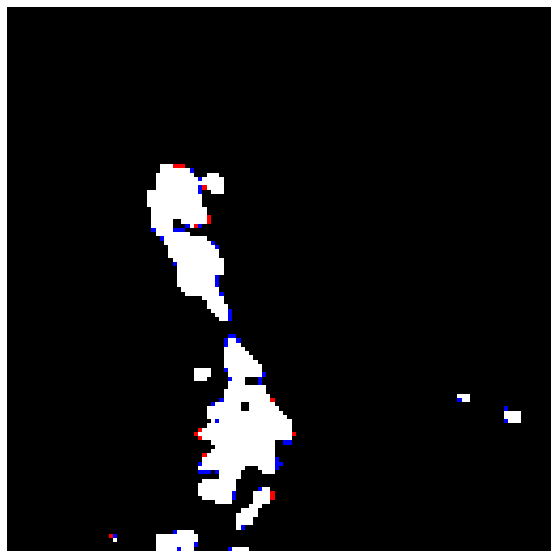

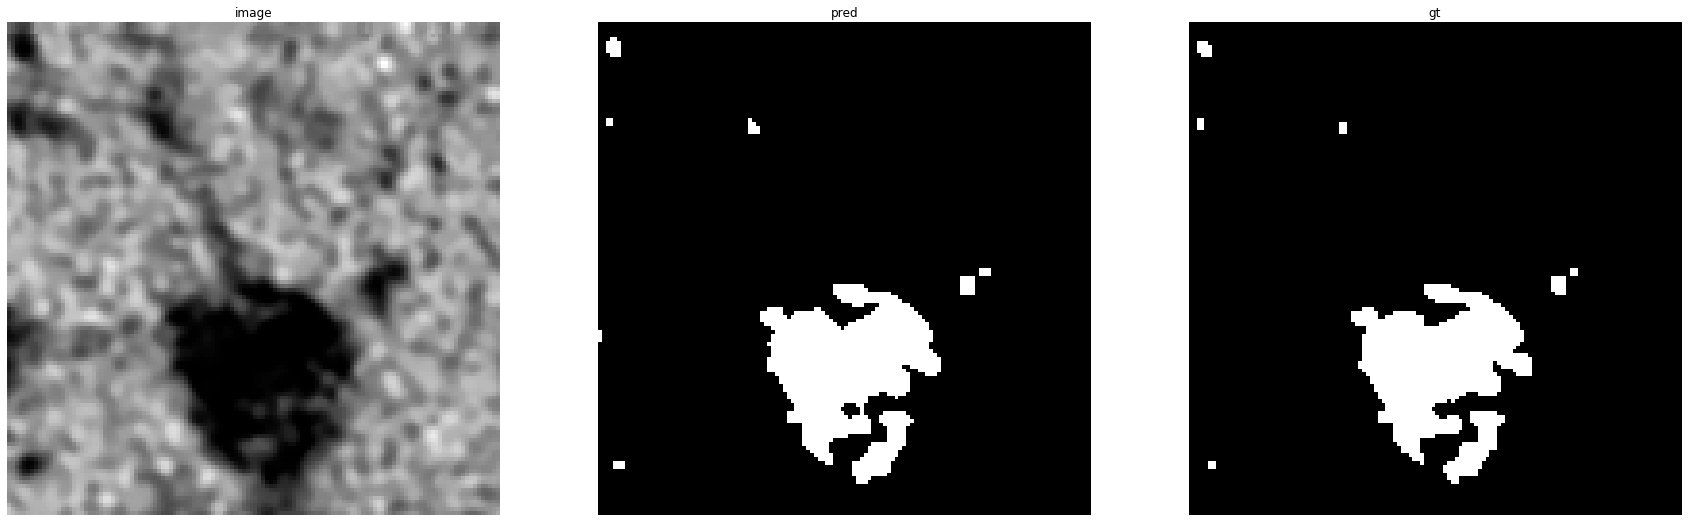

accuracy    : 0.9954833984375
precision   : 0.9540481400437637
recall      : 0.9916603487490523
f1          : 0.9724907063197026
pr_auc      : 0.9983851147958293
iou         : 0.9464544138929089


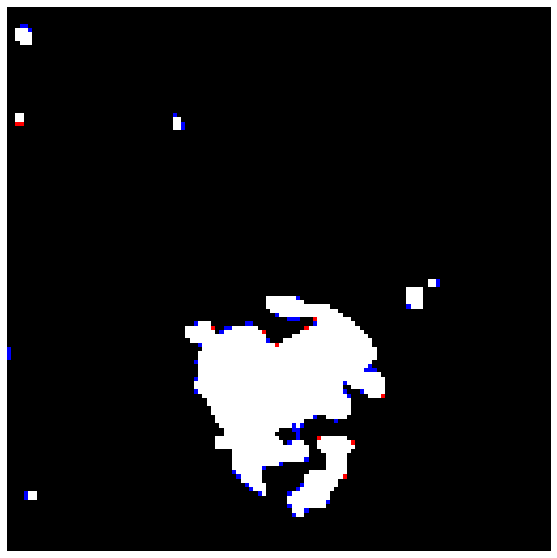

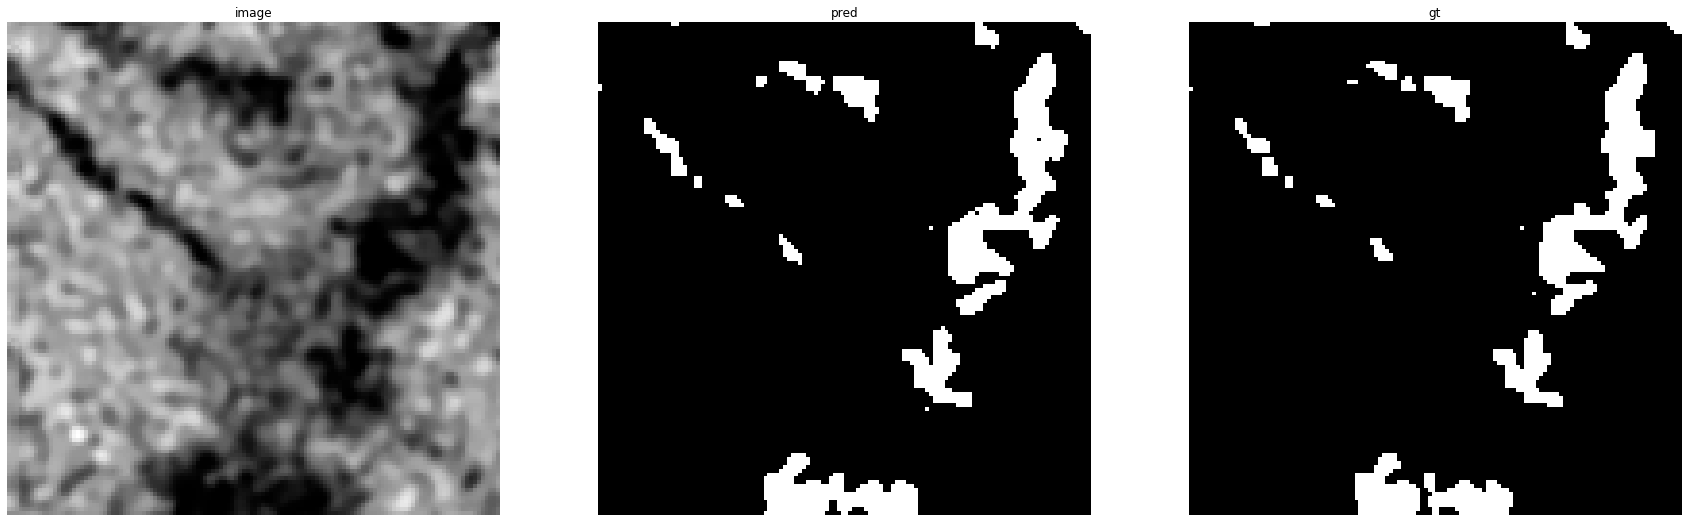

accuracy    : 0.992431640625
precision   : 0.9422193040052528
recall      : 0.9755268524813052
f1          : 0.9585838343353372
pr_auc      : 0.9955499285070504
iou         : 0.9204618345093009


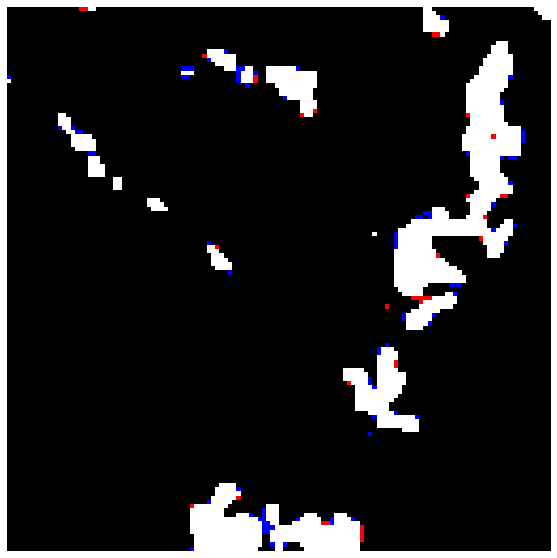

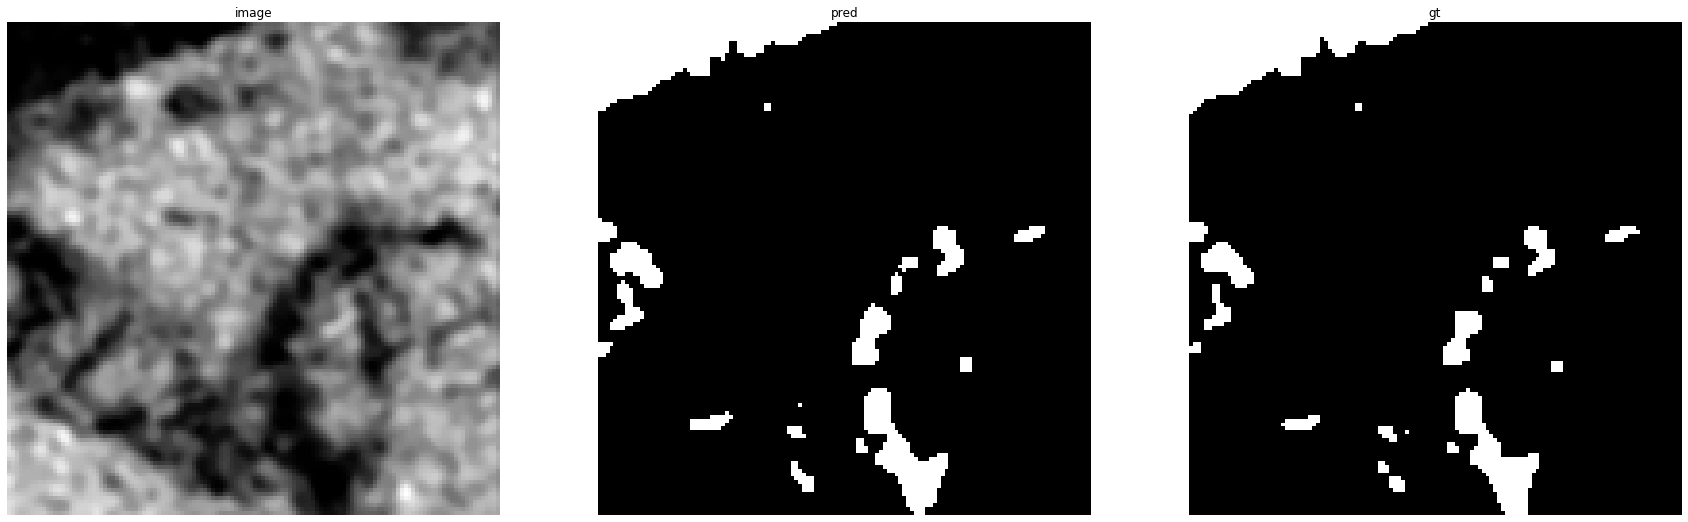

accuracy    : 0.992919921875
precision   : 0.9360699865410498
recall      : 0.9851274787535411
f1          : 0.9599723947550035
pr_auc      : 0.9962855578290679
iou         : 0.9230258792302588


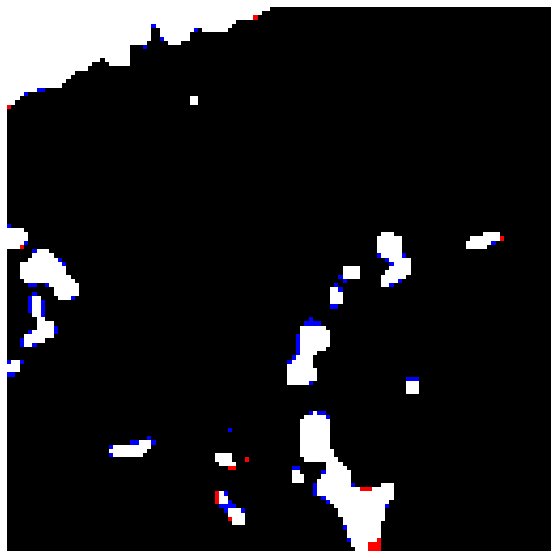

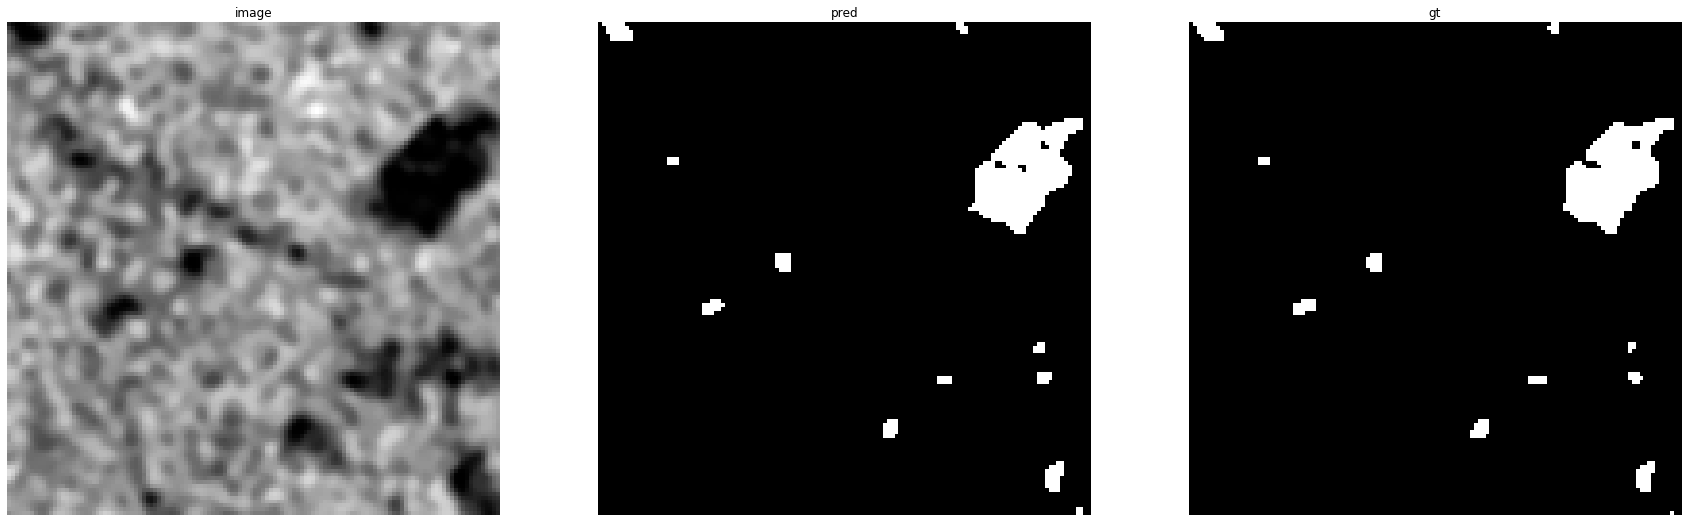

accuracy    : 0.99755859375
precision   : 0.9568567026194145
recall      : 0.981042654028436
f1          : 0.968798751950078
pr_auc      : 0.9975609635005607
iou         : 0.9394856278366112


Prediction for TeTree_subset1:


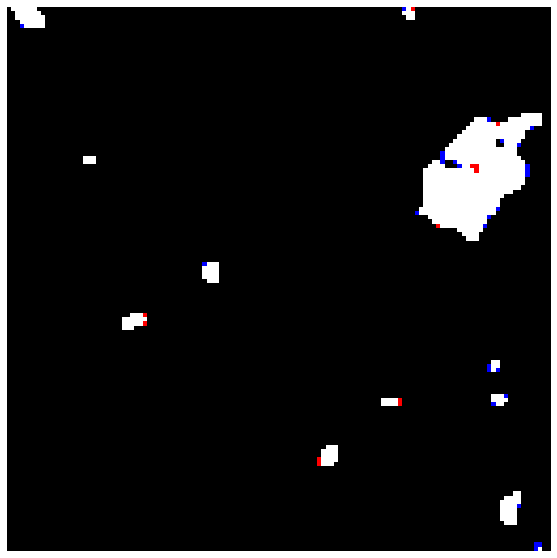

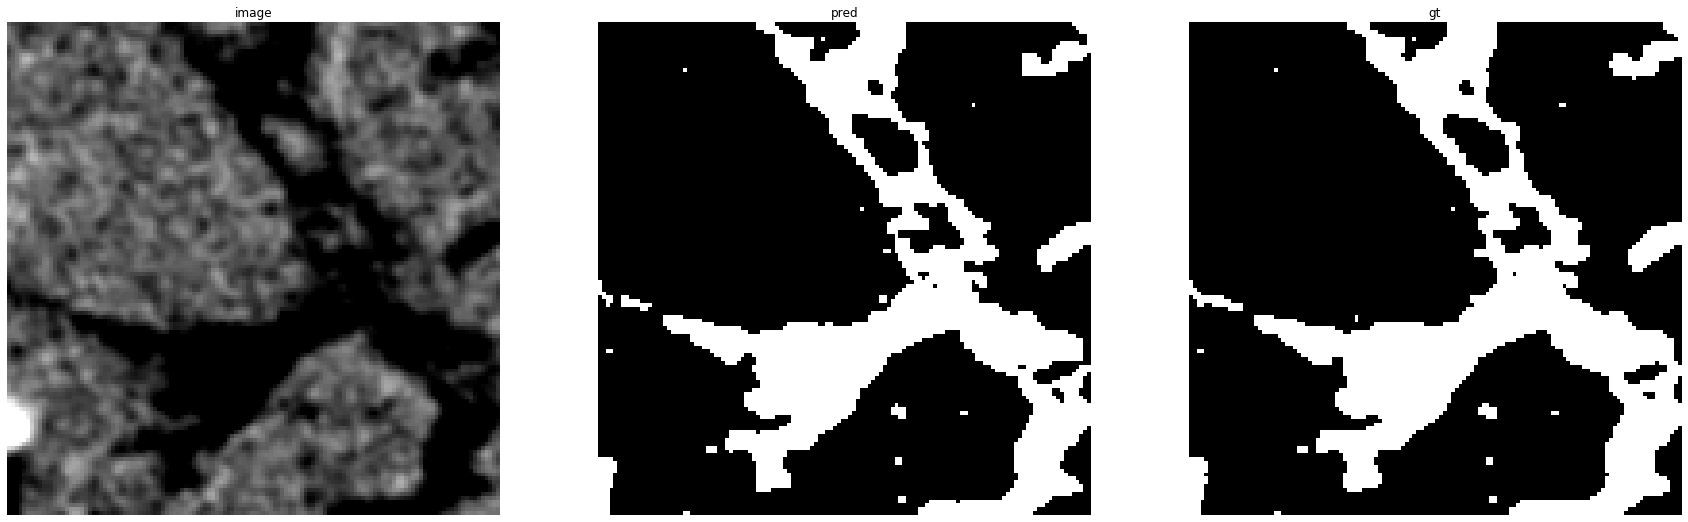

accuracy    : 0.98590087890625
precision   : 0.9972389558232931
recall      : 0.9475316002861913
f1          : 0.97175003057356
pr_auc      : 0.9987759939853232
iou         : 0.9450523311132255


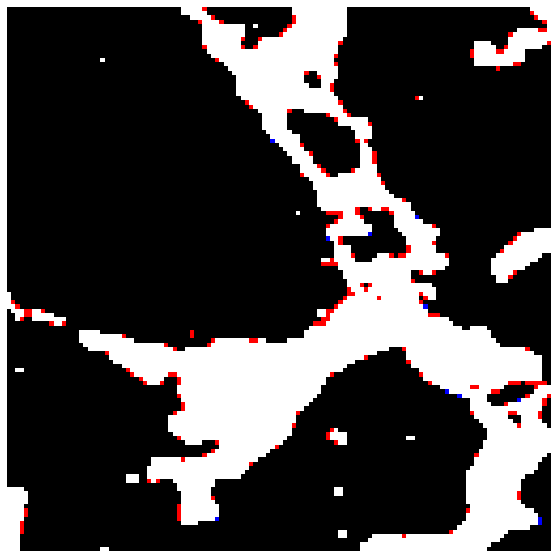

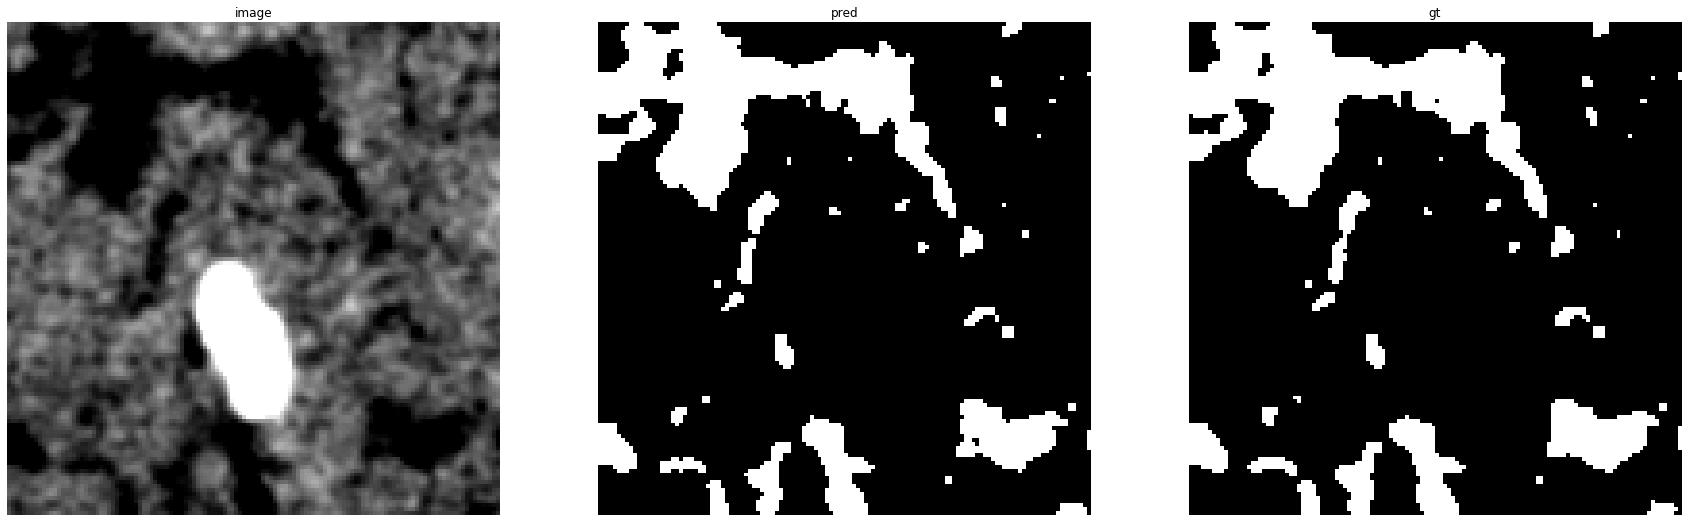

accuracy    : 0.9893798828125
precision   : 0.9922854387656702
recall      : 0.953660797034291
f1          : 0.9725897920604915
pr_auc      : 0.9975128219545462
iou         : 0.9466421343146274


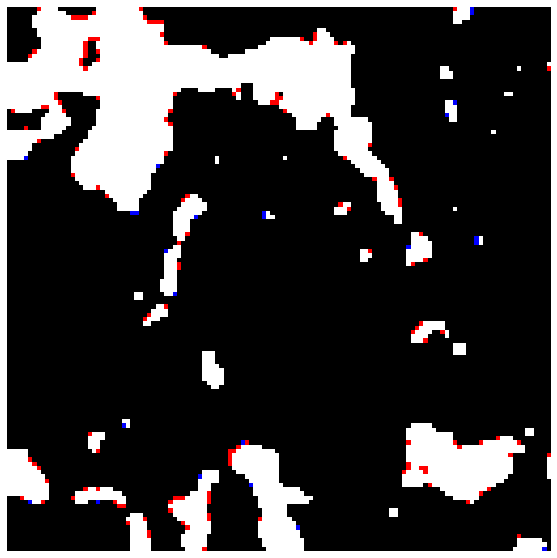

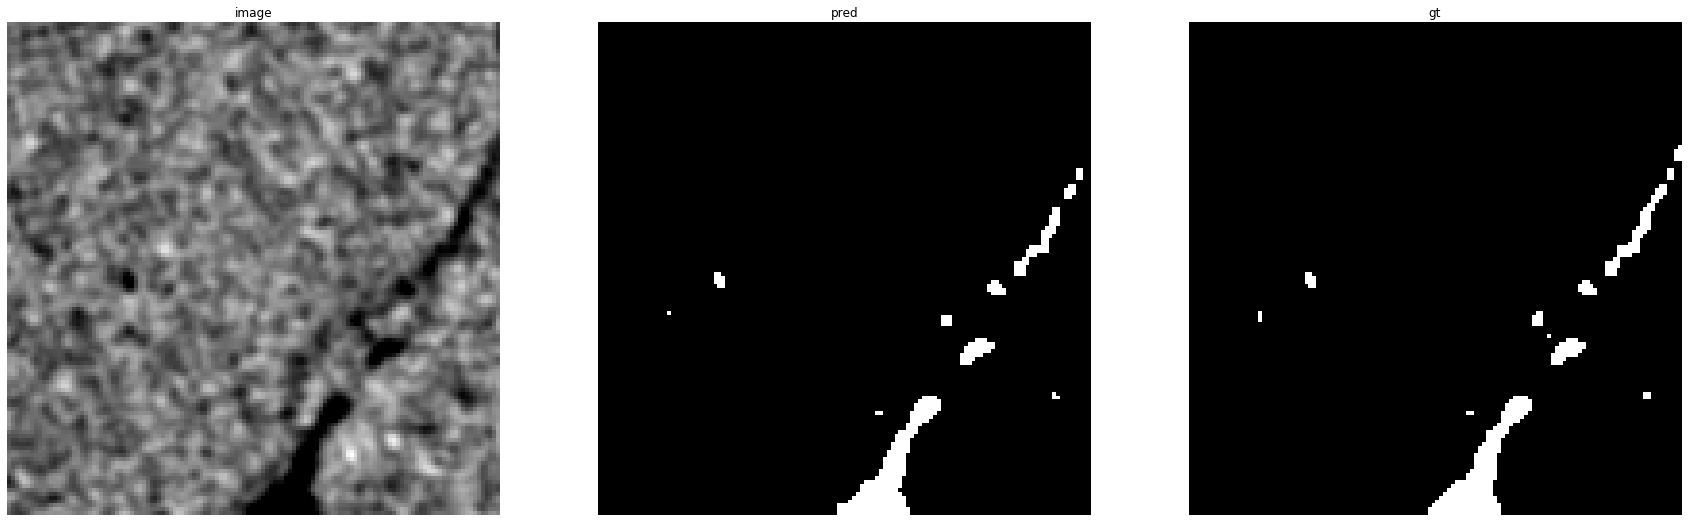

accuracy    : 0.99761962890625
precision   : 0.9975062344139651
recall      : 0.91324200913242
f1          : 0.9535160905840286
pr_auc      : 0.9941238904522531
iou         : 0.9111617312072893


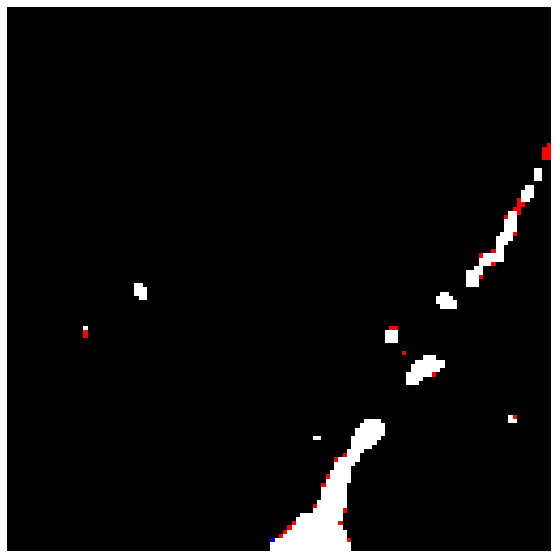

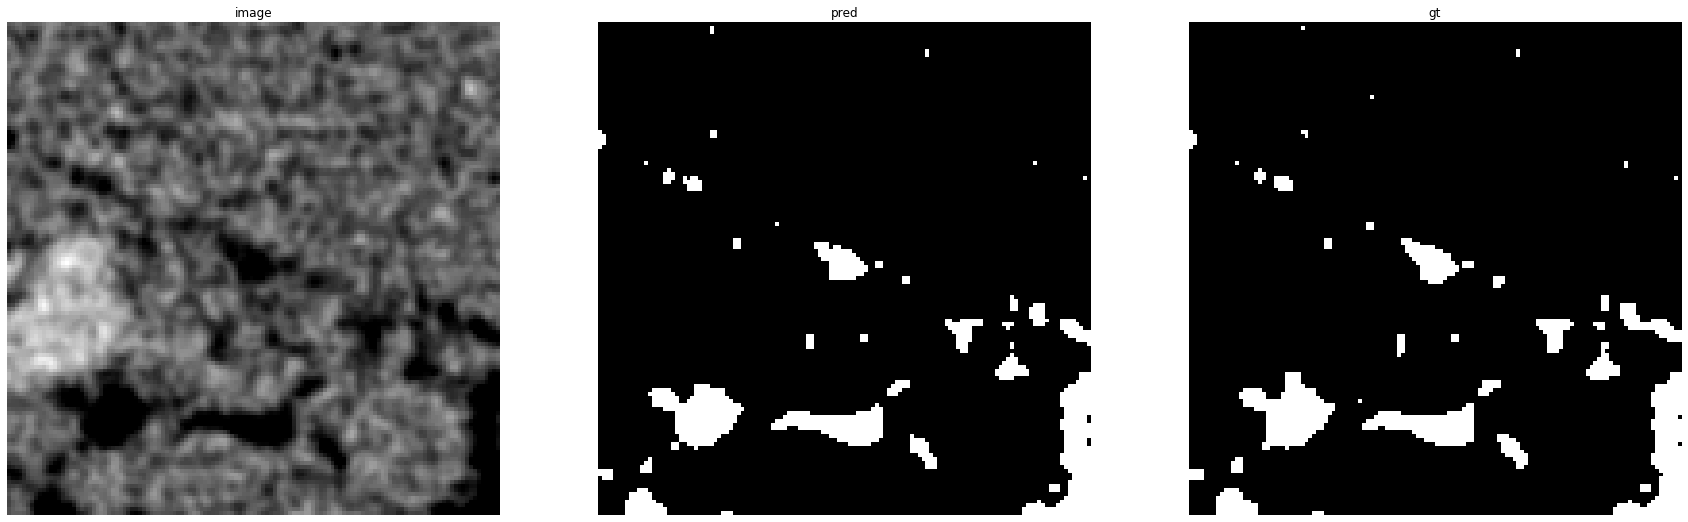

accuracy    : 0.9930419921875
precision   : 0.9928888888888889
recall      : 0.9133278822567457
f1          : 0.9514480408858602
pr_auc      : 0.9939105875476701
iou         : 0.9073923639317628


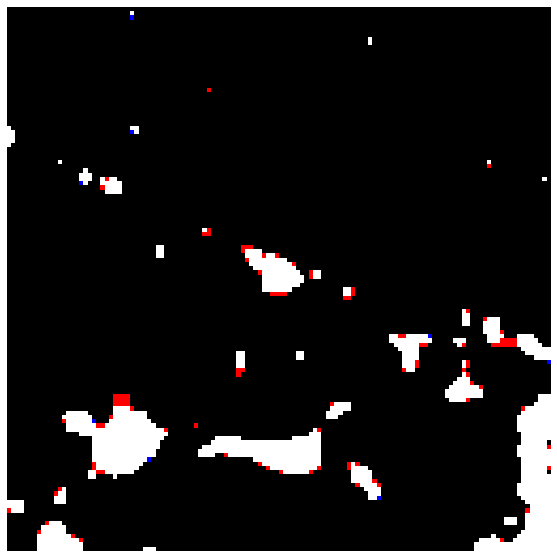

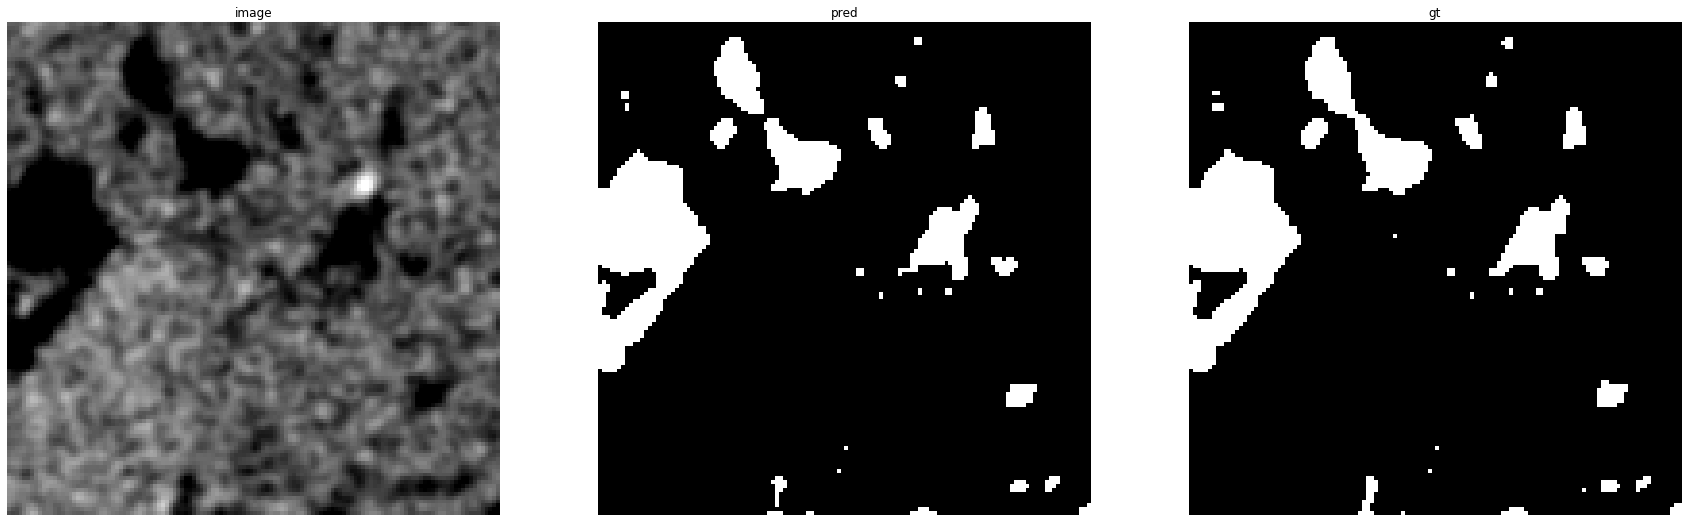

accuracy    : 0.9935302734375
precision   : 0.9933591588267847
recall      : 0.9502382212811011
f1          : 0.9713203463203463
pr_auc      : 0.9979798954865635
iou         : 0.9442398737506575


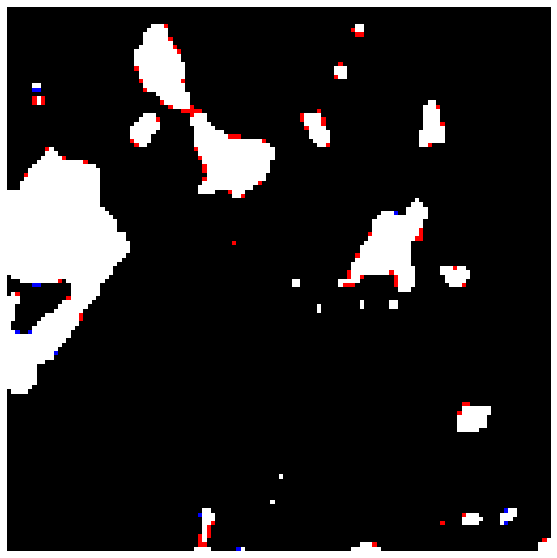

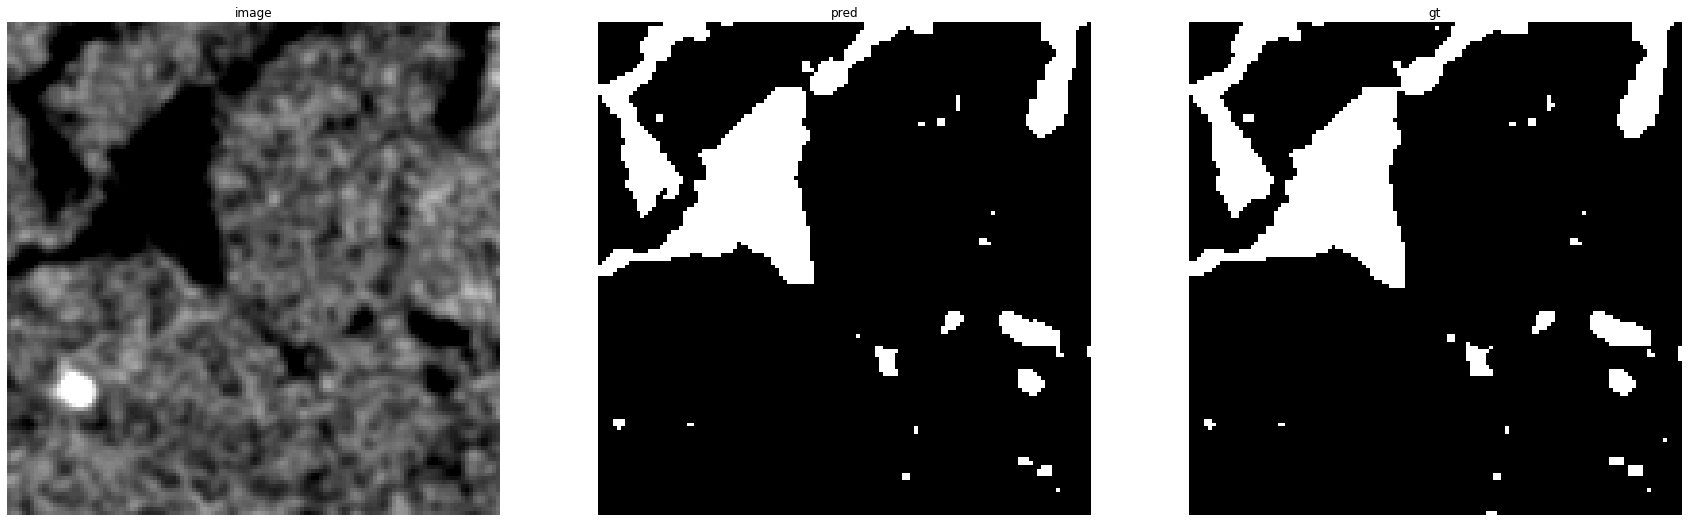

accuracy    : 0.99163818359375
precision   : 0.9957099957099957
recall      : 0.9481209150326797
f1          : 0.9713329148357397
pr_auc      : 0.9982903773711377
iou         : 0.9442636289666395


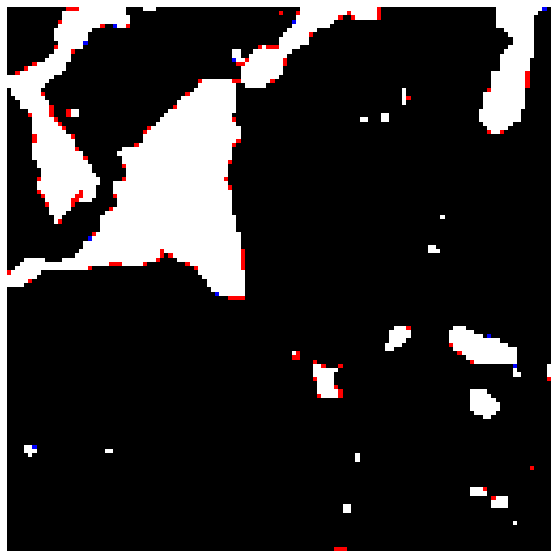

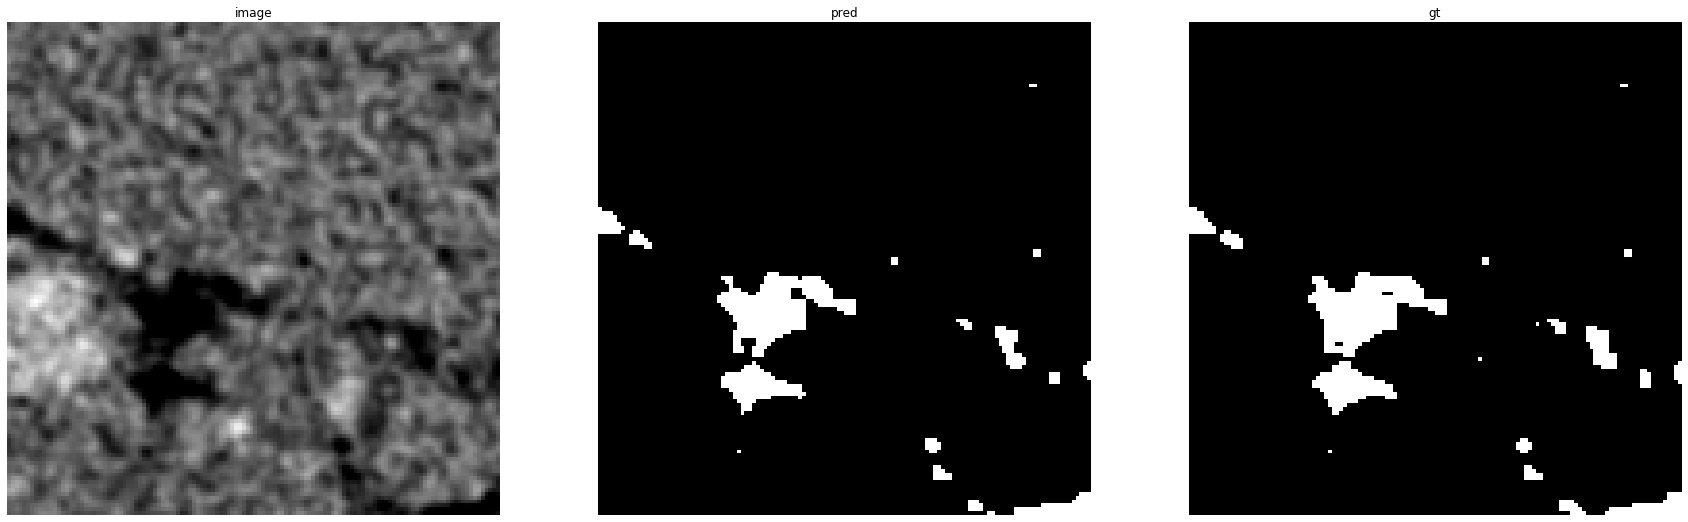

accuracy    : 0.99432373046875
precision   : 0.9893333333333333
recall      : 0.8972188633615478
f1          : 0.9410272669625872
pr_auc      : 0.9942320424725357
iou         : 0.888622754491018


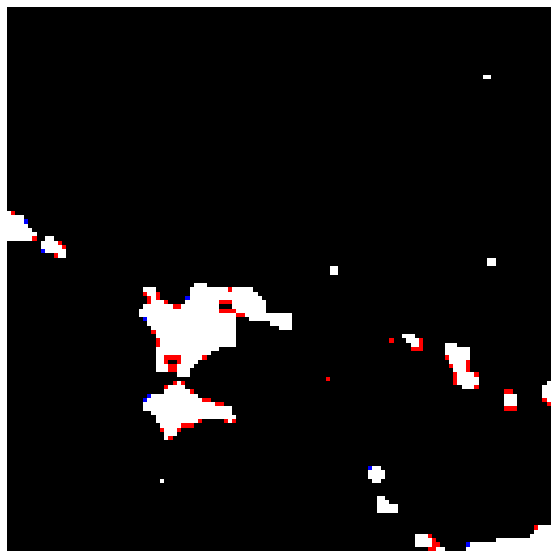

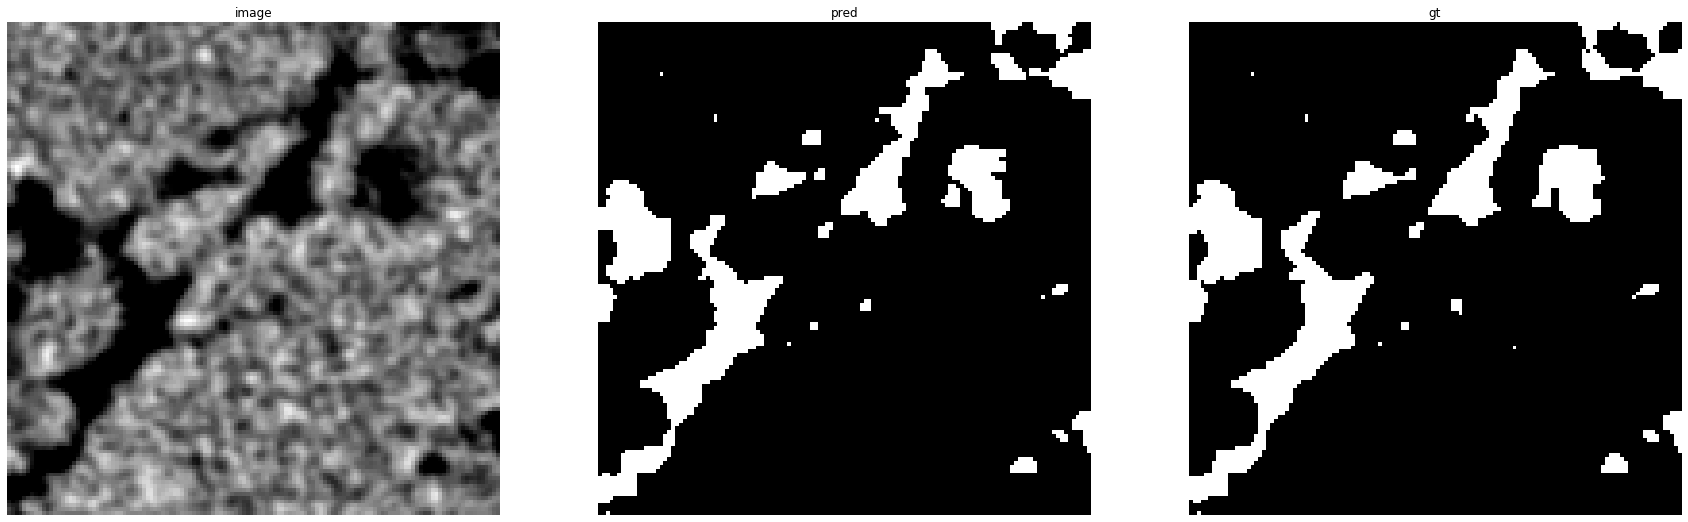

accuracy    : 0.9881591796875
precision   : 0.993984266543267
recall      : 0.9222842421640189
f1          : 0.956792873051225
pr_auc      : 0.9971066285566665
iou         : 0.9171648163962425


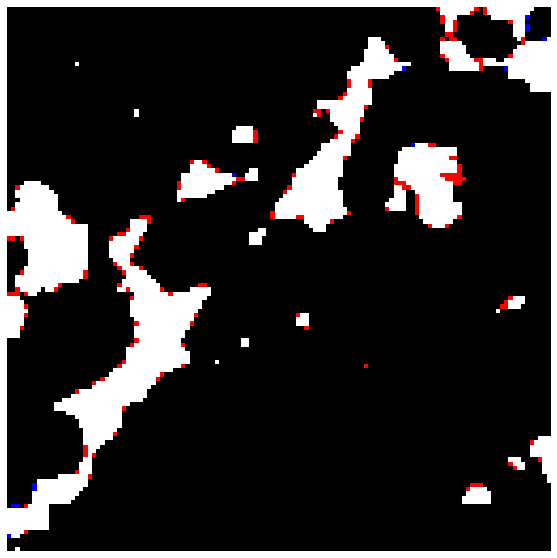

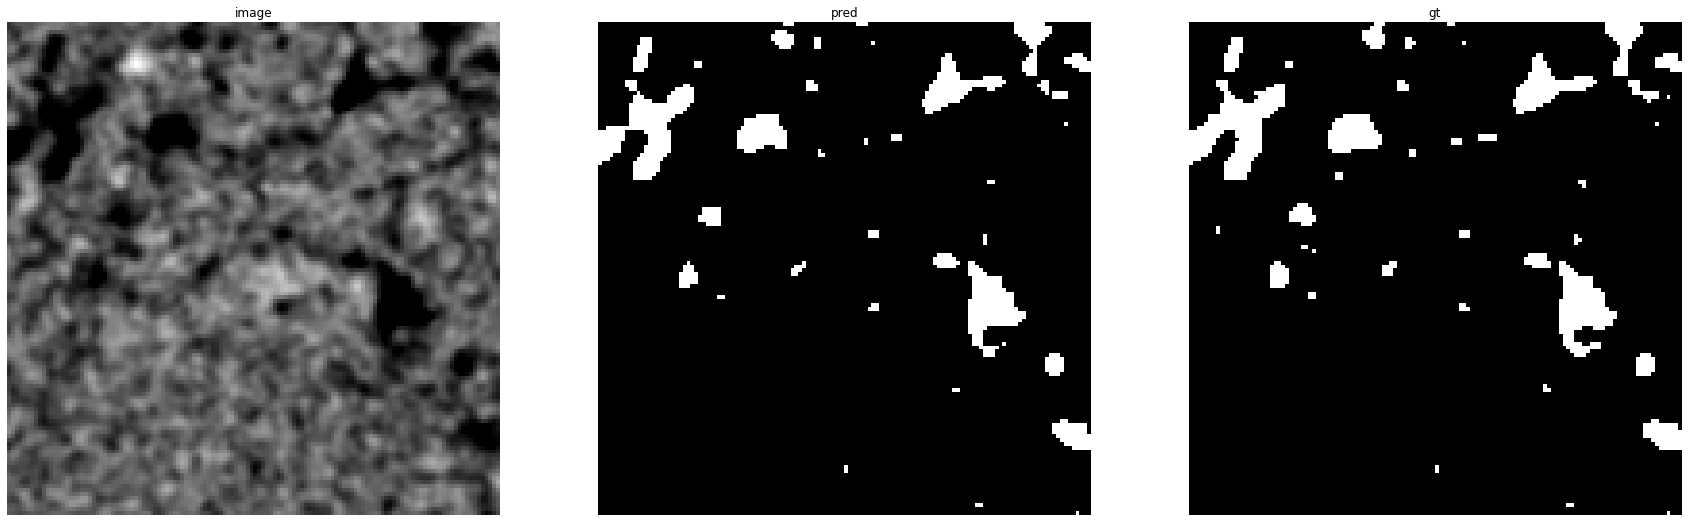

accuracy    : 0.9920654296875
precision   : 0.996309963099631
recall      : 0.8955223880597015
f1          : 0.9432314410480349
pr_auc      : 0.9931728449282329
iou         : 0.8925619834710744


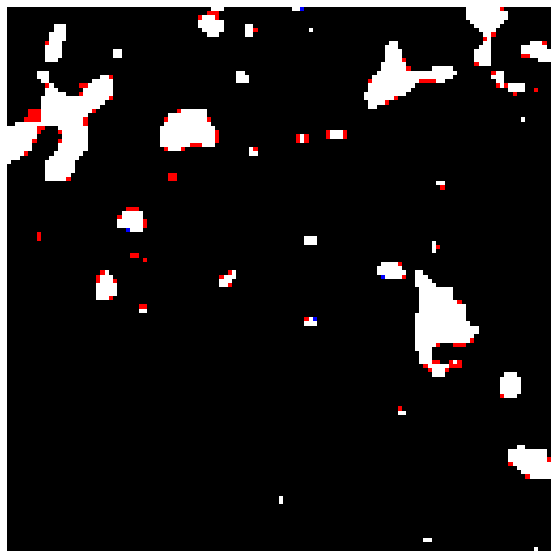

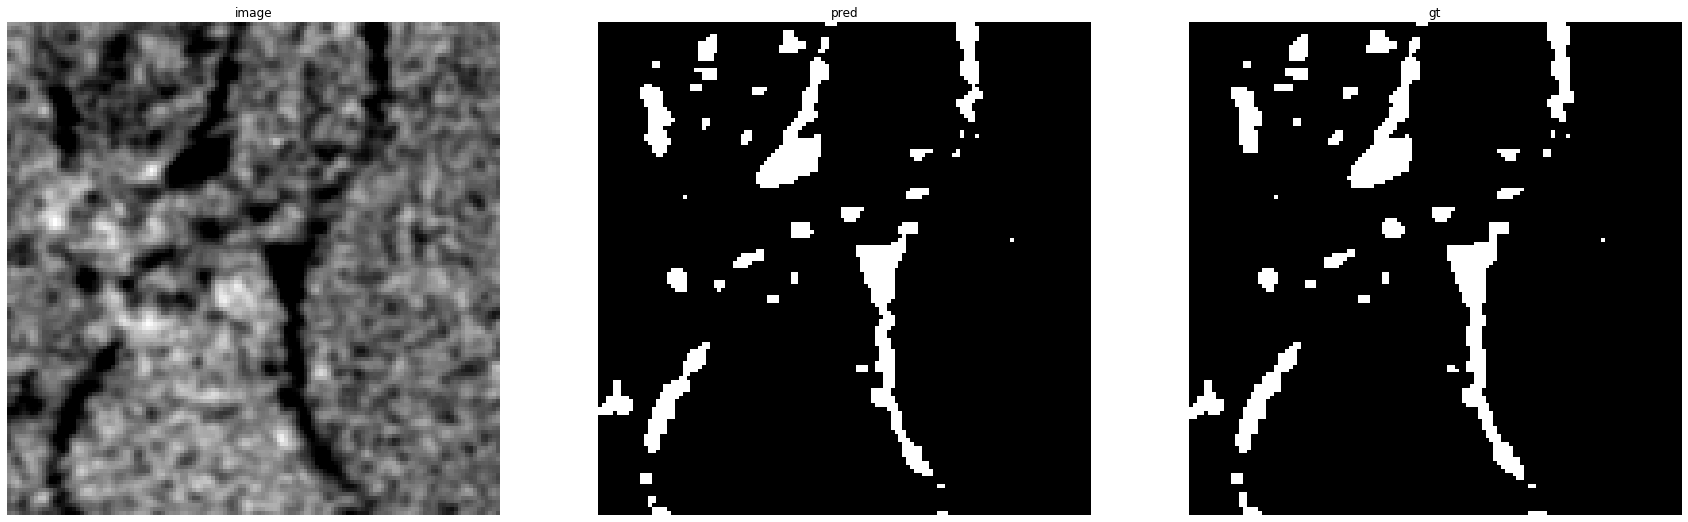

accuracy    : 0.9927978515625
precision   : 0.9789644012944984
recall      : 0.9293394777265745
f1          : 0.9535066981875493
pr_auc      : 0.9906651163066811
iou         : 0.911144578313253


Prediction for TiTree_subset2:


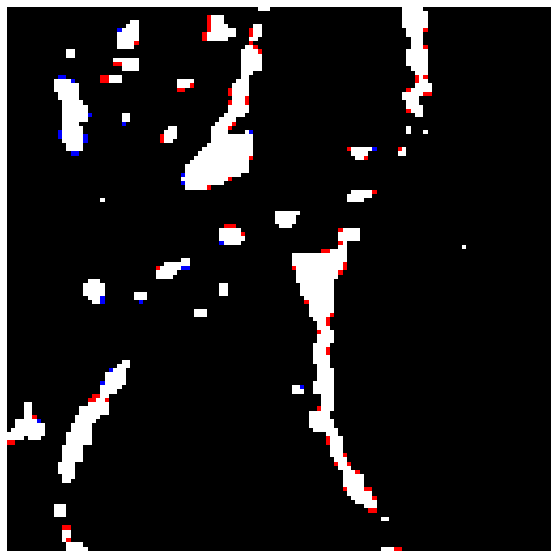

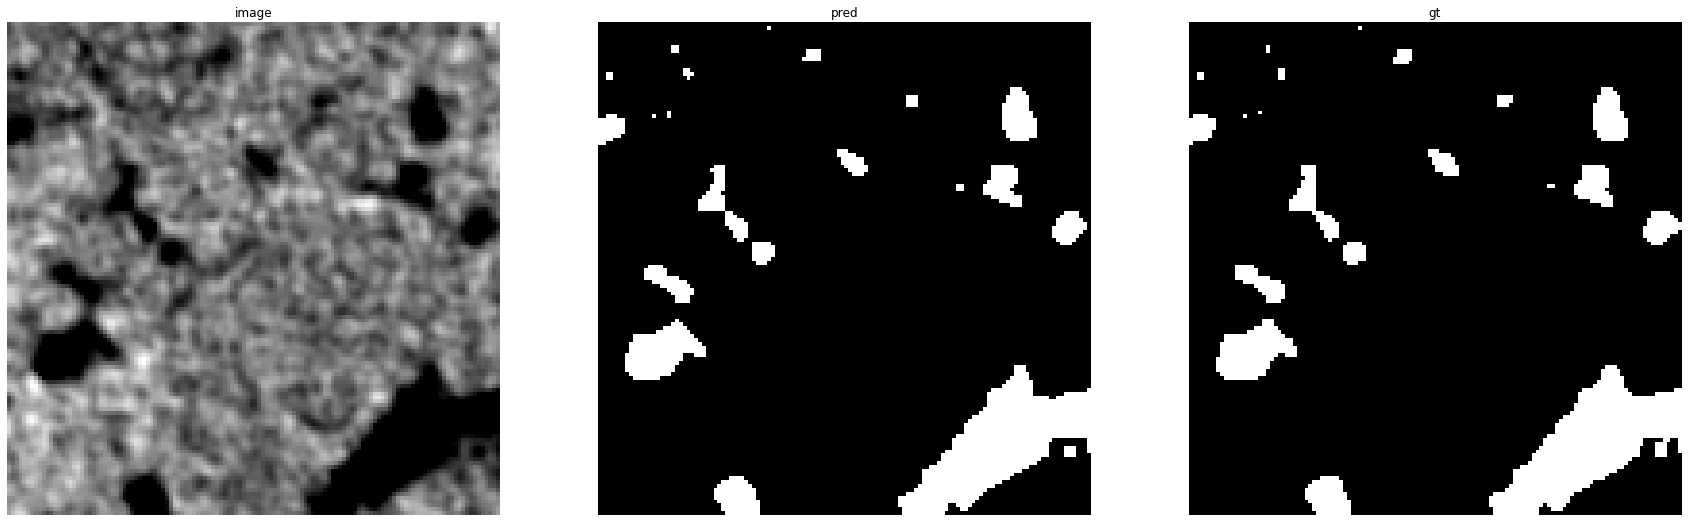

accuracy    : 0.99444580078125
precision   : 0.9910501193317423
recall      : 0.9562464018422567
f1          : 0.9733372399648402
pr_auc      : 0.9973662344742196
iou         : 0.9480593607305936


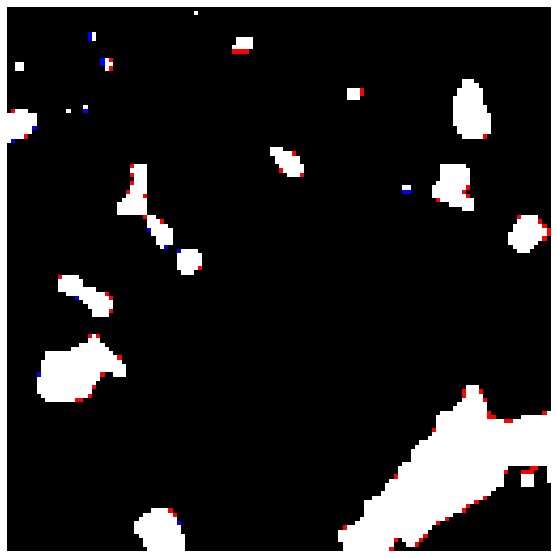

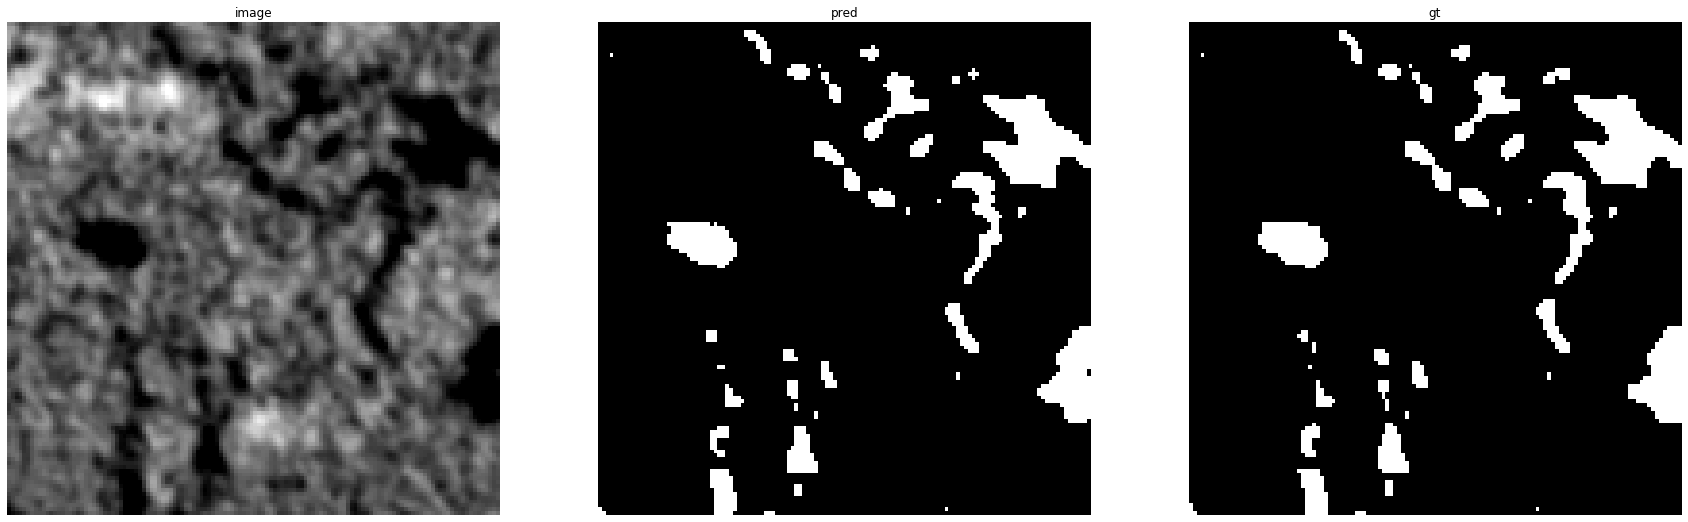

accuracy    : 0.991943359375
precision   : 0.98645903859174
recall      : 0.92861695347355
f1          : 0.9566644780039396
pr_auc      : 0.99404668835642
iou         : 0.9169288860918817


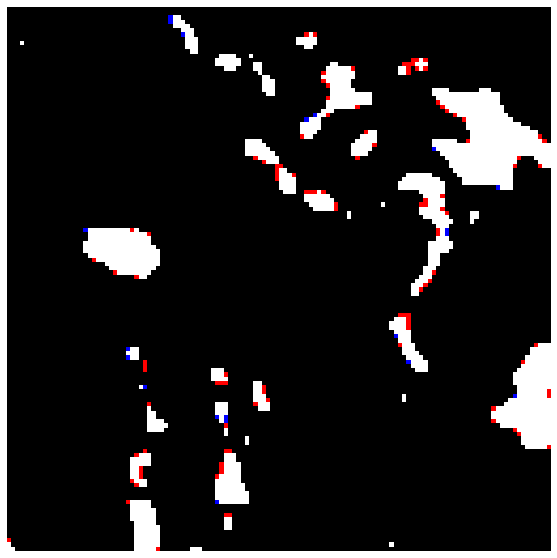

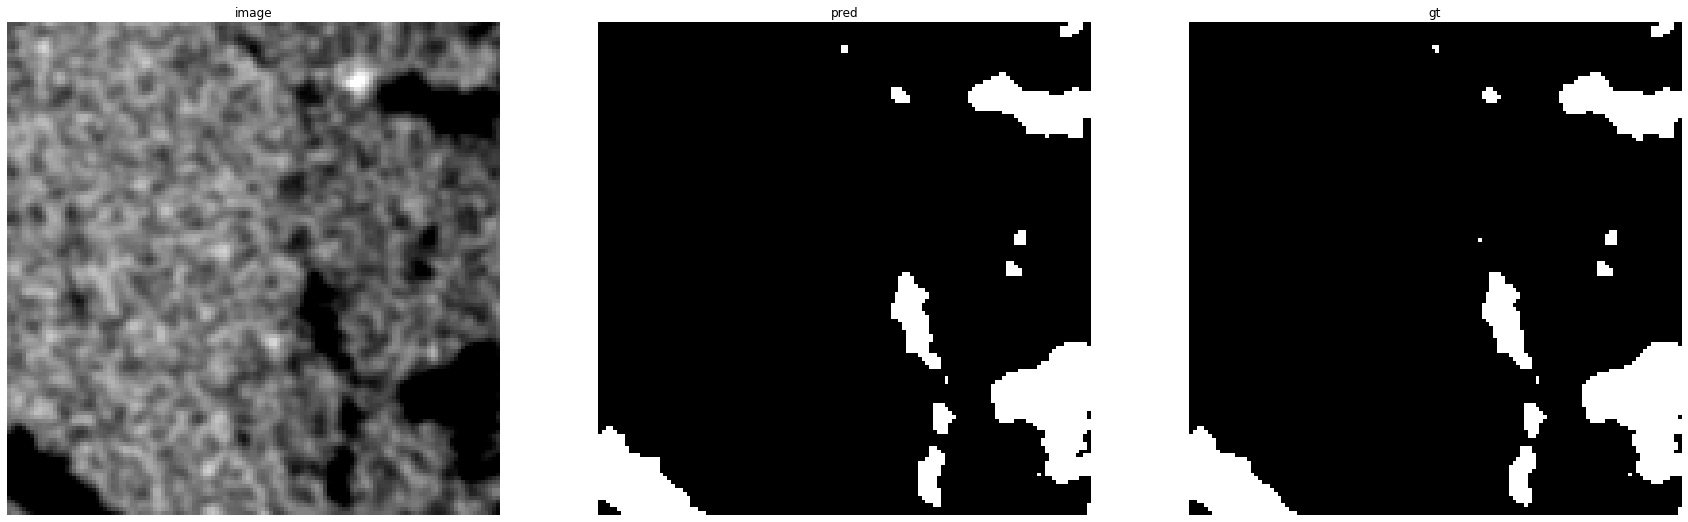

accuracy    : 0.99615478515625
precision   : 0.9917407878017789
recall      : 0.9689633767846059
f1          : 0.9802197802197802
pr_auc      : 0.9987459817745369
iou         : 0.9612068965517241


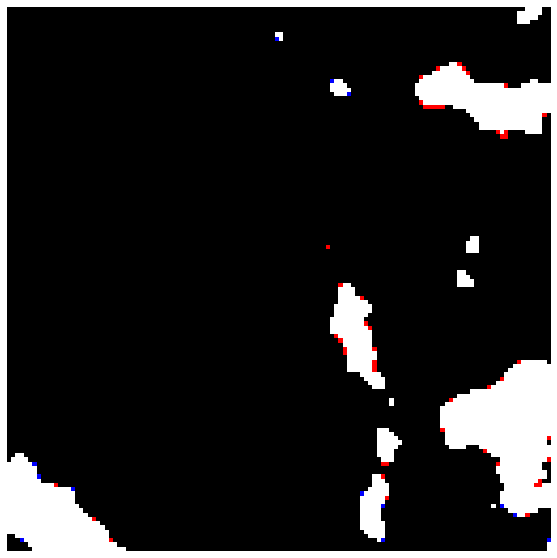

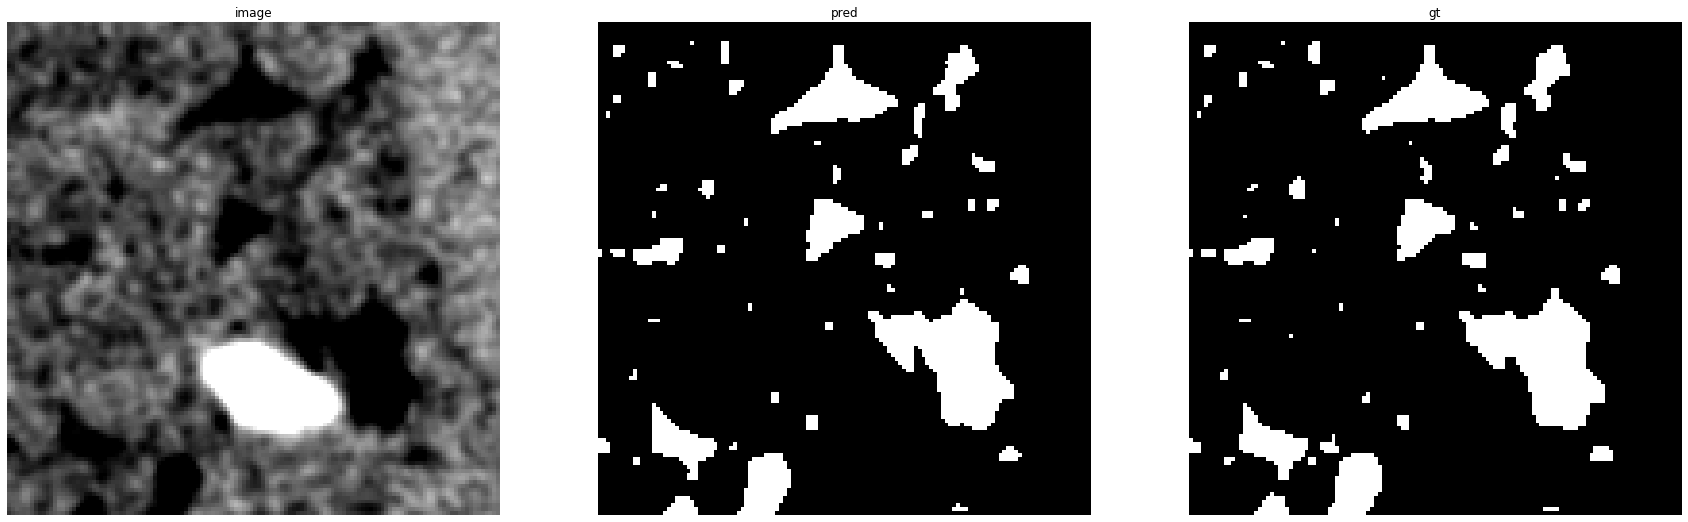

accuracy    : 0.990234375
precision   : 0.9884027411702688
recall      : 0.9314456035767511
f1          : 0.959079283887468
pr_auc      : 0.9961848281028196
iou         : 0.9213759213759214


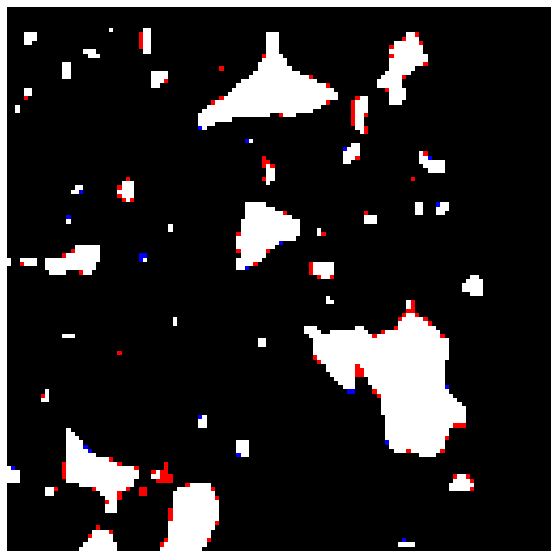

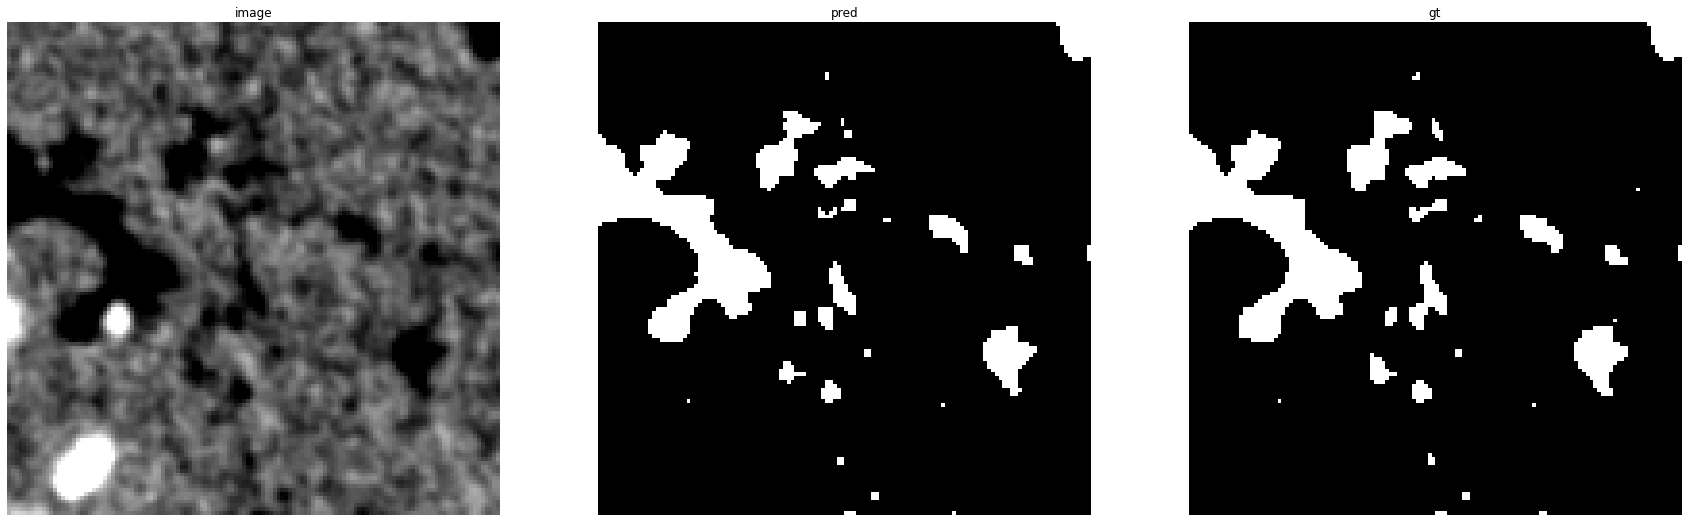

accuracy    : 0.99267578125
precision   : 0.9962073324905183
recall      : 0.9325443786982248
f1          : 0.9633251833740831
pr_auc      : 0.9982269610180939
iou         : 0.9292452830188679


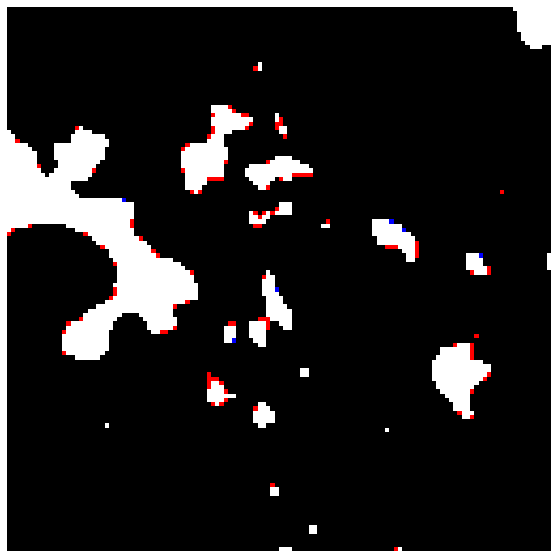

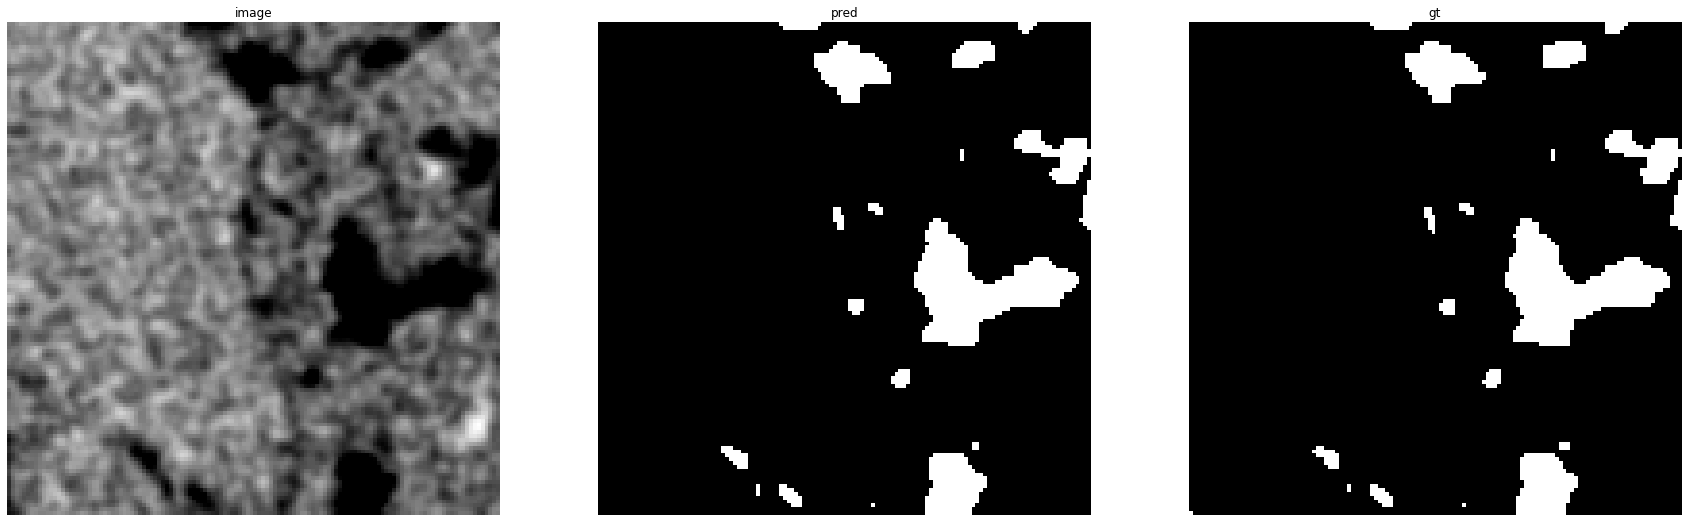

accuracy    : 0.9964599609375
precision   : 0.9957173447537473
recall      : 0.9640635798203179
f1          : 0.9796348314606741
pr_auc      : 0.9984652899179913
iou         : 0.9600825877494839


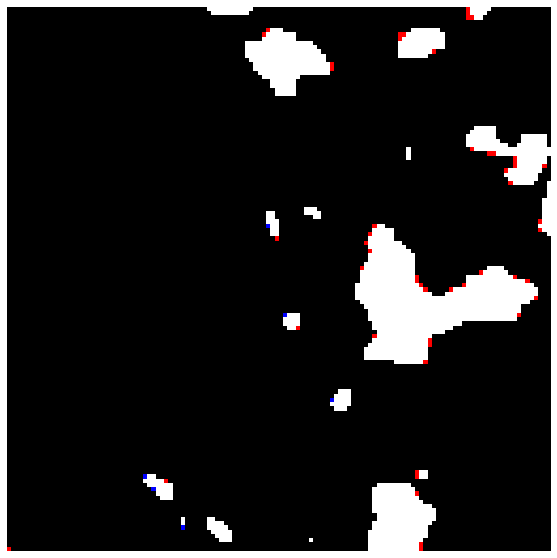

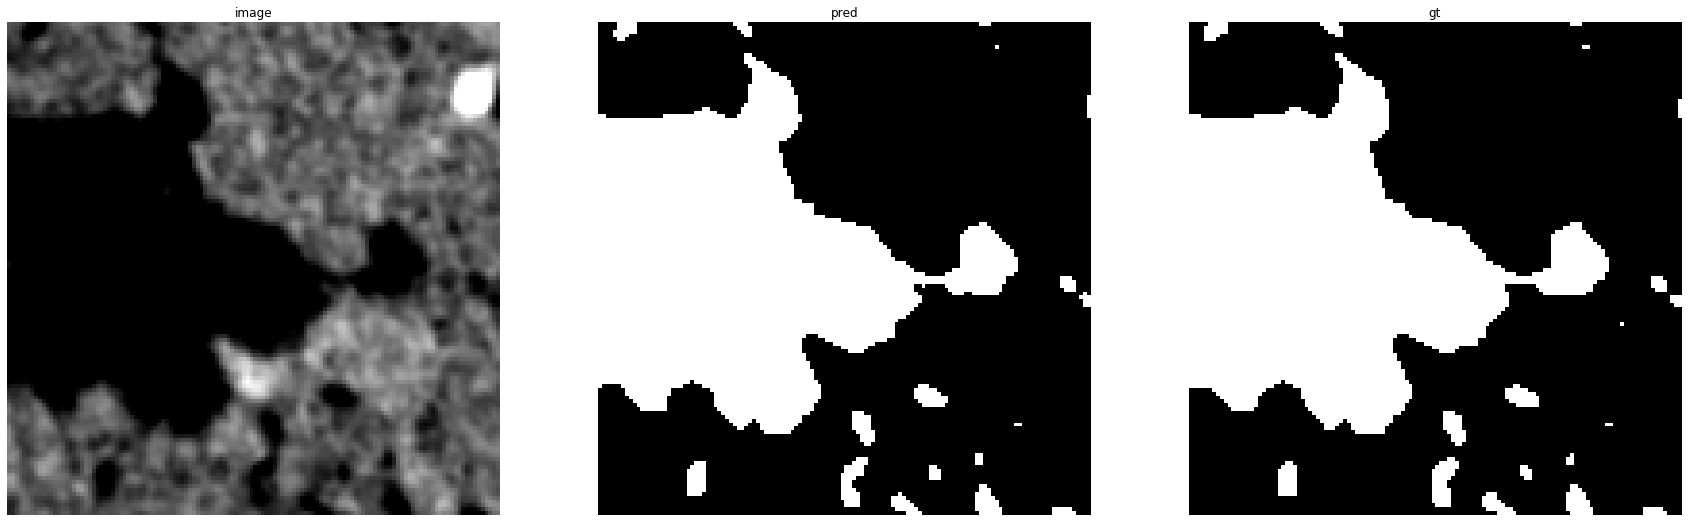

accuracy    : 0.9954833984375
precision   : 0.9956958393113343
recall      : 0.991074616208497
f1          : 0.993379853283235
pr_auc      : 0.9998293936987113
iou         : 0.9868467827941699


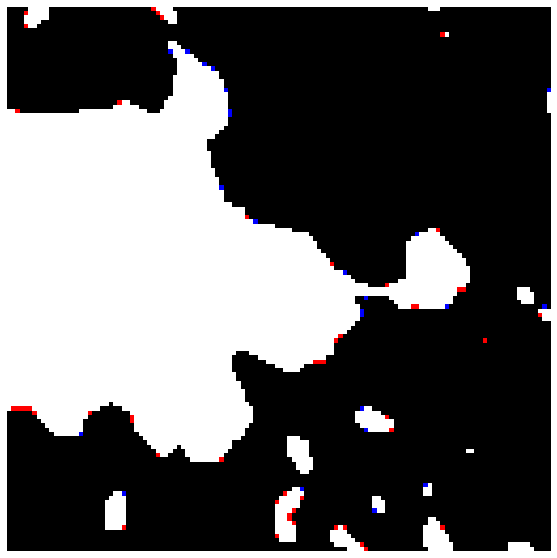

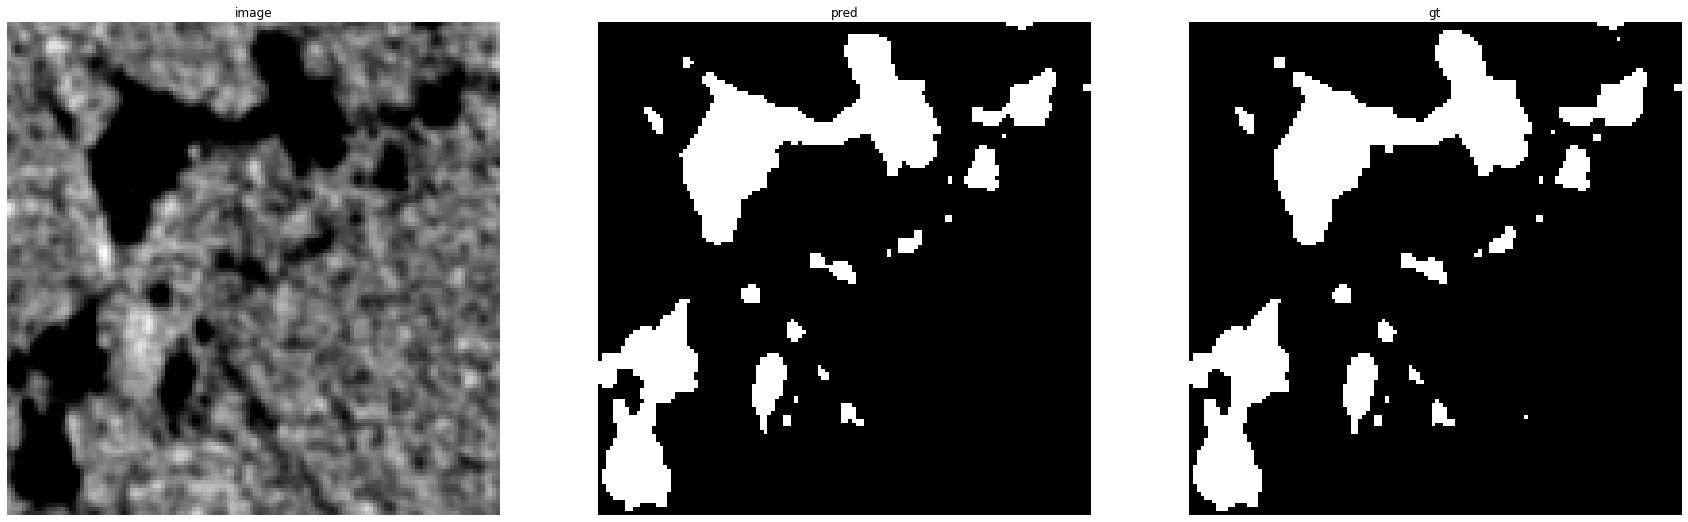

accuracy    : 0.99200439453125
precision   : 0.9951528709917972
recall      : 0.9576605669178327
f1          : 0.9760468092887182
pr_auc      : 0.9986653297646272
iou         : 0.9532142857142857


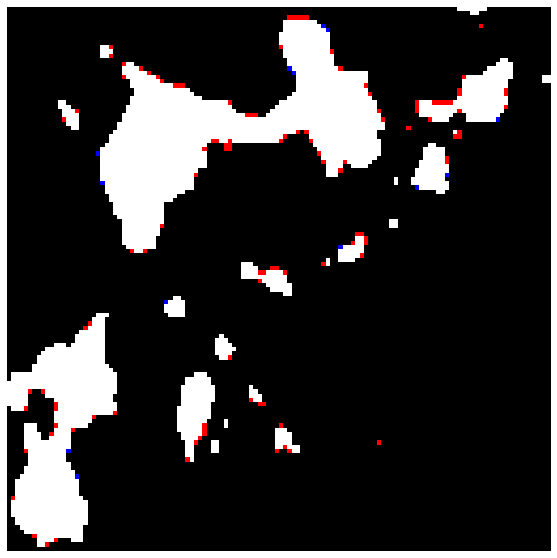

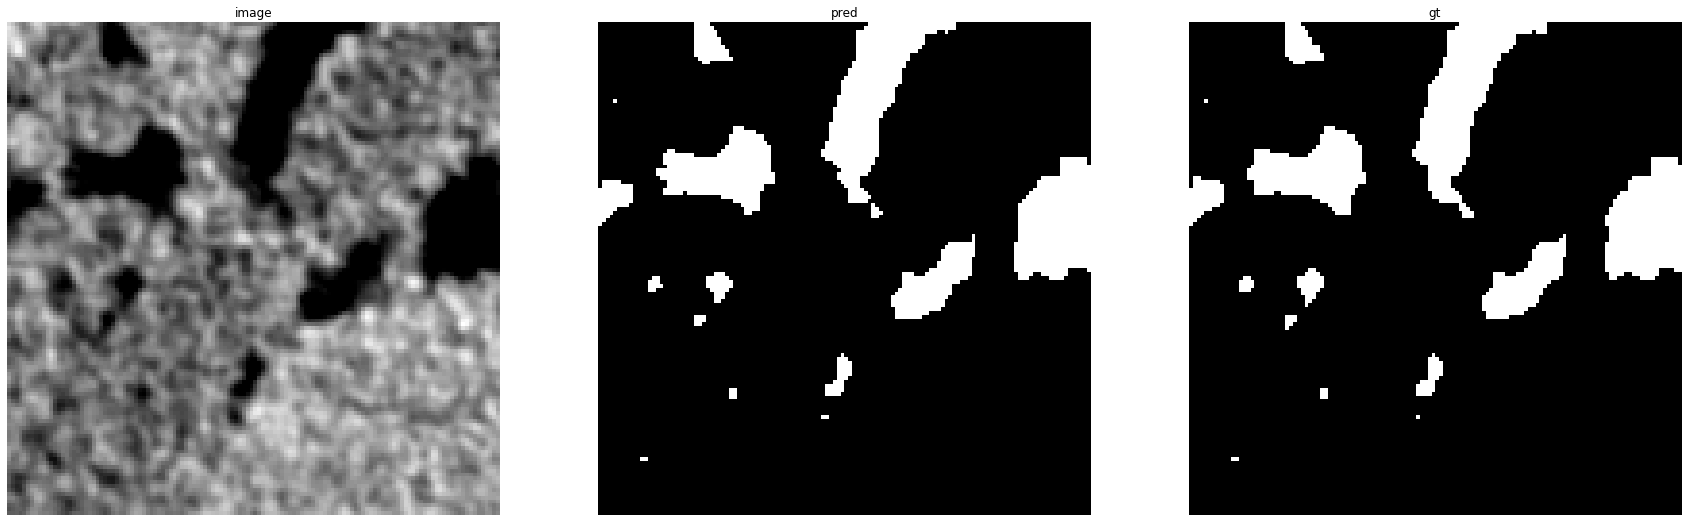

accuracy    : 0.99530029296875
precision   : 0.996011964107677
recall      : 0.9666182873730044
f1          : 0.9810950159587527
pr_auc      : 0.9995105797906224
iou         : 0.9628915662650602


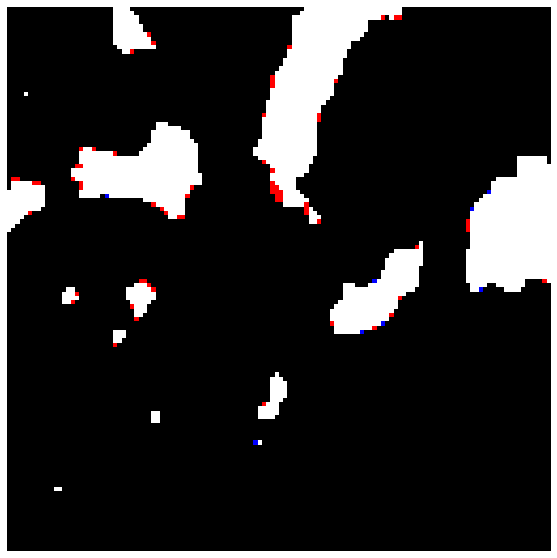

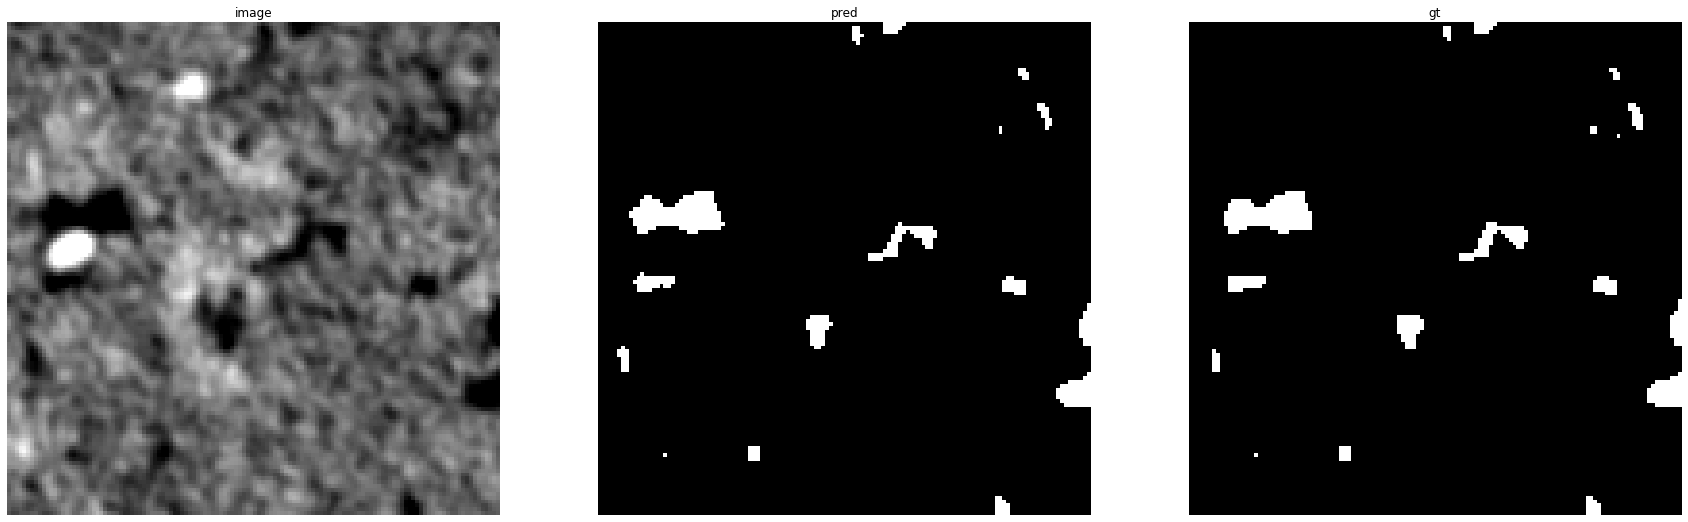

accuracy    : 0.99725341796875
precision   : 0.9675572519083969
recall      : 0.9476635514018692
f1          : 0.9575070821529746
pr_auc      : 0.9937183055197976
iou         : 0.9184782608695652


Prediction for Urna_22:


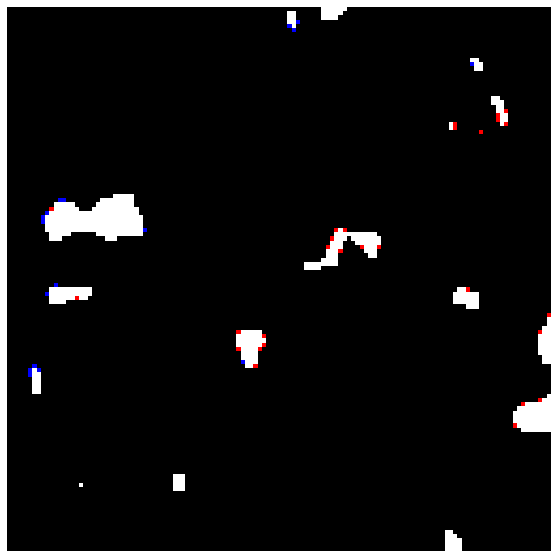

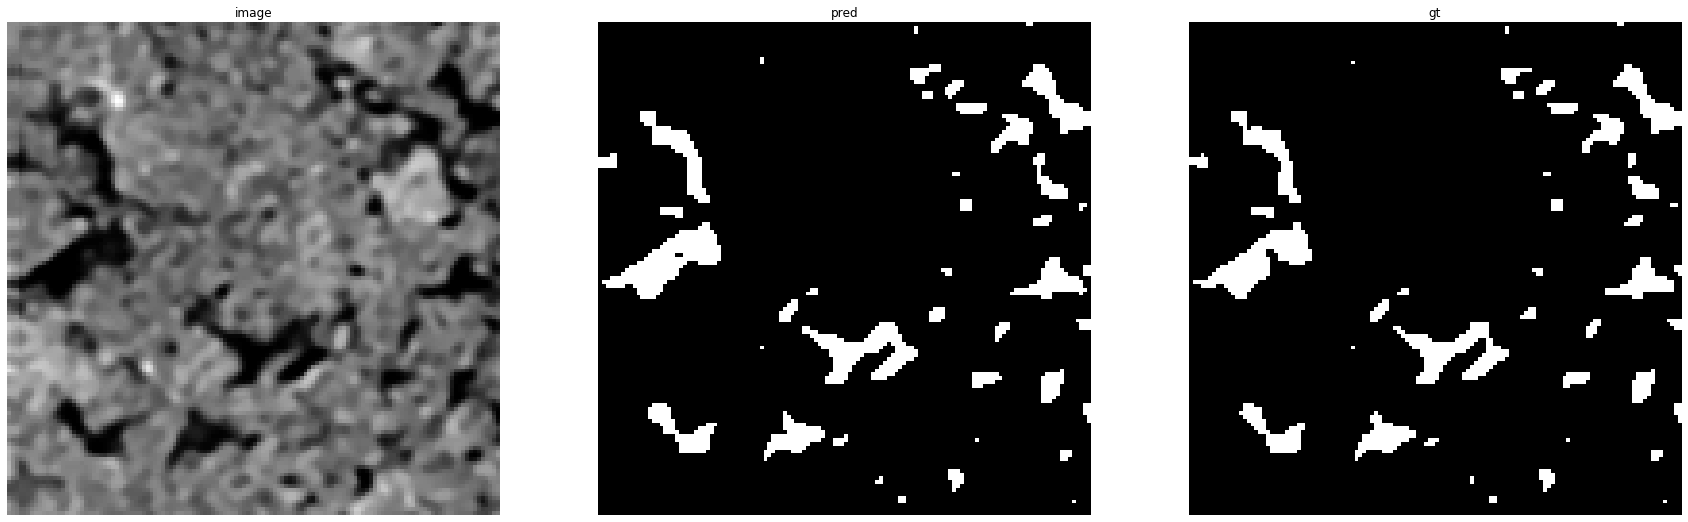

accuracy    : 0.99346923828125
precision   : 0.9304659498207886
recall      : 0.9923547400611621
f1          : 0.9604143544210137
pr_auc      : 0.9961174420429884
iou         : 0.9238434163701068


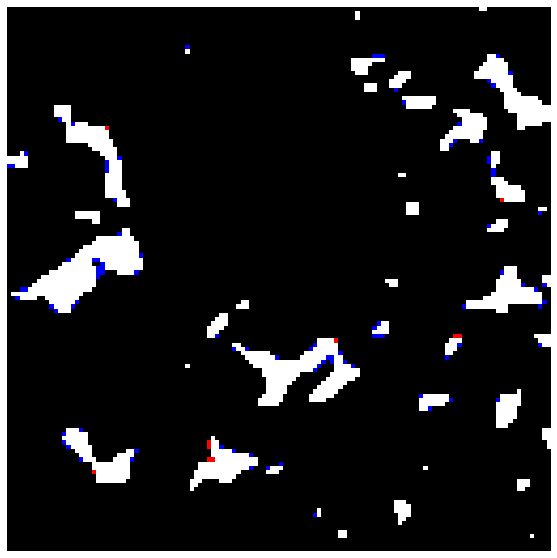

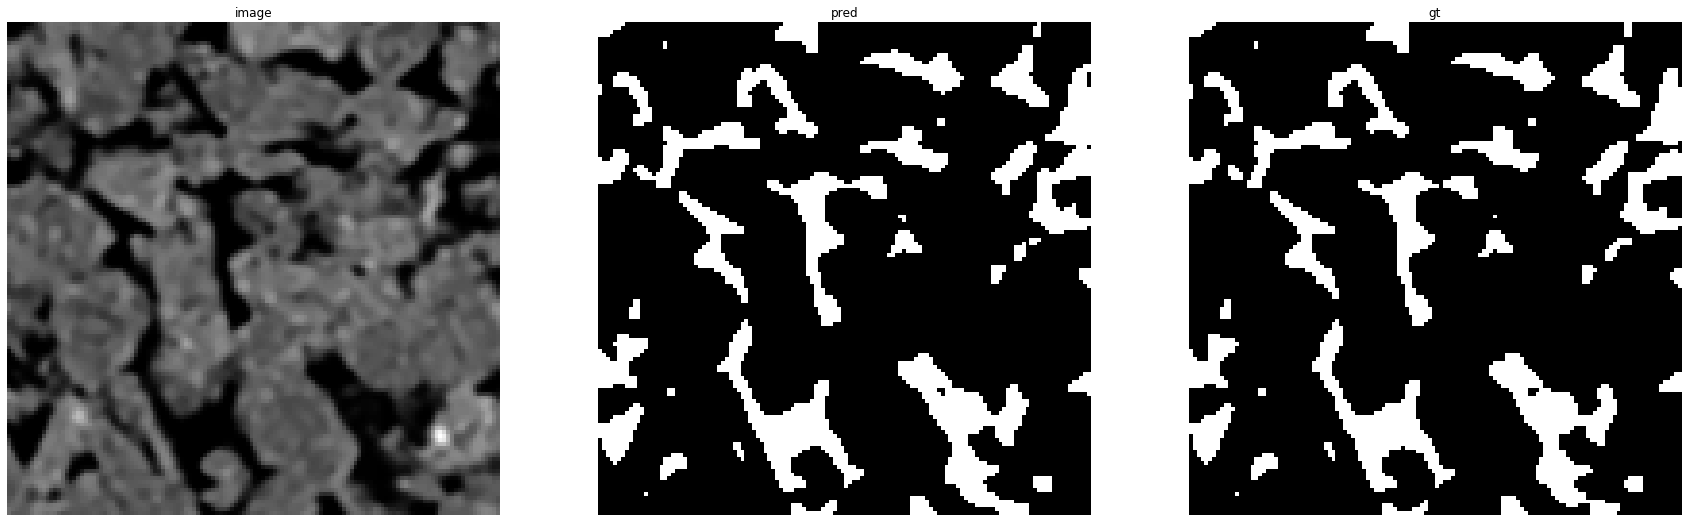

accuracy    : 0.99188232421875
precision   : 0.9633259563705343
recall      : 0.9944516971279374
f1          : 0.9786414003533002
pr_auc      : 0.9985716264094792
iou         : 0.9581761006289308


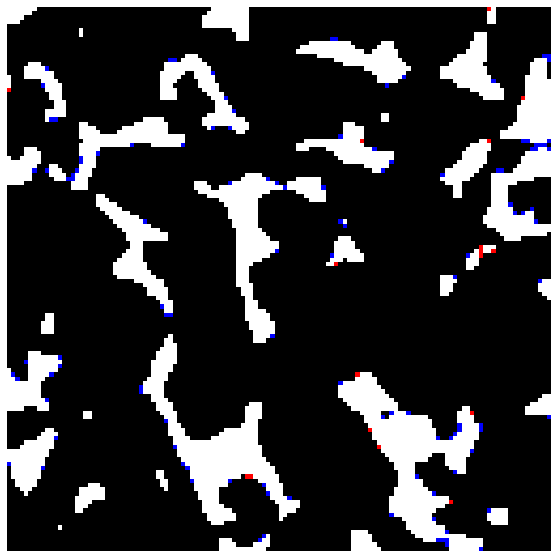

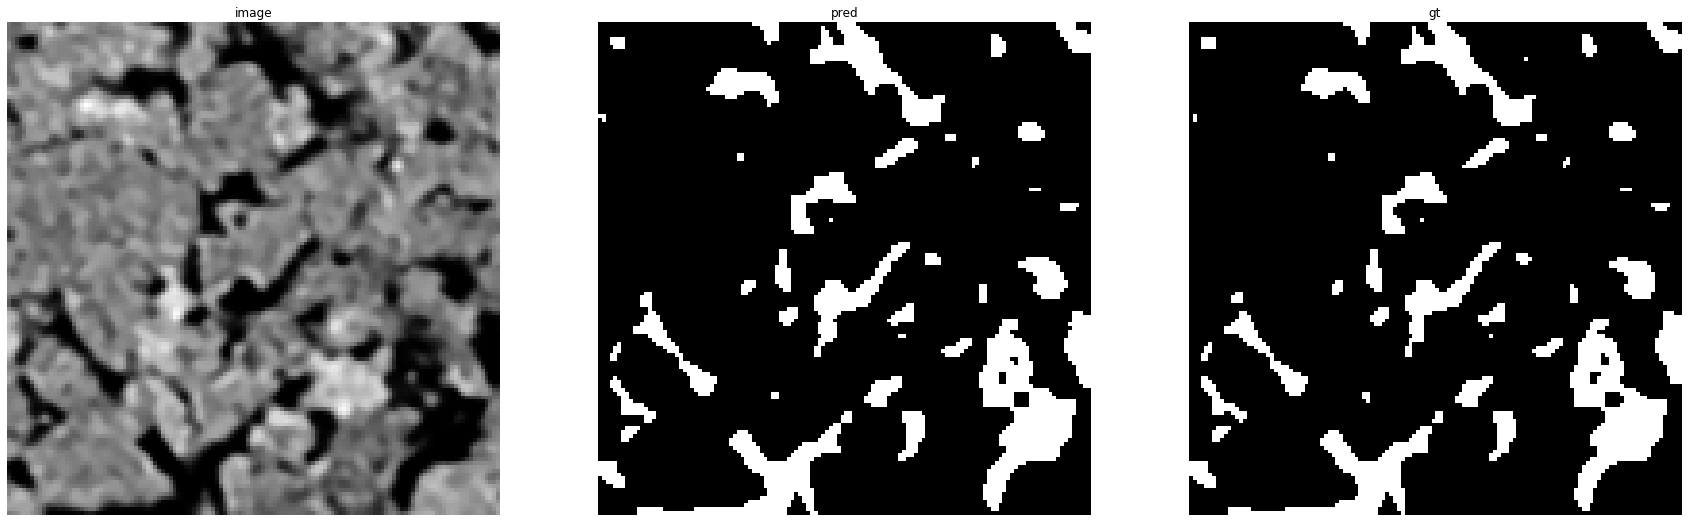

accuracy    : 0.99383544921875
precision   : 0.9635544635544635
recall      : 0.9949260042283298
f1          : 0.9789889744123154
pr_auc      : 0.9987477704430394
iou         : 0.958842705786471


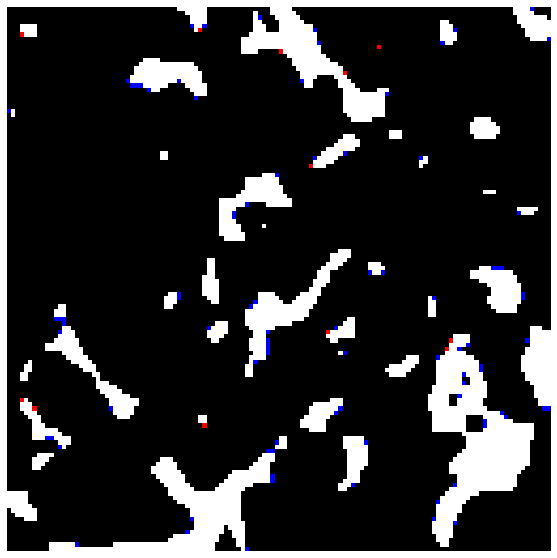

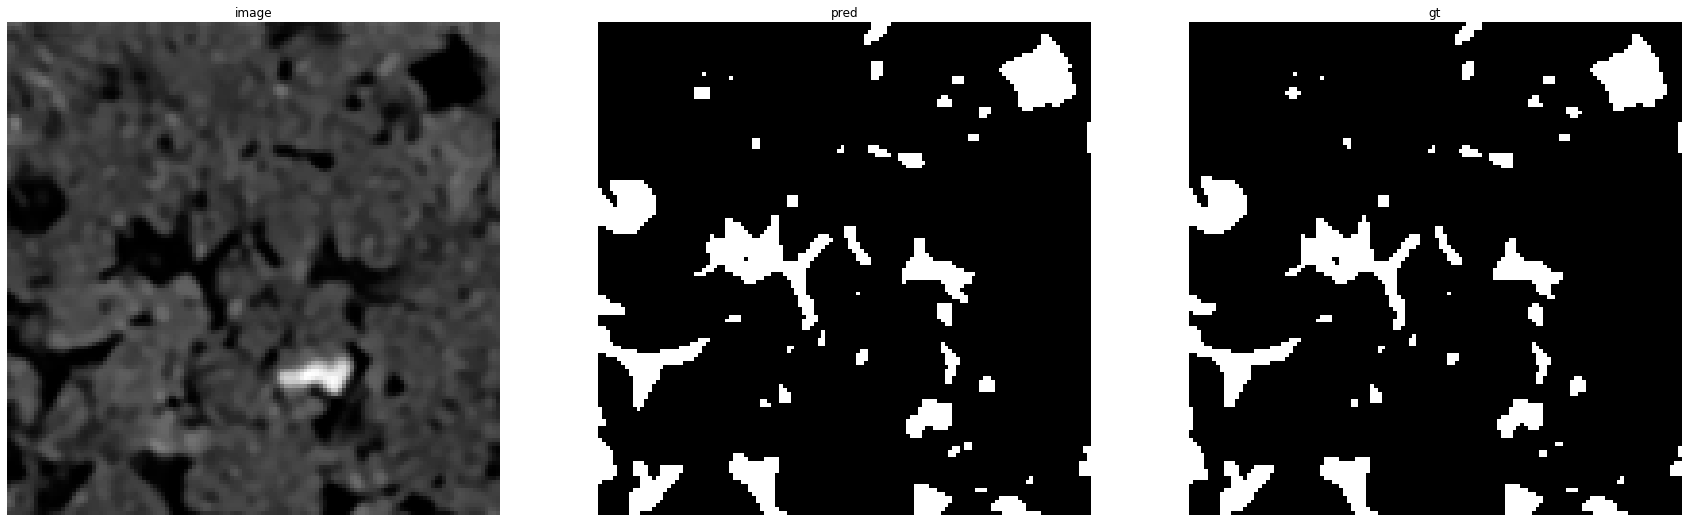

accuracy    : 0.9930419921875
precision   : 0.9481921208850512
recall      : 0.9898591549295774
f1          : 0.9685777287761852
pr_auc      : 0.9977472542448439
iou         : 0.9390700160342063


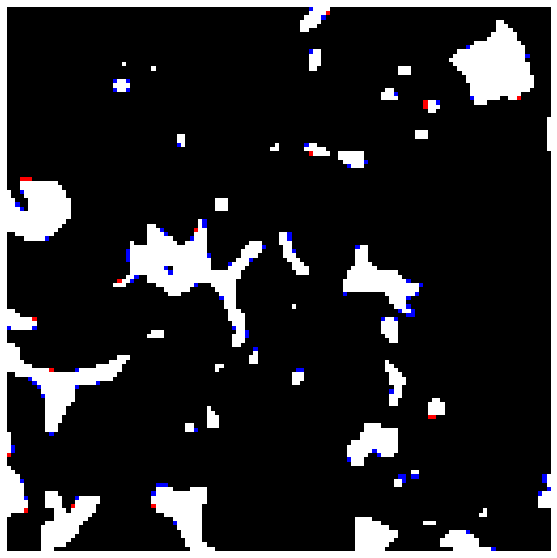

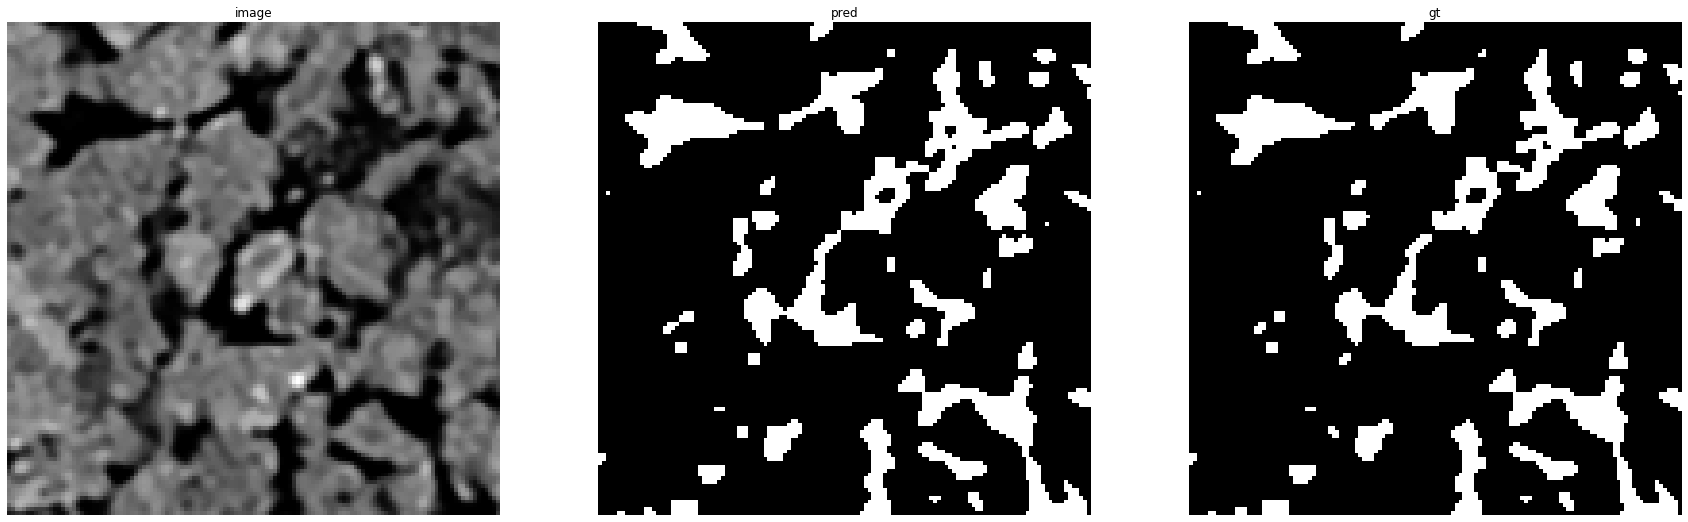

accuracy    : 0.99017333984375
precision   : 0.9522986519184238
recall      : 0.9917206623470123
f1          : 0.9716099453359196
pr_auc      : 0.99815256043879
iou         : 0.9447873799725651


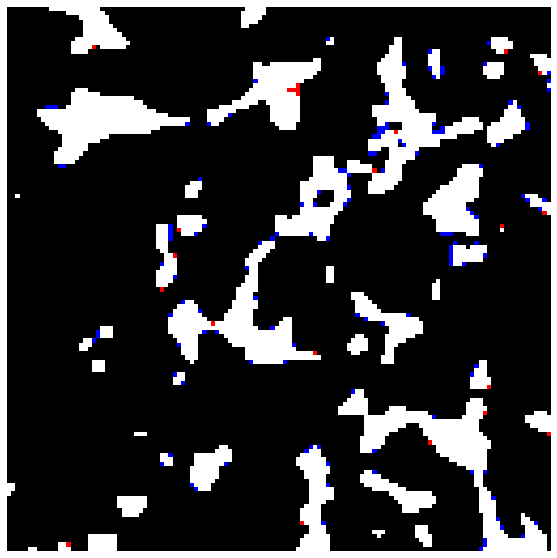

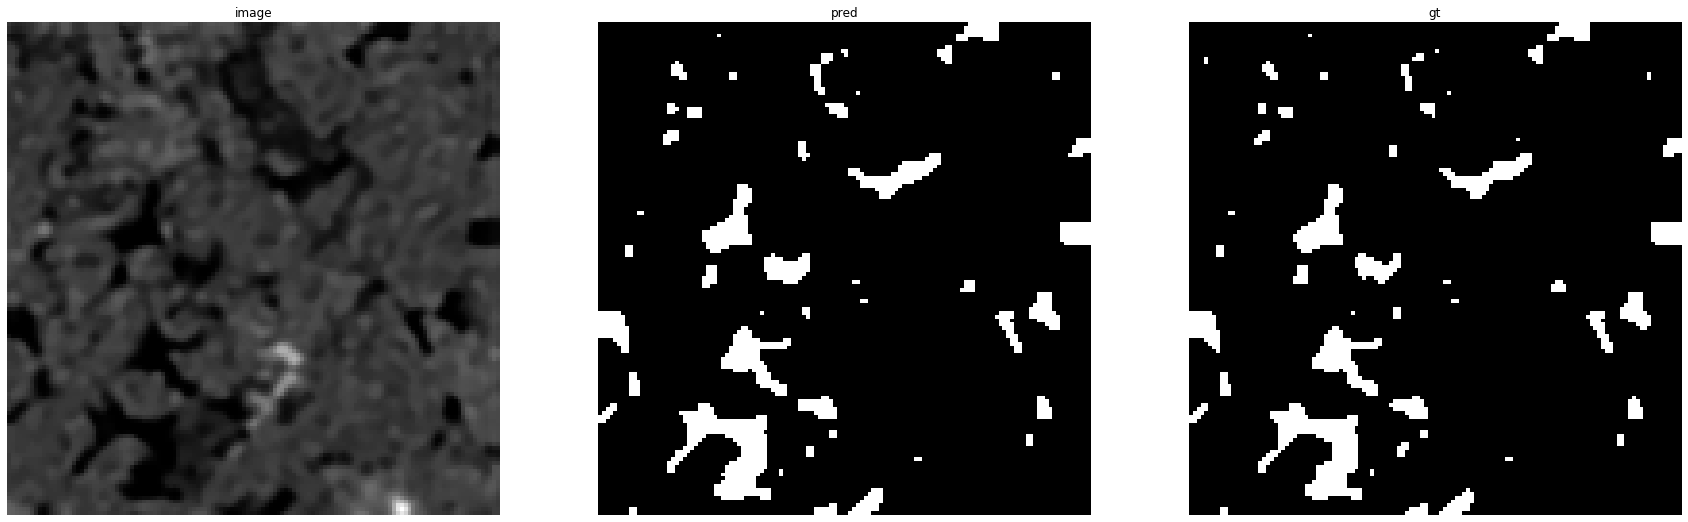

accuracy    : 0.99481201171875
precision   : 0.9455630126771066
recall      : 0.990625
f1          : 0.9675696299122473
pr_auc      : 0.9965587380109451
iou         : 0.9371766444937176


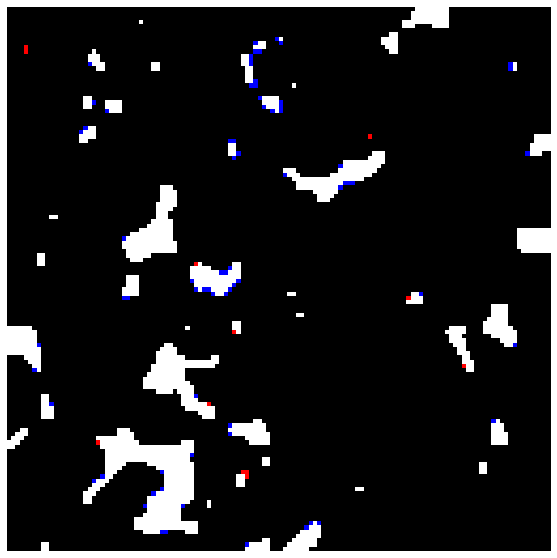

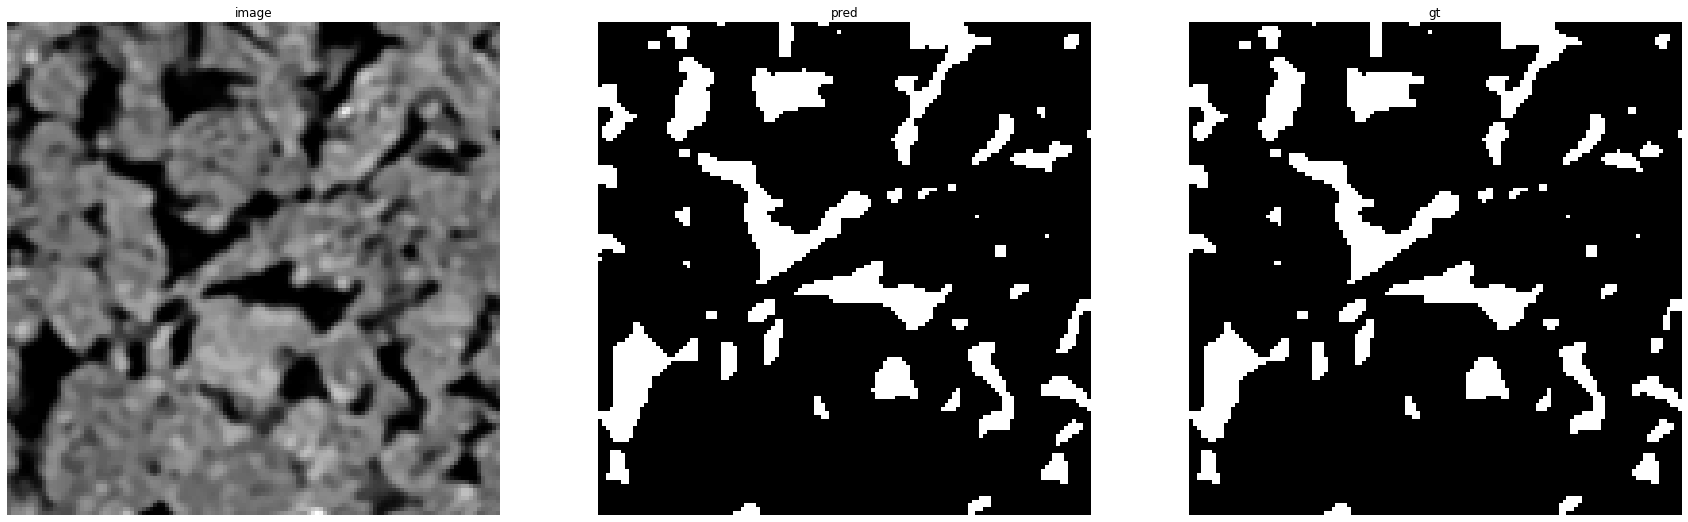

accuracy    : 0.99261474609375
precision   : 0.9559555725775565
recall      : 0.9976019184652278
f1          : 0.9763348327791903
pr_auc      : 0.9982159428389584
iou         : 0.953763851738632


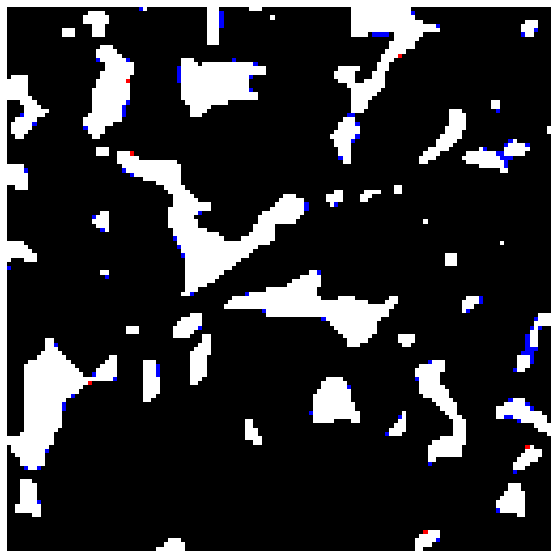

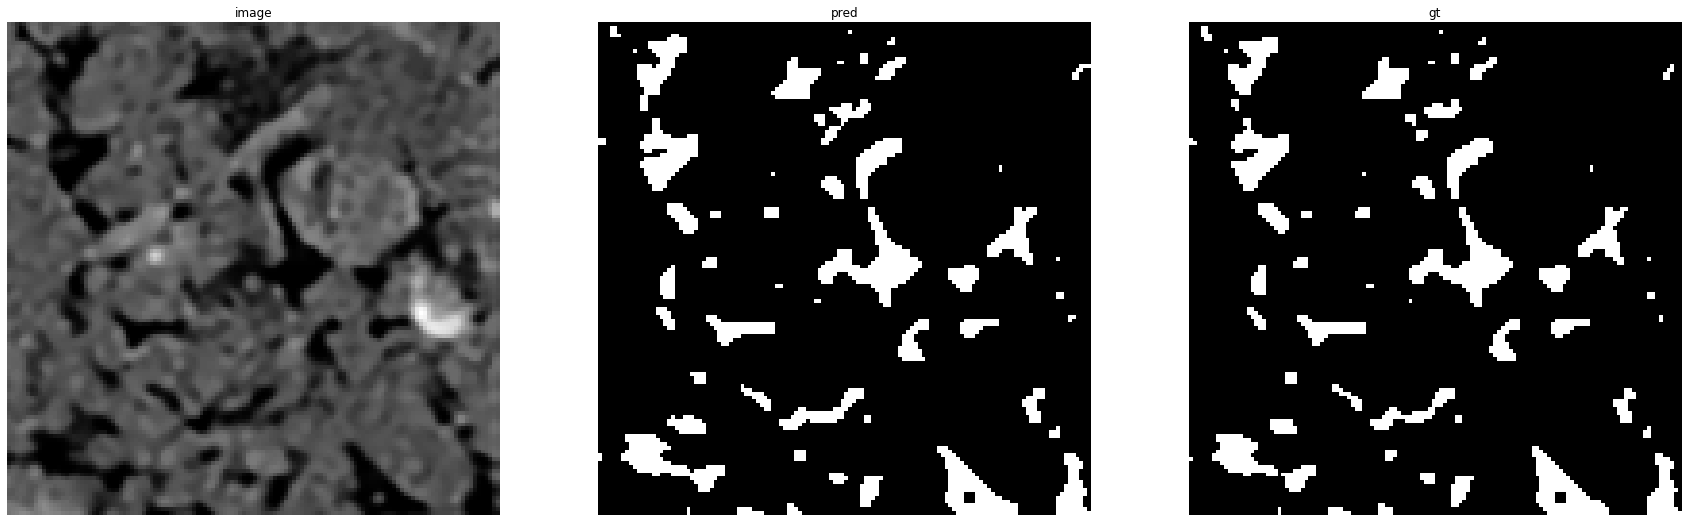

accuracy    : 0.9918212890625
precision   : 0.9346092503987241
recall      : 0.9937817976257772
f1          : 0.9632876712328768
pr_auc      : 0.997360390291363
iou         : 0.9291754756871036


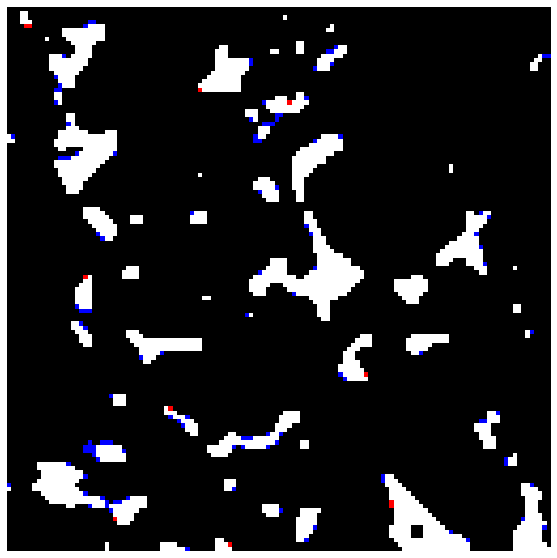

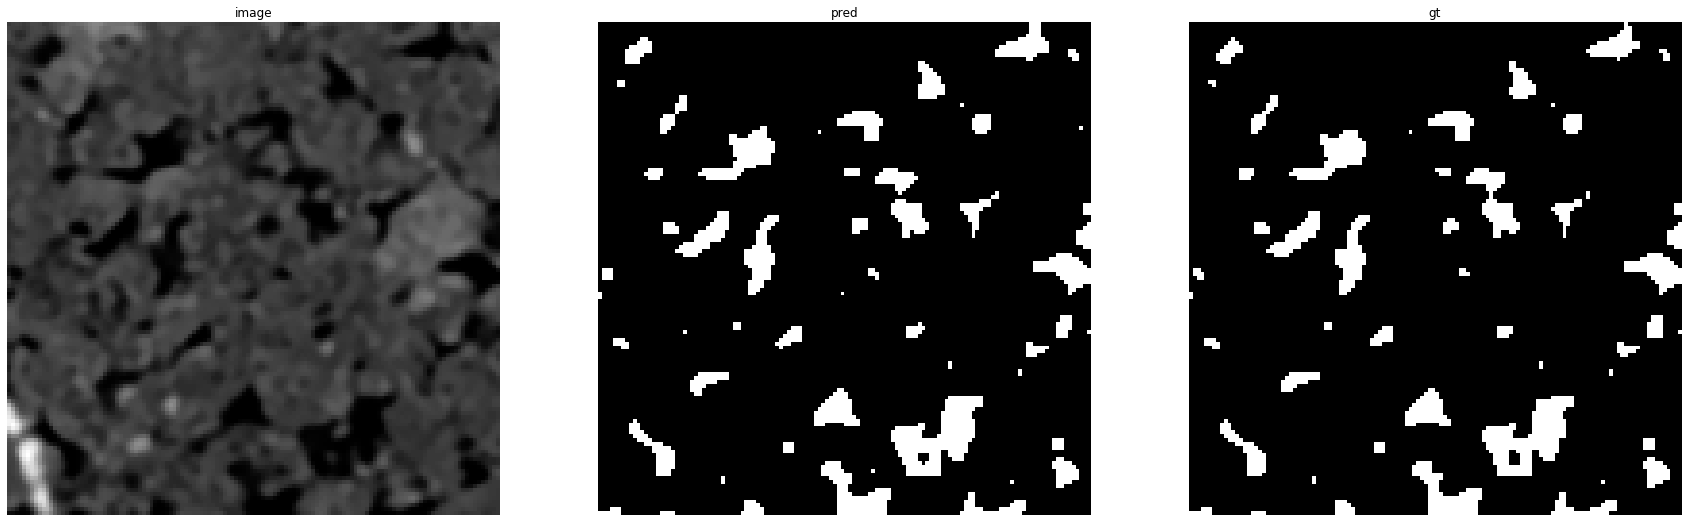

accuracy    : 0.9957275390625
precision   : 0.9611650485436893
recall      : 0.9962264150943396
f1          : 0.9783817171093268
pr_auc      : 0.9982630443652161
iou         : 0.9576783555018138


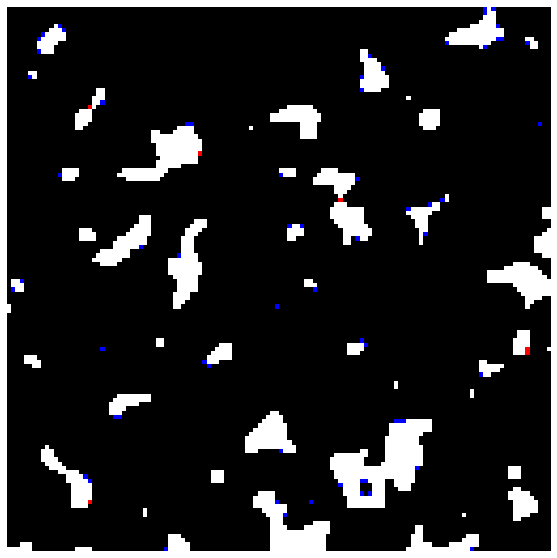

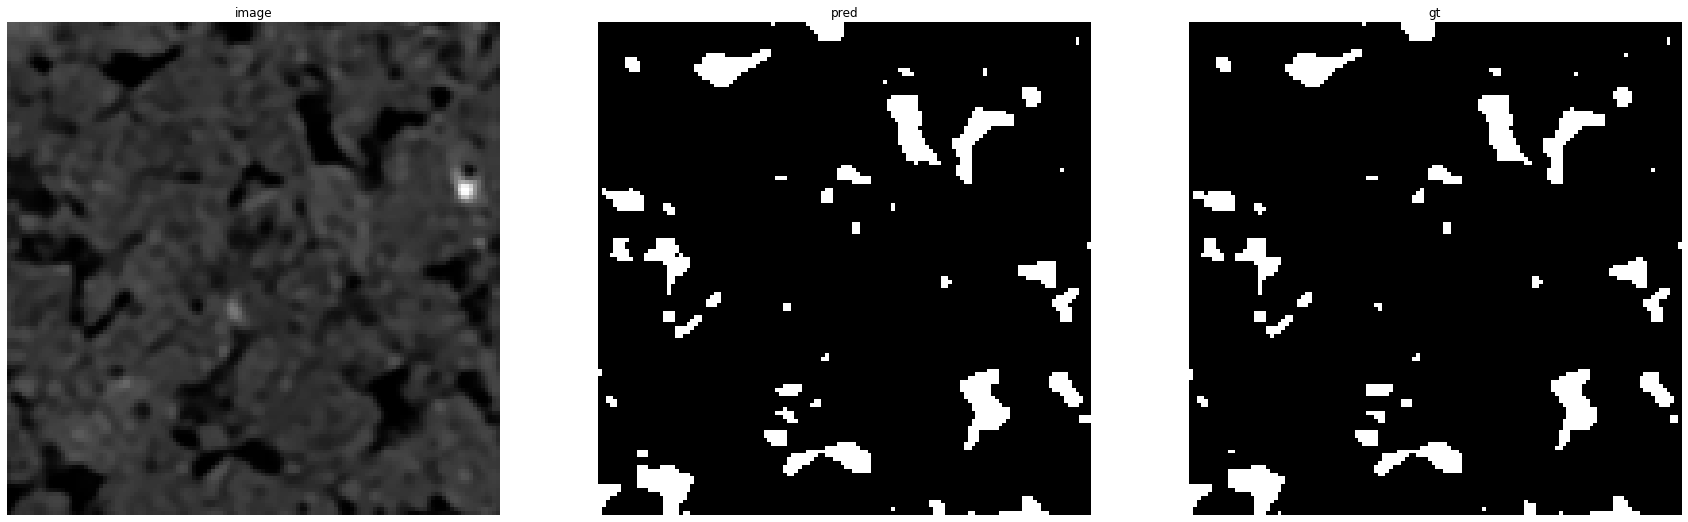

accuracy    : 0.99456787109375
precision   : 0.9435240963855421
recall      : 0.988950276243094
f1          : 0.9657032755298652
pr_auc      : 0.9975008349409777
iou         : 0.9336810730253353


Prediction for Urna_30:


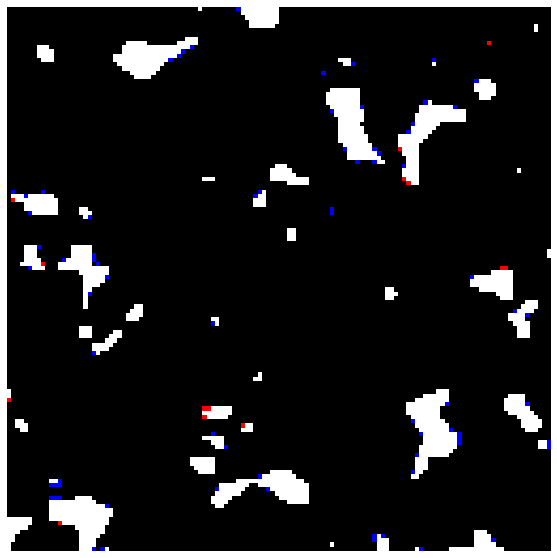

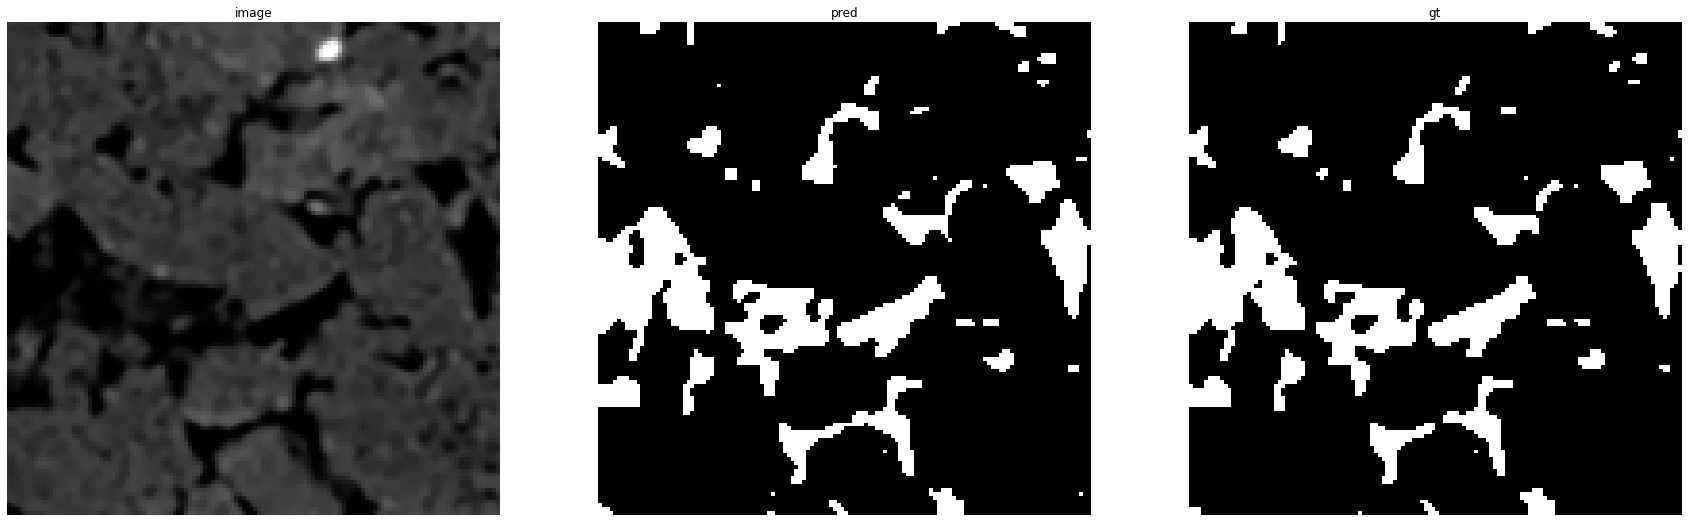

accuracy    : 0.9896240234375
precision   : 0.9484895429899303
recall      : 0.9851166532582462
f1          : 0.9664561957379636
pr_auc      : 0.9975170088428567
iou         : 0.9350897289041619


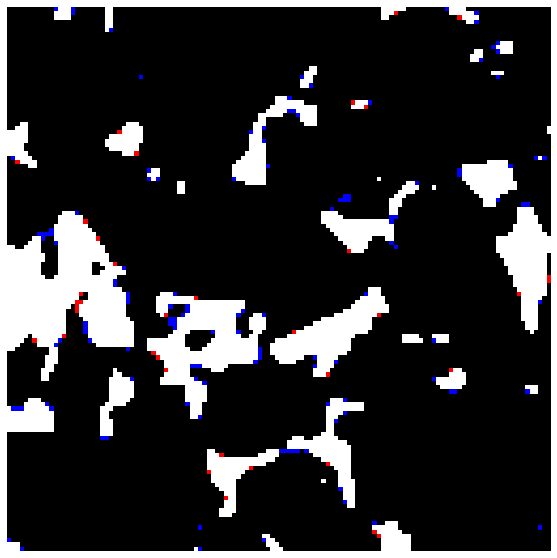

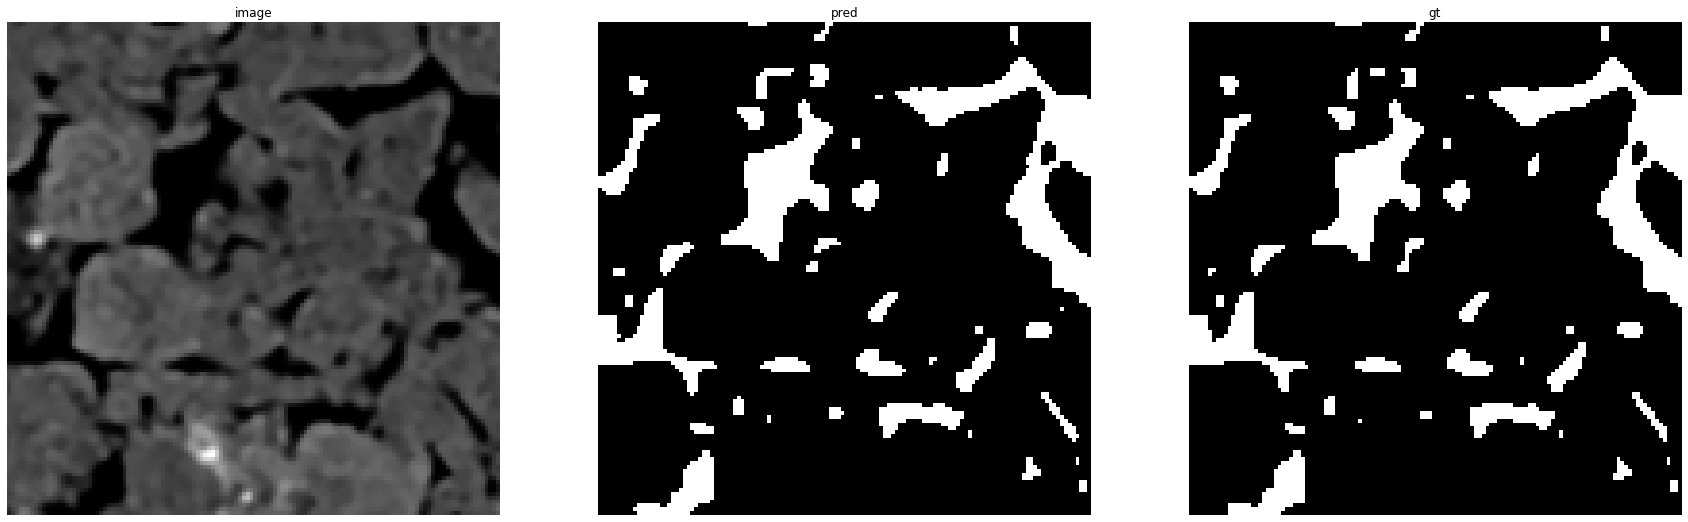

accuracy    : 0.99261474609375
precision   : 0.9678052610914801
recall      : 0.9844249201277955
f1          : 0.9760443476539298
pr_auc      : 0.998214802832242
iou         : 0.9532095901005414


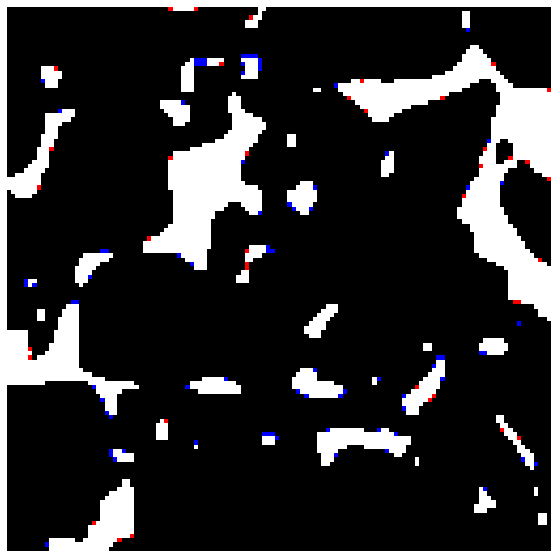

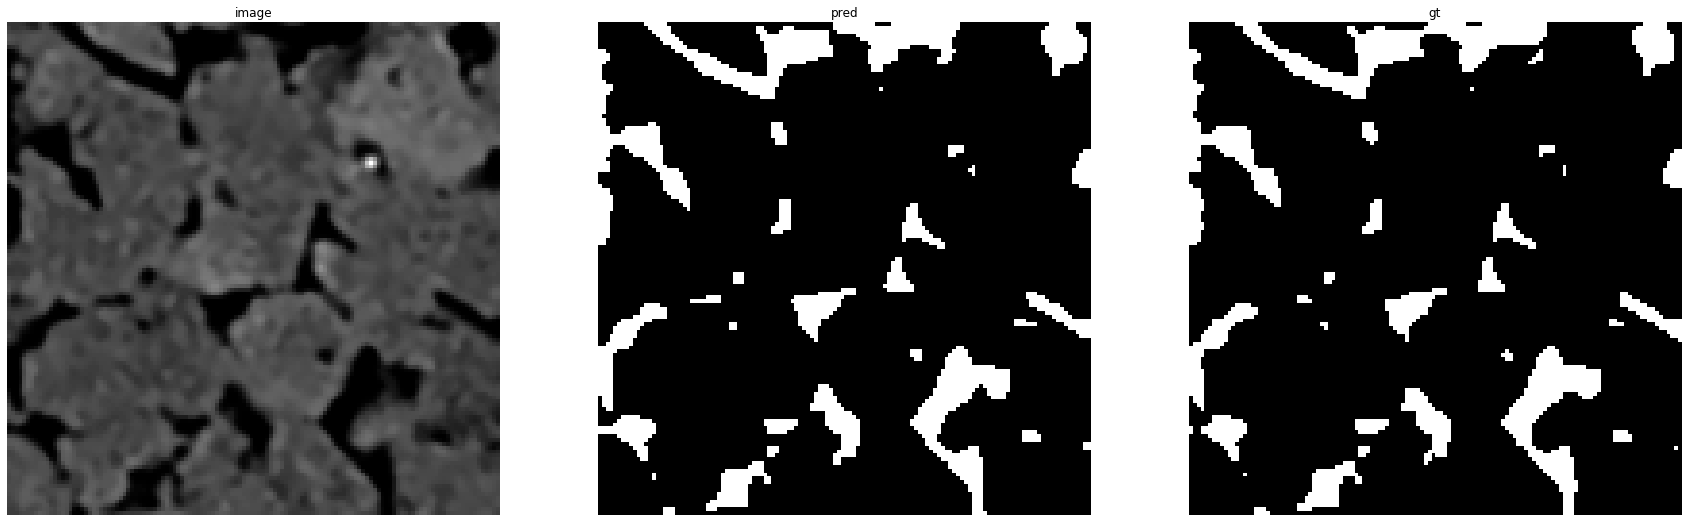

accuracy    : 0.99169921875
precision   : 0.9560585885486018
recall      : 0.9831127339114559
f1          : 0.9693969396939693
pr_auc      : 0.9975331934042158
iou         : 0.9406113537117904


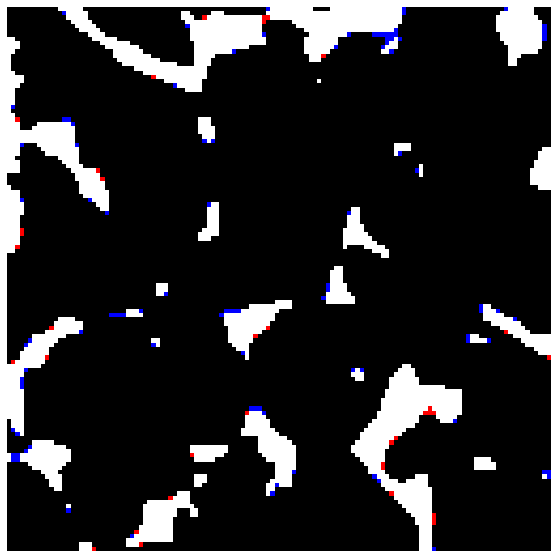

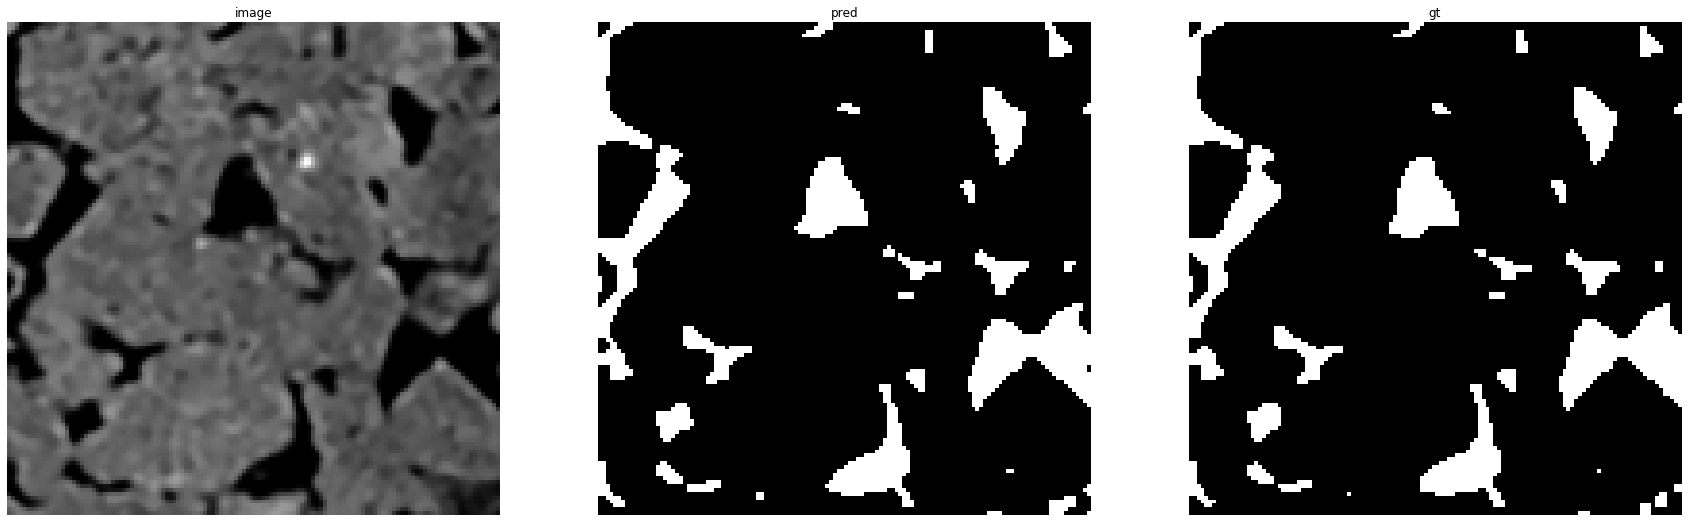

accuracy    : 0.99365234375
precision   : 0.968735632183908
recall      : 0.9832011199253383
f1          : 0.9759147753589624
pr_auc      : 0.9981639731715493
iou         : 0.952962460425147


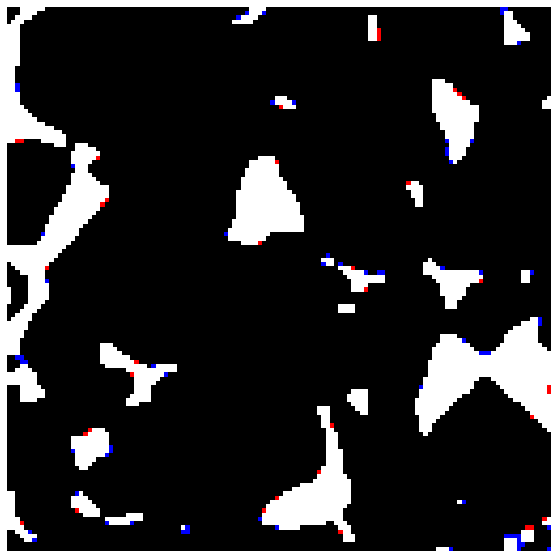

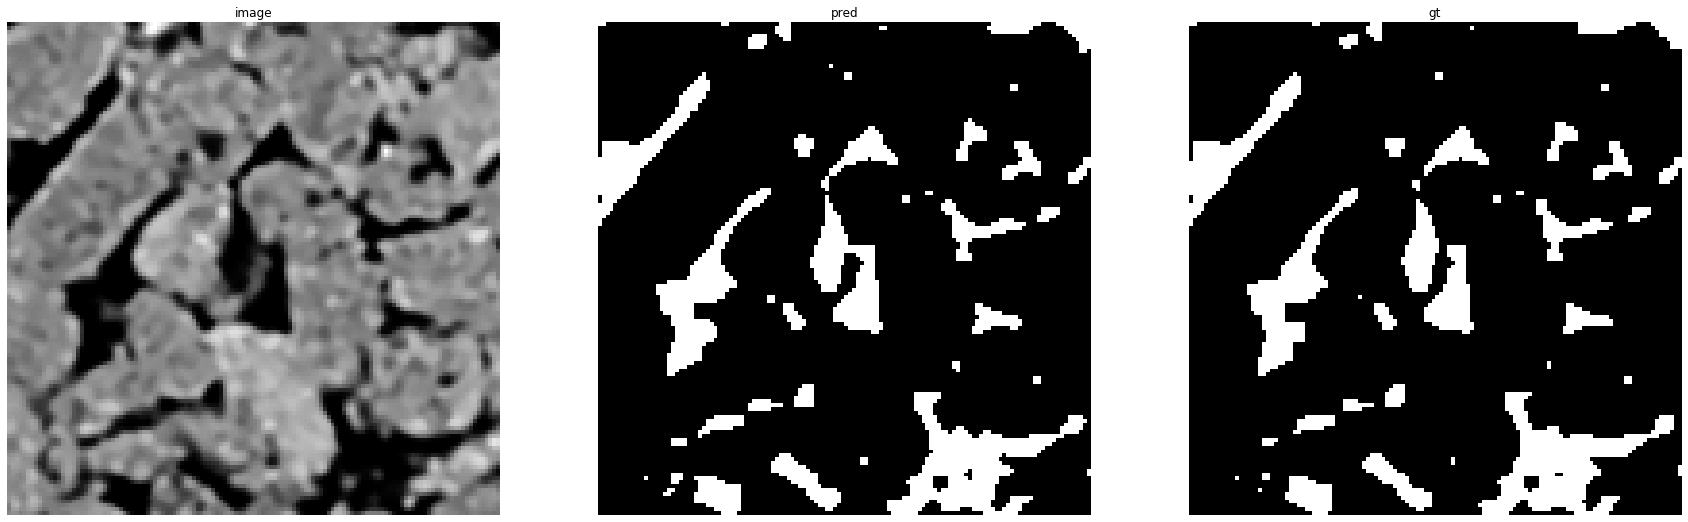

accuracy    : 0.991455078125
precision   : 0.9581810799837597
recall      : 0.98456403838131
f1          : 0.9711934156378601
pr_auc      : 0.9978709837616994
iou         : 0.944


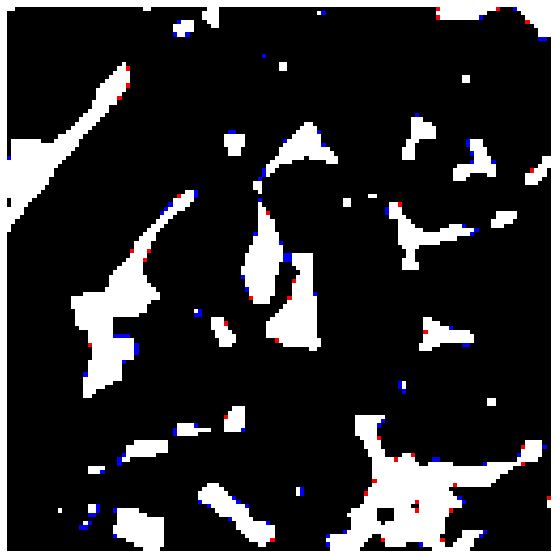

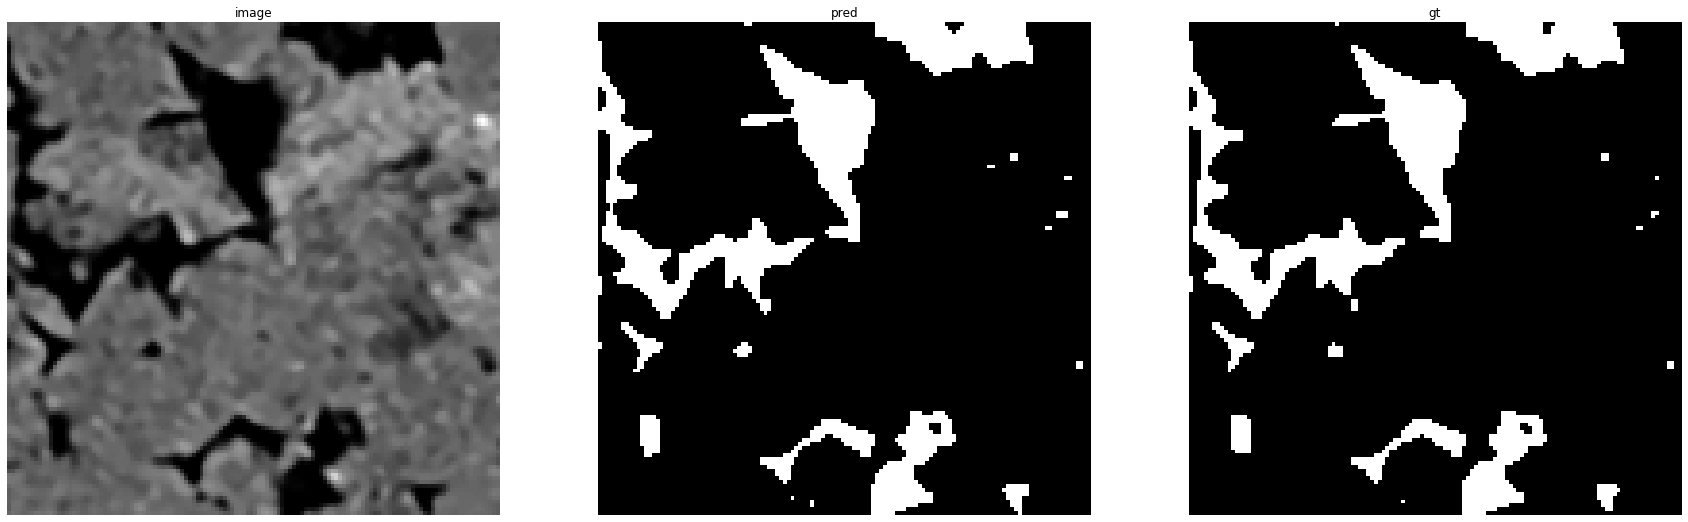

accuracy    : 0.99383544921875
precision   : 0.9738617200674536
recall      : 0.9833971902937421
f1          : 0.9786062274941749
pr_auc      : 0.9986975095281354
iou         : 0.9581086686022398


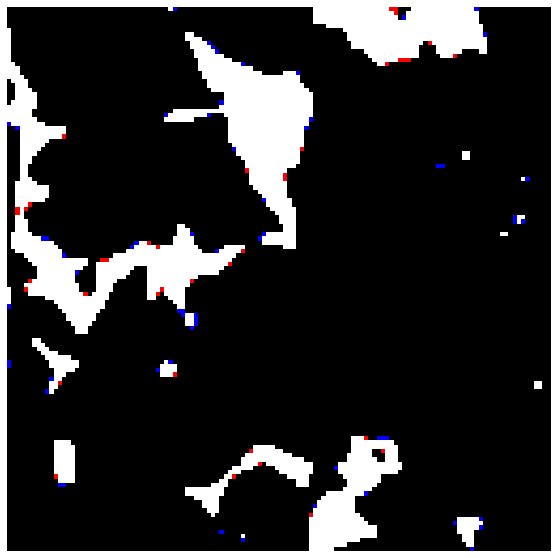

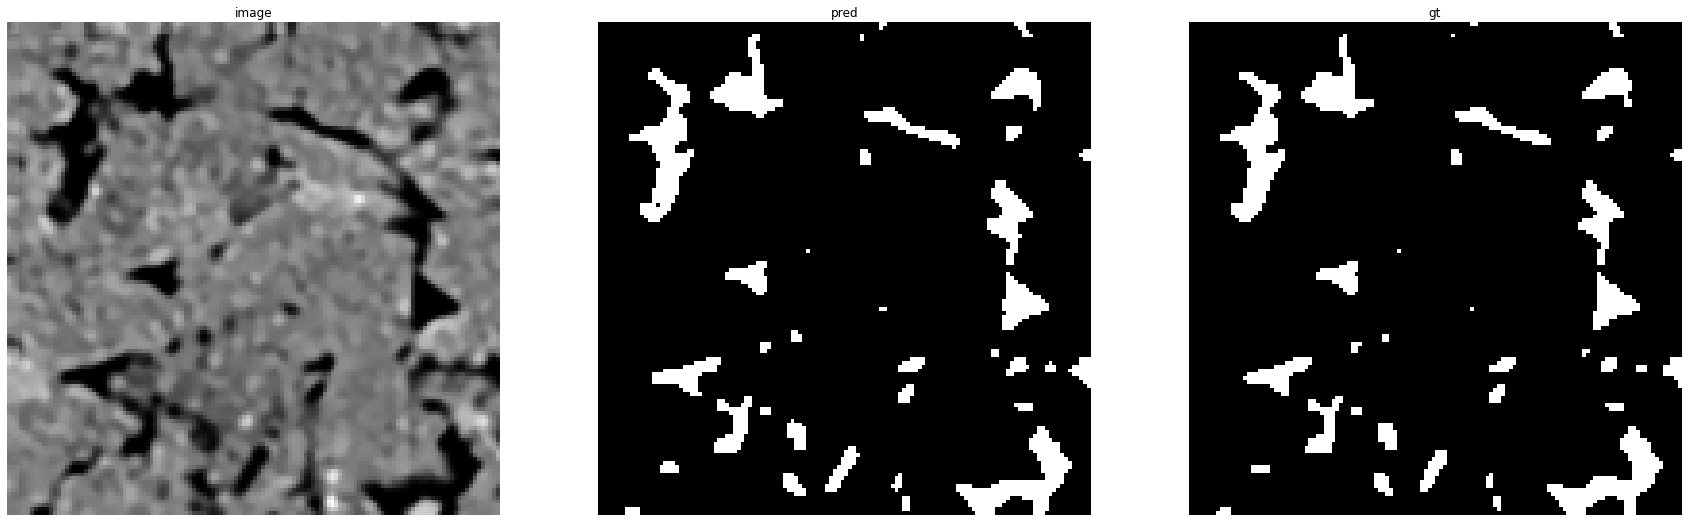

accuracy    : 0.99249267578125
precision   : 0.9397049390635023
recall      : 0.9805890227576974
f1          : 0.9597117589256469
pr_auc      : 0.9961967031723886
iou         : 0.922544080604534


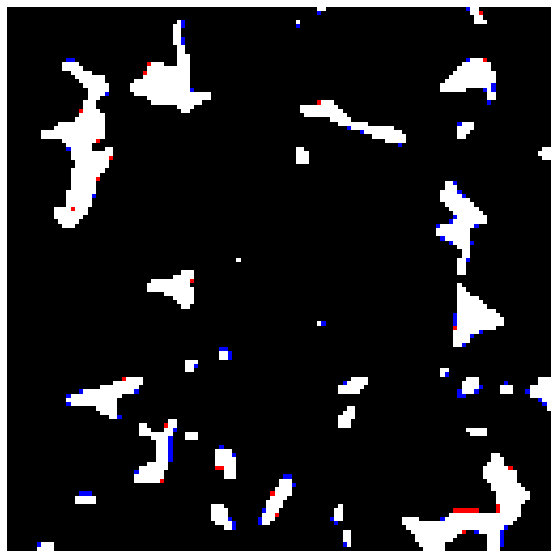

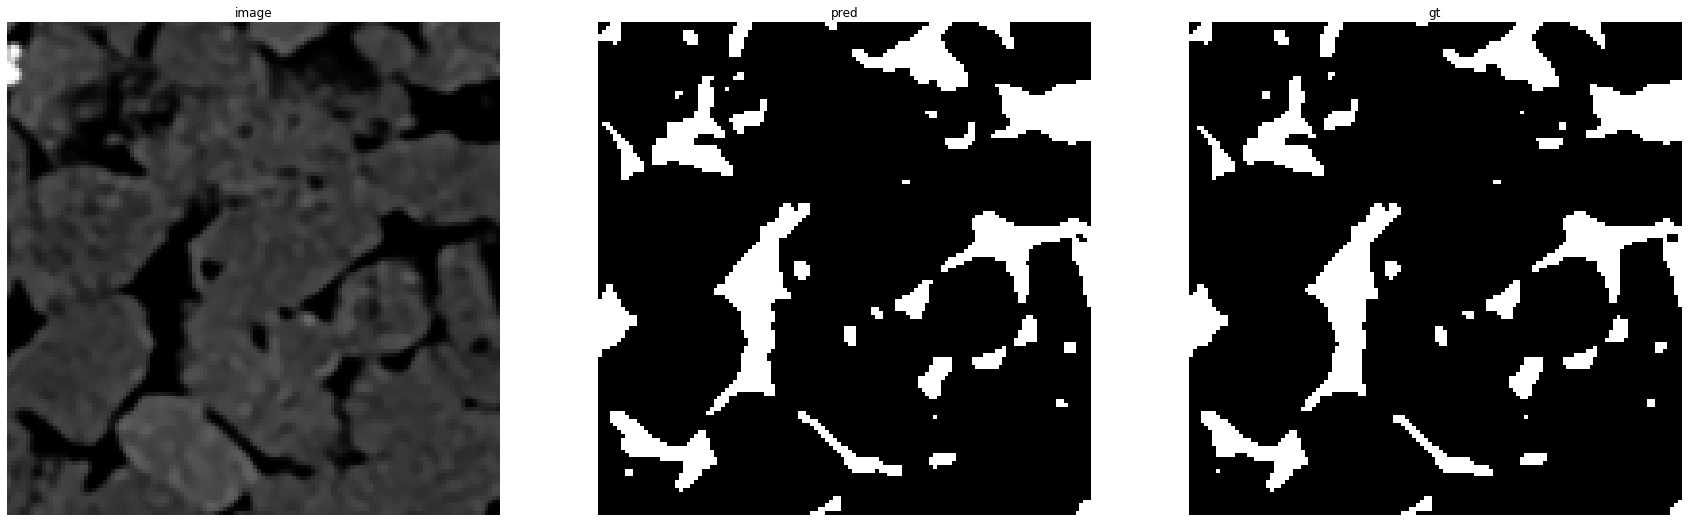

accuracy    : 0.9918212890625
precision   : 0.9601250977326036
recall      : 0.9871382636655949
f1          : 0.9734443123265953
pr_auc      : 0.9981439035263967
iou         : 0.9482625482625483


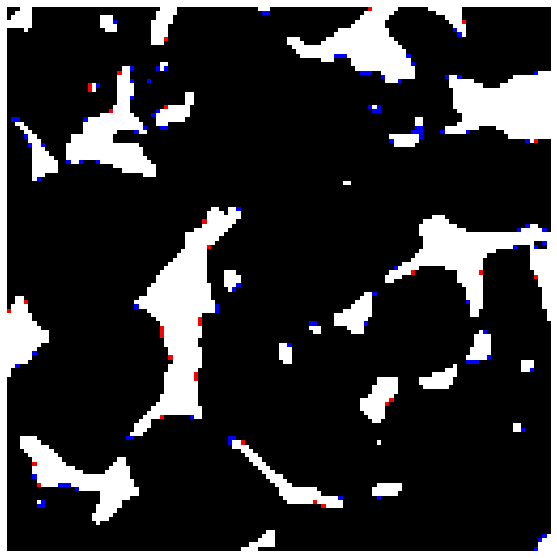

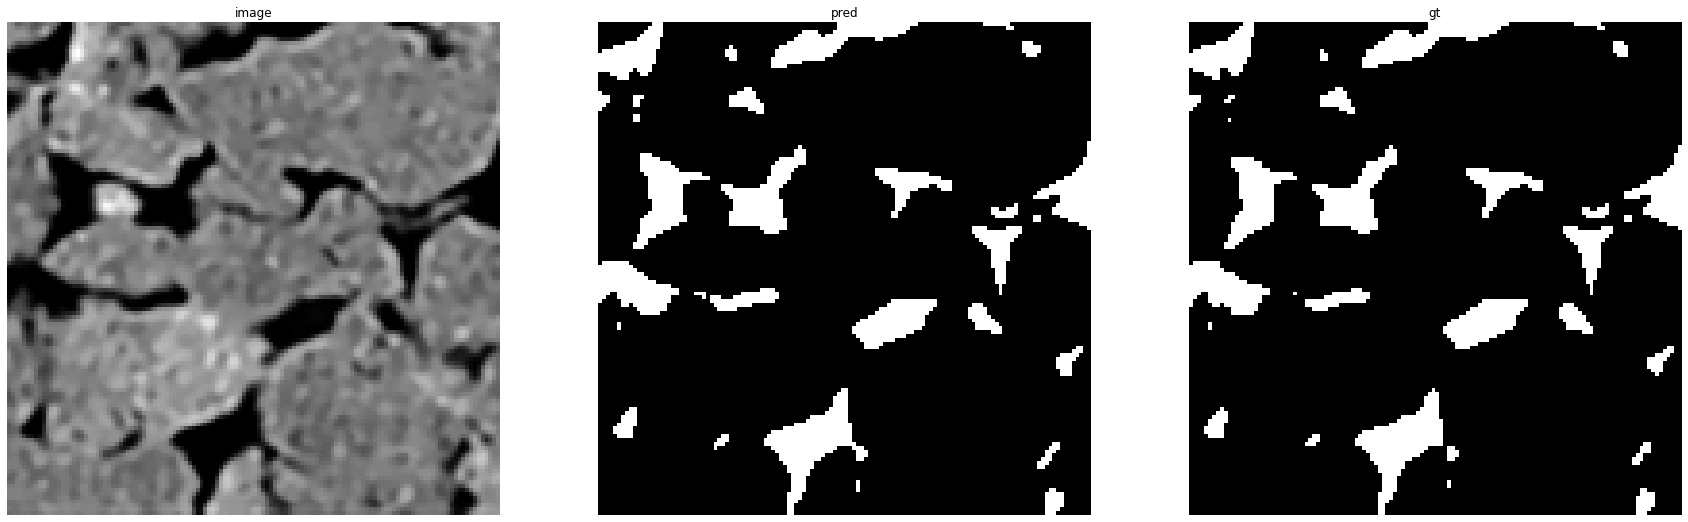

accuracy    : 0.9942626953125
precision   : 0.9680696661828737
recall      : 0.9862000985707245
f1          : 0.97705078125
pr_auc      : 0.9984373191355035
iou         : 0.9551312649164678


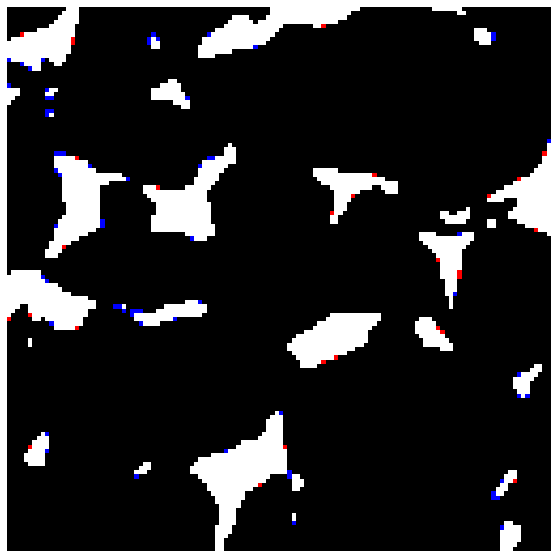

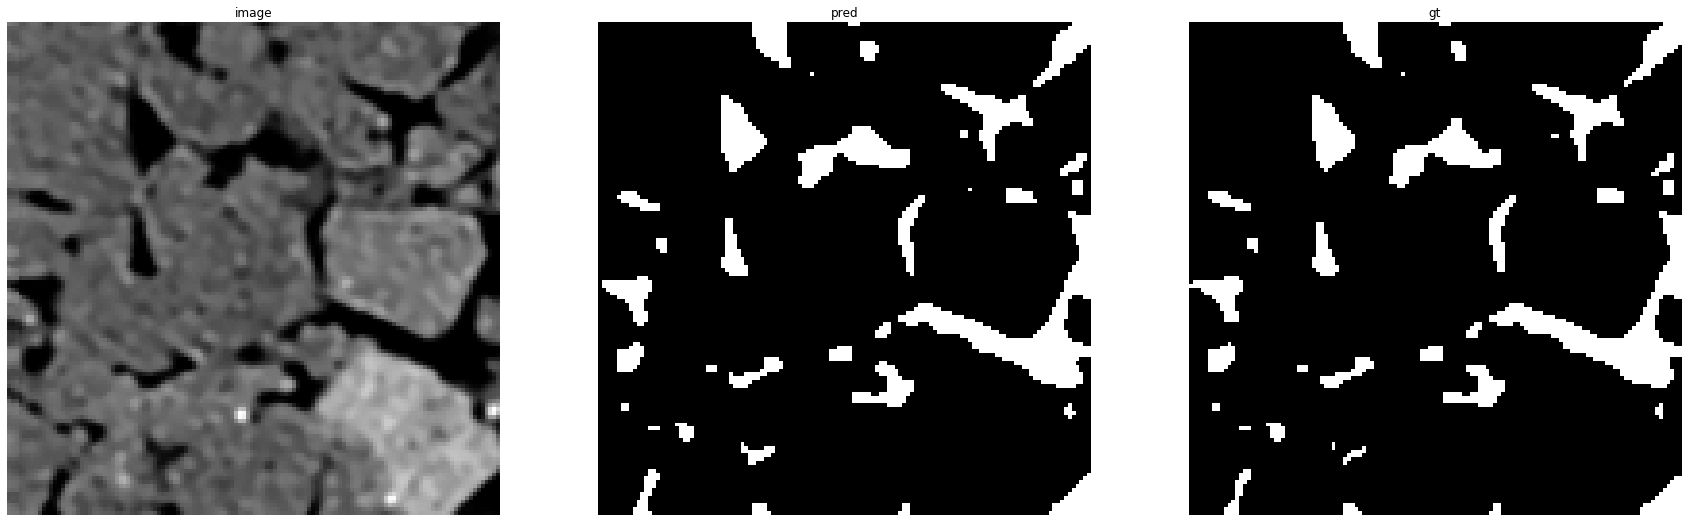

accuracy    : 0.99371337890625
precision   : 0.9580562659846548
recall      : 0.9889123548046462
f1          : 0.973239802546116
pr_auc      : 0.9982317451220367
iou         : 0.9478744939271255


Prediction for Urna_34:


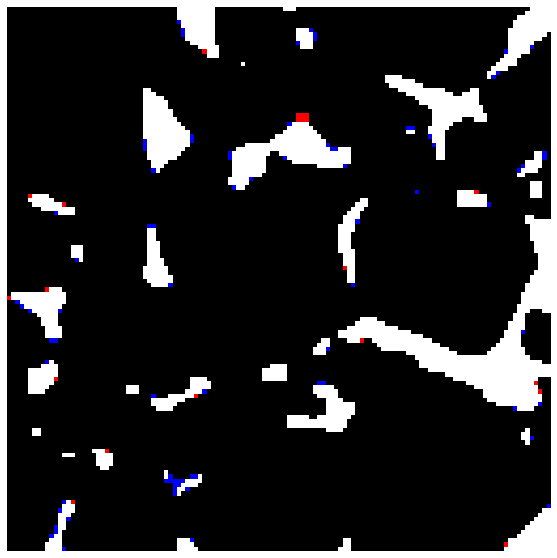

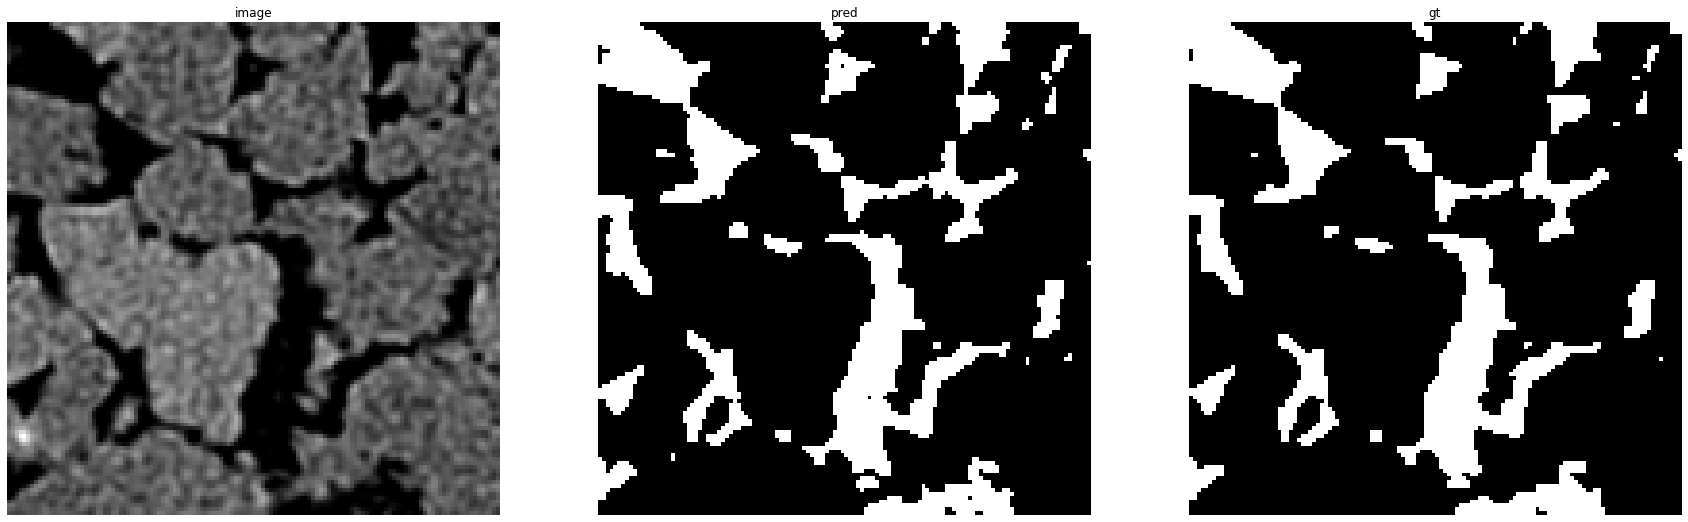

accuracy    : 0.982177734375
precision   : 0.9351335485764602
recall      : 0.9782007982806263
f1          : 0.9561824729891957
pr_auc      : 0.995365309433567
iou         : 0.9160437032777459


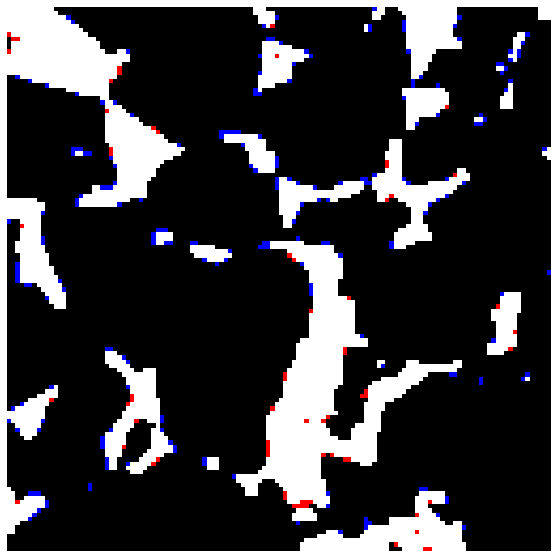

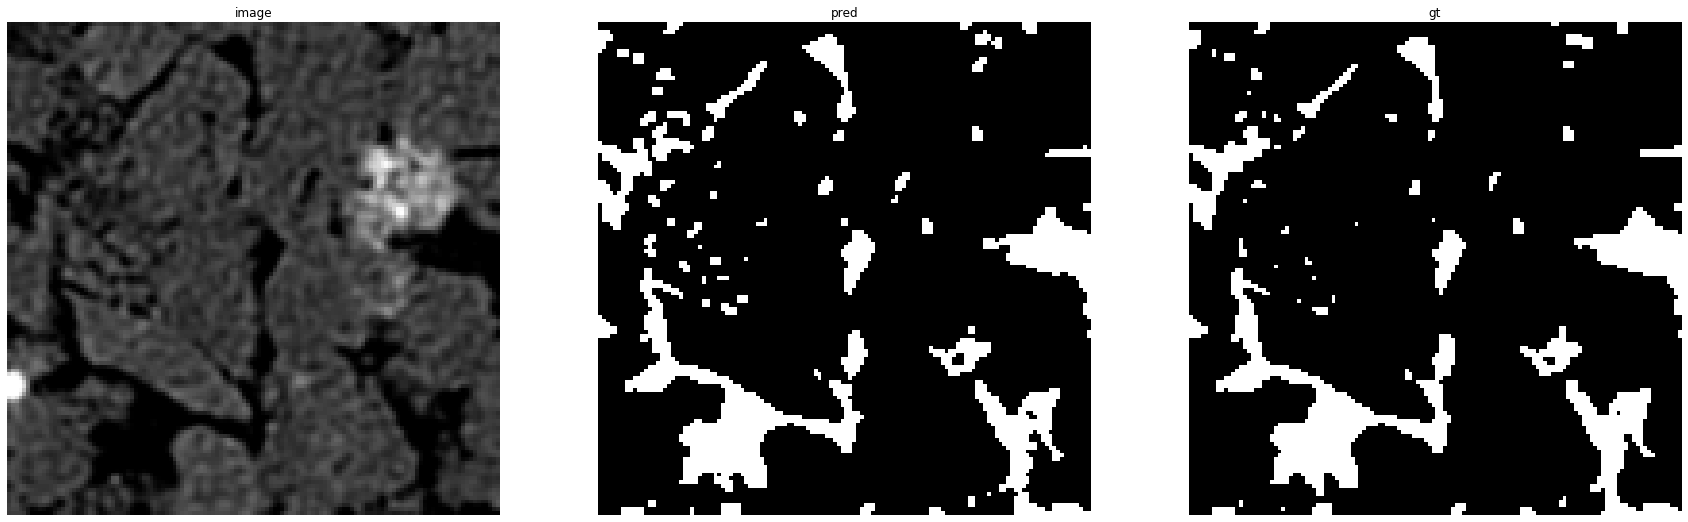

accuracy    : 0.98040771484375
precision   : 0.9113199836534532
recall      : 0.9554413024850043
f1          : 0.9328592344697761
pr_auc      : 0.987896039812928
iou         : 0.8741669933359467


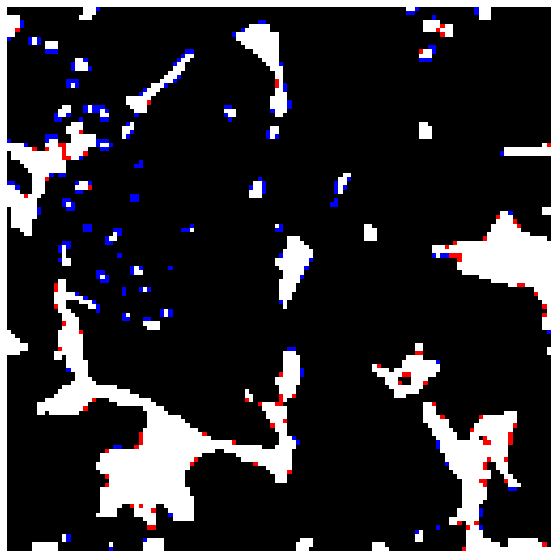

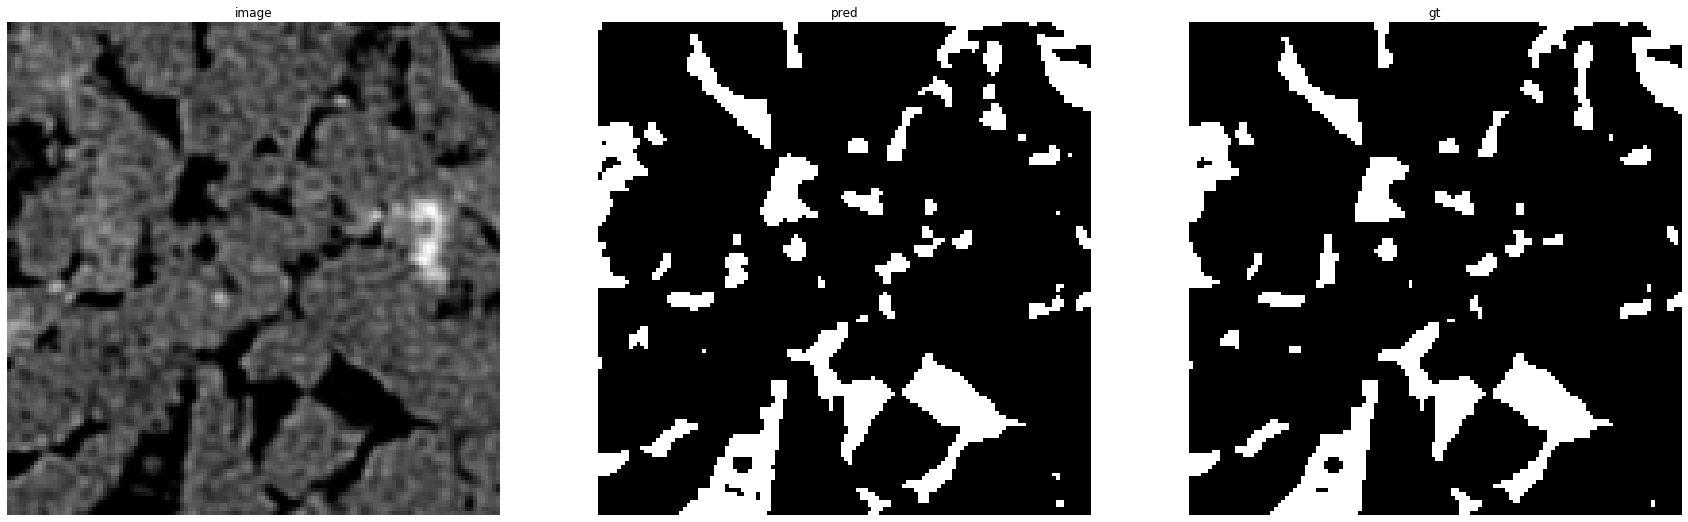

accuracy    : 0.980712890625
precision   : 0.925898752751284
recall      : 0.9567854435178166
f1          : 0.9410887397464579
pr_auc      : 0.9907672165444391
iou         : 0.8887323943661972


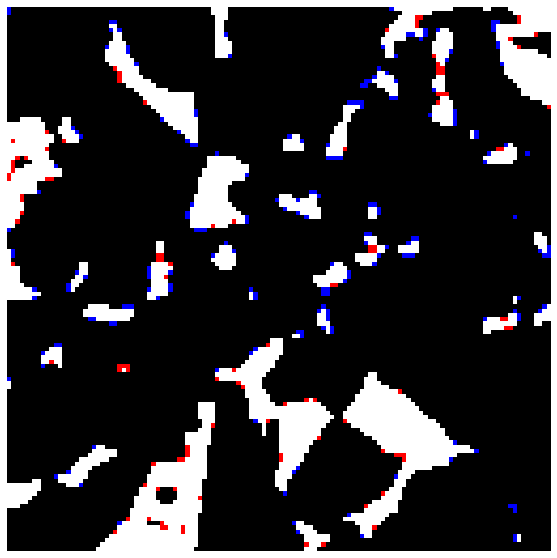

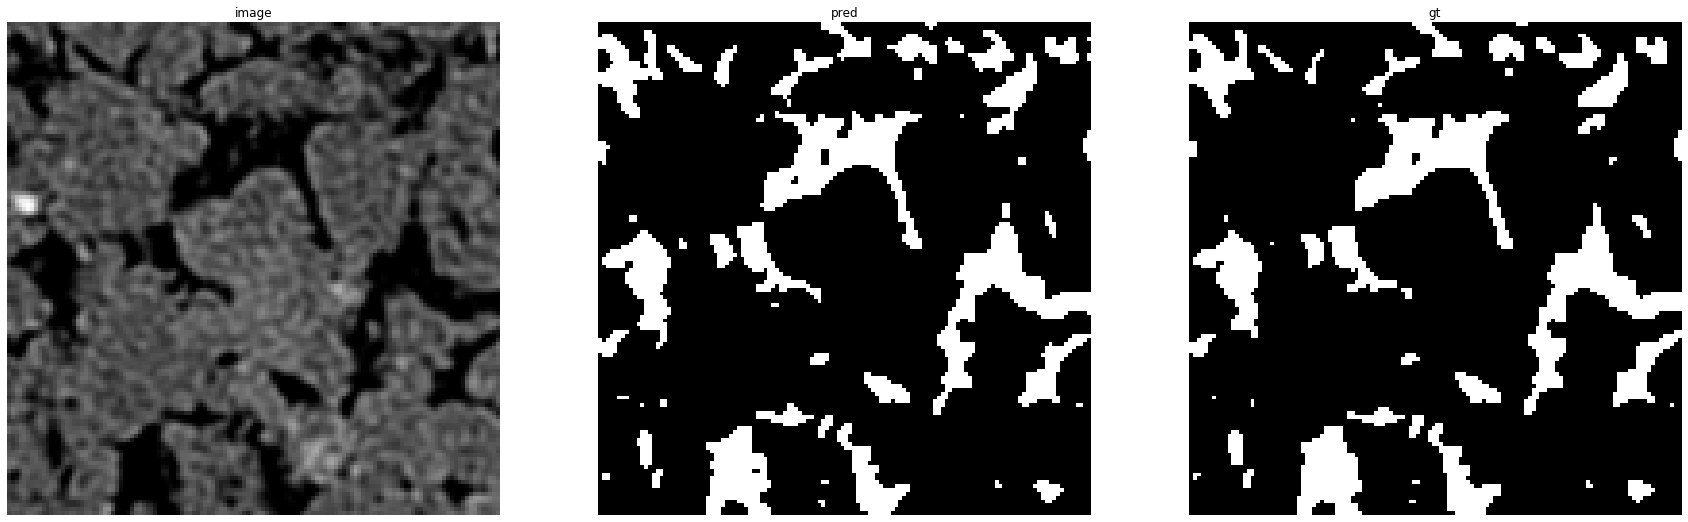

accuracy    : 0.98065185546875
precision   : 0.9310459693537642
recall      : 0.9621342512908778
f1          : 0.9463348569493821
pr_auc      : 0.9917347597324117
iou         : 0.8981362467866324


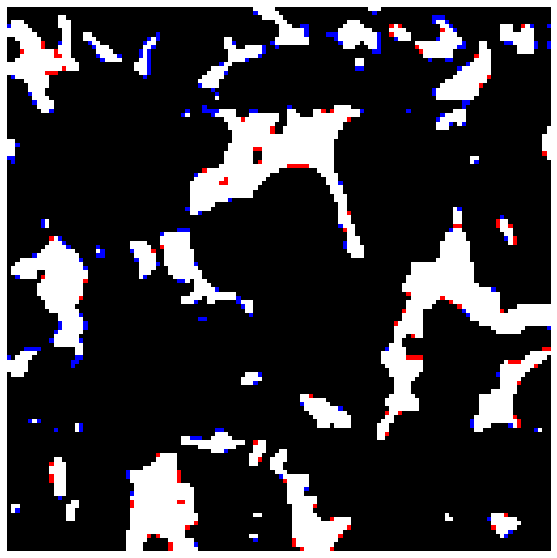

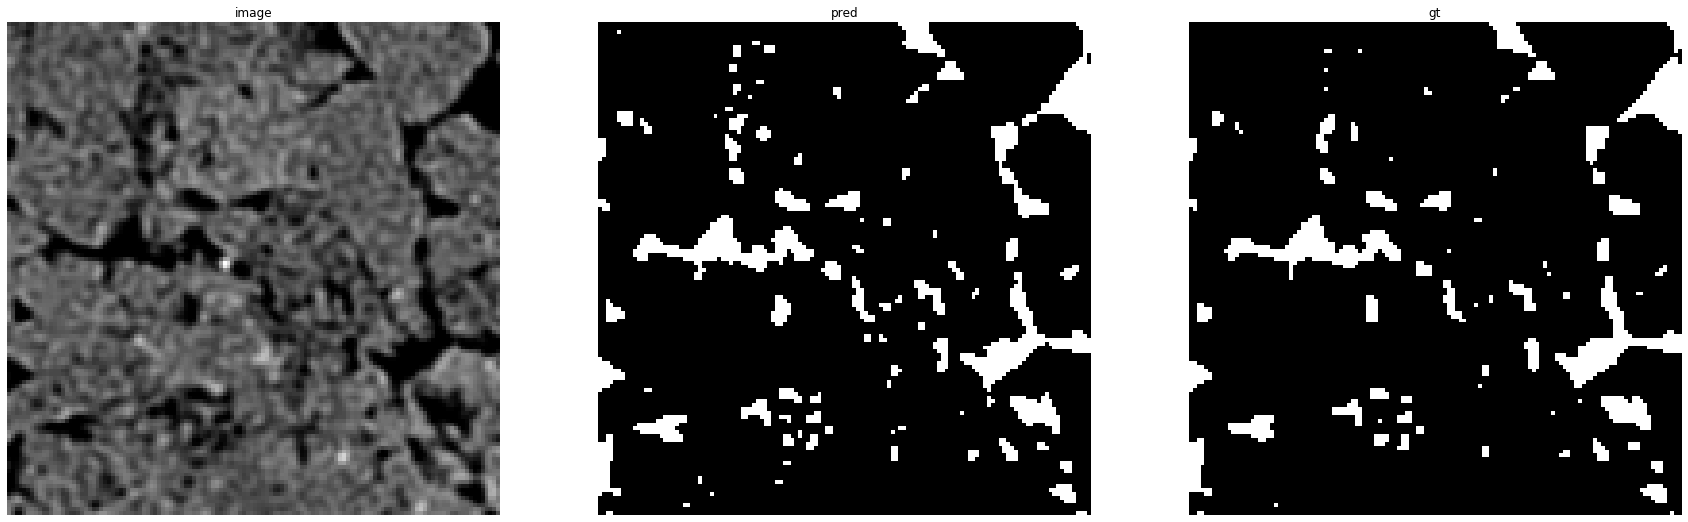

accuracy    : 0.9801025390625
precision   : 0.8415614236509759
recall      : 0.9670184696569921
f1          : 0.8999386126457949
pr_auc      : 0.9799503897450813
iou         : 0.8180803571428571


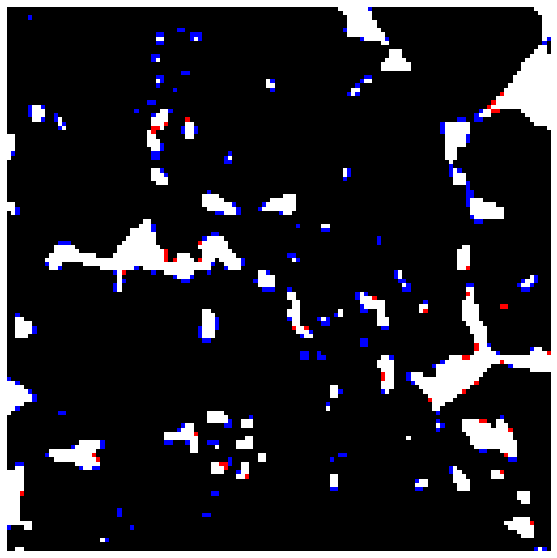

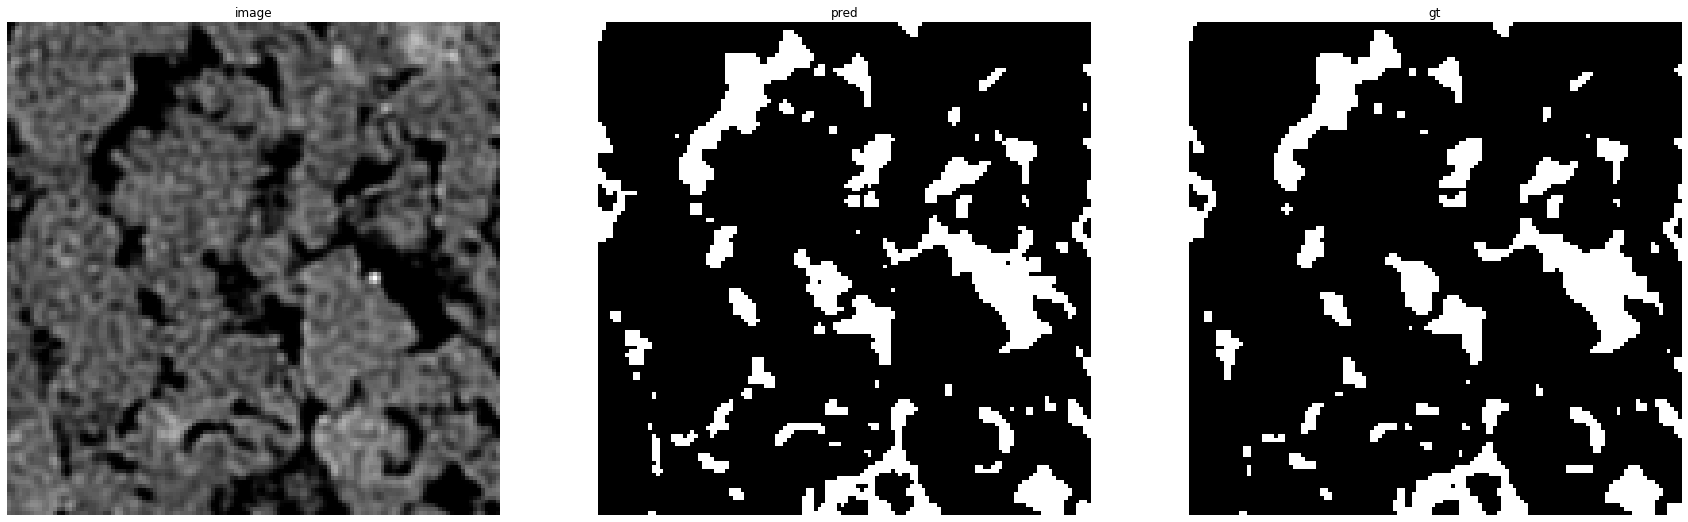

accuracy    : 0.976318359375
precision   : 0.8981447799199709
recall      : 0.9580908032596042
f1          : 0.9271498310176491
pr_auc      : 0.9853190963310228
iou         : 0.8641932096604831


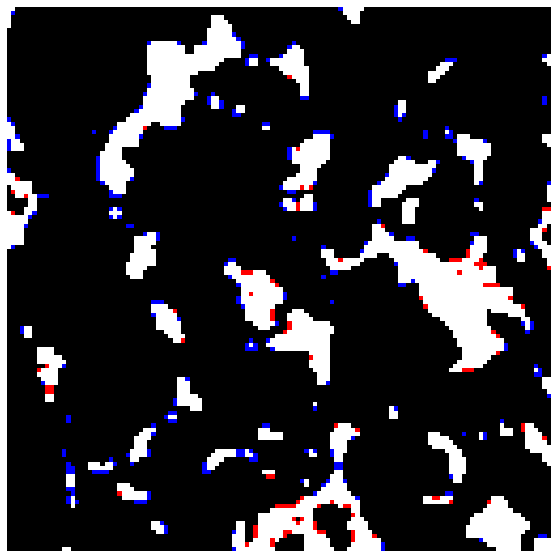

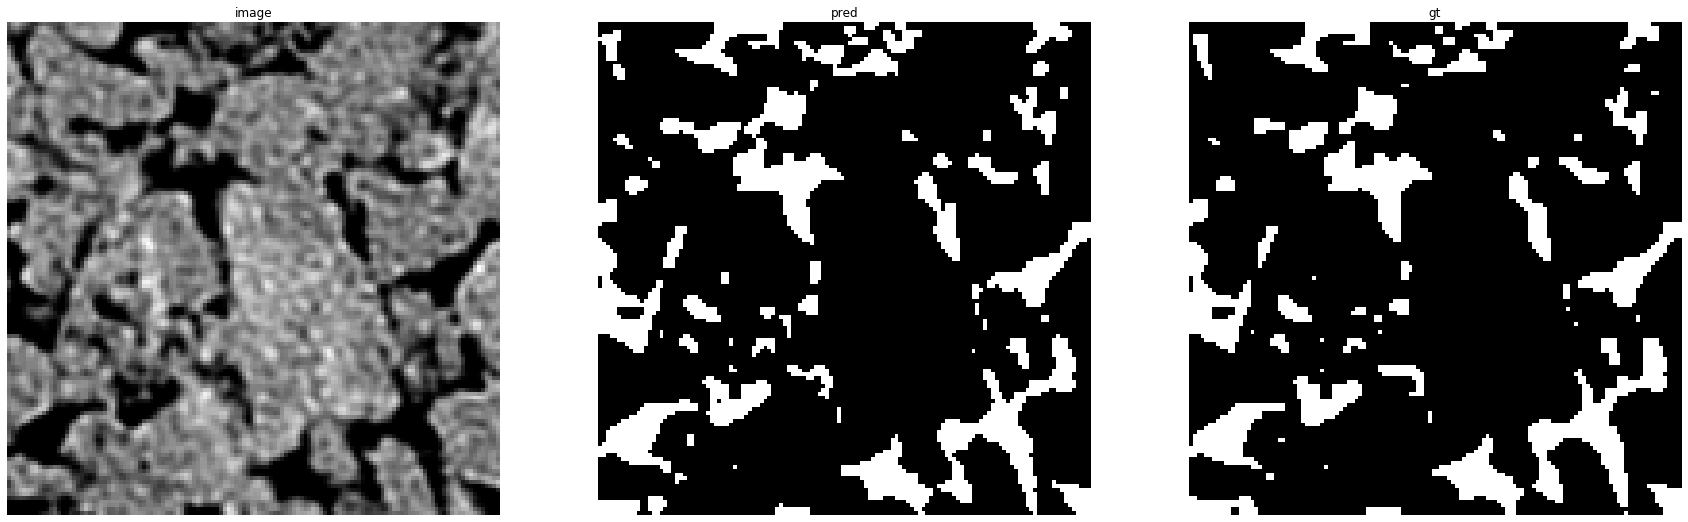

accuracy    : 0.97564697265625
precision   : 0.90530058177117
recall      : 0.9635362917096664
f1          : 0.9335110814864189
pr_auc      : 0.9889202522352436
iou         : 0.8753125


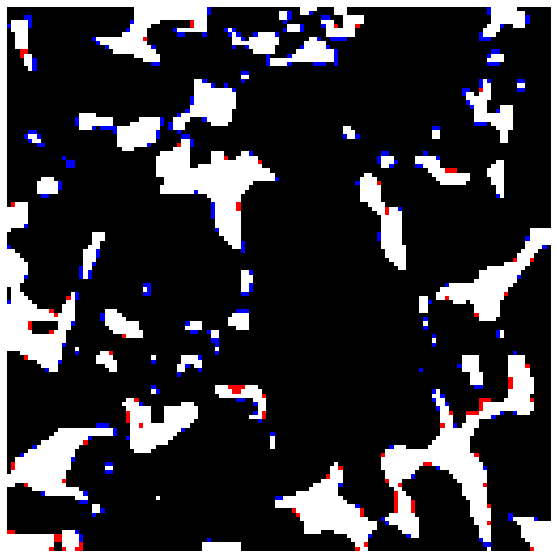

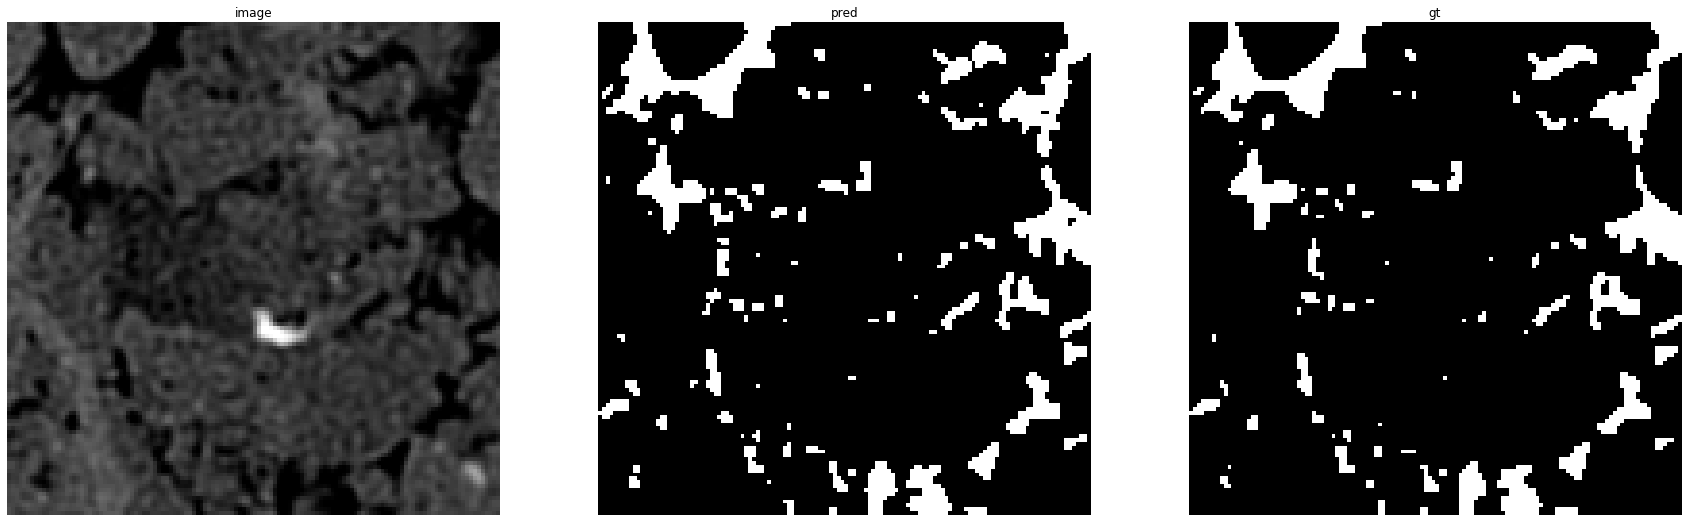

accuracy    : 0.97943115234375
precision   : 0.8807339449541285
recall      : 0.9614421632448673
f1          : 0.919320086186258
pr_auc      : 0.9858328661041053
iou         : 0.8506867523260966


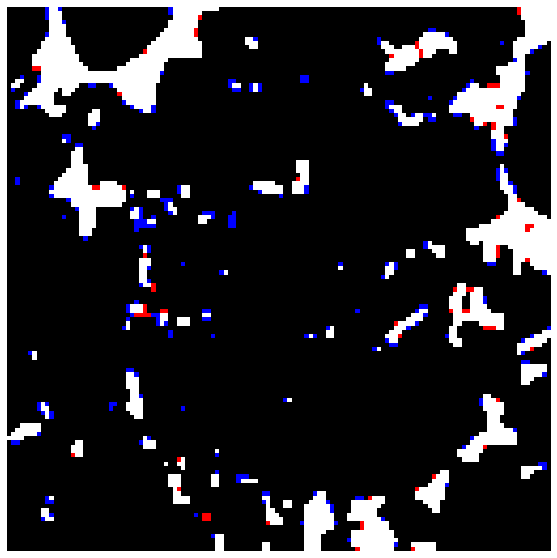

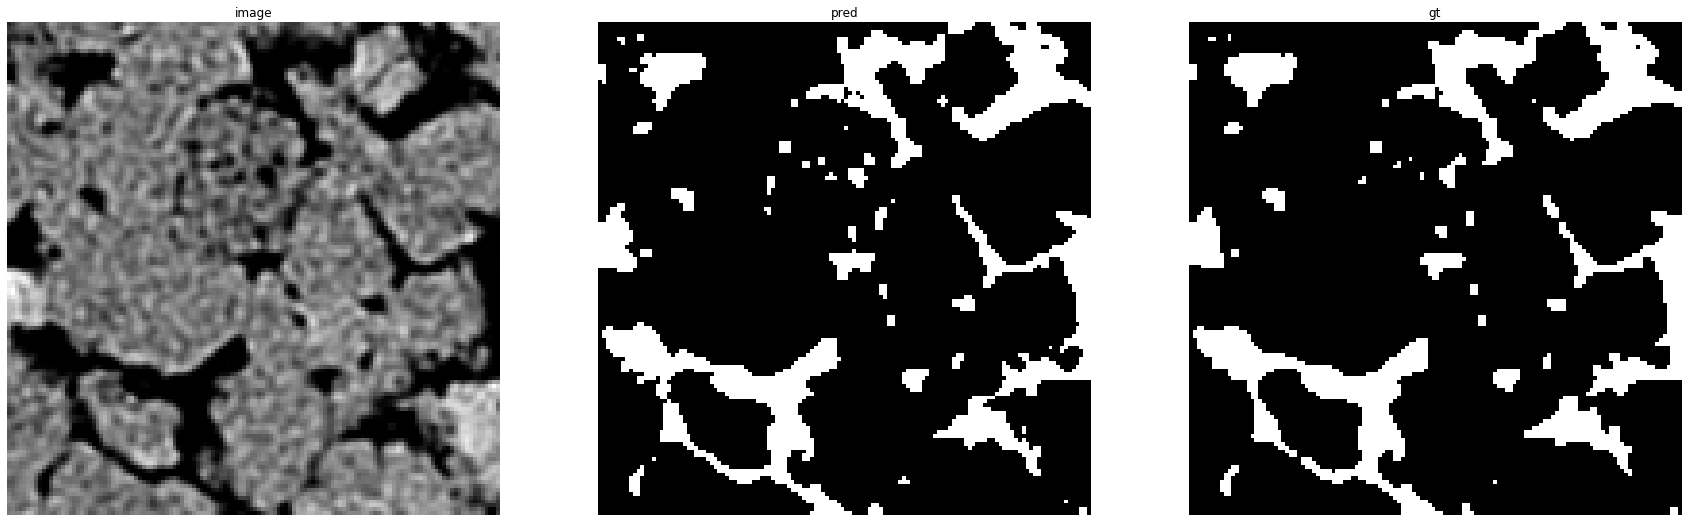

accuracy    : 0.980712890625
precision   : 0.941156803744567
recall      : 0.9526226734348562
f1          : 0.9468550285906492
pr_auc      : 0.9912233304301349
iou         : 0.8990737783455764


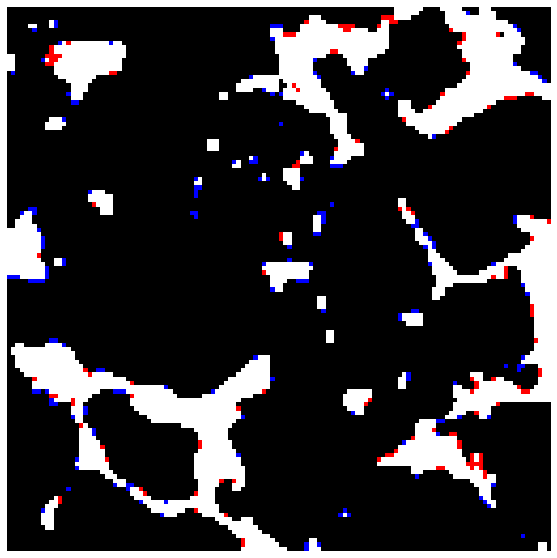

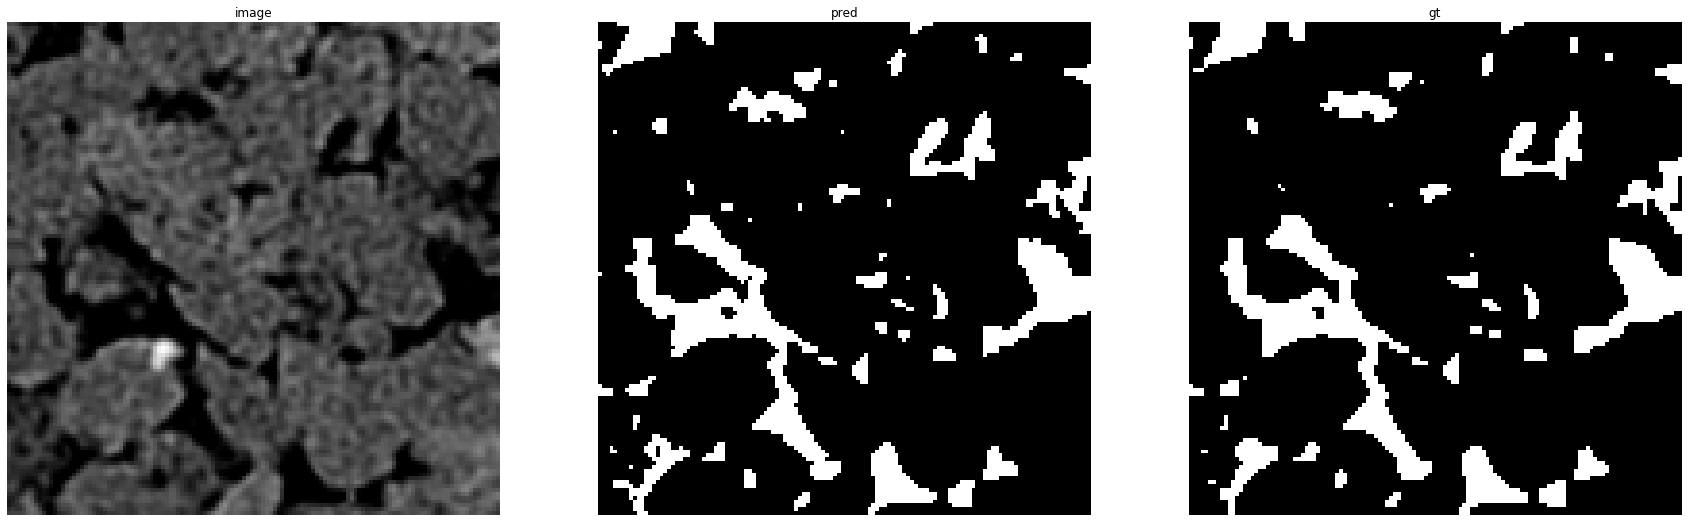

accuracy    : 0.9832763671875
precision   : 0.9307010475423045
recall      : 0.9577114427860697
f1          : 0.9440130772374337
pr_auc      : 0.9916042017857833
iou         : 0.8939628482972136




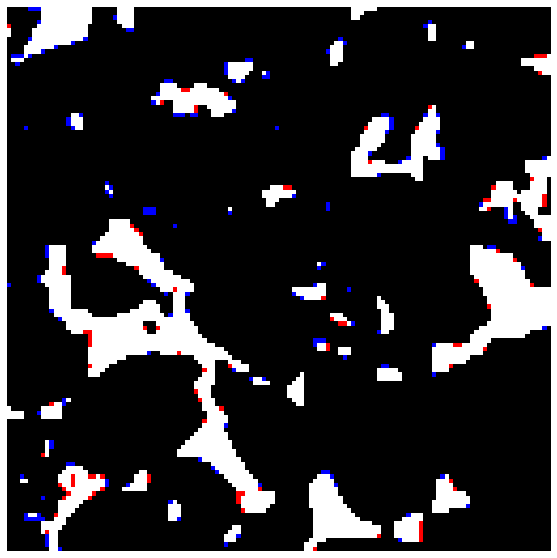

In [29]:
model.eval()

for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)

            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
            cnt -= 1
            
        if cnt ==0:
            break
    print('\n')

## Results

In [1]:
dataloaders_test

NameError: name 'dataloaders_test' is not defined

In [41]:
import pandas as pd

In [42]:
from visualization_utils import make_df

In [43]:
df = make_df(results, model_name=data_conf['conf_name'])
df

accuracy  precision    recall        f1    pr_auc       iou  \
0   0.996694   0.967445  0.994132  0.980607  0.999040  0.961952   
1   0.986862   0.905968  0.994815  0.948315  0.994744  0.901710   
2   0.985517   0.921238  0.926116  0.923671  0.981876  0.858168   
3   0.994083   0.960763  0.939359  0.949940  0.993341  0.904654   
4   0.989774   0.958410  0.931006  0.944510  0.990558  0.894854   
5   0.995422   0.941927  0.988107  0.964465  0.997117  0.931368   
6   0.992310   0.991299  0.934391  0.962004  0.996000  0.926790   
7   0.993968   0.988505  0.950370  0.969062  0.996789  0.939981   
8   0.992772   0.951458  0.991998  0.971305  0.997667  0.944211   
9   0.990977   0.962787  0.984289  0.973419  0.998148  0.948215   
10  0.981964   0.918250  0.959273  0.938313  0.989184  0.883795   

                 stack                      model  
0            carb96558  carb96558_SoilB-2_Urna_22  
1               carb71  carb96558_SoilB-2_Urna_22  
2              carbRNF  carb96558_SoilB-2_Urna_22  
3   SPE_carb10_58_box3  carb96558_SoilB-2_Urna_22  
4             SoilAh-1  carb96558_SoilB-2_Urna_22  
5              SoilB-2  carb96558_SoilB-2_Urna_22  
6       TeTree_subset1  carb96558_SoilB-2_Urna_22  
7       TiTree_subset2  carb96558_SoilB-2_Urna_22  
8              Urna_22  carb96558_SoilB-2_Urna_22  
9              Urna_30  carb96558_SoilB-2_Urna_22  
10             Urna_34  carb96558_SoilB-2_Urna_22

## Make prediction for particular stack

In [31]:
stack_name = 'Urna_30'

In [32]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

710it [00:00, 800.03it/s]
100%|██████████| 710/710 [00:07<00:00, 99.78it/s] 


In [33]:
predicted_stack_1 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 251640.52it/s]
25560it [02:02, 208.20it/s]
100%|██████████| 25560/25560 [00:08<00:00, 2887.83it/s]


In [34]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_1.preds, 
    mode='stack',
    threshold=0.5)

0.9473633174914053

In [35]:
predicted_stack_2 = stack.apply(
    model, 
    model_config,
    patch_sizes=(1, 128, 128), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 99274.20it/s]
25560it [02:12, 192.32it/s]
100%|██████████| 25560/25560 [00:01<00:00, 13837.42it/s]


In [36]:
predicted_stack_3 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 1, 128), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 235832.03it/s]
25560it [02:13, 191.16it/s]
100%|██████████| 25560/25560 [00:01<00:00, 13996.78it/s]


In [37]:
iou(np.where(predicted_stack_2.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_2.preds, 
    mode='stack',
    threshold=0.5)

0.8972258551716964

In [38]:
iou(np.where(predicted_stack_3.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_3.preds, 
    mode='stack',
    threshold=0.5)

0.8984312467231199

In [39]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3, 
    mode='stack',
    threshold=0.5)

0.9262343393176803

In [40]:
average_stack = Stack(predicted_stack_1.features, 
                      predicted_stack_1.targets, 
                      (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3)

In [ ]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        model_config=model_config,
        patch_sizes=ps, 
        bs=32, num_workers=8, device=device,
        threshold=None)
    predicted_stack.dump('../segmented_stacks/{}_{}'.format(stack_name, d), 
                         features=False, 
                         targets=True, 
                         preds=True)

In [ ]:
average_stack.dump('../segmented_stacks/{}_average'.format(stack_name), 
                   features=False, 
                   targets=True, 
                   preds=True)